In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
import mahakala as ma

from mahakala.grmhd.athenak import AthenakFluidModel

In [269]:
fname = '../data/torus.mhd_w_bcc.01500.athdf'

In [270]:
bhspin = 0.9
fluid_model = AthenakFluidModel(fname, bhspin)

100%|██████████| 456/456 [00:00<00:00, 522.23it/s]


In [271]:
bhspin = 0.9
inclination_in_degrees = 60
distance_in_rg = 1000

fov = 10
number_pixels_across = 40

s0 = ma.initialize_geodesics_at_camera(bhspin, inclination_in_degrees, distance_in_rg, -fov, fov, number_pixels_across)

In [272]:
S, final_dt = ma.geodesic_integrator(10000, s0, 40, 1e-4, bhspin)

In [273]:
data_og = np.load('prim_data_og.npy', allow_pickle=True).item()
data_jax = np.load('prim_data_jax.npy', allow_pickle=True).item()

In [288]:
prim_data = fluid_model.get_prims_from_geodesics_parallel(S)

100%|██████████| 456/456 [00:01<00:00, 277.27it/s]


1.6488237380981445
0.5751245021820068


In [284]:
fluid_model.x1v[0].shape

(32,)

In [145]:
prim_data[:, :, 0]

Array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [280]:
primitive_data_og_40sq = np.load('prim_data_og_40sq.npy', allow_pickle=True).item()

(0.0, 400.0)

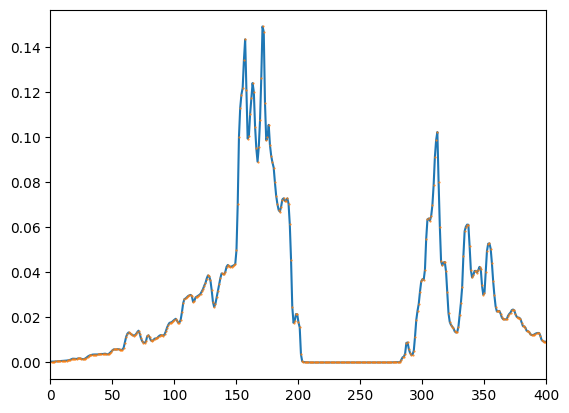

In [289]:

ax1 = plt.subplot(1, 1, 1)

primitive_data_og_40sq['dens'].shape

#for j in range(primitive_data_og_40sq['dens'].shape[1])[::400]:
for j in [400]:
    ax1.plot(primitive_data_og_40sq['dens'][:, j], '-', label='og', ms=1)
    ax1.plot(prim_data['dens'][:, j], '.', label='jax', ms=1)
ax1.set_xlim(0, 400)

#ax1.plot(primitive_data_og_40sq['dens'][:, 100], label='og')

IndexError: Too many indices: 1-dimensional array indexed with 2 regular indices.

In [10]:
prim_data

Array([[[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       ...,

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.

In [52]:
Sp = S.transpose(2, 0, 1)

2025-01-29 02:27:38.229664: W external/xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 2.28GiB (2444342886 bytes) by rematerialization; only reduced to 7.63GiB (8192000000 bytes), down from 7.63GiB (8192000000 bytes) originally
2025-01-29 02:27:48.281691: W external/xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (GPU_0_bfc) ran out of memory trying to allocate 7.63GiB (rounded to 8192000000)requested by op 
2025-01-29 02:27:48.282402: W external/xla/xla/tsl/framework/bfc_allocator.cc:508] *************************************************_*********____*******______________________________
E0129 02:27:48.282513    5326 pjrt_stream_executor_client.cc:3084] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 8192000000 bytes.


XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 8192000000 bytes.

In [49]:
print(S.shape)

(10000, 25600, 8)


In [53]:
10000*25600 * 8 * 8 / 1024/1024

15625.0

In [48]:
prim_data = fluid_model.get_prims_from_geodesics_parallel(S)

2025-01-29 02:24:46.688533: W external/xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 2.28GiB (2444342886 bytes) by rematerialization; only reduced to 7.63GiB (8192000000 bytes), down from 7.63GiB (8192000000 bytes) originally
2025-01-29 02:24:56.693370: W external/xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (GPU_0_bfc) ran out of memory trying to allocate 7.63GiB (rounded to 8192000000)requested by op 
2025-01-29 02:24:56.693901: W external/xla/xla/tsl/framework/bfc_allocator.cc:508] *************************************************_*********____*******______________________________
E0129 02:24:56.693987    5326 pjrt_stream_executor_client.cc:3084] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 8192000000 bytes.


KeyboardInterrupt: 

In [43]:
primitive_data_new = fluid_model.get_prims_from_geodesics_new(S)

  6%|▌         | 26/456 [00:32<08:52,  1.24s/it]


KeyboardInterrupt: 

In [75]:
print(np.allclose(primitive_data['dens'], data_og['dens'], atol=1e-6))
print(np.allclose(primitive_data['u'], data_og['U1'], atol=1e-6))
print(np.allclose(primitive_data['U1'], data_og['U2'], atol=1e-6))
print(np.allclose(primitive_data['U2'], data_og['U3'], atol=1e-6))
print(np.allclose(primitive_data['U3'], data_og['u'], atol=1e-6))
print(np.allclose(primitive_data['B1'], data_og['B1'], atol=1e-6))
print(np.allclose(primitive_data['B2'], data_og['B2'], atol=1e-6))
print(np.allclose(primitive_data['B3'], data_og['B3'], atol=1e-6))

True
True
True
True
True
True
True
True


In [44]:
primitive_data_new2 = fluid_model.get_prims_from_geodesics_new2(S)

getting extents
time: 0.99652099609375
getting ebounds
time: 0.0162506103515625


ValueError: there are 456 point arrays, but values has 4 dimensions

In [54]:
# primitive_data_original = fluid_model.get_prims_from_geodesics(S)

a 4.76837158203125e-07
b 0.0007567405700683594


100%|██████████| 456/456 [03:24<00:00,  2.23it/s]

z 204.27640557289124


In [49]:
for i in range(1600):
    if primitive_data_new_2['dens'][:, i].max() > 4.e-4:
        print(i, primitive_data_new_2['dens'][:, i].max())

1546 0.00041459472
1547 0.00042057535
1548 0.0004015195
1586 0.00042613858
1587 0.00041846535


In [15]:
primitive_data_new.keys()

dict_keys(['dens', 'u', 'U1', 'U2', 'U3', 'B1', 'B2', 'B3'])

In [29]:
data_og = np.load('prim_data_og.npy', allow_pickle=True).item()
data_jax = np.load('prim_data_jax.npy', allow_pickle=True).item()

In [19]:
data_og['dens'].shape

(10000, 100)

In [21]:
primitive_data_new['dens'].shape

(10000, 1600)

In [51]:
data_og['dens'].shape

(10000, 100)

(0.0, 1000.0)

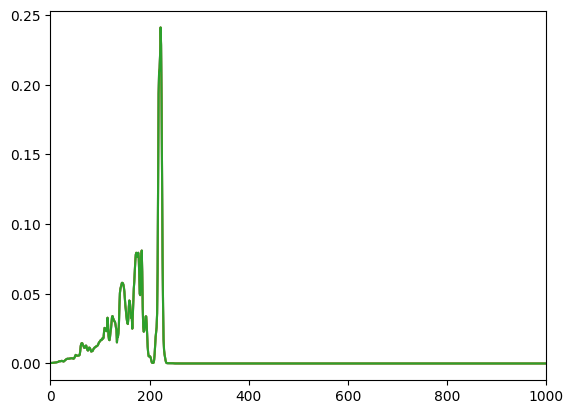

In [61]:
ax1 = plt.subplot(1, 1, 1)

idx = 53

ax1.plot(primitive_data_new_3['dens'][:, idx])
ax1.plot(data_og['dens'][:, idx])
ax1.plot(data_jax['dens'][:, idx])

ax1.set_xlim(0, 1000)

In [68]:
print(key, np.allclose(primitive_data_new_3['U3'], data_og['u'], atol=1e-6))

B3 True


In [65]:
for key in primitive_data_new_3.keys():
    print(key, np.allclose(primitive_data_new_3[key], data_og[key], atol=1e-6))

dens True
u False
U1 False
U2 False
U3 False
B1 True
B2 True
B3 True


In [63]:
np.allclose(primitive_data_new_3['dens'], data_jax['dens'])

True

In [22]:
primitive_data_new['dens'][:10, :2]

Array([[0.00035409, 0.00035348],
       [0.00035408, 0.00035358],
       [0.00037052, 0.00036971],
       [0.00040328, 0.0004024 ],
       [0.00044324, 0.0004426 ],
       [0.0004797 , 0.00047922],
       [0.00052445, 0.00052434],
       [0.00056406, 0.00056412],
       [0.00058154, 0.00058188],
       [0.00059689, 0.00059701]], dtype=float32)

In [24]:
data_og['dens'][:10, :2]

array([[0.00035382, 0.00035143],
       [0.00035363, 0.0003516 ],
       [0.00036961, 0.00036636],
       [0.00040189, 0.00039997],
       [0.0004424 , 0.0004399 ],
       [0.00047923, 0.00047738],
       [0.00052456, 0.00052417],
       [0.00056481, 0.00056521],
       [0.00058267, 0.00058463],
       [0.00059766, 0.00059992]])

In [43]:
primitive_data_original.keys()

dict_keys(['dens', 'u', 'U1', 'U2', 'U3', 'B1', 'B2', 'B3'])

In [44]:
np.allclose(primitive_data_original['dens'], primitive_data_new['dens'])

True

In [49]:
primitive_data_original['u']

array([[1.81947627e-07, 1.81436349e-07, 1.80930158e-07, ...,
        1.80517702e-07, 1.80515471e-07, 1.80485458e-07],
       [1.83419871e-07, 1.82482637e-07, 1.81472984e-07, ...,
        1.82362086e-07, 1.81680960e-07, 1.80986675e-07],
       [1.86342760e-07, 1.84656827e-07, 1.82999941e-07, ...,
        1.83183289e-07, 1.82365824e-07, 1.81623236e-07],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.83986160e-08, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.83986160e-08, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.83986160e-08, 0.00000000e+00, 0.00000000e+00]])

In [50]:
primitive_data_new['u']

Array([[ 0.01824237,  0.01839613,  0.01853806, ...,  0.01794963,
         0.01803534,  0.01811984],
       [ 0.01865249,  0.01864488,  0.01863719, ...,  0.01710563,
         0.01718614,  0.01725662],
       [ 0.0181389 ,  0.01807687,  0.01801765, ...,  0.01697281,
         0.01697101,  0.01697549],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.0096091 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.0096091 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.0096091 ,
         0.        ,  0.        ]], dtype=float32)

In [29]:
!ls -laht .

total 123M
-rw-r--r--. 1 george george  62M Jan 23 21:56 prim_data_jax.npy
drwxr-xr-x. 2 george george  121 Jan 23 21:56 .
-rw-r--r--. 1 george george  62M Jan 23 21:55 prim_data_og.npy
-rw-r--r--. 1 george george 362K Jan 23 00:05 grmhd.ipynb
-rw-r--r--. 1 george george 229K Jan 22 23:57 Mahakala_testing.ipynb
drwxr-xr-x. 7 george george  185 Jan 22 00:55 ..
-rw-r--r--. 1 george george 6.1K Oct  4 23:15 .DS_Store


/home/george/miniconda3/envs/gnwong/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [48]:
for key in primitive_data_jax.keys():
    print(key)
    print(np.allclose(primitive_data_original[key], primitive_data_jax[key], atol=1e-12))
    print(np.allclose(primitive_data_original[key], primitive_data_new[key], atol=1e-3))

#np.allclose(primitive_data_original['dens'], primitive_data_jax['dens'], atol=1e-6)

dens
True
True
u
True
False
U1
True
False
U2
True
False
U3
True
False
B1
True
True
B2
True
True
B3
True
True


In [23]:
primitive_data_jax['dens'].max()

3.9042277336120605

In [ ]:
## scratch space

In [49]:
primitive_data_og.keys()

dict_keys(['dens', 'u', 'U1', 'U2', 'U3', 'B1', 'B2', 'B3'])

In [50]:
primitive_data_og['dens'].shape

(1588, 1600)

In [51]:
primitive_data_og['dens'].max()

4.121799945831299

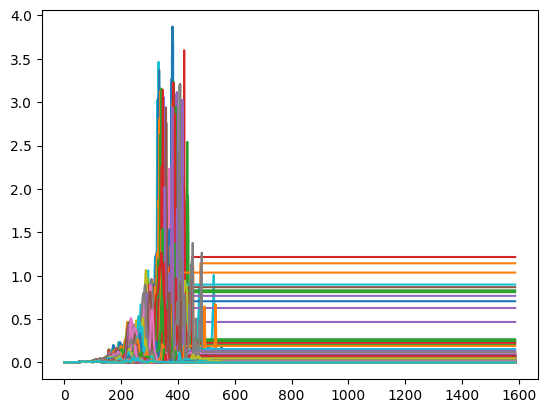

In [53]:
ax1 = plt.subplot(1, 1, 1)

for pixel_index in range(1000, 1200):

    ax1.plot(primitive_data_og['dens'][:, pixel_index])

In [ ]:
## end scratch

In [46]:
primitive_data_og = fluid_model.get_prims_from_geodesics(S)

a 4.76837158203125e-07
b 0.0006422996520996094


  0%|          | 0/456 [00:00<?, ?it/s]

0 0 7.867813110351562e-06 0.001413106918334961 0.07243943214416504 3.337860107421875e-06 0.012231111526489258
0 1 7.62939453125e-06 0.001065969467163086 0.05189776420593262 1.1920928955078125e-05 0.004286289215087891
0 2 3.814697265625e-06 0.0006494522094726562 0.05426645278930664 1.8835067749023438e-05 0.005717039108276367
0 3 5.4836273193359375e-06 0.0009369850158691406 0.06030893325805664 1.6450881958007812e-05 0.006005764007568359
0 4 5.9604644775390625e-06 0.0010075569152832031 0.06729555130004883 1.7404556274414062e-05 0.0072574615478515625


  0%|          | 1/456 [00:00<04:11,  1.81it/s]

0 5 4.5299530029296875e-06 0.0009918212890625 0.057652950286865234 1.5974044799804688e-05 0.0046155452728271484
0 6 4.0531158447265625e-06 0.0008556842803955078 0.05430436134338379 1.2159347534179688e-05 0.0048046112060546875
0 7 6.198883056640625e-06 0.0008687973022460938 0.06322908401489258 1.2159347534179688e-05 0.004615068435668945
1 0 5.245208740234375e-06 0.0008614063262939453 0.055777788162231445 1.3589859008789062e-05 0.003842592239379883
1 1 3.814697265625e-06 0.0007841587066650391 0.05328631401062012 1.049041748046875e-05 0.00395512580871582
1 2 4.0531158447265625e-06 0.0009407997131347656 0.052459001541137695 9.5367431640625e-06 0.0038268566131591797
1 3 3.5762786865234375e-06 0.0007231235504150391 0.052179574966430664 9.298324584960938e-06 0.004017829895019531
1 4 3.5762786865234375e-06 0.0008051395416259766 0.0526278018951416 9.5367431640625e-06 0.004192352294921875


  0%|          | 2/456 [00:01<03:51,  1.96it/s]

1 5 4.0531158447265625e-06 0.0008821487426757812 0.05466628074645996 8.821487426757812e-06 0.003946542739868164
1 6 3.5762786865234375e-06 0.0008747577667236328 0.05174589157104492 1.1444091796875e-05 0.0042133331298828125
1 7 3.814697265625e-06 0.0008280277252197266 0.06051516532897949 8.821487426757812e-06 0.0038950443267822266
2 0 4.76837158203125e-06 0.0008711814880371094 0.05672049522399902 1.0728836059570312e-05 0.004442453384399414
2 1 4.5299530029296875e-06 0.0009281635284423828 0.051638126373291016 9.298324584960938e-06 0.0038747787475585938
2 2 3.814697265625e-06 0.0008459091186523438 0.055443763732910156 9.059906005859375e-06 0.003854513168334961
2 3 3.5762786865234375e-06 0.0007448196411132812 0.05269742012023926 9.775161743164062e-06 0.0039904117584228516
2 4 4.0531158447265625e-06 0.0007393360137939453 0.053934574127197266 1.6450881958007812e-05 0.00543975830078125


  1%|          | 3/456 [00:01<03:43,  2.02it/s]

2 5 4.76837158203125e-06 0.0008428096771240234 0.05456137657165527 9.5367431640625e-06 0.003890514373779297
2 6 4.291534423828125e-06 0.0008134841918945312 0.05068230628967285 9.5367431640625e-06 0.003873586654663086
2 7 3.5762786865234375e-06 0.0006933212280273438 0.052910804748535156 8.58306884765625e-06 0.0038645267486572266
3 0 4.76837158203125e-06 0.0008451938629150391 0.05857491493225098 9.298324584960938e-06 0.0040667057037353516
3 1 3.5762786865234375e-06 0.0008177757263183594 0.07546687126159668 1.4781951904296875e-05 0.004832029342651367
3 2 8.58306884765625e-06 0.0013890266418457031 0.04813218116760254 8.58306884765625e-06 0.003942012786865234
3 3 3.337860107421875e-06 0.0007371902465820312 0.04791665077209473 9.298324584960938e-06 0.003912210464477539
3 4 3.5762786865234375e-06 0.000978231430053711 0.049593448638916016 9.5367431640625e-06 0.0037391185760498047


  1%|          | 4/456 [00:01<03:39,  2.06it/s]

3 5 2.6226043701171875e-06 0.0007205009460449219 0.04837632179260254 9.059906005859375e-06 0.003915071487426758
3 6 3.814697265625e-06 0.0008618831634521484 0.050057172775268555 8.58306884765625e-06 0.0037767887115478516
3 7 2.86102294921875e-06 0.0005729198455810547 0.04752707481384277 1.0728836059570312e-05 0.0039043426513671875
4 0 3.337860107421875e-06 0.0007295608520507812 0.0663905143737793 1.5735626220703125e-05 0.005677223205566406
4 1 4.291534423828125e-06 0.0022919178009033203 0.05561542510986328 8.821487426757812e-06 0.003804445266723633
4 2 2.86102294921875e-06 0.0007827281951904297 0.046987295150756836 8.58306884765625e-06 0.003823995590209961
4 3 2.86102294921875e-06 0.0006227493286132812 0.04653477668762207 8.58306884765625e-06 0.0038149356842041016
4 4 2.1457672119140625e-06 0.0006349086761474609 0.04820132255554199 1.239776611328125e-05 0.004621028900146484


  1%|          | 5/456 [00:02<03:34,  2.11it/s]

4 5 3.5762786865234375e-06 0.0009195804595947266 0.05102276802062988 8.58306884765625e-06 0.003987312316894531
4 6 4.0531158447265625e-06 0.0009708404541015625 0.04780912399291992 9.5367431640625e-06 0.004037380218505859
4 7 3.814697265625e-06 0.0007369518280029297 0.04611849784851074 8.58306884765625e-06 0.003856182098388672
5 0 3.0994415283203125e-06 0.00070953369140625 0.05266451835632324 1.0013580322265625e-05 0.003973960876464844
5 1 5.245208740234375e-06 0.0008141994476318359 0.04947161674499512 1.0728836059570312e-05 0.003929853439331055
5 2 3.5762786865234375e-06 0.0007987022399902344 0.04829668998718262 1.0251998901367188e-05 0.003764629364013672
5 3 2.6226043701171875e-06 0.0006880760192871094 0.04650568962097168 8.58306884765625e-06 0.0038161277770996094
5 4 2.6226043701171875e-06 0.0005807876586914062 0.04839134216308594 9.298324584960938e-06 0.0038084983825683594


  1%|▏         | 6/456 [00:02<03:27,  2.17it/s]

5 5 2.86102294921875e-06 0.0008156299591064453 0.049617767333984375 9.059906005859375e-06 0.0039479732513427734
5 6 3.0994415283203125e-06 0.0007221698760986328 0.050199031829833984 8.58306884765625e-06 0.00371551513671875
5 7 2.86102294921875e-06 0.0006892681121826172 0.04677605628967285 8.58306884765625e-06 0.003787517547607422
6 0 3.814697265625e-06 0.0007758140563964844 0.05203890800476074 1.0251998901367188e-05 0.004016399383544922
6 1 5.9604644775390625e-06 0.0009386539459228516 0.05081772804260254 8.821487426757812e-06 0.003818511962890625
6 2 3.0994415283203125e-06 0.0007007122039794922 0.04844355583190918 9.059906005859375e-06 0.003814697265625
6 3 2.6226043701171875e-06 0.0006582736968994141 0.04665112495422363 8.821487426757812e-06 0.0038645267486572266
6 4 2.86102294921875e-06 0.0006673336029052734 0.05019855499267578 8.344650268554688e-06 0.0041310787200927734


  2%|▏         | 7/456 [00:03<03:23,  2.20it/s]

6 5 5.9604644775390625e-06 0.0010135173797607422 0.04970049858093262 1.0967254638671875e-05 0.004389047622680664
6 6 5.0067901611328125e-06 0.0010099411010742188 0.05161404609680176 8.58306884765625e-06 0.0037992000579833984
6 7 2.86102294921875e-06 0.0006761550903320312 0.04607868194580078 7.867813110351562e-06 0.003798961639404297
7 0 3.5762786865234375e-06 0.0006701946258544922 0.05306386947631836 9.059906005859375e-06 0.0038042068481445312
7 1 2.384185791015625e-06 0.0006880760192871094 0.05038094520568848 9.775161743164062e-06 0.003806591033935547
7 2 2.86102294921875e-06 0.0007054805755615234 0.05092000961303711 8.344650268554688e-06 0.0038988590240478516
7 3 3.5762786865234375e-06 0.0007421970367431641 0.04717826843261719 9.5367431640625e-06 0.0038650035858154297
7 4 2.86102294921875e-06 0.0006291866302490234 0.0496068000793457 1.049041748046875e-05 0.004148006439208984


  2%|▏         | 8/456 [00:03<03:21,  2.22it/s]

7 5 3.814697265625e-06 0.0008652210235595703 0.04814505577087402 8.58306884765625e-06 0.003920078277587891
7 6 4.5299530029296875e-06 0.0011608600616455078 0.04887032508850098 9.059906005859375e-06 0.003871917724609375
7 7 3.337860107421875e-06 0.0006601810455322266 0.04872894287109375 8.58306884765625e-06 0.0038585662841796875
8 0 3.337860107421875e-06 0.0008845329284667969 0.05584454536437988 9.059906005859375e-06 0.003991365432739258
8 1 4.76837158203125e-06 0.0010881423950195312 0.04919719696044922 1.2874603271484375e-05 0.004006147384643555
8 2 3.0994415283203125e-06 0.0008285045623779297 0.0494837760925293 8.106231689453125e-06 0.0037450790405273438
8 3 2.384185791015625e-06 0.0006413459777832031 0.04616403579711914 8.344650268554688e-06 0.0038280487060546875
8 4 2.86102294921875e-06 0.0006301403045654297 0.04791998863220215 9.059906005859375e-06 0.0037555694580078125


  2%|▏         | 9/456 [00:04<03:19,  2.24it/s]

8 5 2.86102294921875e-06 0.0008065700531005859 0.048484086990356445 9.775161743164062e-06 0.0038652420043945312
8 6 3.5762786865234375e-06 0.0007336139678955078 0.04793548583984375 7.62939453125e-06 0.004127979278564453
8 7 3.337860107421875e-06 0.0006997585296630859 0.04811596870422363 8.58306884765625e-06 0.0038051605224609375
9 0 3.5762786865234375e-06 0.0008106231689453125 0.052709341049194336 1.2636184692382812e-05 0.004650592803955078
9 1 4.76837158203125e-06 0.0008134841918945312 0.05380582809448242 9.5367431640625e-06 0.0037708282470703125
9 2 2.86102294921875e-06 0.0007266998291015625 0.04891204833984375 8.106231689453125e-06 0.0038847923278808594
9 3 3.0994415283203125e-06 0.0006706714630126953 0.047167301177978516 8.821487426757812e-06 0.003838777542114258
9 4 3.0994415283203125e-06 0.0006868839263916016 0.04866170883178711 1.6450881958007812e-05 0.005028247833251953


  2%|▏         | 10/456 [00:04<03:18,  2.25it/s]

9 5 3.5762786865234375e-06 0.0008389949798583984 0.04876112937927246 9.298324584960938e-06 0.0038061141967773438
9 6 4.0531158447265625e-06 0.0008215904235839844 0.04986310005187988 8.58306884765625e-06 0.003840923309326172
9 7 3.5762786865234375e-06 0.0007662773132324219 0.046050310134887695 8.344650268554688e-06 0.0037870407104492188
10 0 3.0994415283203125e-06 0.0008380413055419922 0.0536344051361084 1.1205673217773438e-05 0.0038704872131347656
10 1 3.337860107421875e-06 0.0008080005645751953 0.05217385292053223 1.1205673217773438e-05 0.003996372222900391
10 2 3.814697265625e-06 0.000982046127319336 0.04773068428039551 9.298324584960938e-06 0.004178285598754883
10 3 4.291534423828125e-06 0.0008165836334228516 0.04715371131896973 8.58306884765625e-06 0.003852367401123047
10 4 2.6226043701171875e-06 0.0006349086761474609 0.049189090728759766 9.775161743164062e-06 0.0040819644927978516


  2%|▏         | 11/456 [00:05<03:17,  2.25it/s]

10 5 3.5762786865234375e-06 0.0008380413055419922 0.04862260818481445 8.344650268554688e-06 0.003826618194580078
10 6 3.5762786865234375e-06 0.0009272098541259766 0.05161547660827637 8.58306884765625e-06 0.003871440887451172
10 7 2.384185791015625e-06 0.0007278919219970703 0.0471954345703125 7.62939453125e-06 0.0037746429443359375
11 0 3.5762786865234375e-06 0.0006844997406005859 0.052390098571777344 9.298324584960938e-06 0.003923654556274414
11 1 4.291534423828125e-06 0.000989675521850586 0.052013397216796875 1.1444091796875e-05 0.0038831233978271484
11 2 3.337860107421875e-06 0.0007224082946777344 0.049582481384277344 8.821487426757812e-06 0.0037343502044677734
11 3 2.6226043701171875e-06 0.000812530517578125 0.04822063446044922 8.58306884765625e-06 0.0038115978240966797
11 4 2.86102294921875e-06 0.0006632804870605469 0.048700809478759766 9.775161743164062e-06 0.004208564758300781


  3%|▎         | 12/456 [00:05<03:16,  2.26it/s]

11 5 3.814697265625e-06 0.0009367465972900391 0.04791831970214844 9.775161743164062e-06 0.00399017333984375
11 6 4.5299530029296875e-06 0.000934600830078125 0.049172163009643555 9.298324584960938e-06 0.003833770751953125
11 7 2.6226043701171875e-06 0.0006937980651855469 0.04739546775817871 7.3909759521484375e-06 0.003790140151977539
12 0 3.0994415283203125e-06 0.0007853507995605469 0.07680130004882812 1.3113021850585938e-05 0.005500316619873047
12 1 5.4836273193359375e-06 0.002340078353881836 0.052484750747680664 9.298324584960938e-06 0.003831148147583008
12 2 2.6226043701171875e-06 0.0007190704345703125 0.04983830451965332 8.344650268554688e-06 0.0037627220153808594
12 3 2.6226043701171875e-06 0.0006291866302490234 0.046784162521362305 8.821487426757812e-06 0.0038421154022216797
12 4 3.5762786865234375e-06 0.0006811618804931641 0.04729413986206055 9.775161743164062e-06 0.0040569305419921875


  3%|▎         | 13/456 [00:05<03:19,  2.23it/s]

12 5 4.5299530029296875e-06 0.0009779930114746094 0.04870486259460449 9.059906005859375e-06 0.0038695335388183594
12 6 3.0994415283203125e-06 0.0007855892181396484 0.04895734786987305 8.821487426757812e-06 0.003964424133300781
12 7 4.0531158447265625e-06 0.0007448196411132812 0.04827475547790527 8.821487426757812e-06 0.0037963390350341797
13 0 3.5762786865234375e-06 0.0006766319274902344 0.05451655387878418 1.6450881958007812e-05 0.004194974899291992
13 1 4.0531158447265625e-06 0.0008475780487060547 0.05083727836608887 9.059906005859375e-06 0.0038242340087890625
13 2 2.86102294921875e-06 0.0009381771087646484 0.049567222595214844 8.344650268554688e-06 0.004004240036010742
13 3 4.291534423828125e-06 0.0008177757263183594 0.046285152435302734 9.298324584960938e-06 0.004033565521240234
13 4 3.0994415283203125e-06 0.0006864070892333984 0.04780387878417969 9.5367431640625e-06 0.0042645931243896484


  3%|▎         | 14/456 [00:06<03:17,  2.24it/s]

13 5 4.291534423828125e-06 0.0009367465972900391 0.04852104187011719 8.821487426757812e-06 0.0038003921508789062
13 6 2.6226043701171875e-06 0.0009613037109375 0.04947185516357422 8.344650268554688e-06 0.00382232666015625
13 7 2.384185791015625e-06 0.0006926059722900391 0.04670357704162598 8.821487426757812e-06 0.003810882568359375
14 0 3.5762786865234375e-06 0.000762939453125 0.1432187557220459 9.5367431640625e-06 0.0044307708740234375
14 1 3.337860107421875e-06 0.000858306884765625 0.04648137092590332 9.059906005859375e-06 0.003846883773803711
14 2 3.0994415283203125e-06 0.0006613731384277344 0.04594278335571289 8.344650268554688e-06 0.0038089752197265625
14 3 2.86102294921875e-06 0.0007109642028808594 0.048338890075683594 8.106231689453125e-06 0.0037374496459960938


  3%|▎         | 15/456 [00:06<03:26,  2.13it/s]

14 4 2.6226043701171875e-06 0.0006499290466308594 0.04742908477783203 9.298324584960938e-06 0.003747701644897461
14 5 2.86102294921875e-06 0.0007305145263671875 0.048200130462646484 8.344650268554688e-06 0.003755331039428711
14 6 2.6226043701171875e-06 0.0006296634674072266 0.048423051834106445 8.821487426757812e-06 0.0037689208984375
14 7 2.6226043701171875e-06 0.0007009506225585938 0.049672842025756836 7.867813110351562e-06 0.003679513931274414
15 0 3.5762786865234375e-06 0.0006961822509765625 0.14378619194030762 8.106231689453125e-06 0.004385709762573242
15 1 4.291534423828125e-06 0.0010166168212890625 0.048635005950927734 9.775161743164062e-06 0.003755331039428711
15 2 2.86102294921875e-06 0.0006704330444335938 0.04588937759399414 8.106231689453125e-06 0.0039348602294921875
15 3 3.5762786865234375e-06 0.0007836818695068359 0.05054736137390137 7.867813110351562e-06 0.0038509368896484375


  4%|▎         | 16/456 [00:07<03:33,  2.06it/s]

15 4 4.5299530029296875e-06 0.0007379055023193359 0.04625368118286133 8.344650268554688e-06 0.0037534236907958984
15 5 3.337860107421875e-06 0.0008225440979003906 0.051483869552612305 9.298324584960938e-06 0.0037801265716552734
15 6 3.0994415283203125e-06 0.0006339550018310547 0.04731416702270508 1.1682510375976562e-05 0.003921985626220703
15 7 3.5762786865234375e-06 0.0006961822509765625 0.046602487564086914 8.106231689453125e-06 0.003770589828491211
16 0 3.814697265625e-06 0.0007176399230957031 0.14501261711120605 7.867813110351562e-06 0.004935264587402344
16 1 4.5299530029296875e-06 0.0009701251983642578 0.04924941062927246 9.298324584960938e-06 0.0038220882415771484
16 2 2.384185791015625e-06 0.0006058216094970703 0.05026102066040039 1.0251998901367188e-05 0.003993988037109375
16 3 3.337860107421875e-06 0.0007383823394775391 0.04681754112243652 7.867813110351562e-06 0.003871440887451172


  4%|▎         | 17/456 [00:07<03:38,  2.01it/s]

16 4 3.0994415283203125e-06 0.0007119178771972656 0.047739267349243164 9.298324584960938e-06 0.0038404464721679688
16 5 4.291534423828125e-06 0.0008480548858642578 0.048207998275756836 8.106231689453125e-06 0.0039031505584716797
16 6 3.337860107421875e-06 0.0006382465362548828 0.04708433151245117 8.58306884765625e-06 0.003977775573730469
16 7 3.337860107421875e-06 0.0006885528564453125 0.04730391502380371 8.106231689453125e-06 0.0038199424743652344
17 0 3.814697265625e-06 0.0007059574127197266 0.14454102516174316 7.867813110351562e-06 0.004560947418212891
17 1 2.86102294921875e-06 0.0007772445678710938 0.04764866828918457 9.775161743164062e-06 0.0039010047912597656
17 2 4.291534423828125e-06 0.0006468296051025391 0.0480341911315918 8.344650268554688e-06 0.0038220882415771484
17 3 3.814697265625e-06 0.0007541179656982422 0.04686689376831055 7.867813110351562e-06 0.003918647766113281


  4%|▍         | 18/456 [00:08<03:42,  1.97it/s]

17 4 3.5762786865234375e-06 0.0007343292236328125 0.04720950126647949 8.821487426757812e-06 0.003949165344238281
17 5 3.814697265625e-06 0.0007984638214111328 0.051319122314453125 9.059906005859375e-06 0.003881216049194336
17 6 3.337860107421875e-06 0.0008311271667480469 0.049199819564819336 9.059906005859375e-06 0.0038216114044189453
17 7 2.86102294921875e-06 0.0008451938629150391 0.05125260353088379 8.821487426757812e-06 0.0039038658142089844
18 0 3.5762786865234375e-06 0.0007710456848144531 0.14710712432861328 9.775161743164062e-06 0.004575490951538086
18 1 3.814697265625e-06 0.0008542537689208984 0.04734301567077637 9.298324584960938e-06 0.003910541534423828
18 2 3.0994415283203125e-06 0.0006320476531982422 0.04663276672363281 8.58306884765625e-06 0.0038156509399414062
18 3 3.337860107421875e-06 0.0006117820739746094 0.0478968620300293 8.106231689453125e-06 0.0037980079650878906


  4%|▍         | 19/456 [00:09<03:44,  1.95it/s]

18 4 2.86102294921875e-06 0.0006127357482910156 0.04839897155761719 9.298324584960938e-06 0.0038776397705078125
18 5 4.0531158447265625e-06 0.0008263587951660156 0.05091452598571777 1.0013580322265625e-05 0.0038564205169677734
18 6 2.86102294921875e-06 0.0007102489471435547 0.04809308052062988 8.344650268554688e-06 0.003833770751953125
18 7 2.86102294921875e-06 0.0005557537078857422 0.047044992446899414 8.821487426757812e-06 0.0037984848022460938
19 0 3.814697265625e-06 0.0008709430694580078 0.1450493335723877 8.344650268554688e-06 0.004601716995239258
19 1 3.337860107421875e-06 0.0009343624114990234 0.046727657318115234 9.5367431640625e-06 0.003936767578125
19 2 3.0994415283203125e-06 0.0007770061492919922 0.04671072959899902 9.775161743164062e-06 0.003879070281982422
19 3 4.291534423828125e-06 0.0007503032684326172 0.04620838165283203 8.344650268554688e-06 0.003999948501586914


  4%|▍         | 20/456 [00:09<03:45,  1.94it/s]

19 4 3.337860107421875e-06 0.0007214546203613281 0.04764413833618164 1.0013580322265625e-05 0.003870725631713867
19 5 3.5762786865234375e-06 0.0008642673492431641 0.049443960189819336 8.344650268554688e-06 0.0038013458251953125
19 6 2.384185791015625e-06 0.0006098747253417969 0.04845738410949707 8.344650268554688e-06 0.0037882328033447266
19 7 2.6226043701171875e-06 0.000644683837890625 0.04721999168395996 9.298324584960938e-06 0.003774404525756836
20 0 3.5762786865234375e-06 0.0007026195526123047 0.17659497261047363 8.58306884765625e-06 0.004653215408325195
20 1 5.245208740234375e-06 0.000997781753540039 0.04676365852355957 1.3828277587890625e-05 0.0039234161376953125
20 2 3.5762786865234375e-06 0.0006983280181884766 0.047472476959228516 1.1205673217773438e-05 0.004122734069824219
20 3 3.814697265625e-06 0.0007169246673583984 0.04925084114074707 8.58306884765625e-06 0.003753662109375


  5%|▍         | 21/456 [00:10<03:50,  1.89it/s]

20 4 2.86102294921875e-06 0.0006902217864990234 0.047545671463012695 9.059906005859375e-06 0.0037775039672851562
20 5 2.86102294921875e-06 0.0007686614990234375 0.050241947174072266 1.239776611328125e-05 0.003851652145385742
20 6 4.291534423828125e-06 0.0008258819580078125 0.05087709426879883 8.344650268554688e-06 0.003788471221923828
20 7 2.86102294921875e-06 0.0006442070007324219 0.04907703399658203 8.106231689453125e-06 0.003783702850341797
21 0 3.0994415283203125e-06 0.0007920265197753906 0.15027403831481934 7.152557373046875e-06 0.0046465396881103516
21 1 3.337860107421875e-06 0.0008757114410400391 0.04770708084106445 8.821487426757812e-06 0.003780841827392578
21 2 3.0994415283203125e-06 0.0006477832794189453 0.04863905906677246 8.58306884765625e-06 0.003777027130126953
21 3 2.6226043701171875e-06 0.0006632804870605469 0.04918384552001953 7.867813110351562e-06 0.0038247108459472656


  5%|▍         | 22/456 [00:10<03:51,  1.88it/s]

21 4 2.86102294921875e-06 0.0007586479187011719 0.048269033432006836 8.821487426757812e-06 0.003848552703857422
21 5 5.245208740234375e-06 0.0015113353729248047 0.05109143257141113 9.298324584960938e-06 0.0038137435913085938
21 6 3.0994415283203125e-06 0.0006296634674072266 0.04941964149475098 8.106231689453125e-06 0.0037450790405273438
21 7 2.6226043701171875e-06 0.0006344318389892578 0.04832053184509277 8.344650268554688e-06 0.0037152767181396484
22 0 3.814697265625e-06 0.0009365081787109375 0.14624810218811035 8.344650268554688e-06 0.005217790603637695
22 1 3.5762786865234375e-06 0.0008900165557861328 0.04789853096008301 9.298324584960938e-06 0.0037789344787597656
22 2 3.337860107421875e-06 0.0006427764892578125 0.04778099060058594 8.58306884765625e-06 0.0037386417388916016
22 3 2.6226043701171875e-06 0.0007913112640380859 0.04762721061706543 7.867813110351562e-06 0.003748655319213867


  5%|▌         | 23/456 [00:11<03:49,  1.88it/s]

22 4 2.6226043701171875e-06 0.0006244182586669922 0.04743623733520508 8.821487426757812e-06 0.0037348270416259766
22 5 3.0994415283203125e-06 0.0007791519165039062 0.04982399940490723 9.059906005859375e-06 0.003881216049194336
22 6 4.76837158203125e-06 0.0007503032684326172 0.04588770866394043 9.059906005859375e-06 0.004244565963745117
22 7 5.245208740234375e-06 0.0009644031524658203 0.049309492111206055 7.867813110351562e-06 0.0038187503814697266
23 0 3.5762786865234375e-06 0.0008485317230224609 0.1450355052947998 8.344650268554688e-06 0.004528045654296875
23 1 3.814697265625e-06 0.0009553432464599609 0.048172950744628906 9.059906005859375e-06 0.003848552703857422
23 2 3.0994415283203125e-06 0.0007352828979492188 0.047051191329956055 8.106231689453125e-06 0.0038776397705078125
23 3 4.291534423828125e-06 0.0007882118225097656 0.04685831069946289 8.106231689453125e-06 0.003947257995605469


  5%|▌         | 24/456 [00:11<03:48,  1.89it/s]

23 4 3.337860107421875e-06 0.0006568431854248047 0.04762101173400879 1.3113021850585938e-05 0.0049397945404052734
23 5 3.5762786865234375e-06 0.0008471012115478516 0.05162978172302246 9.5367431640625e-06 0.003729581832885742
23 6 2.6226043701171875e-06 0.0006341934204101562 0.04769754409790039 8.106231689453125e-06 0.003747224807739258
23 7 2.86102294921875e-06 0.0007429122924804688 0.04761314392089844 8.344650268554688e-06 0.0037755966186523438
24 0 3.5762786865234375e-06 0.0008440017700195312 0.1448056697845459 7.867813110351562e-06 0.0045413970947265625
24 1 2.384185791015625e-06 0.0008759498596191406 0.04735279083251953 9.059906005859375e-06 0.0037686824798583984
24 2 2.86102294921875e-06 0.0006349086761474609 0.04713630676269531 7.62939453125e-06 0.0039014816284179688
24 3 3.0994415283203125e-06 0.0006763935089111328 0.04978537559509277 7.62939453125e-06 0.0037987232208251953


  5%|▌         | 25/456 [00:12<03:48,  1.89it/s]

24 4 3.5762786865234375e-06 0.0006859302520751953 0.046753644943237305 8.821487426757812e-06 0.0038628578186035156
24 5 3.814697265625e-06 0.0008013248443603516 0.051514625549316406 9.059906005859375e-06 0.0038194656372070312
24 6 3.0994415283203125e-06 0.0006635189056396484 0.04945683479309082 8.344650268554688e-06 0.003839731216430664
24 7 2.6226043701171875e-06 0.0006909370422363281 0.0477750301361084 7.867813110351562e-06 0.0037508010864257812
25 0 4.76837158203125e-06 0.0009286403656005859 0.14841222763061523 1.1920928955078125e-05 0.0052945613861083984
25 1 3.0994415283203125e-06 0.0009391307830810547 0.04740571975708008 9.5367431640625e-06 0.0037267208099365234
25 2 2.384185791015625e-06 0.0006279945373535156 0.04778122901916504 7.867813110351562e-06 0.0037772655487060547
25 3 2.384185791015625e-06 0.0006120204925537109 0.04745841026306152 8.344650268554688e-06 0.003731250762939453


  6%|▌         | 26/456 [00:12<03:48,  1.88it/s]

25 4 2.6226043701171875e-06 0.0005879402160644531 0.04802417755126953 9.059906005859375e-06 0.0038182735443115234
25 5 3.337860107421875e-06 0.0007386207580566406 0.0528569221496582 1.0251998901367188e-05 0.0038194656372070312
25 6 2.86102294921875e-06 0.0006418228149414062 0.049132585525512695 8.58306884765625e-06 0.0038270950317382812
25 7 2.86102294921875e-06 0.0006511211395263672 0.05139803886413574 7.867813110351562e-06 0.0039000511169433594
26 0 3.814697265625e-06 0.0008835792541503906 0.8832564353942871 8.58306884765625e-06 0.004044771194458008
26 1 3.814697265625e-06 0.0009086132049560547 0.04816007614135742 9.298324584960938e-06 0.0037512779235839844
26 2 2.86102294921875e-06 0.0005829334259033203 0.04712224006652832 8.58306884765625e-06 0.0037806034088134766
26 3 3.337860107421875e-06 0.00067901611328125 0.048630475997924805 9.298324584960938e-06 0.003954172134399414


  6%|▌         | 27/456 [00:14<05:26,  1.31it/s]

26 4 4.291534423828125e-06 0.0008189678192138672 0.07817745208740234 1.1444091796875e-05 0.0038001537322998047
26 5 4.0531158447265625e-06 0.0008957386016845703 0.05039620399475098 9.059906005859375e-06 0.003704547882080078
26 6 2.86102294921875e-06 0.0006237030029296875 0.0471651554107666 8.106231689453125e-06 0.0037000179290771484
26 7 3.0994415283203125e-06 0.0006203651428222656 0.04767870903015137 8.106231689453125e-06 0.003777742385864258
27 0 3.0994415283203125e-06 0.0007092952728271484 0.8814244270324707 1.0967254638671875e-05 0.004971742630004883
27 1 4.5299530029296875e-06 0.000993490219116211 0.04720020294189453 9.5367431640625e-06 0.003913402557373047
27 2 3.5762786865234375e-06 0.0007178783416748047 0.04882359504699707 8.344650268554688e-06 0.0037703514099121094
27 3 3.337860107421875e-06 0.00063323974609375 0.0472867488861084 8.106231689453125e-06 0.0038869380950927734


  6%|▌         | 28/456 [00:15<06:30,  1.10it/s]

27 4 2.86102294921875e-06 0.0006811618804931641 0.05060434341430664 9.059906005859375e-06 0.003926992416381836
27 5 5.4836273193359375e-06 0.0010585784912109375 0.04900383949279785 9.059906005859375e-06 0.0040760040283203125
27 6 3.5762786865234375e-06 0.0007281303405761719 0.0466914176940918 7.867813110351562e-06 0.004057168960571289
27 7 3.5762786865234375e-06 0.0008645057678222656 0.04748654365539551 8.821487426757812e-06 0.0037903785705566406
28 0 3.337860107421875e-06 0.0006737709045410156 0.8906841278076172 9.298324584960938e-06 0.0048847198486328125
28 1 2.86102294921875e-06 0.0010082721710205078 0.04959440231323242 9.775161743164062e-06 0.0037615299224853516
28 2 2.6226043701171875e-06 0.0007708072662353516 0.04828500747680664 8.58306884765625e-06 0.003985881805419922
28 3 3.5762786865234375e-06 0.000720977783203125 0.0487825870513916 1.4543533325195312e-05 0.0040280818939208984


  6%|▋         | 29/456 [00:16<07:18,  1.03s/it]

28 4 4.5299530029296875e-06 0.0007698535919189453 0.04826545715332031 9.775161743164062e-06 0.003958225250244141
28 5 4.0531158447265625e-06 0.0009539127349853516 0.07490396499633789 8.58306884765625e-06 0.003995180130004883
28 6 3.337860107421875e-06 0.0007021427154541016 0.04640340805053711 9.298324584960938e-06 0.0038194656372070312
28 7 3.0994415283203125e-06 0.0006792545318603516 0.04638314247131348 8.58306884765625e-06 0.003876209259033203
29 0 3.5762786865234375e-06 0.0008664131164550781 0.8824796676635742 8.821487426757812e-06 0.004893302917480469
29 1 4.291534423828125e-06 0.0008747577667236328 0.0464930534362793 8.821487426757812e-06 0.0038754940032958984
29 2 3.5762786865234375e-06 0.0007960796356201172 0.048711538314819336 8.821487426757812e-06 0.003935575485229492
29 3 4.5299530029296875e-06 0.0006732940673828125 0.0503995418548584 8.821487426757812e-06 0.0041484832763671875


  7%|▋         | 30/456 [00:17<07:49,  1.10s/it]

29 4 3.814697265625e-06 0.0008018016815185547 0.04880642890930176 9.298324584960938e-06 0.004051685333251953
29 5 4.5299530029296875e-06 0.0008080005645751953 0.05026888847351074 8.821487426757812e-06 0.003842592239379883
29 6 3.337860107421875e-06 0.0007007122039794922 0.050786733627319336 1.0013580322265625e-05 0.003999233245849609
29 7 3.337860107421875e-06 0.0006742477416992188 0.049657583236694336 9.298324584960938e-06 0.004122018814086914
30 0 3.814697265625e-06 0.0007073879241943359 0.8897321224212646 9.5367431640625e-06 0.004210233688354492
30 1 4.291534423828125e-06 0.0009429454803466797 0.04686689376831055 9.5367431640625e-06 0.0037698745727539062
30 2 2.6226043701171875e-06 0.0006177425384521484 0.04808688163757324 8.344650268554688e-06 0.003762483596801758
30 3 3.0994415283203125e-06 0.0006778240203857422 0.04793381690979004 9.298324584960938e-06 0.003942012786865234


  7%|▋         | 31/456 [00:19<08:09,  1.15s/it]

30 4 3.814697265625e-06 0.0007891654968261719 0.049173593521118164 9.298324584960938e-06 0.003953695297241211
30 5 3.337860107421875e-06 0.0007634162902832031 0.05022454261779785 1.1205673217773438e-05 0.0038480758666992188
30 6 2.86102294921875e-06 0.0008246898651123047 0.04881858825683594 8.821487426757812e-06 0.003729581832885742
30 7 3.337860107421875e-06 0.0006318092346191406 0.04756903648376465 8.344650268554688e-06 0.0038232803344726562
31 0 3.814697265625e-06 0.0007061958312988281 0.9142758846282959 9.298324584960938e-06 0.005182743072509766
31 1 4.0531158447265625e-06 0.0008747577667236328 0.047451019287109375 1.2874603271484375e-05 0.003878355026245117
31 2 3.0994415283203125e-06 0.0006463527679443359 0.047853708267211914 8.344650268554688e-06 0.003788471221923828
31 3 3.0994415283203125e-06 0.0006704330444335938 0.051113128662109375 8.106231689453125e-06 0.003949165344238281


  7%|▋         | 32/456 [00:20<08:27,  1.20s/it]

31 4 3.814697265625e-06 0.0006945133209228516 0.04655861854553223 9.298324584960938e-06 0.003819704055786133
31 5 4.291534423828125e-06 0.001007080078125 0.05026054382324219 1.0728836059570312e-05 0.0038132667541503906
31 6 3.337860107421875e-06 0.0006978511810302734 0.04809069633483887 8.58306884765625e-06 0.003826618194580078
31 7 2.6226043701171875e-06 0.0006787776947021484 0.049750566482543945 7.62939453125e-06 0.003757476806640625
32 0 4.76837158203125e-06 0.0008826255798339844 0.8868694305419922 9.059906005859375e-06 0.004914045333862305
32 1 2.86102294921875e-06 0.0009918212890625 0.0475308895111084 9.298324584960938e-06 0.0037839412689208984
32 2 2.6226043701171875e-06 0.0006341934204101562 0.04777693748474121 8.58306884765625e-06 0.0038268566131591797
32 3 3.337860107421875e-06 0.0006732940673828125 0.046021223068237305 1.049041748046875e-05 0.005075216293334961


  7%|▋         | 33/456 [00:21<08:39,  1.23s/it]

32 4 5.0067901611328125e-06 0.0010139942169189453 0.07990479469299316 9.5367431640625e-06 0.003969430923461914
32 5 4.0531158447265625e-06 0.0007648468017578125 0.0483248233795166 9.775161743164062e-06 0.0038652420043945312
32 6 2.86102294921875e-06 0.0007028579711914062 0.04780435562133789 9.298324584960938e-06 0.003828287124633789
32 7 3.0994415283203125e-06 0.0006632804870605469 0.047624826431274414 9.775161743164062e-06 0.0038030147552490234
33 0 4.0531158447265625e-06 0.0008063316345214844 0.8828701972961426 9.775161743164062e-06 0.004160642623901367
33 1 3.5762786865234375e-06 0.0009181499481201172 0.04772067070007324 9.298324584960938e-06 0.0037689208984375
33 2 3.0994415283203125e-06 0.0006496906280517578 0.04942727088928223 7.867813110351562e-06 0.0038022994995117188
33 3 2.6226043701171875e-06 0.0007536411285400391 0.04741334915161133 8.344650268554688e-06 0.0037775039672851562


  7%|▋         | 34/456 [00:23<08:43,  1.24s/it]

33 4 2.1457672119140625e-06 0.0006074905395507812 0.05211281776428223 8.821487426757812e-06 0.004121541976928711
33 5 4.5299530029296875e-06 0.0008826255798339844 0.04971122741699219 9.775161743164062e-06 0.003807544708251953
33 6 2.86102294921875e-06 0.0007092952728271484 0.04822587966918945 9.059906005859375e-06 0.003756284713745117
33 7 2.86102294921875e-06 0.0006396770477294922 0.047995567321777344 8.344650268554688e-06 0.0037734508514404297
34 0 5.7220458984375e-06 0.0009264945983886719 0.8876113891601562 9.5367431640625e-06 0.00513458251953125
34 1 4.291534423828125e-06 0.0008549690246582031 0.04719376564025879 9.298324584960938e-06 0.0037899017333984375
34 2 2.6226043701171875e-06 0.0006725788116455078 0.04992389678955078 9.059906005859375e-06 0.003960132598876953
34 3 4.76837158203125e-06 0.0008223056793212891 0.046517133712768555 8.821487426757812e-06 0.0039446353912353516


  8%|▊         | 35/456 [00:24<08:51,  1.26s/it]

34 4 3.5762786865234375e-06 0.0007588863372802734 0.061708927154541016 1.2636184692382812e-05 0.005059957504272461
34 5 4.0531158447265625e-06 0.0009860992431640625 0.07792162895202637 1.0013580322265625e-05 0.004051685333251953
34 6 3.337860107421875e-06 0.0007352828979492188 0.047731876373291016 1.3828277587890625e-05 0.003818511962890625
34 7 2.86102294921875e-06 0.0006630420684814453 0.04913187026977539 8.821487426757812e-06 0.003837108612060547
35 0 5.9604644775390625e-06 0.0008080005645751953 0.8935942649841309 1.049041748046875e-05 0.004849910736083984
35 1 3.0994415283203125e-06 0.0008504390716552734 0.04835915565490723 9.298324584960938e-06 0.003885507583618164
35 2 2.86102294921875e-06 0.0007708072662353516 0.04913830757141113 8.58306884765625e-06 0.0037949085235595703
35 3 2.384185791015625e-06 0.0006177425384521484 0.050301313400268555 8.344650268554688e-06 0.003775358200073242


  8%|▊         | 36/456 [00:25<08:52,  1.27s/it]

35 4 2.86102294921875e-06 0.0005655288696289062 0.04860401153564453 9.059906005859375e-06 0.0052318572998046875
35 5 3.814697265625e-06 0.000827789306640625 0.04893350601196289 9.5367431640625e-06 0.0039310455322265625
35 6 3.5762786865234375e-06 0.0007047653198242188 0.048082828521728516 9.298324584960938e-06 0.0039632320404052734
35 7 3.337860107421875e-06 0.0007216930389404297 0.04724454879760742 8.821487426757812e-06 0.00383758544921875
36 0 4.291534423828125e-06 0.0007343292236328125 1.1867713928222656 9.298324584960938e-06 0.005124807357788086
36 1 3.814697265625e-06 0.0010008811950683594 0.049352407455444336 9.298324584960938e-06 0.003772258758544922
36 2 3.0994415283203125e-06 0.0007100105285644531 0.05042409896850586 1.430511474609375e-05 0.0037627220153808594
36 3 2.86102294921875e-06 0.0006406307220458984 0.04734015464782715 8.344650268554688e-06 0.0038204193115234375


  8%|▊         | 37/456 [00:27<09:30,  1.36s/it]

36 4 3.0994415283203125e-06 0.0007216930389404297 0.04912209510803223 9.059906005859375e-06 0.004133701324462891
36 5 4.0531158447265625e-06 0.0010743141174316406 0.05316495895385742 8.58306884765625e-06 0.003759622573852539
36 6 2.6226043701171875e-06 0.0006358623504638672 0.047031402587890625 8.106231689453125e-06 0.0037453174591064453
36 7 2.86102294921875e-06 0.0006597042083740234 0.04688429832458496 8.106231689453125e-06 0.003746509552001953
37 0 3.814697265625e-06 0.0008683204650878906 0.9002299308776855 9.059906005859375e-06 0.0042438507080078125
37 1 3.814697265625e-06 0.0008919239044189453 0.04888439178466797 1.2636184692382812e-05 0.0038988590240478516
37 2 3.5762786865234375e-06 0.0007054805755615234 0.04766249656677246 8.344650268554688e-06 0.0038373470306396484
37 3 3.337860107421875e-06 0.0006680488586425781 0.05064892768859863 1.4543533325195312e-05 0.0057871341705322266


  8%|▊         | 38/456 [00:28<09:19,  1.34s/it]

37 4 3.814697265625e-06 0.0007793903350830078 0.04894566535949707 1.52587890625e-05 0.0039784908294677734
37 5 4.0531158447265625e-06 0.0007822513580322266 0.049433231353759766 8.58306884765625e-06 0.003766775131225586
37 6 2.6226043701171875e-06 0.0006334781646728516 0.04820823669433594 8.106231689453125e-06 0.00383758544921875
37 7 3.5762786865234375e-06 0.0007216930389404297 0.046955108642578125 8.106231689453125e-06 0.004004716873168945
38 0 2.86102294921875e-06 0.0006725788116455078 0.892284631729126 1.0728836059570312e-05 0.005045413970947266
38 1 4.76837158203125e-06 0.0009646415710449219 0.04721260070800781 8.58306884765625e-06 0.003829479217529297
38 2 2.86102294921875e-06 0.0006492137908935547 0.04767894744873047 8.821487426757812e-06 0.0037996768951416016
38 3 2.6226043701171875e-06 0.0006535053253173828 0.04683971405029297 9.059906005859375e-06 0.003945827484130859


  9%|▊         | 39/456 [00:29<09:10,  1.32s/it]

38 4 3.5762786865234375e-06 0.0007727146148681641 0.05108141899108887 9.059906005859375e-06 0.003804445266723633
38 5 4.291534423828125e-06 0.0009608268737792969 0.051212310791015625 9.775161743164062e-06 0.004924297332763672
38 6 4.0531158447265625e-06 0.0007319450378417969 0.04851794242858887 8.106231689453125e-06 0.0037839412689208984
38 7 2.86102294921875e-06 0.0007638931274414062 0.04923105239868164 8.58306884765625e-06 0.0038299560546875
39 0 3.337860107421875e-06 0.0007348060607910156 0.9245915412902832 8.821487426757812e-06 0.00478816032409668
39 1 3.814697265625e-06 0.0009081363677978516 0.048070669174194336 9.059906005859375e-06 0.003909111022949219
39 2 3.814697265625e-06 0.0008673667907714844 0.048506736755371094 9.775161743164062e-06 0.003953695297241211
39 3 3.337860107421875e-06 0.0009236335754394531 0.07530784606933594 9.298324584960938e-06 0.004724740982055664


  9%|▉         | 40/456 [00:31<09:12,  1.33s/it]

39 4 5.7220458984375e-06 0.0011203289031982422 0.0530393123626709 1.52587890625e-05 0.003835439682006836
39 5 3.337860107421875e-06 0.0007500648498535156 0.05026507377624512 8.58306884765625e-06 0.0038461685180664062
39 6 3.0994415283203125e-06 0.0007700920104980469 0.048887014389038086 9.059906005859375e-06 0.0039844512939453125
39 7 3.814697265625e-06 0.0006995201110839844 0.04819369316101074 1.1920928955078125e-05 0.003879070281982422
40 0 4.0531158447265625e-06 0.0007092952728271484 0.918095588684082 9.059906005859375e-06 0.004859447479248047
40 1 3.337860107421875e-06 0.0009453296661376953 0.04676938056945801 1.0251998901367188e-05 0.004064083099365234
40 2 3.5762786865234375e-06 0.0007202625274658203 0.048551082611083984 8.821487426757812e-06 0.0037512779235839844
40 3 2.6226043701171875e-06 0.0006456375122070312 0.04957008361816406 8.106231689453125e-06 0.0038077831268310547


  9%|▉         | 41/456 [00:32<09:07,  1.32s/it]

40 4 2.86102294921875e-06 0.0006618499755859375 0.050072431564331055 9.5367431640625e-06 0.0038945674896240234
40 5 3.814697265625e-06 0.0009107589721679688 0.04996347427368164 9.5367431640625e-06 0.0039255619049072266
40 6 4.0531158447265625e-06 0.0007028579711914062 0.046411752700805664 8.344650268554688e-06 0.00398564338684082
40 7 3.5762786865234375e-06 0.0007915496826171875 0.04771590232849121 9.059906005859375e-06 0.0037124156951904297
41 0 4.0531158447265625e-06 0.0008330345153808594 0.9075770378112793 9.775161743164062e-06 0.004944562911987305
41 1 4.0531158447265625e-06 0.0009431838989257812 0.04805326461791992 1.049041748046875e-05 0.0039031505584716797
41 2 2.6226043701171875e-06 0.00067901611328125 0.04890847206115723 8.58306884765625e-06 0.004036664962768555
41 3 3.814697265625e-06 0.0007648468017578125 0.05014204978942871 9.059906005859375e-06 0.003960847854614258


  9%|▉         | 42/456 [00:33<09:06,  1.32s/it]

41 4 3.814697265625e-06 0.000812530517578125 0.0710456371307373 1.0967254638671875e-05 0.004038810729980469
41 5 3.337860107421875e-06 0.0007956027984619141 0.04926323890686035 9.5367431640625e-06 0.0038809776306152344
41 6 3.5762786865234375e-06 0.0007185935974121094 0.04928231239318848 8.58306884765625e-06 0.00408935546875
41 7 3.337860107421875e-06 0.0007266998291015625 0.04909825325012207 9.059906005859375e-06 0.003911733627319336


E0131 22:37:03.789196    7008 hlo_lexer.cc:443] Failed to parse int literal: 597036521247241063592967


42 0 3.5762786865234375e-06 0.0008378028869628906 0.9073293209075928 1.0013580322265625e-05 0.004733562469482422
42 1 3.5762786865234375e-06 0.0008480548858642578 0.04837656021118164 9.298324584960938e-06 0.003749847412109375
42 2 2.86102294921875e-06 0.0006816387176513672 0.05232048034667969 8.821487426757812e-06 0.004084587097167969
42 3 3.814697265625e-06 0.0007996559143066406 0.04994964599609375 8.58306884765625e-06 0.0037429332733154297


  9%|▉         | 43/456 [00:35<09:03,  1.31s/it]

42 4 2.86102294921875e-06 0.0006394386291503906 0.050095558166503906 1.8835067749023438e-05 0.004464149475097656
42 5 4.291534423828125e-06 0.0009937286376953125 0.04884147644042969 9.5367431640625e-06 0.0038061141967773438
42 6 3.5762786865234375e-06 0.0008051395416259766 0.04921865463256836 9.059906005859375e-06 0.003968954086303711
42 7 4.0531158447265625e-06 0.0008955001831054688 0.05045628547668457 8.821487426757812e-06 0.003767251968383789
43 0 5.245208740234375e-06 0.0007538795471191406 0.9102416038513184 8.58306884765625e-06 0.004833698272705078
43 1 4.291534423828125e-06 0.0010061264038085938 0.049674272537231445 1.1444091796875e-05 0.003983736038208008
43 2 5.0067901611328125e-06 0.0007641315460205078 0.051728248596191406 9.059906005859375e-06 0.0037469863891601562
43 3 2.6226043701171875e-06 0.0006613731384277344 0.05328249931335449 8.344650268554688e-06 0.003869771957397461


 10%|▉         | 44/456 [00:36<09:04,  1.32s/it]

43 4 3.0994415283203125e-06 0.0006985664367675781 0.0524754524230957 1.049041748046875e-05 0.01848769187927246
43 5 5.245208740234375e-06 0.011770963668823242 0.0527799129486084 9.775161743164062e-06 0.0040187835693359375
43 6 3.0994415283203125e-06 0.0007343292236328125 0.04922318458557129 8.106231689453125e-06 0.003731966018676758
43 7 3.0994415283203125e-06 0.0006544589996337891 0.04856252670288086 8.821487426757812e-06 0.003726959228515625
44 0 3.814697265625e-06 0.0008778572082519531 0.9030201435089111 8.821487426757812e-06 0.0047607421875
44 1 2.86102294921875e-06 0.0009520053863525391 0.048734426498413086 8.821487426757812e-06 0.003970146179199219
44 2 3.337860107421875e-06 0.0008196830749511719 0.048456430435180664 9.059906005859375e-06 0.004092693328857422
44 3 3.337860107421875e-06 0.000885009765625 0.053154945373535156 8.344650268554688e-06 0.0038094520568847656


 10%|▉         | 45/456 [00:37<09:00,  1.31s/it]

44 4 3.337860107421875e-06 0.0006213188171386719 0.0476384162902832 1.0251998901367188e-05 0.00409698486328125
44 5 3.5762786865234375e-06 0.0008516311645507812 0.050100088119506836 8.106231689453125e-06 0.003926753997802734
44 6 3.814697265625e-06 0.0007889270782470703 0.04942035675048828 1.1444091796875e-05 0.0039136409759521484
44 7 3.337860107421875e-06 0.0006966590881347656 0.04994392395019531 7.867813110351562e-06 0.003952741622924805
45 0 4.5299530029296875e-06 0.0009081363677978516 0.9033172130584717 1.4066696166992188e-05 0.004948616027832031
45 1 3.0994415283203125e-06 0.0009021759033203125 0.04885554313659668 1.0013580322265625e-05 0.0038118362426757812
45 2 2.6226043701171875e-06 0.0006449222564697266 0.047643423080444336 8.58306884765625e-06 0.0038232803344726562
45 3 2.86102294921875e-06 0.0006163120269775391 0.049347877502441406 9.298324584960938e-06 0.00400233268737793


 10%|█         | 46/456 [00:39<08:59,  1.32s/it]

45 4 3.5762786865234375e-06 0.0007009506225585938 0.04892158508300781 1.239776611328125e-05 0.00404810905456543
45 5 3.814697265625e-06 0.0008611679077148438 0.07953023910522461 1.0013580322265625e-05 0.0038404464721679688
45 6 3.0994415283203125e-06 0.0007271766662597656 0.04976248741149902 9.059906005859375e-06 0.0038111209869384766
45 7 2.6226043701171875e-06 0.0006277561187744141 0.0475461483001709 8.821487426757812e-06 0.003808736801147461
46 0 4.291534423828125e-06 0.0007536411285400391 0.8995428085327148 1.0251998901367188e-05 0.004700899124145508
46 1 3.0994415283203125e-06 0.0009655952453613281 0.048612117767333984 8.58306884765625e-06 0.0037772655487060547
46 2 2.86102294921875e-06 0.0006203651428222656 0.047460317611694336 8.106231689453125e-06 0.0037817955017089844
46 3 2.6226043701171875e-06 0.0006201267242431641 0.0496523380279541 7.867813110351562e-06 0.003816366195678711


 10%|█         | 47/456 [00:40<08:55,  1.31s/it]

46 4 3.337860107421875e-06 0.0006878376007080078 0.048841238021850586 9.059906005859375e-06 0.004230022430419922
46 5 4.291534423828125e-06 0.001024484634399414 0.0517420768737793 8.106231689453125e-06 0.0038061141967773438
46 6 2.6226043701171875e-06 0.0006024837493896484 0.049274444580078125 8.344650268554688e-06 0.0037565231323242188
46 7 3.5762786865234375e-06 0.0007569789886474609 0.04865288734436035 8.344650268554688e-06 0.0038330554962158203
47 0 3.5762786865234375e-06 0.0006933212280273438 0.9072511196136475 9.298324584960938e-06 0.004975557327270508
47 1 3.814697265625e-06 0.0009891986846923828 0.04813337326049805 1.1682510375976562e-05 0.0039539337158203125
47 2 3.814697265625e-06 0.00083160400390625 0.04689598083496094 9.059906005859375e-06 0.003768444061279297
47 3 2.86102294921875e-06 0.0006356239318847656 0.06477737426757812 1.4066696166992188e-05 0.005577802658081055


 11%|█         | 48/456 [00:41<08:58,  1.32s/it]

47 4 5.4836273193359375e-06 0.0010330677032470703 0.06078362464904785 1.430511474609375e-05 0.006315469741821289
47 5 4.5299530029296875e-06 0.0009703636169433594 0.06798100471496582 1.1682510375976562e-05 0.006470441818237305
47 6 4.5299530029296875e-06 0.0009546279907226562 0.04976654052734375 7.867813110351562e-06 0.003774404525756836
47 7 2.6226043701171875e-06 0.000598907470703125 0.048856258392333984 8.821487426757812e-06 0.0038175582885742188
48 0 3.814697265625e-06 0.0008921623229980469 0.8983404636383057 1.0251998901367188e-05 0.004879951477050781
48 1 4.0531158447265625e-06 0.0008709430694580078 0.048162221908569336 1.239776611328125e-05 0.0038743019104003906
48 2 3.337860107421875e-06 0.0006346702575683594 0.046401262283325195 8.106231689453125e-06 0.0038919448852539062
48 3 3.0994415283203125e-06 0.0006213188171386719 0.05125927925109863 8.58306884765625e-06 0.0039060115814208984


 11%|█         | 49/456 [00:42<08:53,  1.31s/it]

48 4 3.0994415283203125e-06 0.0007395744323730469 0.04763364791870117 9.298324584960938e-06 0.0041656494140625
48 5 5.0067901611328125e-06 0.0009186267852783203 0.05021262168884277 9.298324584960938e-06 0.003815889358520508
48 6 3.337860107421875e-06 0.0006413459777832031 0.04823446273803711 8.821487426757812e-06 0.003896474838256836
48 7 3.337860107421875e-06 0.00067138671875 0.04898810386657715 8.58306884765625e-06 0.003993511199951172
49 0 3.814697265625e-06 0.0009007453918457031 0.898186445236206 9.5367431640625e-06 0.004677534103393555
49 1 3.5762786865234375e-06 0.0007283687591552734 0.04663825035095215 9.298324584960938e-06 0.0038399696350097656
49 2 3.337860107421875e-06 0.000762939453125 0.04780077934265137 7.867813110351562e-06 0.0038518905639648438
49 3 3.337860107421875e-06 0.0006184577941894531 0.049022674560546875 1.1205673217773438e-05 0.0041463375091552734


 11%|█         | 50/456 [00:44<08:51,  1.31s/it]

49 4 3.5762786865234375e-06 0.0007274150848388672 0.07630109786987305 1.049041748046875e-05 0.0039942264556884766
49 5 3.5762786865234375e-06 0.0007829666137695312 0.05069541931152344 9.5367431640625e-06 0.003999233245849609
49 6 3.337860107421875e-06 0.0007159709930419922 0.04737520217895508 8.344650268554688e-06 0.0039081573486328125
49 7 4.291534423828125e-06 0.000774383544921875 0.04848837852478027 8.821487426757812e-06 0.0037789344787597656
50 0 5.0067901611328125e-06 0.0007781982421875 0.9027159214019775 9.298324584960938e-06 0.00504612922668457
50 1 3.5762786865234375e-06 0.001079559326171875 0.04821300506591797 1.3589859008789062e-05 0.003948688507080078
50 2 4.291534423828125e-06 0.0006847381591796875 0.04680919647216797 8.106231689453125e-06 0.0037984848022460938
50 3 2.86102294921875e-06 0.0006330013275146484 0.04931783676147461 1.049041748046875e-05 0.003934383392333984


 11%|█         | 51/456 [00:45<08:49,  1.31s/it]

50 4 4.0531158447265625e-06 0.0007283687591552734 0.04801011085510254 9.059906005859375e-06 0.0038955211639404297
50 5 3.0994415283203125e-06 0.0008780956268310547 0.057602643966674805 9.059906005859375e-06 0.0037384033203125
50 6 2.384185791015625e-06 0.0006155967712402344 0.05153465270996094 9.059906005859375e-06 0.004080533981323242
50 7 3.5762786865234375e-06 0.0008871555328369141 0.04827284812927246 8.58306884765625e-06 0.0038504600524902344
51 0 3.5762786865234375e-06 0.0008752346038818359 0.9058375358581543 9.5367431640625e-06 0.004846096038818359
51 1 3.814697265625e-06 0.0008573532104492188 0.04968881607055664 9.5367431640625e-06 0.003781557083129883
51 2 3.337860107421875e-06 0.0006422996520996094 0.04751253128051758 8.344650268554688e-06 0.0038299560546875
51 3 2.86102294921875e-06 0.0005929470062255859 0.04993486404418945 7.62939453125e-06 0.0040302276611328125


 11%|█▏        | 52/456 [00:46<08:46,  1.30s/it]

51 4 2.86102294921875e-06 0.0007596015930175781 0.04909777641296387 9.298324584960938e-06 0.004136800765991211
51 5 3.337860107421875e-06 0.0009438991546630859 0.04992842674255371 9.775161743164062e-06 0.003854036331176758
51 6 3.0994415283203125e-06 0.0006954669952392578 0.04956173896789551 7.867813110351562e-06 0.0038406848907470703
51 7 3.5762786865234375e-06 0.0006420612335205078 0.04961585998535156 8.344650268554688e-06 0.0038628578186035156
52 0 3.5762786865234375e-06 0.000667572021484375 0.9017314910888672 8.58306884765625e-06 0.004793643951416016
52 1 3.0994415283203125e-06 0.0009484291076660156 0.046835899353027344 9.5367431640625e-06 0.0038204193115234375
52 2 3.0994415283203125e-06 0.0006968975067138672 0.04742765426635742 7.867813110351562e-06 0.003810882568359375
52 3 3.337860107421875e-06 0.0006654262542724609 0.053008079528808594 1.2636184692382812e-05 0.010555267333984375


 12%|█▏        | 53/456 [00:48<08:48,  1.31s/it]

52 4 6.198883056640625e-06 0.0011401176452636719 0.07583832740783691 1.5497207641601562e-05 0.004446744918823242
52 5 3.5762786865234375e-06 0.0008294582366943359 0.05136895179748535 1.0251998901367188e-05 0.00414729118347168
52 6 3.814697265625e-06 0.0007443428039550781 0.04946160316467285 9.5367431640625e-06 0.004097700119018555
52 7 3.5762786865234375e-06 0.0007567405700683594 0.04963088035583496 8.821487426757812e-06 0.0038909912109375
53 0 5.0067901611328125e-06 0.0007889270782470703 0.9014332294464111 9.5367431640625e-06 0.004876852035522461
53 1 2.86102294921875e-06 0.0009844303131103516 0.0507659912109375 9.298324584960938e-06 0.0037457942962646484
53 2 3.337860107421875e-06 0.0007255077362060547 0.049349069595336914 1.2636184692382812e-05 0.003997325897216797
53 3 3.337860107421875e-06 0.0007863044738769531 0.04984235763549805 8.344650268554688e-06 0.003880739212036133


 12%|█▏        | 54/456 [00:49<08:45,  1.31s/it]

53 4 2.86102294921875e-06 0.0007610321044921875 0.04866456985473633 1.0728836059570312e-05 0.004010200500488281
53 5 3.5762786865234375e-06 0.0009076595306396484 0.05122113227844238 8.344650268554688e-06 0.003965139389038086
53 6 2.86102294921875e-06 0.0007295608520507812 0.04942440986633301 8.58306884765625e-06 0.003964424133300781
53 7 3.5762786865234375e-06 0.0006756782531738281 0.05064034461975098 8.106231689453125e-06 0.0038034915924072266
54 0 4.5299530029296875e-06 0.0007352828979492188 0.9048624038696289 9.5367431640625e-06 0.004723548889160156
54 1 3.0994415283203125e-06 0.0007765293121337891 0.04848027229309082 9.5367431640625e-06 0.0037641525268554688
54 2 2.6226043701171875e-06 0.0005981922149658203 0.047725677490234375 8.106231689453125e-06 0.0038199424743652344
54 3 2.86102294921875e-06 0.0005848407745361328 0.05052757263183594 1.0967254638671875e-05 0.00400090217590332


 12%|█▏        | 55/456 [00:50<08:45,  1.31s/it]

54 4 2.86102294921875e-06 0.0008656978607177734 0.04841184616088867 1.2874603271484375e-05 0.0042111873626708984
54 5 5.4836273193359375e-06 0.0011026859283447266 0.07727861404418945 8.58306884765625e-06 0.004048347473144531
54 6 3.814697265625e-06 0.0009238719940185547 0.05033063888549805 8.58306884765625e-06 0.0037467479705810547
54 7 2.6226043701171875e-06 0.0006477832794189453 0.04738140106201172 1.1205673217773438e-05 0.0037603378295898438
55 0 5.4836273193359375e-06 0.0009276866912841797 0.9125666618347168 9.5367431640625e-06 0.005301475524902344
55 1 3.814697265625e-06 0.0008823871612548828 0.049062252044677734 9.775161743164062e-06 0.0038089752197265625
55 2 2.86102294921875e-06 0.0006656646728515625 0.04935336112976074 8.344650268554688e-06 0.003937244415283203
55 3 3.5762786865234375e-06 0.0007319450378417969 0.0513310432434082 8.821487426757812e-06 0.0038819313049316406


 12%|█▏        | 56/456 [00:52<08:43,  1.31s/it]

55 4 3.337860107421875e-06 0.0007956027984619141 0.0483553409576416 1.3828277587890625e-05 0.005155324935913086
55 5 4.0531158447265625e-06 0.0009570121765136719 0.04926037788391113 9.775161743164062e-06 0.003854036331176758
55 6 3.0994415283203125e-06 0.0006749629974365234 0.047437191009521484 8.821487426757812e-06 0.0037772655487060547
55 7 2.86102294921875e-06 0.000614166259765625 0.0482785701751709 8.106231689453125e-06 0.0038139820098876953
56 0 4.0531158447265625e-06 0.0008025169372558594 0.9101438522338867 9.775161743164062e-06 0.007333517074584961
56 1 4.5299530029296875e-06 0.0009047985076904297 0.05301022529602051 1.239776611328125e-05 0.005555391311645508
56 2 3.0994415283203125e-06 0.0007681846618652344 0.04957413673400879 1.1205673217773438e-05 0.005821943283081055
56 3 4.76837158203125e-06 0.0007719993591308594 0.05414009094238281 1.1444091796875e-05 0.005671977996826172


 12%|█▎        | 57/456 [00:53<08:48,  1.32s/it]

56 4 4.291534423828125e-06 0.0007822513580322266 0.0537869930267334 1.2874603271484375e-05 0.005812644958496094
56 5 5.245208740234375e-06 0.0010266304016113281 0.07416582107543945 1.430511474609375e-05 0.005770683288574219
56 6 4.5299530029296875e-06 0.0007677078247070312 0.05248308181762695 1.2159347534179688e-05 0.005591392517089844
56 7 3.337860107421875e-06 0.0007920265197753906 0.04947018623352051 1.1682510375976562e-05 0.005842447280883789
57 0 4.76837158203125e-06 0.0009329319000244141 0.8970043659210205 1.1205673217773438e-05 0.004023075103759766
57 1 3.0994415283203125e-06 0.0009520053863525391 0.04893660545349121 7.867813110351562e-06 0.0037696361541748047
57 2 3.5762786865234375e-06 0.0007128715515136719 0.05064582824707031 9.298324584960938e-06 0.004031658172607422
57 3 3.5762786865234375e-06 0.0008285045623779297 0.05102729797363281 7.867813110351562e-06 0.003800630569458008


 13%|█▎        | 58/456 [00:54<08:43,  1.31s/it]

57 4 2.6226043701171875e-06 0.0006728172302246094 0.04849362373352051 1.2159347534179688e-05 0.0046844482421875
57 5 3.814697265625e-06 0.0010509490966796875 0.05354189872741699 1.0013580322265625e-05 0.003806591033935547
57 6 4.0531158447265625e-06 0.0007164478302001953 0.04875302314758301 8.58306884765625e-06 0.003717660903930664
57 7 2.86102294921875e-06 0.0006632804870605469 0.04871630668640137 8.106231689453125e-06 0.003691434860229492
58 0 5.245208740234375e-06 0.0008504390716552734 0.8998510837554932 9.775161743164062e-06 0.0047605037689208984
58 1 3.5762786865234375e-06 0.00095367431640625 0.04812169075012207 9.059906005859375e-06 0.0038182735443115234
58 2 3.0994415283203125e-06 0.0006670951843261719 0.04803729057312012 8.344650268554688e-06 0.0037708282470703125
58 3 2.86102294921875e-06 0.0006899833679199219 0.04882407188415527 9.5367431640625e-06 0.004169940948486328


 13%|█▎        | 59/456 [00:56<08:41,  1.31s/it]

58 4 3.814697265625e-06 0.0008065700531005859 0.07129836082458496 1.0967254638671875e-05 0.0040357112884521484
58 5 5.4836273193359375e-06 0.0011119842529296875 0.05054616928100586 1.0251998901367188e-05 0.003831624984741211
58 6 3.0994415283203125e-06 0.0007207393646240234 0.04851245880126953 9.059906005859375e-06 0.0039064884185791016
58 7 3.814697265625e-06 0.0008413791656494141 0.04910612106323242 9.298324584960938e-06 0.004003286361694336
59 0 3.337860107421875e-06 0.0007069110870361328 0.9067180156707764 1.3589859008789062e-05 0.004075527191162109
59 1 3.0994415283203125e-06 0.0010192394256591797 0.04877591133117676 9.5367431640625e-06 0.0037720203399658203
59 2 3.0994415283203125e-06 0.0006592273712158203 0.04733014106750488 8.106231689453125e-06 0.00393223762512207
59 3 3.0994415283203125e-06 0.0006527900695800781 0.04954957962036133 9.298324584960938e-06 0.0038471221923828125


 13%|█▎        | 60/456 [00:57<08:38,  1.31s/it]

59 4 3.0994415283203125e-06 0.0006952285766601562 0.04932284355163574 9.059906005859375e-06 0.004022836685180664
59 5 4.0531158447265625e-06 0.0008645057678222656 0.051666259765625 8.821487426757812e-06 0.0037093162536621094
59 6 2.86102294921875e-06 0.0006859302520751953 0.04884767532348633 8.821487426757812e-06 0.0038127899169921875
59 7 3.0994415283203125e-06 0.0006768703460693359 0.049570560455322266 8.58306884765625e-06 0.003797769546508789
60 0 3.5762786865234375e-06 0.0006794929504394531 0.8761560916900635 9.5367431640625e-06 0.004951953887939453
60 1 3.0994415283203125e-06 0.0009992122650146484 0.04830121994018555 8.821487426757812e-06 0.0037746429443359375
60 2 2.86102294921875e-06 0.0006005764007568359 0.047239065170288086 8.106231689453125e-06 0.0037202835083007812
60 3 2.6226043701171875e-06 0.0006206035614013672 0.04738211631774902 8.106231689453125e-06 0.0037834644317626953


 13%|█▎        | 61/456 [00:58<08:35,  1.30s/it]

60 4 3.337860107421875e-06 0.000667572021484375 0.08373808860778809 9.775161743164062e-06 0.003862142562866211
60 5 3.337860107421875e-06 0.0007486343383789062 0.049808502197265625 9.5367431640625e-06 0.0038390159606933594
60 6 4.76837158203125e-06 0.0008523464202880859 0.047487735748291016 1.1920928955078125e-05 0.0039844512939453125
60 7 3.0994415283203125e-06 0.0007119178771972656 0.04977011680603027 8.106231689453125e-06 0.003746509552001953
61 0 3.814697265625e-06 0.0008597373962402344 0.8996462821960449 9.298324584960938e-06 0.004853010177612305
61 1 3.814697265625e-06 0.0008497238159179688 0.046652793884277344 1.0967254638671875e-05 0.003864288330078125
61 2 2.86102294921875e-06 0.0007143020629882812 0.04748344421386719 8.58306884765625e-06 0.0038423538208007812
61 3 2.384185791015625e-06 0.0007359981536865234 0.04766035079956055 9.775161743164062e-06 0.004500150680541992


 14%|█▎        | 62/456 [00:59<08:32,  1.30s/it]

61 4 3.814697265625e-06 0.00104522705078125 0.05050826072692871 9.059906005859375e-06 0.0038826465606689453
61 5 4.0531158447265625e-06 0.0010640621185302734 0.05057549476623535 1.1205673217773438e-05 0.0040760040283203125
61 6 3.337860107421875e-06 0.000736236572265625 0.0488438606262207 7.867813110351562e-06 0.005739927291870117
61 7 3.337860107421875e-06 0.002559185028076172 0.05048775672912598 9.059906005859375e-06 0.003854036331176758
62 0 3.5762786865234375e-06 0.0007357597351074219 0.9010119438171387 9.775161743164062e-06 0.004865407943725586
62 1 3.337860107421875e-06 0.0009288787841796875 0.049224138259887695 1.2874603271484375e-05 0.004058122634887695
62 2 3.5762786865234375e-06 0.000762939453125 0.04634904861450195 7.867813110351562e-06 0.004048585891723633
62 3 3.814697265625e-06 0.0007376670837402344 0.05192995071411133 9.059906005859375e-06 0.0038182735443115234


 14%|█▍        | 63/456 [01:01<08:33,  1.31s/it]

62 4 2.384185791015625e-06 0.0006868839263916016 0.08186125755310059 1.0967254638671875e-05 0.003810882568359375
62 5 2.86102294921875e-06 0.0007560253143310547 0.048374176025390625 8.821487426757812e-06 0.0038025379180908203
62 6 2.86102294921875e-06 0.0007066726684570312 0.04863691329956055 7.62939453125e-06 0.0038805007934570312
62 7 3.337860107421875e-06 0.0008664131164550781 0.04866290092468262 9.775161743164062e-06 0.003803730010986328


E0131 22:37:31.269950    7008 hlo_lexer.cc:443] Failed to parse int literal: 64343933147753236789578


63 0 3.814697265625e-06 0.0007152557373046875 0.9017558097839355 9.298324584960938e-06 0.004891872406005859
63 1 4.76837158203125e-06 0.0009889602661132812 0.04669690132141113 9.775161743164062e-06 0.004060268402099609
63 2 3.814697265625e-06 0.0007331371307373047 0.05076479911804199 9.775161743164062e-06 0.004088640213012695
63 3 4.291534423828125e-06 0.000774383544921875 0.04955887794494629 8.58306884765625e-06 0.003779888153076172


 14%|█▍        | 64/456 [01:02<08:30,  1.30s/it]

63 4 3.0994415283203125e-06 0.0006198883056640625 0.047370195388793945 9.059906005859375e-06 0.00440216064453125
63 5 5.7220458984375e-06 0.001363515853881836 0.051598548889160156 9.775161743164062e-06 0.004164457321166992
63 6 4.5299530029296875e-06 0.0008597373962402344 0.04724907875061035 7.867813110351562e-06 0.0037581920623779297
63 7 2.86102294921875e-06 0.0005750656127929688 0.048662424087524414 7.62939453125e-06 0.003765583038330078
64 0 5.7220458984375e-06 0.0009038448333740234 0.8854753971099854 9.775161743164062e-06 0.004727840423583984
64 1 2.6226043701171875e-06 0.001092672348022461 0.0494837760925293 9.775161743164062e-06 0.003706216812133789
64 2 2.384185791015625e-06 0.0006384849548339844 0.048750877380371094 8.58306884765625e-06 0.0037543773651123047
64 3 2.86102294921875e-06 0.0006318092346191406 0.046675682067871094 8.106231689453125e-06 0.003772258758544922


 14%|█▍        | 65/456 [01:03<08:28,  1.30s/it]

64 4 3.337860107421875e-06 0.0007390975952148438 0.05100369453430176 1.049041748046875e-05 0.0039937496185302734
64 5 3.337860107421875e-06 0.0008876323699951172 0.050836801528930664 9.059906005859375e-06 0.0037810802459716797
64 6 2.86102294921875e-06 0.0007424354553222656 0.0685582160949707 8.106231689453125e-06 0.0038635730743408203
64 7 3.337860107421875e-06 0.0008218288421630859 0.04818534851074219 7.867813110351562e-06 0.003857851028442383
65 0 3.337860107421875e-06 0.0006961822509765625 0.9070446491241455 9.775161743164062e-06 0.00504612922668457
65 1 3.0994415283203125e-06 0.0009281635284423828 0.04868340492248535 1.239776611328125e-05 0.0037691593170166016
65 2 2.384185791015625e-06 0.0006847381591796875 0.049445390701293945 7.867813110351562e-06 0.003782033920288086
65 3 2.6226043701171875e-06 0.0007390975952148438 0.05046486854553223 8.344650268554688e-06 0.004019260406494141


 14%|█▍        | 66/456 [01:05<08:27,  1.30s/it]

65 4 3.814697265625e-06 0.0007331371307373047 0.04801321029663086 9.5367431640625e-06 0.004140377044677734
65 5 4.0531158447265625e-06 0.0009303092956542969 0.05624222755432129 8.106231689453125e-06 0.0037717819213867188
65 6 2.384185791015625e-06 0.0006246566772460938 0.049352407455444336 8.344650268554688e-06 0.004534244537353516
65 7 5.0067901611328125e-06 0.0009310245513916016 0.047776222229003906 8.344650268554688e-06 0.0037593841552734375
66 0 3.814697265625e-06 0.0008482933044433594 0.9074294567108154 9.775161743164062e-06 0.004811525344848633
66 1 2.86102294921875e-06 0.000934600830078125 0.05049419403076172 1.0251998901367188e-05 0.003747224807739258
66 2 3.0994415283203125e-06 0.0006859302520751953 0.04804682731628418 8.821487426757812e-06 0.0037484169006347656
66 3 2.6226043701171875e-06 0.0007414817810058594 0.050366878509521484 8.58306884765625e-06 0.0038805007934570312


 15%|█▍        | 67/456 [01:06<08:25,  1.30s/it]

66 4 5.0067901611328125e-06 0.0007312297821044922 0.04954099655151367 9.5367431640625e-06 0.00411534309387207
66 5 4.291534423828125e-06 0.0008912086486816406 0.05001044273376465 9.298324584960938e-06 0.0036780834197998047
66 6 2.86102294921875e-06 0.0006570816040039062 0.050322532653808594 7.867813110351562e-06 0.0038743019104003906
66 7 4.76837158203125e-06 0.0010068416595458984 0.04859447479248047 8.58306884765625e-06 0.003986358642578125
67 0 3.814697265625e-06 0.0006561279296875 0.8984527587890625 9.298324584960938e-06 0.0046956539154052734
67 1 3.5762786865234375e-06 0.0009636878967285156 0.04948568344116211 9.5367431640625e-06 0.0038695335388183594
67 2 4.5299530029296875e-06 0.0007781982421875 0.04851031303405762 9.298324584960938e-06 0.003757953643798828
67 3 2.384185791015625e-06 0.0008099079132080078 0.0522615909576416 8.58306884765625e-06 0.003994464874267578


 15%|█▍        | 68/456 [01:07<08:24,  1.30s/it]

67 4 4.0531158447265625e-06 0.0008432865142822266 0.05052900314331055 1.239776611328125e-05 0.004359006881713867
67 5 4.76837158203125e-06 0.0008909702301025391 0.05290627479553223 9.059906005859375e-06 0.0037784576416015625
67 6 2.86102294921875e-06 0.0006005764007568359 0.04825782775878906 8.344650268554688e-06 0.0036978721618652344
67 7 3.0994415283203125e-06 0.0006723403930664062 0.04992532730102539 8.344650268554688e-06 0.0037856101989746094
68 0 3.5762786865234375e-06 0.0008113384246826172 0.8888578414916992 1.0013580322265625e-05 0.0049250125885009766
68 1 3.337860107421875e-06 0.0010294914245605469 0.04722023010253906 9.059906005859375e-06 0.004073381423950195
68 2 3.814697265625e-06 0.0007123947143554688 0.04956555366516113 8.821487426757812e-06 0.0037195682525634766
68 3 2.86102294921875e-06 0.0006756782531738281 0.04845070838928223 8.106231689453125e-06 0.0038526058197021484


 15%|█▌        | 69/456 [01:09<08:20,  1.29s/it]

68 4 3.814697265625e-06 0.0009393692016601562 0.05380558967590332 1.049041748046875e-05 0.004166841506958008
68 5 4.0531158447265625e-06 0.0008642673492431641 0.0496373176574707 9.059906005859375e-06 0.0038132667541503906
68 6 2.86102294921875e-06 0.0006988048553466797 0.04753828048706055 7.867813110351562e-06 0.0037724971771240234
68 7 2.86102294921875e-06 0.000621795654296875 0.05051374435424805 8.821487426757812e-06 0.003773927688598633
69 0 4.291534423828125e-06 0.0008106231689453125 0.9064362049102783 8.821487426757812e-06 0.003923654556274414
69 1 3.5762786865234375e-06 0.0008323192596435547 0.05071687698364258 9.5367431640625e-06 0.003927469253540039
69 2 4.5299530029296875e-06 0.0008854866027832031 0.05039644241333008 8.106231689453125e-06 0.0037419795989990234
69 3 2.6226043701171875e-06 0.0006616115570068359 0.0507199764251709 8.344650268554688e-06 0.0038776397705078125


 15%|█▌        | 70/456 [01:10<08:23,  1.30s/it]

69 4 3.337860107421875e-06 0.0008394718170166016 0.04918956756591797 9.059906005859375e-06 0.004415988922119141
69 5 3.5762786865234375e-06 0.0009348392486572266 0.07417106628417969 1.0013580322265625e-05 0.00713038444519043
69 6 4.291534423828125e-06 0.0012984275817871094 0.04865145683288574 8.106231689453125e-06 0.003866910934448242
69 7 4.0531158447265625e-06 0.0007143020629882812 0.04770779609680176 8.106231689453125e-06 0.0037300586700439453
70 0 4.0531158447265625e-06 0.0007269382476806641 0.8760547637939453 9.298324584960938e-06 0.004642486572265625
70 1 3.5762786865234375e-06 0.0008115768432617188 0.04787492752075195 9.059906005859375e-06 0.003710508346557617
70 2 2.86102294921875e-06 0.0006105899810791016 0.049368858337402344 8.344650268554688e-06 0.0037314891815185547
70 3 3.0994415283203125e-06 0.0006730556488037109 0.04845023155212402 9.298324584960938e-06 0.004125833511352539


 16%|█▌        | 71/456 [01:11<08:17,  1.29s/it]

70 4 4.291534423828125e-06 0.0010128021240234375 0.05077219009399414 9.298324584960938e-06 0.0039746761322021484
70 5 4.5299530029296875e-06 0.0008463859558105469 0.05260872840881348 8.58306884765625e-06 0.0037975311279296875
70 6 7.3909759521484375e-06 0.0007455348968505859 0.048555612564086914 8.106231689453125e-06 0.003949165344238281
70 7 3.814697265625e-06 0.0008463859558105469 0.047473907470703125 7.62939453125e-06 0.003926515579223633
71 0 3.5762786865234375e-06 0.0007910728454589844 0.9008345603942871 9.298324584960938e-06 0.004990339279174805
71 1 4.291534423828125e-06 0.0009591579437255859 0.04915189743041992 1.2636184692382812e-05 0.005574941635131836
71 2 4.76837158203125e-06 0.0008788108825683594 0.04807019233703613 8.821487426757812e-06 0.003760099411010742
71 3 3.0994415283203125e-06 0.0006358623504638672 0.052770137786865234 9.298324584960938e-06 0.0039179325103759766


 16%|█▌        | 72/456 [01:12<08:19,  1.30s/it]

71 4 3.5762786865234375e-06 0.0007045269012451172 0.0726470947265625 9.298324584960938e-06 0.004134654998779297
71 5 3.337860107421875e-06 0.0007834434509277344 0.04905581474304199 9.298324584960938e-06 0.0038306713104248047
71 6 2.86102294921875e-06 0.0007202625274658203 0.04909944534301758 8.344650268554688e-06 0.003949403762817383
71 7 3.5762786865234375e-06 0.0010237693786621094 0.047210693359375 8.344650268554688e-06 0.0038747787475585938
72 0 3.5762786865234375e-06 0.0009441375732421875 0.05766153335571289 1.5735626220703125e-05 0.005351543426513672
72 1 4.0531158447265625e-06 0.0012364387512207031 0.05213594436645508 8.821487426757812e-06 0.0037457942962646484
72 2 2.6226043701171875e-06 0.0007011890411376953 0.046596527099609375 8.58306884765625e-06 0.0039293766021728516
72 3 2.6226043701171875e-06 0.0006346702575683594 0.04921126365661621 8.58306884765625e-06 0.0038852691650390625


 16%|█▌        | 73/456 [01:13<06:40,  1.04s/it]

72 4 3.814697265625e-06 0.0007398128509521484 0.051016807556152344 1.52587890625e-05 0.004046916961669922
72 5 5.4836273193359375e-06 0.0010516643524169922 0.04985809326171875 9.059906005859375e-06 0.0037605762481689453
72 6 2.384185791015625e-06 0.0007703304290771484 0.049163818359375 8.821487426757812e-06 0.003833770751953125
72 7 4.291534423828125e-06 0.0008633136749267578 0.04587244987487793 9.059906005859375e-06 0.0038976669311523438
73 0 3.814697265625e-06 0.0007417201995849609 0.9089875221252441 9.775161743164062e-06 0.005081653594970703
73 1 3.814697265625e-06 0.0008552074432373047 0.049451351165771484 1.0251998901367188e-05 0.0038399696350097656
73 2 2.86102294921875e-06 0.0008835792541503906 0.04822254180908203 8.344650268554688e-06 0.0037543773651123047
73 3 2.6226043701171875e-06 0.0006310939788818359 0.04967236518859863 9.059906005859375e-06 0.0038323402404785156


 16%|█▌        | 74/456 [01:14<07:08,  1.12s/it]

73 4 3.337860107421875e-06 0.0006699562072753906 0.04981517791748047 1.0251998901367188e-05 0.005051136016845703
73 5 4.291534423828125e-06 0.0009801387786865234 0.049791574478149414 9.059906005859375e-06 0.0037796497344970703
73 6 2.384185791015625e-06 0.0006403923034667969 0.04790544509887695 8.106231689453125e-06 0.0037271976470947266
73 7 2.1457672119140625e-06 0.0005812644958496094 0.04928922653198242 8.344650268554688e-06 0.003838062286376953
74 0 4.0531158447265625e-06 0.0008187294006347656 0.9070770740509033 1.1920928955078125e-05 0.0047876834869384766
74 1 3.5762786865234375e-06 0.0010242462158203125 0.04850149154663086 8.821487426757812e-06 0.003875255584716797
74 2 3.814697265625e-06 0.0008847713470458984 0.049546003341674805 8.821487426757812e-06 0.003735780715942383
74 3 2.384185791015625e-06 0.0006341934204101562 0.05039787292480469 1.2159347534179688e-05 0.003907442092895508


 16%|█▋        | 75/456 [01:16<07:31,  1.19s/it]

74 4 2.6226043701171875e-06 0.0006444454193115234 0.09019589424133301 1.5497207641601562e-05 0.0038864612579345703
74 5 3.5762786865234375e-06 0.0008223056793212891 0.04823040962219238 8.821487426757812e-06 0.0037827491760253906
74 6 2.6226043701171875e-06 0.0006303787231445312 0.049428462982177734 8.106231689453125e-06 0.0036818981170654297
74 7 3.337860107421875e-06 0.0007274150848388672 0.047609567642211914 8.821487426757812e-06 0.0037467479705810547
75 0 5.245208740234375e-06 0.0008547306060791016 1.2116529941558838 1.4543533325195312e-05 0.004763603210449219
75 1 3.337860107421875e-06 0.0009417533874511719 0.047643423080444336 9.298324584960938e-06 0.0037660598754882812
75 2 3.0994415283203125e-06 0.000637054443359375 0.0481419563293457 7.62939453125e-06 0.00380706787109375
75 3 2.86102294921875e-06 0.0006101131439208984 0.04779458045959473 8.344650268554688e-06 0.0038089752197265625


 17%|█▋        | 76/456 [01:17<08:17,  1.31s/it]

75 4 2.384185791015625e-06 0.0005638599395751953 0.04842662811279297 8.58306884765625e-06 0.0037751197814941406
75 5 3.337860107421875e-06 0.0008046627044677734 0.05062532424926758 1.1920928955078125e-05 0.003967761993408203
75 6 3.5762786865234375e-06 0.0007853507995605469 0.04794144630432129 8.58306884765625e-06 0.003726959228515625
75 7 2.86102294921875e-06 0.0006194114685058594 0.04850316047668457 8.344650268554688e-06 0.0037598609924316406
76 0 4.76837158203125e-06 0.0009989738464355469 0.8810820579528809 9.298324584960938e-06 0.0050258636474609375
76 1 3.337860107421875e-06 0.0010094642639160156 0.04752326011657715 9.059906005859375e-06 0.0037450790405273438
76 2 3.0994415283203125e-06 0.0006260871887207031 0.0486147403717041 8.58306884765625e-06 0.0037250518798828125
76 3 2.6226043701171875e-06 0.0006105899810791016 0.048242807388305664 8.106231689453125e-06 0.003719806671142578


 17%|█▋        | 77/456 [01:18<08:15,  1.31s/it]

76 4 2.86102294921875e-06 0.0006082057952880859 0.08749580383300781 1.0013580322265625e-05 0.0041675567626953125
76 5 3.814697265625e-06 0.0007932186126708984 0.04995560646057129 9.059906005859375e-06 0.0037190914154052734
76 6 2.6226043701171875e-06 0.0006129741668701172 0.047905683517456055 8.106231689453125e-06 0.0036818981170654297
76 7 2.86102294921875e-06 0.0006263256072998047 0.049608469009399414 1.1682510375976562e-05 0.0036954879760742188
77 0 3.337860107421875e-06 0.0008473396301269531 0.9014480113983154 9.059906005859375e-06 0.004938364028930664
77 1 3.5762786865234375e-06 0.0008757114410400391 0.04638051986694336 9.059906005859375e-06 0.0038001537322998047
77 2 3.0994415283203125e-06 0.0006885528564453125 0.047577857971191406 8.106231689453125e-06 0.003803253173828125
77 3 2.6226043701171875e-06 0.0006289482116699219 0.04861617088317871 8.821487426757812e-06 0.0045719146728515625


 17%|█▋        | 78/456 [01:20<08:12,  1.30s/it]

77 4 4.0531158447265625e-06 0.0007715225219726562 0.05092668533325195 9.059906005859375e-06 0.0038890838623046875
77 5 3.5762786865234375e-06 0.0009260177612304688 0.05318903923034668 9.298324584960938e-06 0.0038268566131591797
77 6 2.86102294921875e-06 0.0007488727569580078 0.047470808029174805 8.106231689453125e-06 0.003868579864501953
77 7 3.5762786865234375e-06 0.0008554458618164062 0.04783225059509277 8.58306884765625e-06 0.004051923751831055
78 0 4.0531158447265625e-06 0.0007760524749755859 0.8641328811645508 9.775161743164062e-06 0.00472712516784668
78 1 2.86102294921875e-06 0.0009324550628662109 0.048158884048461914 9.059906005859375e-06 0.003766775131225586
78 2 2.6226043701171875e-06 0.0006685256958007812 0.04703330993652344 9.059906005859375e-06 0.003821849822998047
78 3 3.0994415283203125e-06 0.0006852149963378906 0.04735755920410156 8.344650268554688e-06 0.004015684127807617


 17%|█▋        | 79/456 [01:21<08:08,  1.30s/it]

78 4 4.5299530029296875e-06 0.0006952285766601562 0.04943060874938965 9.298324584960938e-06 0.003880023956298828
78 5 3.337860107421875e-06 0.0007810592651367188 0.08284759521484375 9.059906005859375e-06 0.0038199424743652344
78 6 3.337860107421875e-06 0.0006933212280273438 0.04900193214416504 8.106231689453125e-06 0.0037581920623779297
78 7 2.86102294921875e-06 0.0006084442138671875 0.046858787536621094 8.106231689453125e-06 0.003795623779296875
79 0 3.814697265625e-06 0.001016378402709961 0.9046616554260254 9.298324584960938e-06 0.004778385162353516
79 1 4.291534423828125e-06 0.0009541511535644531 0.047231197357177734 8.821487426757812e-06 0.0041773319244384766
79 2 3.5762786865234375e-06 0.0007765293121337891 0.047704219818115234 1.3828277587890625e-05 0.003984928131103516
79 3 3.5762786865234375e-06 0.0007603168487548828 0.0508575439453125 8.344650268554688e-06 0.0038242340087890625


 18%|█▊        | 80/456 [01:22<08:06,  1.29s/it]

79 4 3.0994415283203125e-06 0.0006432533264160156 0.04766583442687988 9.775161743164062e-06 0.00407099723815918
79 5 3.814697265625e-06 0.0009238719940185547 0.049585819244384766 8.58306884765625e-06 0.003739595413208008
79 6 3.337860107421875e-06 0.0007047653198242188 0.04678845405578613 7.867813110351562e-06 0.0039052963256835938
79 7 4.0531158447265625e-06 0.0007548332214355469 0.04721784591674805 8.106231689453125e-06 0.003899097442626953
80 0 3.5762786865234375e-06 0.0008556842803955078 0.8769710063934326 1.0251998901367188e-05 0.004784584045410156
80 1 3.5762786865234375e-06 0.0009067058563232422 0.047872066497802734 1.0013580322265625e-05 0.003682851791381836
80 2 2.86102294921875e-06 0.0006110668182373047 0.048610687255859375 8.821487426757812e-06 0.003751516342163086
80 3 2.86102294921875e-06 0.0006513595581054688 0.04722881317138672 8.106231689453125e-06 0.00376129150390625


 18%|█▊        | 81/456 [01:24<08:04,  1.29s/it]

80 4 2.86102294921875e-06 0.0007662773132324219 0.05282258987426758 1.0251998901367188e-05 0.020761489868164062
80 5 7.3909759521484375e-06 0.001291036605834961 0.06099867820739746 1.0728836059570312e-05 0.0039424896240234375
80 6 3.337860107421875e-06 0.0007512569427490234 0.04878973960876465 8.58306884765625e-06 0.003772735595703125
80 7 2.86102294921875e-06 0.0006809234619140625 0.04750466346740723 8.821487426757812e-06 0.0037653446197509766
81 0 6.4373016357421875e-06 0.0009162425994873047 0.05784964561462402 1.1205673217773438e-05 0.003942251205444336
81 1 3.814697265625e-06 0.0008325576782226562 0.049590349197387695 8.58306884765625e-06 0.0038509368896484375
81 2 4.0531158447265625e-06 0.0008158683776855469 0.04921531677246094 8.821487426757812e-06 0.003748655319213867
81 3 3.0994415283203125e-06 0.0006709098815917969 0.047614097595214844 8.821487426757812e-06 0.0038073062896728516


 18%|█▊        | 82/456 [01:24<06:28,  1.04s/it]

81 4 8.106231689453125e-06 0.0006310939788818359 0.04792022705078125 8.58306884765625e-06 0.004102230072021484
81 5 3.814697265625e-06 0.0009319782257080078 0.05099034309387207 8.821487426757812e-06 0.0038683414459228516
81 6 3.0994415283203125e-06 0.0006744861602783203 0.04768037796020508 1.0013580322265625e-05 0.0040547847747802734
81 7 4.0531158447265625e-06 0.0007417201995849609 0.047342777252197266 9.298324584960938e-06 0.0040760040283203125
82 0 3.5762786865234375e-06 0.0008192062377929688 0.057739973068237305 2.0503997802734375e-05 0.004594564437866211
82 1 3.814697265625e-06 0.0008258819580078125 0.05453610420227051 9.059906005859375e-06 0.0038928985595703125
82 2 2.86102294921875e-06 0.0006535053253173828 0.048978567123413086 9.298324584960938e-06 0.003867626190185547
82 3 3.5762786865234375e-06 0.0007641315460205078 0.04807853698730469 9.059906005859375e-06 0.0037734508514404297


 18%|█▊        | 83/456 [01:24<05:21,  1.16it/s]

82 4 3.337860107421875e-06 0.0006253719329833984 0.05236506462097168 1.049041748046875e-05 0.003816843032836914
82 5 3.814697265625e-06 0.0008156299591064453 0.05118417739868164 8.344650268554688e-06 0.003840208053588867
82 6 4.291534423828125e-06 0.0007677078247070312 0.04780149459838867 9.298324584960938e-06 0.0039861202239990234
82 7 3.0994415283203125e-06 0.0006899833679199219 0.04918074607849121 9.059906005859375e-06 0.0037605762481689453
83 0 3.337860107421875e-06 0.0008578300476074219 0.9188947677612305 1.1920928955078125e-05 0.004801750183105469
83 1 3.814697265625e-06 0.0008704662322998047 0.04901313781738281 9.5367431640625e-06 0.0038073062896728516
83 2 2.6226043701171875e-06 0.0006241798400878906 0.04868459701538086 8.344650268554688e-06 0.003819704055786133
83 3 2.86102294921875e-06 0.0006401538848876953 0.07651853561401367 9.298324584960938e-06 0.004560232162475586


 18%|█▊        | 84/456 [01:26<06:14,  1.01s/it]

83 4 4.76837158203125e-06 0.0010967254638671875 0.052327871322631836 1.0251998901367188e-05 0.003991603851318359
83 5 3.814697265625e-06 0.0008902549743652344 0.05389761924743652 9.298324584960938e-06 0.003755807876586914
83 6 2.86102294921875e-06 0.0006833076477050781 0.04920315742492676 7.867813110351562e-06 0.0037963390350341797
83 7 2.6226043701171875e-06 0.0007326602935791016 0.04701852798461914 8.821487426757812e-06 0.0038156509399414062
84 0 3.814697265625e-06 0.0007686614990234375 0.055193185806274414 1.0728836059570312e-05 0.003803730010986328
84 1 2.86102294921875e-06 0.0008251667022705078 0.05084967613220215 9.5367431640625e-06 0.003868579864501953
84 2 3.814697265625e-06 0.0007498264312744141 0.04732561111450195 1.0013580322265625e-05 0.004127025604248047
84 3 3.814697265625e-06 0.0007433891296386719 0.04676651954650879 9.059906005859375e-06 0.0037195682525634766


 19%|█▊        | 85/456 [01:26<05:10,  1.19it/s]

84 4 2.384185791015625e-06 0.0006430149078369141 0.04854106903076172 9.775161743164062e-06 0.003814697265625
84 5 3.337860107421875e-06 0.0009810924530029297 0.05118060111999512 9.059906005859375e-06 0.003759622573852539
84 6 3.5762786865234375e-06 0.0007607936859130859 0.050287485122680664 8.58306884765625e-06 0.0038504600524902344
84 7 3.814697265625e-06 0.0006835460662841797 0.04847836494445801 8.58306884765625e-06 0.0037195682525634766
85 0 3.337860107421875e-06 0.0007126331329345703 0.9008607864379883 9.298324584960938e-06 0.004127025604248047
85 1 4.5299530029296875e-06 0.0009415149688720703 0.05152487754821777 1.1444091796875e-05 0.003950357437133789
85 2 3.0994415283203125e-06 0.0008392333984375 0.04681038856506348 8.821487426757812e-06 0.003741741180419922
85 3 2.384185791015625e-06 0.0006635189056396484 0.05089402198791504 8.821487426757812e-06 0.0038340091705322266


 19%|█▉        | 86/456 [01:28<06:00,  1.03it/s]

85 4 3.337860107421875e-06 0.0009114742279052734 0.04906606674194336 1.0728836059570312e-05 0.003993034362792969
85 5 4.76837158203125e-06 0.0010139942169189453 0.05249381065368652 9.5367431640625e-06 0.003734588623046875
85 6 2.6226043701171875e-06 0.0007307529449462891 0.050864219665527344 8.106231689453125e-06 0.00374603271484375
85 7 2.384185791015625e-06 0.0008189678192138672 0.04886960983276367 8.106231689453125e-06 0.0037529468536376953
86 0 3.337860107421875e-06 0.0006711483001708984 0.9090976715087891 9.298324584960938e-06 0.004889965057373047
86 1 3.5762786865234375e-06 0.0009829998016357422 0.049889326095581055 9.298324584960938e-06 0.0037620067596435547
86 2 2.86102294921875e-06 0.0006105899810791016 0.047835588455200195 7.867813110351562e-06 0.003741025924682617
86 3 3.337860107421875e-06 0.0007600784301757812 0.049709320068359375 8.821487426757812e-06 0.003920078277587891


 19%|█▉        | 87/456 [01:29<06:35,  1.07s/it]

86 4 2.6226043701171875e-06 0.0007805824279785156 0.04841446876525879 9.298324584960938e-06 0.0043697357177734375
86 5 4.0531158447265625e-06 0.0008327960968017578 0.05064272880554199 9.059906005859375e-06 0.003735065460205078
86 6 2.6226043701171875e-06 0.0006842613220214844 0.05069613456726074 9.298324584960938e-06 0.0037374496459960938
86 7 2.384185791015625e-06 0.0006630420684814453 0.04795956611633301 1.5735626220703125e-05 0.004011392593383789
87 0 3.5762786865234375e-06 0.0007410049438476562 0.8986821174621582 9.298324584960938e-06 0.004727363586425781
87 1 2.86102294921875e-06 0.0009601116180419922 0.0505220890045166 9.059906005859375e-06 0.003896474838256836
87 2 2.86102294921875e-06 0.000743865966796875 0.047986745834350586 8.106231689453125e-06 0.0038836002349853516
87 3 3.5762786865234375e-06 0.0009179115295410156 0.0493316650390625 1.1682510375976562e-05 0.0041463375091552734


 19%|█▉        | 88/456 [01:30<06:58,  1.14s/it]

87 4 3.814697265625e-06 0.0007560253143310547 0.04877305030822754 9.298324584960938e-06 0.005345821380615234
87 5 4.76837158203125e-06 0.001184701919555664 0.05077552795410156 9.298324584960938e-06 0.003951311111450195
87 6 3.814697265625e-06 0.0009236335754394531 0.047907352447509766 8.344650268554688e-06 0.004027366638183594
87 7 2.6226043701171875e-06 0.0007212162017822266 0.04970192909240723 9.298324584960938e-06 0.003761768341064453
88 0 3.0994415283203125e-06 0.0007169246673583984 0.9135804176330566 9.298324584960938e-06 0.004667758941650391
88 1 3.0994415283203125e-06 0.0007653236389160156 0.047516584396362305 9.5367431640625e-06 0.003989696502685547
88 2 4.0531158447265625e-06 0.0007927417755126953 0.04833030700683594 9.775161743164062e-06 0.003826618194580078
88 3 2.86102294921875e-06 0.0007302761077880859 0.04991888999938965 1.0251998901367188e-05 0.003949165344238281


 20%|█▉        | 89/456 [01:31<07:15,  1.19s/it]

88 4 3.814697265625e-06 0.0007913112640380859 0.049150943756103516 9.059906005859375e-06 0.0040209293365478516
88 5 3.814697265625e-06 0.0008649826049804688 0.049497127532958984 9.298324584960938e-06 0.0039021968841552734
88 6 5.245208740234375e-06 0.0009586811065673828 0.04723811149597168 9.298324584960938e-06 0.004101753234863281
88 7 3.814697265625e-06 0.0007166862487792969 0.04818105697631836 8.106231689453125e-06 0.0037279129028320312
89 0 3.5762786865234375e-06 0.0007143020629882812 0.8991577625274658 1.71661376953125e-05 0.004868030548095703
89 1 3.337860107421875e-06 0.0010919570922851562 0.04646921157836914 9.298324584960938e-06 0.003965854644775391
89 2 5.245208740234375e-06 0.0008182525634765625 0.04822587966918945 8.106231689453125e-06 0.003975391387939453
89 3 3.337860107421875e-06 0.0006597042083740234 0.04861283302307129 1.1920928955078125e-05 0.0041010379791259766


 20%|█▉        | 90/456 [01:33<07:28,  1.22s/it]

89 4 5.9604644775390625e-06 0.0011141300201416016 0.0497441291809082 1.0013580322265625e-05 0.003934621810913086
89 5 5.0067901611328125e-06 0.0010380744934082031 0.07513999938964844 1.33514404296875e-05 0.005480527877807617
89 6 3.337860107421875e-06 0.0006587505340576172 0.04961085319519043 7.62939453125e-06 0.0037872791290283203
89 7 2.86102294921875e-06 0.0006892681121826172 0.04732632637023926 8.344650268554688e-06 0.003884553909301758
90 0 3.5762786865234375e-06 0.0008776187896728516 0.05598878860473633 9.059906005859375e-06 0.0040357112884521484
90 1 3.814697265625e-06 0.0008823871612548828 0.05071258544921875 9.298324584960938e-06 0.003765583038330078
90 2 2.86102294921875e-06 0.000659942626953125 0.04745769500732422 8.344650268554688e-06 0.003803253173828125
90 3 2.6226043701171875e-06 0.0005967617034912109 0.04885363578796387 8.821487426757812e-06 0.0037643909454345703


 20%|█▉        | 91/456 [01:33<06:01,  1.01it/s]

90 4 2.86102294921875e-06 0.0006372928619384766 0.04956388473510742 8.821487426757812e-06 0.003869295120239258
90 5 4.291534423828125e-06 0.0008523464202880859 0.04913043975830078 1.0013580322265625e-05 0.004158973693847656
90 6 4.5299530029296875e-06 0.0008211135864257812 0.047940731048583984 8.821487426757812e-06 0.003750324249267578
90 7 2.6226043701171875e-06 0.0005800724029541016 0.04967904090881348 8.58306884765625e-06 0.0037736892700195312
91 0 3.337860107421875e-06 0.0007398128509521484 0.8973820209503174 9.298324584960938e-06 0.004908323287963867
91 1 4.291534423828125e-06 0.0009865760803222656 0.0485684871673584 9.775161743164062e-06 0.0037784576416015625
91 2 3.0994415283203125e-06 0.0006730556488037109 0.04816389083862305 8.106231689453125e-06 0.003767251968383789
91 3 2.6226043701171875e-06 0.0006313323974609375 0.05066204071044922 8.58306884765625e-06 0.0038602352142333984


 20%|██        | 92/456 [01:35<06:33,  1.08s/it]

91 4 3.814697265625e-06 0.0007584095001220703 0.05032539367675781 1.1444091796875e-05 0.004259824752807617
91 5 4.5299530029296875e-06 0.0010304450988769531 0.05106234550476074 1.0013580322265625e-05 0.0037841796875
91 6 3.337860107421875e-06 0.0006496906280517578 0.05029654502868652 8.344650268554688e-06 0.0037386417388916016
91 7 2.6226043701171875e-06 0.0006730556488037109 0.048148155212402344 8.106231689453125e-06 0.0038993358612060547
92 0 2.86102294921875e-06 0.0008471012115478516 0.936255693435669 1.0728836059570312e-05 0.004704952239990234
92 1 3.0994415283203125e-06 0.0009968280792236328 0.04743647575378418 9.059906005859375e-06 0.003938913345336914
92 2 3.337860107421875e-06 0.0007975101470947266 0.048133134841918945 8.58306884765625e-06 0.00394892692565918
92 3 3.337860107421875e-06 0.0007309913635253906 0.04933619499206543 9.298324584960938e-06 0.003790616989135742


 20%|██        | 93/456 [01:36<06:58,  1.15s/it]

92 4 2.86102294921875e-06 0.0006649494171142578 0.048216819763183594 9.775161743164062e-06 0.0038475990295410156
92 5 3.0994415283203125e-06 0.0009965896606445312 0.05008244514465332 9.298324584960938e-06 0.003787517547607422
92 6 2.384185791015625e-06 0.0006418228149414062 0.05095243453979492 7.867813110351562e-06 0.004056215286254883
92 7 3.5762786865234375e-06 0.0007278919219970703 0.04719996452331543 1.2159347534179688e-05 0.003828287124633789
93 0 3.5762786865234375e-06 0.00070953369140625 0.9241447448730469 1.1205673217773438e-05 0.004831075668334961
93 1 3.814697265625e-06 0.0010027885437011719 0.05000805854797363 9.059906005859375e-06 0.0037682056427001953
93 2 2.6226043701171875e-06 0.0006313323974609375 0.04862213134765625 8.344650268554688e-06 0.003843069076538086
93 3 2.6226043701171875e-06 0.0006759166717529297 0.05341935157775879 8.58306884765625e-06 0.003741741180419922


 21%|██        | 94/456 [01:37<07:18,  1.21s/it]

93 4 2.6226043701171875e-06 0.0006184577941894531 0.051528215408325195 1.0728836059570312e-05 0.003837108612060547
93 5 3.337860107421875e-06 0.0008184909820556641 0.05035686492919922 8.821487426757812e-06 0.003861665725708008
93 6 4.5299530029296875e-06 0.0008194446563720703 0.0738520622253418 8.58306884765625e-06 0.0038945674896240234
93 7 2.86102294921875e-06 0.00066375732421875 0.046225786209106445 7.62939453125e-06 0.0037572383880615234
94 0 3.5762786865234375e-06 0.0007603168487548828 0.8835256099700928 9.059906005859375e-06 0.004755735397338867
94 1 3.337860107421875e-06 0.0007884502410888672 0.04767203330993652 9.5367431640625e-06 0.0037279129028320312
94 2 2.6226043701171875e-06 0.0005817413330078125 0.04842948913574219 8.106231689453125e-06 0.0037021636962890625
94 3 2.6226043701171875e-06 0.0006215572357177734 0.04887223243713379 1.0013580322265625e-05 0.00391840934753418


 21%|██        | 95/456 [01:38<07:23,  1.23s/it]

94 4 4.0531158447265625e-06 0.0009975433349609375 0.05016756057739258 9.298324584960938e-06 0.0038955211639404297
94 5 3.5762786865234375e-06 0.0008518695831298828 0.05071425437927246 9.059906005859375e-06 0.0037496089935302734
94 6 2.6226043701171875e-06 0.0005919933319091797 0.048010826110839844 8.821487426757812e-06 0.003755331039428711
94 7 2.6226043701171875e-06 0.0006260871887207031 0.04800224304199219 7.867813110351562e-06 0.0037720203399658203
95 0 3.337860107421875e-06 0.0007870197296142578 0.9246885776519775 9.298324584960938e-06 0.005124092102050781
95 1 3.337860107421875e-06 0.0008707046508789062 0.04874920845031738 9.298324584960938e-06 0.0037949085235595703
95 2 2.86102294921875e-06 0.000751495361328125 0.04976367950439453 8.344650268554688e-06 0.0037751197814941406
95 3 2.1457672119140625e-06 0.0006783008575439453 0.05176901817321777 9.5367431640625e-06 0.0038051605224609375


 21%|██        | 96/456 [01:40<07:31,  1.25s/it]

95 4 4.0531158447265625e-06 0.0006694793701171875 0.04907035827636719 1.1444091796875e-05 0.0041921138763427734
95 5 3.814697265625e-06 0.0009386539459228516 0.05058693885803223 9.059906005859375e-06 0.003796100616455078
95 6 2.6226043701171875e-06 0.0006263256072998047 0.04699873924255371 8.106231689453125e-06 0.003746509552001953
95 7 2.384185791015625e-06 0.0006103515625 0.04840850830078125 8.821487426757812e-06 0.003759622573852539
96 0 3.337860107421875e-06 0.0008509159088134766 0.8807930946350098 1.0251998901367188e-05 0.004009723663330078
96 1 3.5762786865234375e-06 0.0009086132049560547 0.05488896369934082 9.298324584960938e-06 0.0037736892700195312
96 2 2.86102294921875e-06 0.000629425048828125 0.04691457748413086 7.867813110351562e-06 0.003835916519165039
96 3 3.0994415283203125e-06 0.0006368160247802734 0.04957938194274902 9.059906005859375e-06 0.003949642181396484


 21%|██▏       | 97/456 [01:41<07:35,  1.27s/it]

96 4 3.5762786865234375e-06 0.0007774829864501953 0.08150124549865723 1.239776611328125e-05 0.0041942596435546875
96 5 3.337860107421875e-06 0.0007801055908203125 0.050909996032714844 8.58306884765625e-06 0.003746509552001953
96 6 2.86102294921875e-06 0.0006091594696044922 0.04791426658630371 9.059906005859375e-06 0.0038018226623535156
96 7 2.6226043701171875e-06 0.0006339550018310547 0.04916810989379883 1.0013580322265625e-05 0.004048824310302734
97 0 5.0067901611328125e-06 0.0009312629699707031 0.9086527824401855 1.4781951904296875e-05 0.004952192306518555
97 1 3.337860107421875e-06 0.0009400844573974609 0.05041766166687012 9.298324584960938e-06 0.003753662109375
97 2 2.6226043701171875e-06 0.0006535053253173828 0.04726719856262207 8.344650268554688e-06 0.003734588623046875
97 3 2.86102294921875e-06 0.0006282329559326172 0.05028676986694336 9.059906005859375e-06 0.0039942264556884766


 21%|██▏       | 98/456 [01:42<07:37,  1.28s/it]

97 4 4.76837158203125e-06 0.0007748603820800781 0.049306631088256836 1.4543533325195312e-05 0.004216909408569336
97 5 3.337860107421875e-06 0.0009682178497314453 0.05059528350830078 8.821487426757812e-06 0.0037741661071777344
97 6 2.6226043701171875e-06 0.0006299018859863281 0.04750180244445801 8.58306884765625e-06 0.0037500858306884766
97 7 2.6226043701171875e-06 0.000637054443359375 0.04662609100341797 8.58306884765625e-06 0.00376129150390625
98 0 3.0994415283203125e-06 0.0007028579711914062 0.9221374988555908 1.33514404296875e-05 0.006770133972167969
98 1 4.76837158203125e-06 0.0010783672332763672 0.06096959114074707 1.0013580322265625e-05 0.003776073455810547
98 2 3.337860107421875e-06 0.0006470680236816406 0.04834437370300293 7.867813110351562e-06 0.004187345504760742
98 3 3.337860107421875e-06 0.0007336139678955078 0.052321672439575195 8.344650268554688e-06 0.0037822723388671875


 22%|██▏       | 99/456 [01:44<07:42,  1.29s/it]

98 4 2.6226043701171875e-06 0.0006208419799804688 0.05126357078552246 9.775161743164062e-06 0.003930807113647461
98 5 3.814697265625e-06 0.0009396076202392578 0.05145883560180664 1.1444091796875e-05 0.0041255950927734375
98 6 3.814697265625e-06 0.0007498264312744141 0.04954695701599121 9.5367431640625e-06 0.0038361549377441406
98 7 3.5762786865234375e-06 0.0007452964782714844 0.04814267158508301 9.059906005859375e-06 0.0037927627563476562
99 0 5.4836273193359375e-06 0.0008187294006347656 0.9248666763305664 9.5367431640625e-06 0.004736661911010742
99 1 3.0994415283203125e-06 0.0011119842529296875 0.04868721961975098 9.298324584960938e-06 0.004141330718994141
99 2 3.5762786865234375e-06 0.0007719993591308594 0.05033993721008301 8.58306884765625e-06 0.003750324249267578
99 3 2.6226043701171875e-06 0.0006573200225830078 0.10992789268493652 1.33514404296875e-05 0.0041751861572265625
99 4 4.291534423828125e-06 0.0009434223175048828 0.05656242370605469 9.775161743164062e-06 0.0037353038787841

 22%|██▏       | 100/456 [01:45<07:50,  1.32s/it]

99 7 3.337860107421875e-06 0.0007884502410888672 0.052576541900634766 1.0251998901367188e-05 0.0038161277770996094
100 0 6.198883056640625e-06 0.0010318756103515625 0.9173009395599365 1.1682510375976562e-05 0.0048046112060546875
100 1 3.5762786865234375e-06 0.0010769367218017578 0.048787593841552734 9.059906005859375e-06 0.0037529468536376953
100 2 2.86102294921875e-06 0.0006821155548095703 0.047388315200805664 8.106231689453125e-06 0.0037779808044433594
100 3 2.86102294921875e-06 0.00067138671875 0.04711413383483887 8.58306884765625e-06 0.0037331581115722656


 22%|██▏       | 101/456 [01:46<07:47,  1.32s/it]

100 4 2.86102294921875e-06 0.0005855560302734375 0.048743486404418945 9.5367431640625e-06 0.003959178924560547
100 5 3.5762786865234375e-06 0.0008769035339355469 0.05480337142944336 9.298324584960938e-06 0.003789663314819336
100 6 2.86102294921875e-06 0.0006353855133056641 0.0477445125579834 8.58306884765625e-06 0.0037865638732910156
100 7 2.86102294921875e-06 0.0007398128509521484 0.04816293716430664 8.58306884765625e-06 0.0037233829498291016
101 0 2.86102294921875e-06 0.0007297992706298828 0.9114065170288086 9.775161743164062e-06 0.004286527633666992
101 1 3.5762786865234375e-06 0.0008213520050048828 0.048169612884521484 9.775161743164062e-06 0.003859996795654297
101 2 3.814697265625e-06 0.0006868839263916016 0.04727935791015625 8.821487426757812e-06 0.0037262439727783203
101 3 2.86102294921875e-06 0.0006802082061767578 0.0511937141418457 9.775161743164062e-06 0.017960786819458008


 22%|██▏       | 102/456 [01:48<07:47,  1.32s/it]

101 4 5.4836273193359375e-06 0.009815216064453125 0.056450605392456055 9.775161743164062e-06 0.003912448883056641
101 5 4.0531158447265625e-06 0.000881195068359375 0.04832744598388672 8.821487426757812e-06 0.0039598941802978516
101 6 4.291534423828125e-06 0.0007116794586181641 0.04819679260253906 1.0251998901367188e-05 0.003915548324584961
101 7 4.0531158447265625e-06 0.0007877349853515625 0.048018693923950195 9.5367431640625e-06 0.003704071044921875
102 0 3.5762786865234375e-06 0.0008022785186767578 0.920210599899292 1.4781951904296875e-05 0.004873514175415039
102 1 3.0994415283203125e-06 0.0009570121765136719 0.049158573150634766 1.0967254638671875e-05 0.003795623779296875
102 2 2.6226043701171875e-06 0.0006949901580810547 0.047495126724243164 9.059906005859375e-06 0.0037910938262939453
102 3 2.86102294921875e-06 0.0005838871002197266 0.05185413360595703 9.059906005859375e-06 0.00397944450378418


 23%|██▎       | 103/456 [01:49<07:44,  1.32s/it]

102 4 4.0531158447265625e-06 0.0007269382476806641 0.047405242919921875 1.0013580322265625e-05 0.00435185432434082
102 5 3.814697265625e-06 0.0009036064147949219 0.05152416229248047 9.059906005859375e-06 0.003774881362915039
102 6 2.6226043701171875e-06 0.0006289482116699219 0.048079490661621094 8.106231689453125e-06 0.0038356781005859375
102 7 2.6226043701171875e-06 0.0007424354553222656 0.04805731773376465 1.52587890625e-05 0.003862619400024414
103 0 4.5299530029296875e-06 0.0008471012115478516 0.9450445175170898 1.049041748046875e-05 0.004015445709228516
103 1 3.337860107421875e-06 0.0008296966552734375 0.04842734336853027 9.298324584960938e-06 0.0037267208099365234
103 2 2.384185791015625e-06 0.0006389617919921875 0.048553466796875 9.298324584960938e-06 0.0038330554962158203
103 3 3.337860107421875e-06 0.0007367134094238281 0.05199098587036133 8.106231689453125e-06 0.003858804702758789


 23%|██▎       | 104/456 [01:50<07:46,  1.32s/it]

103 4 3.814697265625e-06 0.0007448196411132812 0.047988176345825195 1.1682510375976562e-05 0.0052793025970458984
103 5 4.0531158447265625e-06 0.0009725093841552734 0.05339193344116211 8.344650268554688e-06 0.0037384033203125
103 6 2.6226043701171875e-06 0.0006670951843261719 0.05112648010253906 8.106231689453125e-06 0.004094362258911133
103 7 4.0531158447265625e-06 0.0008625984191894531 0.04805183410644531 9.298324584960938e-06 0.0037033557891845703
104 0 3.5762786865234375e-06 0.0006709098815917969 0.9062769412994385 1.0013580322265625e-05 0.004827976226806641
104 1 3.0994415283203125e-06 0.0009634494781494141 0.048264503479003906 1.0013580322265625e-05 0.0038030147552490234
104 2 2.6226043701171875e-06 0.0006668567657470703 0.047980546951293945 8.821487426757812e-06 0.003775358200073242
104 3 2.6226043701171875e-06 0.0006549358367919922 0.05070614814758301 8.344650268554688e-06 0.003858327865600586


 23%|██▎       | 105/456 [01:52<07:44,  1.32s/it]

104 4 4.0531158447265625e-06 0.0008549690246582031 0.04826760292053223 9.298324584960938e-06 0.004121541976928711
104 5 4.0531158447265625e-06 0.0008819103240966797 0.053612709045410156 8.58306884765625e-06 0.0038046836853027344
104 6 2.6226043701171875e-06 0.0007212162017822266 0.05151486396789551 8.344650268554688e-06 0.003934144973754883
104 7 3.5762786865234375e-06 0.0007581710815429688 0.07324743270874023 8.821487426757812e-06 0.0037937164306640625
105 0 3.814697265625e-06 0.0007982254028320312 0.9202976226806641 9.298324584960938e-06 0.006162881851196289
105 1 4.0531158447265625e-06 0.0009477138519287109 0.049285173416137695 1.1444091796875e-05 0.00511622428894043
105 2 4.291534423828125e-06 0.0007777214050292969 0.05384683609008789 1.1205673217773438e-05 0.004920244216918945
105 3 4.291534423828125e-06 0.0007519721984863281 0.049803733825683594 1.1205673217773438e-05 0.004746437072753906


 23%|██▎       | 106/456 [01:53<07:44,  1.33s/it]

105 4 4.291534423828125e-06 0.0007710456848144531 0.05184054374694824 1.3589859008789062e-05 0.0051403045654296875
105 5 5.4836273193359375e-06 0.0008535385131835938 0.05057835578918457 1.1920928955078125e-05 0.004735231399536133
105 6 2.86102294921875e-06 0.0006496906280517578 0.049685001373291016 1.1920928955078125e-05 0.0050506591796875
105 7 3.814697265625e-06 0.00070953369140625 0.05162525177001953 1.1205673217773438e-05 0.004786252975463867
106 0 6.198883056640625e-06 0.0009565353393554688 0.6278543472290039 1.0967254638671875e-05 0.00488734245300293
106 1 4.291534423828125e-06 0.0010313987731933594 0.04878354072570801 1.2159347534179688e-05 0.003898143768310547
106 2 3.337860107421875e-06 0.0008912086486816406 0.04716300964355469 8.821487426757812e-06 0.0037631988525390625
106 3 2.86102294921875e-06 0.0006229877471923828 0.04828500747680664 8.821487426757812e-06 0.0037527084350585938


 23%|██▎       | 107/456 [01:54<07:10,  1.23s/it]

106 4 3.0994415283203125e-06 0.0006868839263916016 0.04856085777282715 8.821487426757812e-06 0.0037877559661865234
106 5 2.6226043701171875e-06 0.0008652210235595703 0.05020260810852051 8.58306884765625e-06 0.003813505172729492
106 6 3.5762786865234375e-06 0.0007627010345458984 0.04644179344177246 8.344650268554688e-06 0.003956794738769531
106 7 4.291534423828125e-06 0.0007050037384033203 0.04831981658935547 1.1682510375976562e-05 0.004040718078613281
107 0 3.5762786865234375e-06 0.0006859302520751953 0.938884973526001 1.0251998901367188e-05 0.005251169204711914
107 1 3.814697265625e-06 0.0009593963623046875 0.048120975494384766 1.0013580322265625e-05 0.003880023956298828
107 2 2.6226043701171875e-06 0.0006544589996337891 0.047020673751831055 8.58306884765625e-06 0.0038576126098632812
107 3 2.6226043701171875e-06 0.0006206035614013672 0.05014514923095703 8.58306884765625e-06 0.0038399696350097656


 24%|██▎       | 108/456 [01:55<07:18,  1.26s/it]

107 4 2.6226043701171875e-06 0.0006618499755859375 0.04777193069458008 9.059906005859375e-06 0.003871440887451172
107 5 4.0531158447265625e-06 0.0013287067413330078 0.052728891372680664 9.775161743164062e-06 0.0038275718688964844
107 6 3.0994415283203125e-06 0.0006906986236572266 0.048360347747802734 8.344650268554688e-06 0.003836393356323242
107 7 2.384185791015625e-06 0.0007135868072509766 0.05036163330078125 8.344650268554688e-06 0.003876924514770508
108 0 3.814697265625e-06 0.0008375644683837891 0.950223445892334 1.0013580322265625e-05 0.0049974918365478516
108 1 2.86102294921875e-06 0.0010325908660888672 0.04933977127075195 8.58306884765625e-06 0.0037980079650878906
108 2 2.86102294921875e-06 0.0006854534149169922 0.0480349063873291 8.821487426757812e-06 0.004167795181274414
108 3 5.0067901611328125e-06 0.001012563705444336 0.08413577079772949 8.821487426757812e-06 0.0037615299224853516


 24%|██▍       | 109/456 [01:57<07:29,  1.30s/it]

108 4 2.384185791015625e-06 0.0006682872772216797 0.053991079330444336 9.298324584960938e-06 0.003807544708251953
108 5 2.86102294921875e-06 0.0007371902465820312 0.047386884689331055 8.58306884765625e-06 0.003945350646972656
108 6 3.5762786865234375e-06 0.0007257461547851562 0.049054861068725586 8.821487426757812e-06 0.00385284423828125
108 7 2.86102294921875e-06 0.0008525848388671875 0.04787945747375488 9.298324584960938e-06 0.003944873809814453
109 0 4.0531158447265625e-06 0.00074005126953125 0.91103196144104 9.298324584960938e-06 0.004651308059692383
109 1 3.0994415283203125e-06 0.0009658336639404297 0.048679351806640625 1.0013580322265625e-05 0.003752470016479492
109 2 3.814697265625e-06 0.0006651878356933594 0.0483701229095459 8.58306884765625e-06 0.003966093063354492
109 3 3.814697265625e-06 0.0007419586181640625 0.05235433578491211 9.5367431640625e-06 0.0038924217224121094


 24%|██▍       | 110/456 [01:58<07:29,  1.30s/it]

109 4 4.0531158447265625e-06 0.000774383544921875 0.05143404006958008 1.049041748046875e-05 0.0038306713104248047
109 5 4.5299530029296875e-06 0.0011017322540283203 0.05000662803649902 1.5735626220703125e-05 0.004041194915771484
109 6 3.5762786865234375e-06 0.0007197856903076172 0.0481724739074707 8.344650268554688e-06 0.0037717819213867188
109 7 2.86102294921875e-06 0.0006513595581054688 0.04857206344604492 8.106231689453125e-06 0.0036940574645996094
110 0 5.245208740234375e-06 0.0010273456573486328 0.9289131164550781 9.059906005859375e-06 0.00413823127746582
110 1 4.291534423828125e-06 0.0010399818420410156 0.0493617057800293 1.0967254638671875e-05 0.003826618194580078
110 2 3.5762786865234375e-06 0.0007674694061279297 0.05075192451477051 8.106231689453125e-06 0.0038416385650634766
110 3 2.6226043701171875e-06 0.0007092952728271484 0.05179190635681152 8.106231689453125e-06 0.0038635730743408203


 24%|██▍       | 111/456 [01:59<07:30,  1.31s/it]

110 4 3.337860107421875e-06 0.0007786750793457031 0.05030393600463867 1.0013580322265625e-05 0.004900217056274414
110 5 4.5299530029296875e-06 0.001070261001586914 0.04947948455810547 9.298324584960938e-06 0.003798246383666992
110 6 2.6226043701171875e-06 0.0006251335144042969 0.04838228225708008 8.344650268554688e-06 0.0037446022033691406
110 7 2.86102294921875e-06 0.0006263256072998047 0.04906296730041504 8.58306884765625e-06 0.0038127899169921875
111 0 3.5762786865234375e-06 0.0008707046508789062 0.9147553443908691 9.775161743164062e-06 0.004720926284790039
111 1 3.814697265625e-06 0.0009677410125732422 0.050340890884399414 8.821487426757812e-06 0.0037088394165039062
111 2 2.86102294921875e-06 0.0006186962127685547 0.0490565299987793 8.106231689453125e-06 0.003765583038330078
111 3 3.814697265625e-06 0.0008206367492675781 0.08469843864440918 8.344650268554688e-06 0.003741741180419922


 25%|██▍       | 112/456 [02:01<07:33,  1.32s/it]

111 4 2.6226043701171875e-06 0.000553131103515625 0.052527666091918945 9.775161743164062e-06 0.003815174102783203
111 5 3.5762786865234375e-06 0.0007190704345703125 0.05011272430419922 8.106231689453125e-06 0.0038497447967529297
111 6 4.76837158203125e-06 0.0007860660552978516 0.04928135871887207 9.059906005859375e-06 0.003705739974975586
111 7 2.6226043701171875e-06 0.0006656646728515625 0.04723644256591797 8.344650268554688e-06 0.003735780715942383
112 0 3.337860107421875e-06 0.0008244514465332031 0.9121313095092773 9.298324584960938e-06 0.004665374755859375
112 1 3.5762786865234375e-06 0.0009560585021972656 0.04812884330749512 8.821487426757812e-06 0.0038886070251464844
112 2 4.5299530029296875e-06 0.0009596347808837891 0.04927468299865723 9.298324584960938e-06 0.003763437271118164
112 3 2.86102294921875e-06 0.000690460205078125 0.0496065616607666 8.58306884765625e-06 0.0037581920623779297


 25%|██▍       | 113/456 [02:02<07:30,  1.31s/it]

112 4 3.0994415283203125e-06 0.0006618499755859375 0.0495305061340332 1.0728836059570312e-05 0.0041005611419677734
112 5 3.5762786865234375e-06 0.0008189678192138672 0.050635576248168945 8.106231689453125e-06 0.004184722900390625
112 6 3.337860107421875e-06 0.0007426738739013672 0.04772782325744629 1.0013580322265625e-05 0.003912687301635742
112 7 4.0531158447265625e-06 0.0007340908050537109 0.04810523986816406 8.106231689453125e-06 0.003715038299560547
113 0 3.0994415283203125e-06 0.0008893013000488281 0.9272844791412354 9.775161743164062e-06 0.004813432693481445
113 1 2.86102294921875e-06 0.0008568763732910156 0.048789262771606445 9.5367431640625e-06 0.0038313865661621094
113 2 4.291534423828125e-06 0.0008399486541748047 0.04679298400878906 8.58306884765625e-06 0.003897428512573242
113 3 3.337860107421875e-06 0.0007040500640869141 0.052642107009887695 8.106231689453125e-06 0.003761768341064453


 25%|██▌       | 114/456 [02:03<07:29,  1.31s/it]

113 4 3.337860107421875e-06 0.0006859302520751953 0.048349618911743164 9.059906005859375e-06 0.004753828048706055
113 5 4.0531158447265625e-06 0.0010285377502441406 0.05071735382080078 8.344650268554688e-06 0.00390625
113 6 3.814697265625e-06 0.0009050369262695312 0.04617452621459961 9.059906005859375e-06 0.00406956672668457
113 7 3.814697265625e-06 0.0007426738739013672 0.04636120796203613 8.344650268554688e-06 0.004121541976928711
114 0 3.337860107421875e-06 0.0007021427154541016 0.9165990352630615 9.5367431640625e-06 0.005216836929321289
114 1 3.814697265625e-06 0.0009784698486328125 0.04858136177062988 1.4066696166992188e-05 0.004303932189941406
114 2 4.5299530029296875e-06 0.000827789306640625 0.048209428787231445 1.1920928955078125e-05 0.004086732864379883
114 3 2.6226043701171875e-06 0.0006763935089111328 0.05077791213989258 1.1444091796875e-05 0.0041577816009521484


 25%|██▌       | 115/456 [02:05<07:27,  1.31s/it]

114 4 2.6226043701171875e-06 0.0006496906280517578 0.049060821533203125 2.2411346435546875e-05 0.004481077194213867
114 5 3.5762786865234375e-06 0.0009753704071044922 0.04958629608154297 1.2636184692382812e-05 0.0044498443603515625
114 6 4.0531158447265625e-06 0.0007328987121582031 0.05287456512451172 1.239776611328125e-05 0.004185914993286133
114 7 2.6226043701171875e-06 0.0007433891296386719 0.0501863956451416 1.1205673217773438e-05 0.004343509674072266
115 0 3.5762786865234375e-06 0.0007398128509521484 0.9807891845703125 1.2159347534179688e-05 0.004892110824584961
115 1 3.337860107421875e-06 0.0009813308715820312 0.048838138580322266 8.821487426757812e-06 0.003915309906005859
115 2 2.384185791015625e-06 0.0008480548858642578 0.05070304870605469 1.049041748046875e-05 0.004991769790649414
115 3 3.5762786865234375e-06 0.0007948875427246094 0.0467371940612793 9.059906005859375e-06 0.003851652145385742


 25%|██▌       | 116/456 [02:06<07:32,  1.33s/it]

115 4 2.6226043701171875e-06 0.000667572021484375 0.049729347229003906 1.1682510375976562e-05 0.0040721893310546875
115 5 3.337860107421875e-06 0.0009226799011230469 0.05033755302429199 9.059906005859375e-06 0.0038089752197265625
115 6 2.6226043701171875e-06 0.0007300376892089844 0.04895734786987305 8.58306884765625e-06 0.004038572311401367
115 7 3.5762786865234375e-06 0.0007216930389404297 0.047379255294799805 9.059906005859375e-06 0.003992319107055664
116 0 3.814697265625e-06 0.0006618499755859375 0.9168009757995605 9.5367431640625e-06 0.00686192512512207
116 1 5.0067901611328125e-06 0.0009298324584960938 0.0511326789855957 1.3113021850585938e-05 0.005139827728271484
116 2 3.5762786865234375e-06 0.0007390975952148438 0.049716949462890625 1.1682510375976562e-05 0.0051500797271728516
116 3 3.5762786865234375e-06 0.0007169246673583984 0.053165435791015625 1.1682510375976562e-05 0.005086421966552734


 26%|██▌       | 117/456 [02:07<07:34,  1.34s/it]

116 4 3.337860107421875e-06 0.0006835460662841797 0.05298471450805664 1.4066696166992188e-05 0.005606412887573242
116 5 5.0067901611328125e-06 0.0009424686431884766 0.07575583457946777 1.2636184692382812e-05 0.005085945129394531
116 6 3.337860107421875e-06 0.0007352828979492188 0.05212759971618652 1.2636184692382812e-05 0.005019426345825195
116 7 3.814697265625e-06 0.0007739067077636719 0.05003857612609863 1.1920928955078125e-05 0.005017280578613281
117 0 3.814697265625e-06 0.0007486343383789062 0.9100165367126465 1.0728836059570312e-05 0.004750490188598633
117 1 5.0067901611328125e-06 0.0010731220245361328 0.048749685287475586 1.3828277587890625e-05 0.00403141975402832
117 2 3.337860107421875e-06 0.0006940364837646484 0.047554731369018555 1.0967254638671875e-05 0.004201173782348633
117 3 4.5299530029296875e-06 0.0007879734039306641 0.05037212371826172 8.106231689453125e-06 0.003872394561767578


 26%|██▌       | 118/456 [02:09<07:28,  1.33s/it]

117 4 2.6226043701171875e-06 0.0007586479187011719 0.04945182800292969 1.2874603271484375e-05 0.0042154788970947266
117 5 4.5299530029296875e-06 0.0008864402770996094 0.05016803741455078 2.002716064453125e-05 0.004004478454589844
117 6 3.5762786865234375e-06 0.0007085800170898438 0.04912686347961426 8.821487426757812e-06 0.003809690475463867
117 7 3.0994415283203125e-06 0.0006422996520996094 0.050821781158447266 7.3909759521484375e-06 0.0037746429443359375
118 0 4.5299530029296875e-06 0.0008182525634765625 0.9391045570373535 9.298324584960938e-06 0.004868507385253906
118 1 3.0994415283203125e-06 0.0008015632629394531 0.04847407341003418 9.298324584960938e-06 0.0039958953857421875
118 2 3.814697265625e-06 0.0007765293121337891 0.050960540771484375 8.821487426757812e-06 0.003912448883056641
118 3 3.5762786865234375e-06 0.000705718994140625 0.04977154731750488 8.821487426757812e-06 0.0038771629333496094


 26%|██▌       | 119/456 [02:10<07:27,  1.33s/it]

118 4 3.337860107421875e-06 0.0006573200225830078 0.046797990798950195 8.821487426757812e-06 0.004103422164916992
118 5 3.5762786865234375e-06 0.0008568763732910156 0.04935407638549805 9.298324584960938e-06 0.0040836334228515625
118 6 4.291534423828125e-06 0.0008151531219482422 0.04891324043273926 1.3589859008789062e-05 0.004271984100341797
118 7 3.814697265625e-06 0.0007138252258300781 0.04961204528808594 9.298324584960938e-06 0.003866910934448242
119 0 3.814697265625e-06 0.0007929801940917969 0.9115235805511475 1.049041748046875e-05 0.004671573638916016
119 1 3.5762786865234375e-06 0.0010249614715576172 0.049803972244262695 1.0013580322265625e-05 0.0040283203125
119 2 4.0531158447265625e-06 0.000804901123046875 0.050351858139038086 9.775161743164062e-06 0.0038263797760009766
119 3 2.6226043701171875e-06 0.0006771087646484375 0.07825303077697754 1.2874603271484375e-05 0.004685401916503906


 26%|██▋       | 120/456 [02:11<07:27,  1.33s/it]

119 4 4.291534423828125e-06 0.0008792877197265625 0.05524921417236328 9.298324584960938e-06 0.004064321517944336
119 5 3.337860107421875e-06 0.000789642333984375 0.0484311580657959 1.1205673217773438e-05 0.00393986701965332
119 6 3.5762786865234375e-06 0.0007405281066894531 0.05115675926208496 8.821487426757812e-06 0.0038080215454101562
119 7 3.0994415283203125e-06 0.0006191730499267578 0.0469968318939209 7.62939453125e-06 0.0038428306579589844
120 0 4.291534423828125e-06 0.0007383823394775391 0.9160797595977783 1.0967254638671875e-05 0.004665374755859375
120 1 3.814697265625e-06 0.0007283687591552734 0.046834707260131836 1.0251998901367188e-05 0.0040056705474853516
120 2 3.5762786865234375e-06 0.0006976127624511719 0.046669721603393555 1.4066696166992188e-05 0.003854036331176758
120 3 2.6226043701171875e-06 0.0006303787231445312 0.052187442779541016 1.0013580322265625e-05 0.003921031951904297


 27%|██▋       | 121/456 [02:13<07:23,  1.32s/it]

120 4 3.337860107421875e-06 0.0008983612060546875 0.04973268508911133 8.821487426757812e-06 0.004082202911376953
120 5 4.291534423828125e-06 0.0009417533874511719 0.050992488861083984 9.059906005859375e-06 0.003807544708251953
120 6 3.0994415283203125e-06 0.0006246566772460938 0.05184149742126465 9.059906005859375e-06 0.003804922103881836
120 7 2.86102294921875e-06 0.0007343292236328125 0.050112009048461914 8.106231689453125e-06 0.0038957595825195312
121 0 3.5762786865234375e-06 0.0006844997406005859 0.9261913299560547 9.298324584960938e-06 0.0047130584716796875
121 1 3.0994415283203125e-06 0.0008955001831054688 0.049436330795288086 9.5367431640625e-06 0.0038061141967773438
121 2 2.384185791015625e-06 0.0006978511810302734 0.04814934730529785 7.867813110351562e-06 0.0037505626678466797
121 3 2.86102294921875e-06 0.0006167888641357422 0.049756765365600586 8.344650268554688e-06 0.0039844512939453125


 27%|██▋       | 122/456 [02:14<07:21,  1.32s/it]

121 4 3.5762786865234375e-06 0.0007650852203369141 0.04839754104614258 9.298324584960938e-06 0.004319190979003906
121 5 3.5762786865234375e-06 0.0008442401885986328 0.05182290077209473 8.58306884765625e-06 0.003770112991333008
121 6 2.6226043701171875e-06 0.0006284713745117188 0.04745650291442871 8.344650268554688e-06 0.0037221908569335938
121 7 2.384185791015625e-06 0.0006206035614013672 0.04742431640625 7.62939453125e-06 0.003831148147583008
122 0 3.337860107421875e-06 0.0007762908935546875 0.9075884819030762 1.0013580322265625e-05 0.004913330078125
122 1 3.814697265625e-06 0.0008511543273925781 0.049843549728393555 1.0013580322265625e-05 0.0039386749267578125
122 2 4.291534423828125e-06 0.0007188320159912109 0.049794912338256836 8.821487426757812e-06 0.0037577152252197266
122 3 2.6226043701171875e-06 0.0006153583526611328 0.04913473129272461 9.298324584960938e-06 0.005492210388183594


 27%|██▋       | 123/456 [02:15<07:19,  1.32s/it]

122 4 5.245208740234375e-06 0.0011942386627197266 0.06423807144165039 8.821487426757812e-06 0.004159688949584961
122 5 3.814697265625e-06 0.0008344650268554688 0.048274993896484375 9.059906005859375e-06 0.0038771629333496094
122 6 3.337860107421875e-06 0.000682830810546875 0.050179243087768555 8.106231689453125e-06 0.0037581920623779297
122 7 3.0994415283203125e-06 0.0006988048553466797 0.04866170883178711 8.344650268554688e-06 0.003735780715942383
123 0 3.337860107421875e-06 0.0006928443908691406 0.6240947246551514 9.059906005859375e-06 0.004676103591918945
123 1 3.5762786865234375e-06 0.0008442401885986328 0.050718069076538086 1.5497207641601562e-05 0.003994464874267578
123 2 3.337860107421875e-06 0.0008401870727539062 0.04833674430847168 1.0967254638671875e-05 0.0038824081420898438
123 3 3.0994415283203125e-06 0.0006411075592041016 0.048589468002319336 1.1682510375976562e-05 0.0038442611694335938


 27%|██▋       | 124/456 [02:16<06:47,  1.23s/it]

123 4 2.384185791015625e-06 0.0005860328674316406 0.04745030403137207 1.1920928955078125e-05 0.003996372222900391
123 5 4.0531158447265625e-06 0.0008199214935302734 0.05132484436035156 1.0967254638671875e-05 0.004106760025024414
123 6 3.814697265625e-06 0.0007193088531494141 0.047113656997680664 1.1444091796875e-05 0.004245281219482422
123 7 4.291534423828125e-06 0.0008499622344970703 0.05147290229797363 1.1920928955078125e-05 0.0038831233978271484
124 0 6.67572021484375e-06 0.0008485317230224609 1.3016667366027832 9.775161743164062e-06 0.004721164703369141
124 1 3.0994415283203125e-06 0.0009241104125976562 0.0483701229095459 1.0967254638671875e-05 0.0037996768951416016
124 2 3.337860107421875e-06 0.0006382465362548828 0.04972720146179199 7.867813110351562e-06 0.003778219223022461
124 3 3.337860107421875e-06 0.0006392002105712891 0.0500338077545166 8.58306884765625e-06 0.004096269607543945


 27%|██▋       | 125/456 [02:18<07:34,  1.37s/it]

124 4 3.814697265625e-06 0.0007126331329345703 0.04712486267089844 1.1682510375976562e-05 0.004137992858886719
124 5 4.291534423828125e-06 0.0008034706115722656 0.07694602012634277 8.58306884765625e-06 0.004094839096069336
124 6 3.814697265625e-06 0.0007796287536621094 0.04919123649597168 1.0728836059570312e-05 0.0039060115814208984
124 7 2.6226043701171875e-06 0.0006508827209472656 0.04634451866149902 8.344650268554688e-06 0.003847837448120117
125 0 3.337860107421875e-06 0.0006375312805175781 0.9105229377746582 9.5367431640625e-06 0.0049533843994140625
125 1 3.5762786865234375e-06 0.0009183883666992188 0.048192739486694336 9.298324584960938e-06 0.003761768341064453
125 2 2.86102294921875e-06 0.000598907470703125 0.047821044921875 7.867813110351562e-06 0.0041294097900390625
125 3 3.5762786865234375e-06 0.0008409023284912109 0.05374598503112793 8.344650268554688e-06 0.0037648677825927734


 28%|██▊       | 126/456 [02:19<07:27,  1.35s/it]

125 4 3.0994415283203125e-06 0.0006587505340576172 0.048238515853881836 1.0251998901367188e-05 0.003983497619628906
125 5 3.5762786865234375e-06 0.0010623931884765625 0.05406045913696289 1.0728836059570312e-05 0.003871440887451172
125 6 3.337860107421875e-06 0.0007278919219970703 0.05097770690917969 8.344650268554688e-06 0.0038645267486572266
125 7 3.337860107421875e-06 0.0006260871887207031 0.0502164363861084 9.059906005859375e-06 0.0037932395935058594
126 0 3.0994415283203125e-06 0.0006771087646484375 0.9257984161376953 9.298324584960938e-06 0.004965782165527344
126 1 4.291534423828125e-06 0.0010340213775634766 0.05092930793762207 1.5974044799804688e-05 0.003807544708251953
126 2 2.86102294921875e-06 0.0006721019744873047 0.04755759239196777 9.059906005859375e-06 0.003788471221923828
126 3 3.0994415283203125e-06 0.0006883144378662109 0.05046415328979492 8.58306884765625e-06 0.0037479400634765625


 28%|██▊       | 127/456 [02:21<07:21,  1.34s/it]

126 4 3.0994415283203125e-06 0.0006983280181884766 0.05111408233642578 1.0251998901367188e-05 0.0040285587310791016
126 5 3.814697265625e-06 0.0009272098541259766 0.05044960975646973 8.58306884765625e-06 0.0037758350372314453
126 6 2.384185791015625e-06 0.0006151199340820312 0.048032522201538086 8.58306884765625e-06 0.0037963390350341797
126 7 2.384185791015625e-06 0.0006237030029296875 0.0468904972076416 7.867813110351562e-06 0.0038013458251953125
127 0 3.337860107421875e-06 0.0008213520050048828 0.9092245101928711 9.298324584960938e-06 0.005041360855102539
127 1 3.337860107421875e-06 0.0008196830749511719 0.04730534553527832 1.239776611328125e-05 0.004194021224975586
127 2 3.5762786865234375e-06 0.0007295608520507812 0.04886007308959961 8.821487426757812e-06 0.0037183761596679688
127 3 2.6226043701171875e-06 0.0006353855133056641 0.050581932067871094 8.821487426757812e-06 0.0038466453552246094


 28%|██▊       | 128/456 [02:22<07:18,  1.34s/it]

127 4 3.5762786865234375e-06 0.00072479248046875 0.06678509712219238 8.821487426757812e-06 0.0039806365966796875
127 5 3.5762786865234375e-06 0.0011208057403564453 0.052983760833740234 9.059906005859375e-06 0.0037653446197509766
127 6 2.6226043701171875e-06 0.0006935596466064453 0.047972917556762695 7.867813110351562e-06 0.003802061080932617
127 7 2.384185791015625e-06 0.0006701946258544922 0.047211408615112305 7.867813110351562e-06 0.0037508010864257812
128 0 3.337860107421875e-06 0.0008120536804199219 0.9352905750274658 1.0013580322265625e-05 0.00481867790222168
128 1 2.86102294921875e-06 0.0008187294006347656 0.049388885498046875 9.5367431640625e-06 0.0038270950317382812
128 2 3.0994415283203125e-06 0.0005896091461181641 0.0473630428314209 7.3909759521484375e-06 0.003840923309326172
128 3 5.0067901611328125e-06 0.0008566379547119141 0.05247068405151367 8.58306884765625e-06 0.003820180892944336


 28%|██▊       | 129/456 [02:23<07:15,  1.33s/it]

128 4 2.86102294921875e-06 0.0006299018859863281 0.04871773719787598 1.049041748046875e-05 0.0039539337158203125
128 5 3.814697265625e-06 0.0008804798126220703 0.05199432373046875 9.298324584960938e-06 0.0038912296295166016
128 6 4.5299530029296875e-06 0.0008373260498046875 0.047084808349609375 8.58306884765625e-06 0.003904104232788086
128 7 3.814697265625e-06 0.0007236003875732422 0.04735374450683594 1.1444091796875e-05 0.004048824310302734
129 0 3.814697265625e-06 0.0008168220520019531 0.932772159576416 9.5367431640625e-06 0.004786252975463867
129 1 3.0994415283203125e-06 0.0008759498596191406 0.047750234603881836 9.059906005859375e-06 0.0040836334228515625
129 2 3.814697265625e-06 0.0007176399230957031 0.04800868034362793 1.0251998901367188e-05 0.00410008430480957
129 3 3.0994415283203125e-06 0.0007605552673339844 0.05292391777038574 9.059906005859375e-06 0.0038623809814453125


 29%|██▊       | 130/456 [02:25<07:13,  1.33s/it]

129 4 2.86102294921875e-06 0.0005853176116943359 0.05040168762207031 1.049041748046875e-05 0.004134654998779297
129 5 4.0531158447265625e-06 0.001008749008178711 0.05213332176208496 9.059906005859375e-06 0.003866910934448242
129 6 2.6226043701171875e-06 0.0006427764892578125 0.04891252517700195 8.58306884765625e-06 0.0038657188415527344
129 7 2.6226043701171875e-06 0.0006682872772216797 0.04940199851989746 8.106231689453125e-06 0.0038242340087890625
130 0 3.337860107421875e-06 0.0007915496826171875 0.9236710071563721 8.58306884765625e-06 0.00490117073059082
130 1 4.0531158447265625e-06 0.0009045600891113281 0.05051994323730469 8.821487426757812e-06 0.0038573741912841797
130 2 2.6226043701171875e-06 0.0006482601165771484 0.05089426040649414 8.821487426757812e-06 0.003845691680908203
130 3 2.6226043701171875e-06 0.0007321834564208984 0.05037045478820801 8.106231689453125e-06 0.003831624984741211


 29%|██▊       | 131/456 [02:26<07:13,  1.33s/it]

130 4 2.86102294921875e-06 0.0006866455078125 0.04814457893371582 1.2874603271484375e-05 0.005445718765258789
130 5 5.0067901611328125e-06 0.0011065006256103516 0.07231569290161133 8.821487426757812e-06 0.0038678646087646484
130 6 2.86102294921875e-06 0.0006933212280273438 0.047600746154785156 8.344650268554688e-06 0.004105091094970703
130 7 4.5299530029296875e-06 0.0009081363677978516 0.04569673538208008 7.62939453125e-06 0.00413966178894043
131 0 3.337860107421875e-06 0.0007634162902832031 0.9228463172912598 9.298324584960938e-06 0.005101919174194336
131 1 4.5299530029296875e-06 0.0009052753448486328 0.04663419723510742 9.775161743164062e-06 0.004050254821777344
131 2 4.0531158447265625e-06 0.0007221698760986328 0.04678535461425781 1.9550323486328125e-05 0.003857851028442383
131 3 3.814697265625e-06 0.0006999969482421875 0.04906821250915527 9.059906005859375e-06 0.003780364990234375


 29%|██▉       | 132/456 [02:27<07:09,  1.33s/it]

131 4 2.6226043701171875e-06 0.0006690025329589844 0.048436880111694336 8.821487426757812e-06 0.003805875778198242
131 5 2.6226043701171875e-06 0.0006971359252929688 0.05171656608581543 8.821487426757812e-06 0.003965616226196289
131 6 4.5299530029296875e-06 0.0008459091186523438 0.047499656677246094 9.059906005859375e-06 0.004117727279663086
131 7 3.5762786865234375e-06 0.0007212162017822266 0.04939532279968262 8.344650268554688e-06 0.0037887096405029297
132 0 3.814697265625e-06 0.0007467269897460938 0.9413816928863525 9.298324584960938e-06 0.004924774169921875
132 1 3.0994415283203125e-06 0.0008633136749267578 0.04763960838317871 8.58306884765625e-06 0.0037393569946289062
132 2 2.6226043701171875e-06 0.0006165504455566406 0.047664642333984375 9.298324584960938e-06 0.0038602352142333984
132 3 3.814697265625e-06 0.0007939338684082031 0.05164027214050293 9.298324584960938e-06 0.003761768341064453


 29%|██▉       | 133/456 [02:29<07:08,  1.33s/it]

132 4 2.86102294921875e-06 0.0007085800170898438 0.04777240753173828 9.775161743164062e-06 0.0038323402404785156
132 5 3.814697265625e-06 0.00091552734375 0.049631357192993164 9.298324584960938e-06 0.0038268566131591797
132 6 3.0994415283203125e-06 0.0007116794586181641 0.04709339141845703 8.106231689453125e-06 0.003802776336669922
132 7 2.6226043701171875e-06 0.0006971359252929688 0.05063343048095703 8.344650268554688e-06 0.003872394561767578
133 0 3.5762786865234375e-06 0.0007121562957763672 0.8943769931793213 1.0251998901367188e-05 0.0047876834869384766
133 1 3.5762786865234375e-06 0.0009584426879882812 0.048497676849365234 1.0013580322265625e-05 0.0038619041442871094
133 2 3.0994415283203125e-06 0.000682830810546875 0.04895758628845215 8.821487426757812e-06 0.0038781166076660156
133 3 2.6226043701171875e-06 0.0007402896881103516 0.048317909240722656 9.059906005859375e-06 0.004010677337646484


 29%|██▉       | 134/456 [02:30<07:05,  1.32s/it]

133 4 5.0067901611328125e-06 0.0009377002716064453 0.07707071304321289 1.0251998901367188e-05 0.004126548767089844
133 5 5.9604644775390625e-06 0.0010983943939208984 0.05056166648864746 1.1205673217773438e-05 0.0040247440338134766
133 6 3.5762786865234375e-06 0.000888824462890625 0.048932552337646484 8.344650268554688e-06 0.003787994384765625
133 7 3.0994415283203125e-06 0.0006573200225830078 0.04862856864929199 8.344650268554688e-06 0.0038611888885498047
134 0 4.291534423828125e-06 0.0007832050323486328 0.9134652614593506 8.821487426757812e-06 0.004976749420166016
134 1 4.0531158447265625e-06 0.0008957386016845703 0.04663395881652832 1.239776611328125e-05 0.004095554351806641
134 2 4.0531158447265625e-06 0.0007157325744628906 0.050024986267089844 7.867813110351562e-06 0.0038559436798095703
134 3 2.384185791015625e-06 0.0006923675537109375 0.05013632774353027 8.106231689453125e-06 0.0040225982666015625


 30%|██▉       | 135/456 [02:31<07:02,  1.32s/it]

134 4 3.814697265625e-06 0.0008099079132080078 0.048151493072509766 8.58306884765625e-06 0.0043408870697021484
134 5 5.0067901611328125e-06 0.0010459423065185547 0.05605483055114746 9.5367431640625e-06 0.0038220882415771484
134 6 2.6226043701171875e-06 0.00063323974609375 0.04727983474731445 8.106231689453125e-06 0.003870725631713867
134 7 2.384185791015625e-06 0.0005769729614257812 0.04898190498352051 8.58306884765625e-06 0.0037827491760253906
135 0 3.814697265625e-06 0.0008063316345214844 0.9375095367431641 4.506111145019531e-05 0.004914522171020508
135 1 5.4836273193359375e-06 0.0010671615600585938 0.048163414001464844 1.239776611328125e-05 0.004126548767089844
135 2 3.337860107421875e-06 0.0007083415985107422 0.04924750328063965 8.344650268554688e-06 0.0038003921508789062
135 3 2.86102294921875e-06 0.0006291866302490234 0.055115461349487305 8.58306884765625e-06 0.003906726837158203


 30%|██▉       | 136/456 [02:33<07:03,  1.32s/it]

135 4 4.5299530029296875e-06 0.0008578300476074219 0.04907345771789551 1.1205673217773438e-05 0.0041162967681884766
135 5 4.0531158447265625e-06 0.000881195068359375 0.053854942321777344 8.58306884765625e-06 0.0038101673126220703
135 6 2.6226043701171875e-06 0.0006163120269775391 0.04792904853820801 9.059906005859375e-06 0.003942966461181641
135 7 2.86102294921875e-06 0.0008881092071533203 0.04646039009094238 8.344650268554688e-06 0.0038263797760009766
136 0 3.814697265625e-06 0.0006816387176513672 0.9233803749084473 9.775161743164062e-06 0.004974365234375
136 1 4.291534423828125e-06 0.0008082389831542969 0.048584699630737305 1.0013580322265625e-05 0.0037860870361328125
136 2 2.384185791015625e-06 0.0006544589996337891 0.04876518249511719 8.58306884765625e-06 0.0037736892700195312
136 3 2.86102294921875e-06 0.0006506443023681641 0.056777238845825195 1.1444091796875e-05 0.004254341125488281


 30%|███       | 137/456 [02:34<07:02,  1.32s/it]

136 4 3.5762786865234375e-06 0.0008084774017333984 0.056475162506103516 8.821487426757812e-06 0.0037581920623779297
136 5 2.86102294921875e-06 0.0007371902465820312 0.05333209037780762 9.5367431640625e-06 0.003787517547607422
136 6 2.1457672119140625e-06 0.0007855892181396484 0.04798007011413574 8.821487426757812e-06 0.003739595413208008
136 7 2.384185791015625e-06 0.0006639957427978516 0.047179222106933594 8.344650268554688e-06 0.003725290298461914
137 0 5.245208740234375e-06 0.0008649826049804688 0.9240169525146484 9.5367431640625e-06 0.00476384162902832
137 1 3.337860107421875e-06 0.0009083747863769531 0.04822945594787598 9.298324584960938e-06 0.003762960433959961
137 2 2.86102294921875e-06 0.0006082057952880859 0.04673194885253906 8.106231689453125e-06 0.003840208053588867
137 3 4.0531158447265625e-06 0.0007886886596679688 0.0751349925994873 1.239776611328125e-05 0.006005048751831055


 30%|███       | 138/456 [02:35<07:03,  1.33s/it]

137 4 5.4836273193359375e-06 0.0019898414611816406 0.06104159355163574 9.298324584960938e-06 0.003787517547607422
137 5 3.5762786865234375e-06 0.0007371902465820312 0.04871773719787598 8.106231689453125e-06 0.003886699676513672
137 6 4.291534423828125e-06 0.0007531642913818359 0.04848289489746094 8.821487426757812e-06 0.0038101673126220703
137 7 2.86102294921875e-06 0.0006709098815917969 0.047659873962402344 8.344650268554688e-06 0.0037605762481689453
138 0 4.0531158447265625e-06 0.0007829666137695312 0.9163022041320801 9.059906005859375e-06 0.005072832107543945
138 1 3.5762786865234375e-06 0.0007936954498291016 0.048146724700927734 1.4066696166992188e-05 0.004712581634521484
138 2 3.5762786865234375e-06 0.000896453857421875 0.04714202880859375 8.821487426757812e-06 0.0038983821868896484
138 3 2.384185791015625e-06 0.00064849853515625 0.05010342597961426 8.106231689453125e-06 0.003891468048095703


 30%|███       | 139/456 [02:37<06:59,  1.32s/it]

138 4 2.6226043701171875e-06 0.0007467269897460938 0.04885721206665039 9.059906005859375e-06 0.00405120849609375
138 5 4.0531158447265625e-06 0.0009806156158447266 0.05146980285644531 9.298324584960938e-06 0.0038809776306152344
138 6 2.6226043701171875e-06 0.0006649494171142578 0.04929232597351074 8.58306884765625e-06 0.00403285026550293
138 7 2.6226043701171875e-06 0.0007283687591552734 0.04848670959472656 9.298324584960938e-06 0.0038661956787109375
139 0 3.0994415283203125e-06 0.0006985664367675781 0.9441802501678467 9.298324584960938e-06 0.0044133663177490234
139 1 3.5762786865234375e-06 0.0010390281677246094 0.04943251609802246 9.775161743164062e-06 0.003767728805541992
139 2 2.384185791015625e-06 0.0006306171417236328 0.0490264892578125 9.298324584960938e-06 0.0038585662841796875
139 3 3.5762786865234375e-06 0.0007836818695068359 0.048696279525756836 7.3909759521484375e-06 0.0038175582885742188


 31%|███       | 140/456 [02:38<06:59,  1.33s/it]

139 4 2.6226043701171875e-06 0.0006465911865234375 0.04856586456298828 9.775161743164062e-06 0.00399470329284668
139 5 4.76837158203125e-06 0.0010673999786376953 0.05472254753112793 9.775161743164062e-06 0.003773927688598633
139 6 2.6226043701171875e-06 0.0007696151733398438 0.04854536056518555 8.344650268554688e-06 0.0037908554077148438
139 7 2.86102294921875e-06 0.0006496906280517578 0.048397064208984375 8.106231689453125e-06 0.003725290298461914
140 0 4.0531158447265625e-06 0.0007240772247314453 0.9123075008392334 1.0251998901367188e-05 0.004705667495727539
140 1 3.337860107421875e-06 0.0008521080017089844 0.04874014854431152 9.775161743164062e-06 0.003736257553100586
140 2 2.6226043701171875e-06 0.0007100105285644531 0.04760313034057617 8.58306884765625e-06 0.0037801265716552734
140 3 2.86102294921875e-06 0.0006556510925292969 0.05057358741760254 9.059906005859375e-06 0.03041839599609375


 31%|███       | 141/456 [02:39<06:58,  1.33s/it]

140 4 4.76837158203125e-06 0.0008683204650878906 0.05294060707092285 9.775161743164062e-06 0.0038814544677734375
140 5 5.4836273193359375e-06 0.0009133815765380859 0.051688194274902344 8.58306884765625e-06 0.003757953643798828
140 6 2.6226043701171875e-06 0.0006175041198730469 0.05116915702819824 8.821487426757812e-06 0.003692626953125
140 7 2.6226043701171875e-06 0.0006418228149414062 0.04714560508728027 7.867813110351562e-06 0.003802776336669922
141 0 4.0531158447265625e-06 0.0008518695831298828 0.919745922088623 9.775161743164062e-06 0.0048944950103759766
141 1 3.814697265625e-06 0.0009262561798095703 0.05086183547973633 9.298324584960938e-06 0.003866910934448242
141 2 3.814697265625e-06 0.0007376670837402344 0.046404123306274414 8.344650268554688e-06 0.003909587860107422
141 3 3.337860107421875e-06 0.0007107257843017578 0.049861907958984375 8.58306884765625e-06 0.003728151321411133


 31%|███       | 142/456 [02:40<06:55,  1.32s/it]

141 4 3.0994415283203125e-06 0.0006587505340576172 0.047603607177734375 8.821487426757812e-06 0.0038051605224609375
141 5 4.0531158447265625e-06 0.0009136199951171875 0.05000567436218262 8.106231689453125e-06 0.0037741661071777344
141 6 2.86102294921875e-06 0.0007038116455078125 0.04929018020629883 8.344650268554688e-06 0.0038084983825683594
141 7 3.814697265625e-06 0.0007336139678955078 0.04775094985961914 8.344650268554688e-06 0.004145383834838867
142 0 3.814697265625e-06 0.0007007122039794922 0.9342517852783203 9.298324584960938e-06 0.004147768020629883
142 1 3.0994415283203125e-06 0.0009715557098388672 0.04948115348815918 1.3589859008789062e-05 0.004149198532104492
142 2 4.0531158447265625e-06 0.0007309913635253906 0.04666590690612793 9.775161743164062e-06 0.0037806034088134766
142 3 3.337860107421875e-06 0.0006241798400878906 0.051950693130493164 8.821487426757812e-06 0.003754854202270508


 31%|███▏      | 143/456 [02:42<06:54,  1.32s/it]

142 4 2.86102294921875e-06 0.0006177425384521484 0.04992532730102539 1.5497207641601562e-05 0.003981590270996094
142 5 5.245208740234375e-06 0.0009441375732421875 0.053376197814941406 9.059906005859375e-06 0.003754854202270508
142 6 2.6226043701171875e-06 0.0006732940673828125 0.046126365661621094 8.58306884765625e-06 0.003770112991333008
142 7 2.6226043701171875e-06 0.0005908012390136719 0.04718732833862305 8.344650268554688e-06 0.00377655029296875
143 0 3.5762786865234375e-06 0.0009222030639648438 0.92415452003479 9.775161743164062e-06 0.005034685134887695
143 1 3.337860107421875e-06 0.0009410381317138672 0.048258066177368164 1.2874603271484375e-05 0.003940105438232422
143 2 2.86102294921875e-06 0.0006530284881591797 0.0498652458190918 1.1444091796875e-05 0.004203319549560547
143 3 3.814697265625e-06 0.0007503032684326172 0.08263063430786133 1.430511474609375e-05 0.0041468143463134766


 32%|███▏      | 144/456 [02:43<06:56,  1.33s/it]

143 4 3.5762786865234375e-06 0.0007157325744628906 0.05491161346435547 1.2874603271484375e-05 0.00400233268737793
143 5 3.5762786865234375e-06 0.0010633468627929688 0.05301856994628906 1.1682510375976562e-05 0.003942251205444336
143 6 3.0994415283203125e-06 0.0007183551788330078 0.04903817176818848 1.1920928955078125e-05 0.004069328308105469
143 7 3.337860107421875e-06 0.0007238388061523438 0.04891061782836914 1.0728836059570312e-05 0.00424957275390625
144 0 5.0067901611328125e-06 0.0008728504180908203 0.9128220081329346 9.059906005859375e-06 0.004248619079589844
144 1 3.0994415283203125e-06 0.0008463859558105469 0.04859185218811035 9.298324584960938e-06 0.003824472427368164
144 2 2.86102294921875e-06 0.0006544589996337891 0.04781603813171387 8.58306884765625e-06 0.0038466453552246094
144 3 2.86102294921875e-06 0.0007884502410888672 0.05068612098693848 8.58306884765625e-06 0.00396275520324707


 32%|███▏      | 145/456 [02:44<06:51,  1.32s/it]

144 4 3.337860107421875e-06 0.0008726119995117188 0.04594564437866211 1.0013580322265625e-05 0.004045724868774414
144 5 4.5299530029296875e-06 0.0009598731994628906 0.05124211311340332 8.821487426757812e-06 0.0038259029388427734
144 6 2.86102294921875e-06 0.0006618499755859375 0.047350168228149414 8.344650268554688e-06 0.0038394927978515625
144 7 2.86102294921875e-06 0.0006051063537597656 0.04928421974182129 8.58306884765625e-06 0.0038602352142333984
145 0 3.5762786865234375e-06 0.0007214546203613281 0.9452903270721436 1.430511474609375e-05 0.004973888397216797
145 1 3.814697265625e-06 0.0008456707000732422 0.04745030403137207 9.775161743164062e-06 0.003801584243774414
145 2 2.384185791015625e-06 0.0006420612335205078 0.04755449295043945 9.5367431640625e-06 0.006598234176635742
145 3 3.814697265625e-06 0.0008928775787353516 0.05122232437133789 7.867813110351562e-06 0.004035472869873047


 32%|███▏      | 146/456 [02:46<06:51,  1.33s/it]

145 4 3.5762786865234375e-06 0.0007297992706298828 0.04674029350280762 8.58306884765625e-06 0.004228115081787109
145 5 4.0531158447265625e-06 0.0009284019470214844 0.0552518367767334 8.821487426757812e-06 0.0037937164306640625
145 6 2.6226043701171875e-06 0.0006206035614013672 0.049050331115722656 8.344650268554688e-06 0.0038781166076660156
145 7 4.76837158203125e-06 0.0008647441864013672 0.049462318420410156 9.775161743164062e-06 0.003903627395629883
146 0 3.5762786865234375e-06 0.00067901611328125 0.054543256759643555 1.1444091796875e-05 0.004456520080566406
146 1 3.5762786865234375e-06 0.0009484291076660156 0.051682233810424805 9.775161743164062e-06 0.0037479400634765625
146 2 2.384185791015625e-06 0.0006687641143798828 0.04847311973571777 8.344650268554688e-06 0.0037546157836914062
146 3 2.86102294921875e-06 0.0006072521209716797 0.04992365837097168 9.298324584960938e-06 0.003938436508178711


 32%|███▏      | 147/456 [02:46<05:28,  1.06s/it]

146 4 3.337860107421875e-06 0.0007138252258300781 0.05196499824523926 1.2159347534179688e-05 0.004221200942993164
146 5 3.814697265625e-06 0.0007877349853515625 0.04960346221923828 8.821487426757812e-06 0.0037720203399658203
146 6 2.384185791015625e-06 0.0006308555603027344 0.049714088439941406 8.106231689453125e-06 0.0037674903869628906
146 7 3.337860107421875e-06 0.0008363723754882812 0.046317338943481445 8.344650268554688e-06 0.0038547515869140625
147 0 3.0994415283203125e-06 0.0007488727569580078 0.938673734664917 1.0251998901367188e-05 0.004889011383056641
147 1 3.5762786865234375e-06 0.0008571147918701172 0.048065900802612305 1.1682510375976562e-05 0.00390625
147 2 4.5299530029296875e-06 0.0008170604705810547 0.04802894592285156 9.059906005859375e-06 0.0037958621978759766
147 3 2.6226043701171875e-06 0.0006875991821289062 0.051130056381225586 9.5367431640625e-06 0.003847837448120117


 32%|███▏      | 148/456 [02:48<05:52,  1.14s/it]

147 4 2.86102294921875e-06 0.0007700920104980469 0.05031156539916992 1.5974044799804688e-05 0.004994392395019531
147 5 4.291534423828125e-06 0.0009808540344238281 0.05271601676940918 8.58306884765625e-06 0.003772258758544922
147 6 2.6226043701171875e-06 0.0008175373077392578 0.04786062240600586 8.58306884765625e-06 0.0037543773651123047
147 7 2.86102294921875e-06 0.0006387233734130859 0.05052804946899414 8.106231689453125e-06 0.003760099411010742
148 0 3.337860107421875e-06 0.0007040500640869141 0.9153680801391602 9.5367431640625e-06 0.004273414611816406
148 1 3.814697265625e-06 0.0008363723754882812 0.04807424545288086 9.298324584960938e-06 0.003980875015258789
148 2 2.6226043701171875e-06 0.0006422996520996094 0.0481562614440918 7.62939453125e-06 0.00396275520324707
148 3 3.0994415283203125e-06 0.0006651878356933594 0.05206441879272461 1.3589859008789062e-05 0.004074573516845703


 33%|███▎      | 149/456 [02:49<06:08,  1.20s/it]

148 4 3.0994415283203125e-06 0.0008602142333984375 0.049929141998291016 1.33514404296875e-05 0.0041582584381103516
148 5 4.0531158447265625e-06 0.0009071826934814453 0.050551414489746094 8.821487426757812e-06 0.0039942264556884766
148 6 2.86102294921875e-06 0.0007331371307373047 0.04765820503234863 8.344650268554688e-06 0.004149913787841797
148 7 3.5762786865234375e-06 0.0007953643798828125 0.06874752044677734 8.106231689453125e-06 0.003990650177001953
149 0 3.337860107421875e-06 0.0007560253143310547 0.9183826446533203 4.76837158203125e-05 0.005157470703125
149 1 3.337860107421875e-06 0.0008759498596191406 0.04768943786621094 9.5367431640625e-06 0.0038187503814697266
149 2 3.337860107421875e-06 0.0006537437438964844 0.04910993576049805 8.821487426757812e-06 0.0038268566131591797
149 3 2.6226043701171875e-06 0.0006296634674072266 0.053139448165893555 8.58306884765625e-06 0.004116058349609375


 33%|███▎      | 150/456 [02:50<06:17,  1.23s/it]

149 4 3.5762786865234375e-06 0.0006830692291259766 0.05014204978942871 1.0967254638671875e-05 0.004120588302612305
149 5 5.0067901611328125e-06 0.0010437965393066406 0.050145864486694336 8.58306884765625e-06 0.003836393356323242
149 6 2.86102294921875e-06 0.0006709098815917969 0.04858660697937012 8.821487426757812e-06 0.003828287124633789
149 7 2.86102294921875e-06 0.000698089599609375 0.04849982261657715 8.821487426757812e-06 0.003894329071044922
150 0 3.5762786865234375e-06 0.0007510185241699219 0.937706708908081 9.775161743164062e-06 0.0040645599365234375
150 1 3.814697265625e-06 0.0008475780487060547 0.04972529411315918 1.3113021850585938e-05 0.004060268402099609
150 2 3.337860107421875e-06 0.0007736682891845703 0.04761791229248047 8.58306884765625e-06 0.003788471221923828
150 3 2.6226043701171875e-06 0.0005803108215332031 0.053046464920043945 8.58306884765625e-06 0.0037889480590820312


 33%|███▎      | 151/456 [02:52<06:25,  1.26s/it]

150 4 2.86102294921875e-06 0.000720977783203125 0.052103281021118164 1.4781951904296875e-05 0.004256010055541992
150 5 3.814697265625e-06 0.0007729530334472656 0.05167675018310547 8.344650268554688e-06 0.0037758350372314453
150 6 2.384185791015625e-06 0.0006213188171386719 0.04971623420715332 8.821487426757812e-06 0.0038068294525146484
150 7 2.6226043701171875e-06 0.0007538795471191406 0.050290822982788086 1.1920928955078125e-05 0.004004955291748047
151 0 3.0994415283203125e-06 0.0006775856018066406 0.9110374450683594 1.049041748046875e-05 0.004940986633300781
151 1 3.0994415283203125e-06 0.0009291172027587891 0.047652244567871094 1.0013580322265625e-05 0.0037598609924316406
151 2 2.384185791015625e-06 0.0005714893341064453 0.04765200614929199 8.106231689453125e-06 0.0037086009979248047
151 3 2.86102294921875e-06 0.0006351470947265625 0.05057716369628906 7.867813110351562e-06 0.004040956497192383


 33%|███▎      | 152/456 [02:53<06:30,  1.29s/it]

151 4 3.5762786865234375e-06 0.0006968975067138672 0.050911664962768555 9.298324584960938e-06 0.0046079158782958984
151 5 5.0067901611328125e-06 0.0010135173797607422 0.05463361740112305 8.344650268554688e-06 0.004036664962768555
151 6 3.5762786865234375e-06 0.0007190704345703125 0.04728960990905762 8.344650268554688e-06 0.03156614303588867
151 7 6.198883056640625e-06 0.0008311271667480469 0.05097627639770508 8.106231689453125e-06 0.003896951675415039
152 0 4.0531158447265625e-06 0.0007481575012207031 0.05497479438781738 1.3589859008789062e-05 0.0049588680267333984
152 1 4.291534423828125e-06 0.0009603500366210938 0.04938626289367676 9.298324584960938e-06 0.0038673877716064453
152 2 3.0994415283203125e-06 0.0008223056793212891 0.0483555793762207 8.344650268554688e-06 0.003741741180419922
152 3 2.86102294921875e-06 0.0006411075592041016 0.047307729721069336 8.821487426757812e-06 0.0037469863891601562


 34%|███▎      | 153/456 [02:53<05:12,  1.03s/it]

152 4 3.337860107421875e-06 0.0007338523864746094 0.049271583557128906 9.059906005859375e-06 0.004109621047973633
152 5 5.0067901611328125e-06 0.0010371208190917969 0.05217719078063965 1.0728836059570312e-05 0.003944873809814453
152 6 3.0994415283203125e-06 0.0006856918334960938 0.04730725288391113 8.58306884765625e-06 0.0037424564361572266
152 7 2.6226043701171875e-06 0.0006642341613769531 0.04849886894226074 8.344650268554688e-06 0.0037238597869873047
153 0 4.291534423828125e-06 0.0007781982421875 0.9091408252716064 9.775161743164062e-06 0.00498652458190918
153 1 4.291534423828125e-06 0.0011398792266845703 0.04828476905822754 9.059906005859375e-06 0.005147218704223633
153 2 5.4836273193359375e-06 0.0007634162902832031 0.04800558090209961 8.344650268554688e-06 0.003969430923461914
153 3 2.86102294921875e-06 0.0006053447723388672 0.05335426330566406 8.821487426757812e-06 0.003974437713623047


 34%|███▍      | 154/456 [02:55<05:38,  1.12s/it]

153 4 2.6226043701171875e-06 0.00063323974609375 0.04811978340148926 1.0728836059570312e-05 0.004088640213012695
153 5 4.5299530029296875e-06 0.0010156631469726562 0.07936310768127441 8.821487426757812e-06 0.004201173782348633
153 6 4.0531158447265625e-06 0.0007116794586181641 0.04784536361694336 1.0251998901367188e-05 0.0042912960052490234
153 7 3.814697265625e-06 0.0007476806640625 0.0477752685546875 8.344650268554688e-06 0.003983020782470703
154 0 4.0531158447265625e-06 0.0007913112640380859 0.9179782867431641 9.298324584960938e-06 0.006495237350463867
154 1 4.0531158447265625e-06 0.0008821487426757812 0.052308082580566406 1.1920928955078125e-05 0.004922628402709961
154 2 3.0994415283203125e-06 0.0007026195526123047 0.051764488220214844 1.621246337890625e-05 0.005347251892089844
154 3 4.76837158203125e-06 0.0008013248443603516 0.051210880279541016 1.239776611328125e-05 0.004922628402709961


 34%|███▍      | 155/456 [02:56<05:56,  1.19s/it]

154 4 3.337860107421875e-06 0.0006420612335205078 0.05259895324707031 1.2159347534179688e-05 0.005156517028808594
154 5 5.7220458984375e-06 0.000972747802734375 0.05333280563354492 1.239776611328125e-05 0.004910945892333984
154 6 2.86102294921875e-06 0.0007174015045166016 0.05105710029602051 1.1444091796875e-05 0.005249738693237305
154 7 3.814697265625e-06 0.0007548332214355469 0.04798460006713867 1.3113021850585938e-05 0.00495457649230957
155 0 3.337860107421875e-06 0.0007603168487548828 0.9568037986755371 1.0967254638671875e-05 0.004930019378662109
155 1 4.291534423828125e-06 0.0010395050048828125 0.04704642295837402 9.5367431640625e-06 0.0038068294525146484
155 2 2.86102294921875e-06 0.0006222724914550781 0.04967045783996582 9.059906005859375e-06 0.003975868225097656
155 3 3.814697265625e-06 0.0007569789886474609 0.049904823303222656 8.344650268554688e-06 0.004018068313598633


 34%|███▍      | 156/456 [02:57<06:10,  1.23s/it]

155 4 3.337860107421875e-06 0.0008113384246826172 0.04914379119873047 9.5367431640625e-06 0.004137516021728516
155 5 4.0531158447265625e-06 0.0008692741394042969 0.0509035587310791 9.059906005859375e-06 0.0038421154022216797
155 6 2.6226043701171875e-06 0.0006170272827148438 0.049072980880737305 9.059906005859375e-06 0.00394749641418457
155 7 3.5762786865234375e-06 0.0007913112640380859 0.049926042556762695 1.239776611328125e-05 0.0039217472076416016
156 0 3.337860107421875e-06 0.0007574558258056641 0.9448661804199219 9.775161743164062e-06 0.00482177734375
156 1 3.0994415283203125e-06 0.0009419918060302734 0.04791998863220215 9.775161743164062e-06 0.0038263797760009766
156 2 2.384185791015625e-06 0.0006654262542724609 0.04796004295349121 9.059906005859375e-06 0.004105329513549805
156 3 5.245208740234375e-06 0.0008630752563476562 0.048612117767333984 1.2636184692382812e-05 0.003960132598876953


 34%|███▍      | 157/456 [02:59<06:17,  1.26s/it]

156 4 3.337860107421875e-06 0.0007214546203613281 0.04716157913208008 9.059906005859375e-06 0.00386810302734375
156 5 2.6226043701171875e-06 0.0008699893951416016 0.0504150390625 9.298324584960938e-06 0.003834247589111328
156 6 2.86102294921875e-06 0.0006535053253173828 0.05091500282287598 8.821487426757812e-06 0.0038967132568359375
156 7 4.291534423828125e-06 0.0008330345153808594 0.04611706733703613 8.106231689453125e-06 0.0040972232818603516
157 0 2.86102294921875e-06 0.0008695125579833984 0.920849084854126 9.775161743164062e-06 0.004936695098876953
157 1 3.814697265625e-06 0.0008883476257324219 0.04793834686279297 9.5367431640625e-06 0.004006862640380859
157 2 3.814697265625e-06 0.0007331371307373047 0.04787731170654297 9.298324584960938e-06 0.0037844181060791016
157 3 2.86102294921875e-06 0.0006532669067382812 0.05021953582763672 8.58306884765625e-06 0.003790616989135742


 35%|███▍      | 158/456 [03:00<06:22,  1.28s/it]

157 4 2.384185791015625e-06 0.0006368160247802734 0.04854917526245117 8.106231689453125e-06 0.0039520263671875
157 5 4.291534423828125e-06 0.0009753704071044922 0.07980012893676758 9.059906005859375e-06 0.003745555877685547
157 6 2.6226043701171875e-06 0.0006465911865234375 0.047426700592041016 8.58306884765625e-06 0.003731966018676758
157 7 2.6226043701171875e-06 0.0006380081176757812 0.04717111587524414 8.344650268554688e-06 0.0037844181060791016
158 0 3.0994415283203125e-06 0.0006976127624511719 0.9273717403411865 1.0013580322265625e-05 0.004614353179931641
158 1 3.0994415283203125e-06 0.0008897781372070312 0.04863786697387695 8.821487426757812e-06 0.0037398338317871094
158 2 2.1457672119140625e-06 0.0007190704345703125 0.04941368103027344 9.5367431640625e-06 0.003866434097290039
158 3 3.0994415283203125e-06 0.0007512569427490234 0.052455902099609375 8.58306884765625e-06 0.0039424896240234375


 35%|███▍      | 159/456 [03:01<06:25,  1.30s/it]

158 4 3.814697265625e-06 0.0007412433624267578 0.04866528511047363 1.52587890625e-05 0.005047321319580078
158 5 4.5299530029296875e-06 0.0010170936584472656 0.05381631851196289 8.821487426757812e-06 0.003831624984741211
158 6 3.814697265625e-06 0.0007710456848144531 0.0476377010345459 8.344650268554688e-06 0.0040247440338134766
158 7 3.337860107421875e-06 0.0006983280181884766 0.05068159103393555 9.059906005859375e-06 0.0037937164306640625
159 0 3.5762786865234375e-06 0.0008313655853271484 0.9391698837280273 9.5367431640625e-06 0.004687309265136719
159 1 2.86102294921875e-06 0.0008819103240966797 0.048345088958740234 9.775161743164062e-06 0.0038149356842041016
159 2 2.1457672119140625e-06 0.0006515979766845703 0.05165243148803711 9.298324584960938e-06 0.004251718521118164
159 3 3.5762786865234375e-06 0.0008323192596435547 0.052579641342163086 9.059906005859375e-06 0.0038242340087890625


 35%|███▌      | 160/456 [03:03<06:27,  1.31s/it]

159 4 2.6226043701171875e-06 0.0006327629089355469 0.05174827575683594 1.3589859008789062e-05 0.004218578338623047
159 5 3.814697265625e-06 0.0010483264923095703 0.051985979080200195 9.298324584960938e-06 0.0037691593170166016
159 6 2.86102294921875e-06 0.0007910728454589844 0.04830002784729004 8.821487426757812e-06 0.0038051605224609375
159 7 2.86102294921875e-06 0.0006196498870849609 0.04916834831237793 9.059906005859375e-06 0.003898143768310547
160 0 3.5762786865234375e-06 0.0008280277252197266 0.9204602241516113 9.5367431640625e-06 0.004799365997314453
160 1 2.86102294921875e-06 0.0008611679077148438 0.04845619201660156 9.775161743164062e-06 0.003723621368408203
160 2 2.6226043701171875e-06 0.0006172657012939453 0.04680919647216797 8.821487426757812e-06 0.003714323043823242
160 3 2.6226043701171875e-06 0.0007734298706054688 0.07844090461730957 9.298324584960938e-06 0.006063699722290039


 35%|███▌      | 161/456 [03:04<06:28,  1.32s/it]

160 4 5.0067901611328125e-06 0.001020669937133789 0.05226612091064453 1.049041748046875e-05 0.0038340091705322266
160 5 3.0994415283203125e-06 0.0008068084716796875 0.049440622329711914 8.821487426757812e-06 0.0037512779235839844
160 6 2.6226043701171875e-06 0.0006246566772460938 0.04749441146850586 8.58306884765625e-06 0.0037698745727539062
160 7 2.384185791015625e-06 0.000614166259765625 0.04848313331604004 8.821487426757812e-06 0.0038721561431884766
161 0 4.0531158447265625e-06 0.0008437633514404297 0.9243142604827881 9.298324584960938e-06 0.005062103271484375
161 1 3.337860107421875e-06 0.0009541511535644531 0.048219919204711914 1.0013580322265625e-05 0.0037877559661865234
161 2 2.86102294921875e-06 0.0006880760192871094 0.048943519592285156 9.298324584960938e-06 0.0038051605224609375
161 3 2.384185791015625e-06 0.0006549358367919922 0.04967355728149414 8.344650268554688e-06 0.0038728713989257812


 36%|███▌      | 162/456 [03:05<06:27,  1.32s/it]

161 4 2.86102294921875e-06 0.0007350444793701172 0.046944379806518555 8.821487426757812e-06 0.0038940906524658203
161 5 4.0531158447265625e-06 0.0010027885437011719 0.052397966384887695 1.0013580322265625e-05 0.003798246383666992
161 6 2.384185791015625e-06 0.0006597042083740234 0.04746842384338379 8.58306884765625e-06 0.0038406848907470703
161 7 2.6226043701171875e-06 0.0006995201110839844 0.04913687705993652 8.821487426757812e-06 0.0039310455322265625
162 0 3.5762786865234375e-06 0.0007236003875732422 0.9461276531219482 1.0013580322265625e-05 0.00515437126159668
162 1 3.814697265625e-06 0.001004934310913086 0.04780292510986328 1.0013580322265625e-05 0.0038917064666748047
162 2 4.5299530029296875e-06 0.0007727146148681641 0.04785299301147461 1.0013580322265625e-05 0.003864765167236328
162 3 3.337860107421875e-06 0.0007984638214111328 0.0519406795501709 8.106231689453125e-06 0.0037517547607421875


 36%|███▌      | 163/456 [03:07<06:27,  1.32s/it]

162 4 3.0994415283203125e-06 0.0006358623504638672 0.050022125244140625 1.239776611328125e-05 0.004125356674194336
162 5 4.0531158447265625e-06 0.000789642333984375 0.05067324638366699 8.106231689453125e-06 0.0037894248962402344
162 6 2.86102294921875e-06 0.0006115436553955078 0.04981350898742676 8.58306884765625e-06 0.0038330554962158203
162 7 3.0994415283203125e-06 0.0006377696990966797 0.04845166206359863 7.62939453125e-06 0.003735065460205078
163 0 3.0994415283203125e-06 0.0007567405700683594 0.9315071105957031 9.5367431640625e-06 0.004052400588989258
163 1 3.0994415283203125e-06 0.0009665489196777344 0.04867410659790039 9.775161743164062e-06 0.003699064254760742
163 2 2.86102294921875e-06 0.0006604194641113281 0.048581600189208984 9.5367431640625e-06 0.0036776065826416016
163 3 2.86102294921875e-06 0.0007662773132324219 0.05055999755859375 8.344650268554688e-06 0.0041675567626953125


 36%|███▌      | 164/456 [03:08<06:26,  1.32s/it]

163 4 3.5762786865234375e-06 0.0006983280181884766 0.04889392852783203 1.0728836059570312e-05 0.004369974136352539
163 5 4.291534423828125e-06 0.0008094310760498047 0.05264925956726074 9.298324584960938e-06 0.003748178482055664
163 6 2.6226043701171875e-06 0.0005850791931152344 0.04754471778869629 8.106231689453125e-06 0.0038166046142578125
163 7 4.76837158203125e-06 0.0010561943054199219 0.04631400108337402 9.298324584960938e-06 0.003948688507080078
164 0 3.5762786865234375e-06 0.0008656978607177734 0.9233541488647461 9.775161743164062e-06 0.005003452301025391
164 1 3.814697265625e-06 0.0009355545043945312 0.04702162742614746 1.4066696166992188e-05 0.004028797149658203
164 2 3.814697265625e-06 0.0007266998291015625 0.04764676094055176 8.821487426757812e-06 0.0037038326263427734
164 3 2.384185791015625e-06 0.0006499290466308594 0.07012176513671875 1.2874603271484375e-05 0.0049817562103271484


 36%|███▌      | 165/456 [03:09<06:25,  1.33s/it]

164 4 6.4373016357421875e-06 0.0010075569152832031 0.05257081985473633 9.775161743164062e-06 0.0038652420043945312
164 5 3.814697265625e-06 0.0009088516235351562 0.050127267837524414 9.298324584960938e-06 0.0037758350372314453
164 6 2.6226043701171875e-06 0.0006730556488037109 0.04793906211853027 8.58306884765625e-06 0.0037331581115722656
164 7 3.337860107421875e-06 0.0006849765777587891 0.04696249961853027 8.344650268554688e-06 0.003768444061279297
165 0 3.0994415283203125e-06 0.0007205009460449219 0.9243245124816895 8.821487426757812e-06 0.004974842071533203
165 1 4.0531158447265625e-06 0.0009818077087402344 0.05043387413024902 1.3113021850585938e-05 0.003942966461181641
165 2 3.814697265625e-06 0.0007021427154541016 0.0479273796081543 9.298324584960938e-06 0.003798961639404297
165 3 3.0994415283203125e-06 0.0006906986236572266 0.051526546478271484 8.344650268554688e-06 0.0037348270416259766


 36%|███▋      | 166/456 [03:11<06:25,  1.33s/it]

165 4 2.86102294921875e-06 0.0007295608520507812 0.048809051513671875 1.4543533325195312e-05 0.0041294097900390625
165 5 3.814697265625e-06 0.0008206367492675781 0.07172799110412598 8.106231689453125e-06 0.003832578659057617
165 6 2.384185791015625e-06 0.0006101131439208984 0.047063350677490234 8.344650268554688e-06 0.003790140151977539
165 7 2.6226043701171875e-06 0.0006132125854492188 0.04683494567871094 8.344650268554688e-06 0.003765583038330078
166 0 3.337860107421875e-06 0.0006744861602783203 0.9197471141815186 9.059906005859375e-06 0.004787445068359375
166 1 3.0994415283203125e-06 0.0006985664367675781 0.04741549491882324 9.5367431640625e-06 0.003807544708251953
166 2 2.6226043701171875e-06 0.0006515979766845703 0.04834771156311035 7.867813110351562e-06 0.003905773162841797
166 3 3.814697265625e-06 0.0006773471832275391 0.052472829818725586 7.867813110351562e-06 0.0037484169006347656


 37%|███▋      | 167/456 [03:12<06:22,  1.32s/it]

166 4 2.86102294921875e-06 0.0006043910980224609 0.049132585525512695 1.0013580322265625e-05 0.003997325897216797
166 5 3.814697265625e-06 0.0008542537689208984 0.053130149841308594 1.8358230590820312e-05 0.0042231082916259766
166 6 3.337860107421875e-06 0.0007512569427490234 0.04972076416015625 8.58306884765625e-06 0.003794431686401367
166 7 2.6226043701171875e-06 0.0006535053253173828 0.04855990409851074 8.344650268554688e-06 0.0037872791290283203
167 0 4.76837158203125e-06 0.0008749961853027344 0.9549305438995361 9.775161743164062e-06 0.004795551300048828
167 1 2.6226043701171875e-06 0.0009064674377441406 0.049642324447631836 9.775161743164062e-06 0.0037801265716552734
167 2 3.0994415283203125e-06 0.0006470680236816406 0.048619747161865234 9.5367431640625e-06 0.0039653778076171875
167 3 3.337860107421875e-06 0.0008437633514404297 0.051985740661621094 9.059906005859375e-06 0.0038068294525146484


 37%|███▋      | 168/456 [03:13<06:23,  1.33s/it]

167 4 2.86102294921875e-06 0.0006158351898193359 0.0485231876373291 1.049041748046875e-05 0.004055976867675781
167 5 3.814697265625e-06 0.0008859634399414062 0.05111837387084961 9.059906005859375e-06 0.003975629806518555
167 6 3.5762786865234375e-06 0.0007760524749755859 0.047869205474853516 8.344650268554688e-06 0.004123687744140625
167 7 4.0531158447265625e-06 0.0009038448333740234 0.04942464828491211 8.58306884765625e-06 0.003831148147583008
168 0 3.5762786865234375e-06 0.000804901123046875 0.9452438354492188 9.775161743164062e-06 0.0047457218170166016
168 1 2.6226043701171875e-06 0.0009522438049316406 0.048452138900756836 8.821487426757812e-06 0.003962039947509766
168 2 3.337860107421875e-06 0.0008158683776855469 0.04921698570251465 1.2874603271484375e-05 0.006540775299072266
168 3 4.291534423828125e-06 0.0008985996246337891 0.05236315727233887 8.344650268554688e-06 0.0037984848022460938


 37%|███▋      | 169/456 [03:15<06:23,  1.34s/it]

168 4 3.337860107421875e-06 0.0005939006805419922 0.05159950256347656 1.1920928955078125e-05 0.00438690185546875
168 5 4.0531158447265625e-06 0.0008862018585205078 0.05389261245727539 9.298324584960938e-06 0.003756999969482422
168 6 2.86102294921875e-06 0.0006670951843261719 0.05283331871032715 9.5367431640625e-06 0.003996372222900391
168 7 3.5762786865234375e-06 0.0009477138519287109 0.047629594802856445 8.821487426757812e-06 0.003726482391357422
169 0 3.5762786865234375e-06 0.0007166862487792969 0.9258513450622559 9.5367431640625e-06 0.004738569259643555
169 1 2.86102294921875e-06 0.0010030269622802734 0.04823017120361328 9.059906005859375e-06 0.003753662109375
169 2 3.0994415283203125e-06 0.0005769729614257812 0.04914736747741699 8.821487426757812e-06 0.003846883773803711
169 3 3.337860107421875e-06 0.0008575916290283203 0.07905006408691406 8.58306884765625e-06 0.0038552284240722656


 37%|███▋      | 170/456 [03:16<06:22,  1.34s/it]

169 4 4.291534423828125e-06 0.0008220672607421875 0.05101919174194336 1.0728836059570312e-05 0.003924846649169922
169 5 2.86102294921875e-06 0.0007581710815429688 0.0484316349029541 9.298324584960938e-06 0.0037889480590820312
169 6 2.384185791015625e-06 0.0006172657012939453 0.04940462112426758 8.344650268554688e-06 0.0038115978240966797
169 7 2.86102294921875e-06 0.0006444454193115234 0.04855465888977051 8.106231689453125e-06 0.0037457942962646484
170 0 3.814697265625e-06 0.0006878376007080078 0.9222102165222168 9.775161743164062e-06 0.003934621810913086
170 1 3.337860107421875e-06 0.0008976459503173828 0.047823429107666016 8.821487426757812e-06 0.003992319107055664
170 2 4.291534423828125e-06 0.0007691383361816406 0.049082279205322266 8.106231689453125e-06 0.003750324249267578
170 3 2.6226043701171875e-06 0.0006611347198486328 0.05393648147583008 9.059906005859375e-06 0.0037970542907714844


 38%|███▊      | 171/456 [03:17<06:21,  1.34s/it]

170 4 2.6226043701171875e-06 0.0006673336029052734 0.07298946380615234 1.0251998901367188e-05 0.0038275718688964844
170 5 4.0531158447265625e-06 0.0008132457733154297 0.050262451171875 9.059906005859375e-06 0.0037467479705810547
170 6 2.384185791015625e-06 0.0006296634674072266 0.04839611053466797 8.821487426757812e-06 0.0037565231323242188
170 7 3.0994415283203125e-06 0.0006732940673828125 0.047914743423461914 8.344650268554688e-06 0.003957271575927734
171 0 3.814697265625e-06 0.0008130073547363281 0.9190962314605713 1.0251998901367188e-05 0.004941463470458984
171 1 3.337860107421875e-06 0.0010073184967041016 0.04670977592468262 9.5367431640625e-06 0.003958940505981445
171 2 4.291534423828125e-06 0.0007965564727783203 0.04731607437133789 8.58306884765625e-06 0.003826618194580078
171 3 3.814697265625e-06 0.0007166862487792969 0.05060911178588867 1.4543533325195312e-05 0.01664900779724121


 38%|███▊      | 172/456 [03:19<06:19,  1.34s/it]

171 4 5.7220458984375e-06 0.0010402202606201172 0.0670771598815918 8.821487426757812e-06 0.00383758544921875
171 5 3.814697265625e-06 0.0010280609130859375 0.04935288429260254 9.5367431640625e-06 0.0037882328033447266
171 6 3.0994415283203125e-06 0.0006330013275146484 0.047387123107910156 8.821487426757812e-06 0.003705739974975586
171 7 2.384185791015625e-06 0.0006389617919921875 0.048729896545410156 8.58306884765625e-06 0.0039348602294921875
172 0 4.0531158447265625e-06 0.0008485317230224609 0.05595207214355469 1.1444091796875e-05 0.004606485366821289
172 1 4.76837158203125e-06 0.0010821819305419922 0.05501985549926758 8.58306884765625e-06 0.0037403106689453125
172 2 3.0994415283203125e-06 0.0006330013275146484 0.0477900505065918 1.4543533325195312e-05 0.003741025924682617
172 3 2.86102294921875e-06 0.0006499290466308594 0.050263166427612305 8.344650268554688e-06 0.004081249237060547


 38%|███▊      | 173/456 [03:19<05:03,  1.07s/it]

172 4 3.814697265625e-06 0.0007789134979248047 0.05025601387023926 1.0967254638671875e-05 0.0038995742797851562
172 5 3.814697265625e-06 0.0009860992431640625 0.05778670310974121 9.775161743164062e-06 0.0038347244262695312
172 6 3.5762786865234375e-06 0.0007171630859375 0.04847526550292969 8.344650268554688e-06 0.0037283897399902344
172 7 2.86102294921875e-06 0.0006778240203857422 0.048485517501831055 8.344650268554688e-06 0.0036754608154296875
173 0 4.76837158203125e-06 0.0009636878967285156 0.9168038368225098 1.1682510375976562e-05 0.004867076873779297
173 1 1.049041748046875e-05 0.0008766651153564453 0.0505368709564209 9.298324584960938e-06 0.0037577152252197266
173 2 2.6226043701171875e-06 0.0007398128509521484 0.0488893985748291 8.344650268554688e-06 0.003736734390258789
173 3 2.86102294921875e-06 0.0006365776062011719 0.07163810729980469 1.3828277587890625e-05 0.005370378494262695


 38%|███▊      | 174/456 [03:20<05:25,  1.15s/it]

173 4 4.76837158203125e-06 0.0009644031524658203 0.05538487434387207 9.5367431640625e-06 0.00401759147644043
173 5 4.0531158447265625e-06 0.0009617805480957031 0.04945659637451172 9.5367431640625e-06 0.003691434860229492
173 6 8.344650268554688e-06 0.0006425380706787109 0.04891347885131836 8.58306884765625e-06 0.0037806034088134766
173 7 3.337860107421875e-06 0.0006835460662841797 0.048880815505981445 8.344650268554688e-06 0.0037412643432617188
174 0 4.0531158447265625e-06 0.0007627010345458984 0.9230828285217285 9.775161743164062e-06 0.004709720611572266
174 1 3.337860107421875e-06 0.0009284019470214844 0.049193382263183594 1.0013580322265625e-05 0.00385284423828125
174 2 3.814697265625e-06 0.0007753372192382812 0.04665040969848633 7.62939453125e-06 0.00399017333984375
174 3 4.291534423828125e-06 0.0008161067962646484 0.05453801155090332 7.867813110351562e-06 0.003922462463378906


 38%|███▊      | 175/456 [03:22<05:39,  1.21s/it]

174 4 3.814697265625e-06 0.0007884502410888672 0.04873228073120117 1.0013580322265625e-05 0.00393986701965332
174 5 4.291534423828125e-06 0.00093841552734375 0.07736778259277344 9.5367431640625e-06 0.0038340091705322266
174 6 3.0994415283203125e-06 0.0006575584411621094 0.050179481506347656 8.344650268554688e-06 0.0039081573486328125
174 7 3.337860107421875e-06 0.0008118152618408203 0.04640984535217285 7.867813110351562e-06 0.0040395259857177734
175 0 3.5762786865234375e-06 0.0008671283721923828 0.9147467613220215 1.0013580322265625e-05 0.00480341911315918
175 1 3.0994415283203125e-06 0.000919342041015625 0.04905247688293457 9.5367431640625e-06 0.0037441253662109375
175 2 3.5762786865234375e-06 0.0008664131164550781 0.04877734184265137 1.0728836059570312e-05 0.004019021987915039
175 3 4.5299530029296875e-06 0.0007779598236083984 0.05107593536376953 9.298324584960938e-06 0.003772258758544922


 39%|███▊      | 176/456 [03:23<05:48,  1.24s/it]

175 4 3.0994415283203125e-06 0.0006275177001953125 0.04764151573181152 9.775161743164062e-06 0.00476837158203125
175 5 4.5299530029296875e-06 0.0010480880737304688 0.051870107650756836 8.821487426757812e-06 0.003886699676513672
175 6 3.814697265625e-06 0.0007307529449462891 0.054535627365112305 1.3589859008789062e-05 0.00567317008972168
175 7 4.291534423828125e-06 0.006352424621582031 0.05487537384033203 8.344650268554688e-06 0.003763437271118164
176 0 5.9604644775390625e-06 0.0009195804595947266 0.05892181396484375 9.5367431640625e-06 0.003774404525756836
176 1 3.0994415283203125e-06 0.0007803440093994141 0.054891109466552734 1.4543533325195312e-05 0.00402379035949707
176 2 4.5299530029296875e-06 0.0007214546203613281 0.050718069076538086 8.344650268554688e-06 0.0037376880645751953
176 3 2.6226043701171875e-06 0.0006434917449951172 0.04680967330932617 8.106231689453125e-06 0.0037887096405029297


 39%|███▉      | 177/456 [03:24<04:41,  1.01s/it]

176 4 2.6226043701171875e-06 0.0006082057952880859 0.05004715919494629 1.0251998901367188e-05 0.0041010379791259766
176 5 4.291534423828125e-06 0.0009589195251464844 0.04994773864746094 9.298324584960938e-06 0.003824949264526367
176 6 3.5762786865234375e-06 0.0006327629089355469 0.05060601234436035 8.344650268554688e-06 0.003749847412109375
176 7 3.0994415283203125e-06 0.0006239414215087891 0.047925710678100586 8.821487426757812e-06 0.003810405731201172
177 0 3.814697265625e-06 0.0006945133209228516 0.9273896217346191 1.049041748046875e-05 0.004937171936035156
177 1 4.0531158447265625e-06 0.001020193099975586 0.04669904708862305 1.0013580322265625e-05 0.003806591033935547
177 2 2.86102294921875e-06 0.0007228851318359375 0.047821044921875 8.58306884765625e-06 0.0038194656372070312
177 3 2.6226043701171875e-06 0.0006725788116455078 0.07489895820617676 1.5735626220703125e-05 0.004813194274902344


 39%|███▉      | 178/456 [03:25<05:08,  1.11s/it]

177 4 3.5762786865234375e-06 0.0007045269012451172 0.05674099922180176 9.775161743164062e-06 0.0037903785705566406
177 5 3.337860107421875e-06 0.0009670257568359375 0.04794168472290039 8.344650268554688e-06 0.00414586067199707
177 6 3.337860107421875e-06 0.0007140636444091797 0.0487818717956543 8.58306884765625e-06 0.0037734508514404297
177 7 2.6226043701171875e-06 0.0006258487701416016 0.05019998550415039 8.58306884765625e-06 0.0038099288940429688
178 0 9.298324584960938e-06 0.0010004043579101562 0.897418737411499 9.059906005859375e-06 0.004813671112060547
178 1 4.5299530029296875e-06 0.0010197162628173828 0.047220468521118164 9.5367431640625e-06 0.003857851028442383
178 2 3.337860107421875e-06 0.0007648468017578125 0.04784989356994629 8.58306884765625e-06 0.003676176071166992
178 3 2.6226043701171875e-06 0.0006213188171386719 0.0489349365234375 8.344650268554688e-06 0.004088878631591797


 39%|███▉      | 179/456 [03:26<05:23,  1.17s/it]

178 4 3.5762786865234375e-06 0.0007009506225585938 0.04854631423950195 8.344650268554688e-06 0.0037565231323242188
178 5 2.6226043701171875e-06 0.0007138252258300781 0.05482983589172363 1.049041748046875e-05 0.026214599609375
178 6 5.9604644775390625e-06 0.0010073184967041016 0.05028104782104492 8.106231689453125e-06 0.0038268566131591797
178 7 3.5762786865234375e-06 0.0007753372192382812 0.0475313663482666 8.344650268554688e-06 0.003986835479736328
179 0 4.0531158447265625e-06 0.0008015632629394531 0.9180850982666016 9.775161743164062e-06 0.004841804504394531
179 1 2.86102294921875e-06 0.0010585784912109375 0.05161595344543457 9.059906005859375e-06 0.0038123130798339844
179 2 2.86102294921875e-06 0.0006930828094482422 0.048673391342163086 9.5367431640625e-06 0.0038497447967529297
179 3 4.0531158447265625e-06 0.0006783008575439453 0.05060291290283203 8.344650268554688e-06 0.0038177967071533203


 39%|███▉      | 180/456 [03:28<05:37,  1.22s/it]

179 4 2.86102294921875e-06 0.0006425380706787109 0.049263954162597656 1.3113021850585938e-05 0.005215644836425781
179 5 4.291534423828125e-06 0.0011298656463623047 0.05432915687561035 8.58306884765625e-06 0.003830432891845703
179 6 2.86102294921875e-06 0.0007870197296142578 0.07888126373291016 8.821487426757812e-06 0.0037550926208496094
179 7 2.86102294921875e-06 0.0006542205810546875 0.046929121017456055 8.106231689453125e-06 0.0037870407104492188
180 0 4.0531158447265625e-06 0.0009539127349853516 0.8901679515838623 9.298324584960938e-06 0.0047986507415771484
180 1 2.86102294921875e-06 0.0011715888977050781 0.04787588119506836 9.298324584960938e-06 0.003919124603271484
180 2 3.5762786865234375e-06 0.0008585453033447266 0.04781770706176758 3.266334533691406e-05 0.003960132598876953
180 3 3.0994415283203125e-06 0.0007967948913574219 0.05048489570617676 8.344650268554688e-06 0.0036885738372802734


 40%|███▉      | 181/456 [03:29<05:41,  1.24s/it]

180 4 2.6226043701171875e-06 0.0005855560302734375 0.047644853591918945 7.867813110351562e-06 0.004266262054443359
180 5 3.814697265625e-06 0.000978231430053711 0.055715084075927734 1.0013580322265625e-05 0.0037245750427246094
180 6 2.384185791015625e-06 0.0006437301635742188 0.04827690124511719 8.106231689453125e-06 0.0037240982055664062
180 7 2.86102294921875e-06 0.0007293224334716797 0.05034518241882324 9.059906005859375e-06 0.0037147998809814453
181 0 3.5762786865234375e-06 0.0007798671722412109 1.4336018562316895 9.298324584960938e-06 0.004847049713134766
181 1 3.337860107421875e-06 0.0009627342224121094 0.04870939254760742 9.5367431640625e-06 0.0037674903869628906
181 2 3.0994415283203125e-06 0.0006639957427978516 0.04715704917907715 7.867813110351562e-06 0.003777742385864258
181 3 2.6226043701171875e-06 0.0005795955657958984 0.04849648475646973 9.059906005859375e-06 0.003954887390136719


 40%|███▉      | 182/456 [03:31<06:27,  1.42s/it]

181 4 3.814697265625e-06 0.0007996559143066406 0.04796576499938965 8.58306884765625e-06 0.0040357112884521484
181 5 3.337860107421875e-06 0.0008711814880371094 0.05196118354797363 1.3828277587890625e-05 0.003799915313720703
181 6 2.384185791015625e-06 0.0006940364837646484 0.04869222640991211 8.344650268554688e-06 0.0037994384765625
181 7 2.86102294921875e-06 0.0006251335144042969 0.04902362823486328 8.58306884765625e-06 0.003834247589111328
182 0 3.5762786865234375e-06 0.0007565021514892578 0.05645465850830078 1.0251998901367188e-05 0.01950979232788086
182 1 5.7220458984375e-06 0.0012307167053222656 0.06954741477966309 9.298324584960938e-06 0.0037870407104492188
182 2 2.384185791015625e-06 0.0007033348083496094 0.04911541938781738 7.867813110351562e-06 0.003818511962890625
182 3 3.337860107421875e-06 0.0006570816040039062 0.04773855209350586 8.821487426757812e-06 0.003744840621948242


 40%|████      | 183/456 [03:31<05:10,  1.14s/it]

182 4 2.6226043701171875e-06 0.0006136894226074219 0.05429816246032715 9.059906005859375e-06 0.0038940906524658203
182 5 4.291534423828125e-06 0.0008165836334228516 0.04932451248168945 9.298324584960938e-06 0.0038335323333740234
182 6 2.86102294921875e-06 0.0006644725799560547 0.04787445068359375 9.059906005859375e-06 0.003830432891845703
182 7 2.86102294921875e-06 0.0006465911865234375 0.0494234561920166 7.867813110351562e-06 0.003942012786865234
183 0 3.0994415283203125e-06 0.0006694793701171875 0.9346859455108643 1.049041748046875e-05 0.004747867584228516
183 1 3.337860107421875e-06 0.0009171962738037109 0.04725074768066406 8.344650268554688e-06 0.0037620067596435547
183 2 3.0994415283203125e-06 0.0006072521209716797 0.04845428466796875 7.867813110351562e-06 0.0038909912109375
183 3 3.5762786865234375e-06 0.0007510185241699219 0.05162763595581055 8.344650268554688e-06 0.0037648677825927734


 40%|████      | 184/456 [03:33<05:26,  1.20s/it]

183 4 2.384185791015625e-06 0.000652313232421875 0.04857373237609863 9.059906005859375e-06 0.003937482833862305
183 5 3.5762786865234375e-06 0.0008411407470703125 0.05070042610168457 8.58306884765625e-06 0.003723621368408203
183 6 3.0994415283203125e-06 0.0006744861602783203 0.049727678298950195 9.059906005859375e-06 0.004058837890625
183 7 3.5762786865234375e-06 0.0008585453033447266 0.07511448860168457 8.821487426757812e-06 0.003759622573852539
184 0 3.337860107421875e-06 0.0008132457733154297 0.902761697769165 9.059906005859375e-06 0.0047016143798828125
184 1 4.0531158447265625e-06 0.0007648468017578125 0.048242807388305664 9.298324584960938e-06 0.003782987594604492
184 2 2.86102294921875e-06 0.0008139610290527344 0.04785585403442383 9.059906005859375e-06 0.003984689712524414
184 3 4.291534423828125e-06 0.0007565021514892578 0.05193805694580078 8.106231689453125e-06 0.003794431686401367


 41%|████      | 185/456 [03:34<05:34,  1.24s/it]

184 4 3.0994415283203125e-06 0.0006253719329833984 0.04912519454956055 9.059906005859375e-06 0.004105091094970703
184 5 3.814697265625e-06 0.0007882118225097656 0.05437493324279785 1.0013580322265625e-05 0.0038459300994873047
184 6 3.5762786865234375e-06 0.0006654262542724609 0.04811429977416992 8.58306884765625e-06 0.003802776336669922
184 7 2.86102294921875e-06 0.000644683837890625 0.0707087516784668 7.867813110351562e-06 0.003778219223022461
185 0 3.0994415283203125e-06 0.0008563995361328125 0.9294509887695312 1.0251998901367188e-05 0.0046308040618896484
185 1 3.814697265625e-06 0.0008349418640136719 0.06282806396484375 9.775161743164062e-06 0.0038928985595703125
185 2 2.6226043701171875e-06 0.0008358955383300781 0.07809114456176758 9.298324584960938e-06 0.005410432815551758
185 3 4.5299530029296875e-06 0.0009717941284179688 0.05150461196899414 8.821487426757812e-06 0.003808259963989258
185 4 3.0994415283203125e-06 0.0009315013885498047 0.05629110336303711 1.0013580322265625e-05 0.0

 41%|████      | 186/456 [03:35<05:45,  1.28s/it]

185 7 2.86102294921875e-06 0.0006439685821533203 0.05125546455383301 8.821487426757812e-06 0.003985404968261719
186 0 5.0067901611328125e-06 0.0007889270782470703 0.05588221549987793 1.0728836059570312e-05 0.0042438507080078125
186 1 4.0531158447265625e-06 0.0007650852203369141 0.05247163772583008 8.821487426757812e-06 0.003885030746459961
186 2 2.86102294921875e-06 0.0007064342498779297 0.0493311882019043 8.821487426757812e-06 0.0038318634033203125
186 3 2.86102294921875e-06 0.0007526874542236328 0.05577588081359863 1.0013580322265625e-05 0.0038695335388183594
186 4 5.245208740234375e-06 0.0009546279907226562 0.04856610298156738 9.5367431640625e-06 0.0037870407104492188
186 5 3.0994415283203125e-06 0.0005967617034912109 0.048078060150146484 8.58306884765625e-06 0.003736734390258789
186 6 2.86102294921875e-06 0.0006129741668701172 0.047130584716796875 8.344650268554688e-06 0.003773212432861328


 41%|████      | 187/456 [03:36<04:37,  1.03s/it]

186 7 2.6226043701171875e-06 0.0007028579711914062 0.04938077926635742 8.821487426757812e-06 0.003934383392333984
187 0 4.0531158447265625e-06 0.0007491111755371094 0.9294788837432861 9.5367431640625e-06 0.004843711853027344
187 1 3.337860107421875e-06 0.0008726119995117188 0.04769635200500488 9.775161743164062e-06 0.0037844181060791016
187 2 2.384185791015625e-06 0.0006158351898193359 0.04721999168395996 8.58306884765625e-06 0.004053592681884766
187 3 3.5762786865234375e-06 0.0006151199340820312 0.04710555076599121 7.62939453125e-06 0.0038154125213623047


 41%|████      | 188/456 [03:37<04:59,  1.12s/it]

187 4 3.337860107421875e-06 0.0008096694946289062 0.04916644096374512 1.049041748046875e-05 0.0039136409759521484
187 5 3.5762786865234375e-06 0.0009293556213378906 0.051174163818359375 8.106231689453125e-06 0.003798961639404297
187 6 2.6226043701171875e-06 0.0005381107330322266 0.0498809814453125 8.821487426757812e-06 0.003729581832885742
187 7 2.86102294921875e-06 0.0006611347198486328 0.04888725280761719 8.58306884765625e-06 0.004041433334350586
188 0 3.814697265625e-06 0.0008578300476074219 0.8996188640594482 1.0013580322265625e-05 0.004667043685913086
188 1 2.86102294921875e-06 0.0008578300476074219 0.04783153533935547 9.5367431640625e-06 0.0037415027618408203
188 2 2.6226043701171875e-06 0.0006957054138183594 0.048723697662353516 8.106231689453125e-06 0.003930330276489258
188 3 4.5299530029296875e-06 0.0007491111755371094 0.04925394058227539 9.775161743164062e-06 0.0038318634033203125


 41%|████▏     | 189/456 [03:38<05:13,  1.17s/it]

188 4 3.5762786865234375e-06 0.0008802413940429688 0.04990434646606445 8.821487426757812e-06 0.004067659378051758
188 5 4.0531158447265625e-06 0.0008649826049804688 0.05014204978942871 8.821487426757812e-06 0.0037212371826171875
188 6 2.86102294921875e-06 0.0006883144378662109 0.0695188045501709 8.344650268554688e-06 0.003762960433959961
188 7 2.6226043701171875e-06 0.0007348060607910156 0.04779195785522461 8.344650268554688e-06 0.0037965774536132812
189 0 3.337860107421875e-06 0.0007812976837158203 0.922576904296875 8.821487426757812e-06 0.004669666290283203
189 1 4.0531158447265625e-06 0.0009546279907226562 0.04865241050720215 8.58306884765625e-06 0.003871440887451172
189 2 2.384185791015625e-06 0.0006136894226074219 0.04740190505981445 8.58306884765625e-06 0.0038001537322998047
189 3 2.86102294921875e-06 0.0006258487701416016 0.0798957347869873 1.0013580322265625e-05 0.00394129753112793


 42%|████▏     | 190/456 [03:40<05:26,  1.23s/it]

189 4 3.5762786865234375e-06 0.0007171630859375 0.055496931076049805 8.821487426757812e-06 0.0038182735443115234
189 5 2.6226043701171875e-06 0.0007827281951904297 0.049417734146118164 8.106231689453125e-06 0.003814697265625
189 6 2.6226043701171875e-06 0.0005977153778076172 0.04875445365905762 1.049041748046875e-05 0.0038449764251708984
189 7 4.5299530029296875e-06 0.0008685588836669922 0.04795050621032715 8.106231689453125e-06 0.004014253616333008
190 0 3.5762786865234375e-06 0.0008020401000976562 0.8925430774688721 9.775161743164062e-06 0.004683732986450195
190 1 3.337860107421875e-06 0.0009686946868896484 0.047295570373535156 9.298324584960938e-06 0.0037491321563720703
190 2 2.6226043701171875e-06 0.0006275177001953125 0.04702281951904297 8.344650268554688e-06 0.003704547882080078
190 3 2.86102294921875e-06 0.0006470680236816406 0.05084562301635742 9.059906005859375e-06 0.004378795623779297


 42%|████▏     | 191/456 [03:41<05:29,  1.24s/it]

190 4 5.0067901611328125e-06 0.0011692047119140625 0.05466651916503906 1.0013580322265625e-05 0.003923654556274414
190 5 3.814697265625e-06 0.0008442401885986328 0.04977893829345703 9.298324584960938e-06 0.0037729740142822266
190 6 2.86102294921875e-06 0.0006420612335205078 0.0478971004486084 7.867813110351562e-06 0.003777742385864258
190 7 2.384185791015625e-06 0.0006678104400634766 0.04932069778442383 7.62939453125e-06 0.004166603088378906
191 0 3.814697265625e-06 0.0008423328399658203 0.945237398147583 9.775161743164062e-06 0.004725217819213867
191 1 2.86102294921875e-06 0.0009484291076660156 0.049103736877441406 8.344650268554688e-06 0.003789663314819336
191 2 2.6226043701171875e-06 0.0006856918334960938 0.048151254653930664 8.344650268554688e-06 0.0038869380950927734
191 3 3.337860107421875e-06 0.0007946491241455078 0.050176382064819336 9.059906005859375e-06 0.003927707672119141


 42%|████▏     | 192/456 [03:42<05:35,  1.27s/it]

191 4 3.5762786865234375e-06 0.0006868839263916016 0.04811882972717285 8.58306884765625e-06 0.004108428955078125
191 5 3.814697265625e-06 0.00079345703125 0.050287485122680664 9.298324584960938e-06 0.0037834644317626953
191 6 2.6226043701171875e-06 0.0005831718444824219 0.04960823059082031 7.62939453125e-06 0.003759622573852539
191 7 2.6226043701171875e-06 0.0008687973022460938 0.04696989059448242 7.867813110351562e-06 0.0038805007934570312
192 0 3.5762786865234375e-06 0.0008761882781982422 0.914670467376709 9.059906005859375e-06 0.0046961307525634766
192 1 3.0994415283203125e-06 0.0009686946868896484 0.05047607421875 9.298324584960938e-06 0.0037491321563720703
192 2 2.86102294921875e-06 0.0006797313690185547 0.04699087142944336 7.3909759521484375e-06 0.004010677337646484
192 3 3.5762786865234375e-06 0.0007765293121337891 0.05192255973815918 8.344650268554688e-06 0.0038208961486816406


 42%|████▏     | 193/456 [03:44<05:36,  1.28s/it]

192 4 3.337860107421875e-06 0.0008525848388671875 0.04940676689147949 1.1205673217773438e-05 0.003894329071044922
192 5 4.0531158447265625e-06 0.0008406639099121094 0.05061817169189453 8.58306884765625e-06 0.0038433074951171875
192 6 4.0531158447265625e-06 0.0009446144104003906 0.046783447265625 8.106231689453125e-06 0.003912210464477539
192 7 3.814697265625e-06 0.0006620883941650391 0.0489811897277832 8.344650268554688e-06 0.0037539005279541016
193 0 3.814697265625e-06 0.0008289813995361328 0.9334793090820312 9.298324584960938e-06 0.004824399948120117
193 1 4.291534423828125e-06 0.0008616447448730469 0.04669547080993652 9.059906005859375e-06 0.0038373470306396484
193 2 3.5762786865234375e-06 0.0007240772247314453 0.04898571968078613 8.58306884765625e-06 0.003748178482055664
193 3 2.86102294921875e-06 0.0006673336029052734 0.055298566818237305 8.58306884765625e-06 0.003798961639404297


 43%|████▎     | 194/456 [03:45<05:39,  1.29s/it]

193 4 2.6226043701171875e-06 0.000621795654296875 0.05018019676208496 1.3589859008789062e-05 0.00519561767578125
193 5 4.76837158203125e-06 0.0009338855743408203 0.050962209701538086 8.821487426757812e-06 0.0037140846252441406
193 6 3.337860107421875e-06 0.0006396770477294922 0.04742717742919922 8.58306884765625e-06 0.0037126541137695312
193 7 2.6226043701171875e-06 0.0005698204040527344 0.04771304130554199 8.106231689453125e-06 0.003782510757446289
194 0 3.5762786865234375e-06 0.0008993148803710938 0.9224207401275635 9.059906005859375e-06 0.004673480987548828
194 1 2.86102294921875e-06 0.0009906291961669922 0.04809260368347168 8.821487426757812e-06 0.00396418571472168
194 2 3.5762786865234375e-06 0.0006999969482421875 0.04761505126953125 8.821487426757812e-06 0.00399327278137207
194 3 3.337860107421875e-06 0.0008389949798583984 0.05063056945800781 8.106231689453125e-06 0.003755331039428711


 43%|████▎     | 195/456 [03:46<05:39,  1.30s/it]

194 4 2.6226043701171875e-06 0.0006608963012695312 0.050072669982910156 8.58306884765625e-06 0.004094123840332031
194 5 4.0531158447265625e-06 0.0008435249328613281 0.04952740669250488 8.58306884765625e-06 0.0041120052337646484
194 6 8.58306884765625e-06 0.0007221698760986328 0.050668954849243164 9.059906005859375e-06 0.0037584304809570312
194 7 3.0994415283203125e-06 0.0006537437438964844 0.04826188087463379 9.298324584960938e-06 0.0037610530853271484
195 0 5.245208740234375e-06 0.0009074211120605469 0.9494755268096924 1.0967254638671875e-05 0.004906654357910156
195 1 4.291534423828125e-06 0.0010297298431396484 0.04923748970031738 9.5367431640625e-06 0.0038046836853027344
195 2 3.0994415283203125e-06 0.0006508827209472656 0.051270246505737305 1.1682510375976562e-05 0.005620002746582031
195 3 5.245208740234375e-06 0.0011279582977294922 0.050072431564331055 9.775161743164062e-06 0.0037827491760253906


 43%|████▎     | 196/456 [03:48<05:44,  1.32s/it]

195 4 3.337860107421875e-06 0.0007102489471435547 0.051796674728393555 1.0013580322265625e-05 0.004167795181274414
195 5 3.5762786865234375e-06 0.0008223056793212891 0.057038068771362305 8.821487426757812e-06 0.0037643909454345703
195 6 2.6226043701171875e-06 0.0006322860717773438 0.06312179565429688 2.002716064453125e-05 0.0070953369140625
195 7 1.049041748046875e-05 0.0012617111206054688 0.05687284469604492 1.049041748046875e-05 0.00398564338684082
196 0 3.0994415283203125e-06 0.0007765293121337891 0.058615922927856445 1.0251998901367188e-05 0.003832101821899414
196 1 3.5762786865234375e-06 0.0008327960968017578 0.04921293258666992 9.059906005859375e-06 0.003762960433959961
196 2 2.384185791015625e-06 0.0006525516510009766 0.049193382263183594 8.106231689453125e-06 0.003825664520263672
196 3 5.0067901611328125e-06 0.0008060932159423828 0.04604053497314453 8.821487426757812e-06 0.003935813903808594


 43%|████▎     | 197/456 [03:48<04:34,  1.06s/it]

196 4 3.5762786865234375e-06 0.0007219314575195312 0.048371076583862305 1.049041748046875e-05 0.003835916519165039
196 5 3.337860107421875e-06 0.001024007797241211 0.05062985420227051 9.059906005859375e-06 0.003795146942138672
196 6 3.814697265625e-06 0.0006351470947265625 0.04887104034423828 8.58306884765625e-06 0.003793954849243164
196 7 2.86102294921875e-06 0.0006854534149169922 0.04780769348144531 9.059906005859375e-06 0.003772735595703125
197 0 3.337860107421875e-06 0.000843048095703125 0.9479751586914062 9.298324584960938e-06 0.004740238189697266
197 1 2.86102294921875e-06 0.0009229183197021484 0.048543691635131836 9.5367431640625e-06 0.0037565231323242188
197 2 2.6226043701171875e-06 0.0006132125854492188 0.04821658134460449 9.298324584960938e-06 0.0038139820098876953
197 3 3.337860107421875e-06 0.0006890296936035156 0.05074477195739746 7.867813110351562e-06 0.003850698471069336


 43%|████▎     | 198/456 [03:49<04:54,  1.14s/it]

197 4 4.0531158447265625e-06 0.0006968975067138672 0.0485231876373291 8.58306884765625e-06 0.003935813903808594
197 5 3.337860107421875e-06 0.0008449554443359375 0.05041837692260742 9.059906005859375e-06 0.0038297176361083984
197 6 2.86102294921875e-06 0.0006320476531982422 0.04794454574584961 8.106231689453125e-06 0.0038383007049560547
197 7 2.86102294921875e-06 0.0006260871887207031 0.04759836196899414 7.62939453125e-06 0.0037758350372314453
198 0 4.291534423828125e-06 0.0007708072662353516 0.9245820045471191 9.298324584960938e-06 0.0047740936279296875
198 1 3.814697265625e-06 0.0008728504180908203 0.0469515323638916 1.4066696166992188e-05 0.004904270172119141
198 2 3.5762786865234375e-06 0.0007030963897705078 0.047641754150390625 8.821487426757812e-06 0.0037682056427001953
198 3 2.86102294921875e-06 0.0006246566772460938 0.054962873458862305 8.58306884765625e-06 0.0038650035858154297


 44%|████▎     | 199/456 [03:51<05:07,  1.20s/it]

198 4 3.5762786865234375e-06 0.0008001327514648438 0.04953813552856445 1.0251998901367188e-05 0.004235506057739258
198 5 3.5762786865234375e-06 0.0010039806365966797 0.055159807205200195 8.344650268554688e-06 0.003704071044921875
198 6 2.384185791015625e-06 0.0006172657012939453 0.049925804138183594 8.106231689453125e-06 0.003942966461181641
198 7 3.337860107421875e-06 0.0008499622344970703 0.04794716835021973 1.0013580322265625e-05 0.0038449764251708984
199 0 3.814697265625e-06 0.0007550716400146484 0.9304618835449219 1.0251998901367188e-05 0.004752159118652344
199 1 2.86102294921875e-06 0.0009980201721191406 0.04795646667480469 9.5367431640625e-06 0.0037758350372314453
199 2 2.6226043701171875e-06 0.0006186962127685547 0.048183441162109375 8.821487426757812e-06 0.004019498825073242
199 3 3.337860107421875e-06 0.001013040542602539 0.049973249435424805 9.298324584960938e-06 0.0037353038787841797


 44%|████▍     | 200/456 [03:52<05:15,  1.23s/it]

199 4 2.6226043701171875e-06 0.0006694793701171875 0.04783201217651367 9.5367431640625e-06 0.0038661956787109375
199 5 4.291534423828125e-06 0.0007965564727783203 0.053594112396240234 9.298324584960938e-06 0.003838777542114258
199 6 3.5762786865234375e-06 0.0008771419525146484 0.04662752151489258 8.106231689453125e-06 0.004019021987915039
199 7 3.814697265625e-06 0.0008075237274169922 0.04862570762634277 8.821487426757812e-06 0.003821134567260742
200 0 3.814697265625e-06 0.0007722377777099609 0.9402287006378174 9.5367431640625e-06 0.004734992980957031
200 1 3.337860107421875e-06 0.0008375644683837891 0.04895806312561035 9.5367431640625e-06 0.003800630569458008
200 2 3.0994415283203125e-06 0.0006318092346191406 0.04842710494995117 1.1920928955078125e-05 0.004844188690185547
200 3 3.5762786865234375e-06 0.0008041858673095703 0.052022457122802734 9.5367431640625e-06 0.003986835479736328


 44%|████▍     | 201/456 [03:53<05:22,  1.26s/it]

200 4 3.337860107421875e-06 0.0006852149963378906 0.0485987663269043 1.1682510375976562e-05 0.003962039947509766
200 5 3.814697265625e-06 0.0008101463317871094 0.05555272102355957 8.821487426757812e-06 0.00395965576171875
200 6 3.814697265625e-06 0.0008068084716796875 0.04845285415649414 1.2636184692382812e-05 0.004884243011474609
200 7 3.337860107421875e-06 0.0009243488311767578 0.04745984077453613 8.821487426757812e-06 0.0038051605224609375
201 0 3.337860107421875e-06 0.0007863044738769531 0.9463777542114258 1.0013580322265625e-05 0.004812479019165039
201 1 3.337860107421875e-06 0.001009225845336914 0.04872727394104004 9.059906005859375e-06 0.0038785934448242188
201 2 3.337860107421875e-06 0.0006592273712158203 0.04813838005065918 1.0967254638671875e-05 0.004235744476318359
201 3 3.814697265625e-06 0.0007724761962890625 0.05141115188598633 8.344650268554688e-06 0.003785848617553711


 44%|████▍     | 202/456 [03:55<05:26,  1.29s/it]

201 4 2.86102294921875e-06 0.0006701946258544922 0.04862022399902344 1.0728836059570312e-05 0.004061460494995117
201 5 3.814697265625e-06 0.0008318424224853516 0.05186009407043457 1.1920928955078125e-05 0.0039825439453125
201 6 4.0531158447265625e-06 0.0006966590881347656 0.04954838752746582 8.58306884765625e-06 0.0038118362426757812
201 7 3.0994415283203125e-06 0.0006387233734130859 0.047957658767700195 8.106231689453125e-06 0.003772735595703125
202 0 4.291534423828125e-06 0.0007898807525634766 0.946242094039917 1.0013580322265625e-05 0.004255771636962891
202 1 4.0531158447265625e-06 0.0008521080017089844 0.04642033576965332 9.298324584960938e-06 0.003930568695068359
202 2 3.5762786865234375e-06 0.0007555484771728516 0.04608011245727539 8.344650268554688e-06 0.004145145416259766
202 3 3.814697265625e-06 0.0007617473602294922 0.05048990249633789 8.344650268554688e-06 0.003769397735595703


 45%|████▍     | 203/456 [03:56<05:28,  1.30s/it]

202 4 2.86102294921875e-06 0.0005927085876464844 0.05020642280578613 9.298324584960938e-06 0.003754854202270508
202 5 3.5762786865234375e-06 0.0009567737579345703 0.049666643142700195 9.298324584960938e-06 0.003850221633911133
202 6 3.5762786865234375e-06 0.0008146762847900391 0.048014163970947266 8.821487426757812e-06 0.004207611083984375
202 7 3.5762786865234375e-06 0.0008342266082763672 0.04694867134094238 8.58306884765625e-06 0.0038220882415771484
203 0 3.814697265625e-06 0.0009026527404785156 0.9447062015533447 1.049041748046875e-05 0.006070375442504883
203 1 4.0531158447265625e-06 0.0009210109710693359 0.05005145072937012 1.2636184692382812e-05 0.0049285888671875
203 2 4.0531158447265625e-06 0.0006916522979736328 0.05237436294555664 1.5735626220703125e-05 0.007429361343383789
203 3 5.0067901611328125e-06 0.0009434223175048828 0.05210566520690918 1.2159347534179688e-05 0.005033016204833984


 45%|████▍     | 204/456 [03:57<05:32,  1.32s/it]

203 4 3.814697265625e-06 0.0007302761077880859 0.05212879180908203 1.3589859008789062e-05 0.004940032958984375
203 5 4.291534423828125e-06 0.0009453296661376953 0.05066323280334473 1.1682510375976562e-05 0.004956960678100586
203 6 4.0531158447265625e-06 0.0007536411285400391 0.051764488220214844 1.1682510375976562e-05 0.004754066467285156
203 7 3.337860107421875e-06 0.0006794929504394531 0.05114006996154785 2.0265579223632812e-05 0.004970073699951172
204 0 3.337860107421875e-06 0.0007538795471191406 0.9403796195983887 1.1682510375976562e-05 0.004954814910888672
204 1 3.5762786865234375e-06 0.0007784366607666016 0.04888653755187988 9.5367431640625e-06 0.003798961639404297
204 2 2.86102294921875e-06 0.0006470680236816406 0.04883933067321777 8.58306884765625e-06 0.003914356231689453
204 3 4.76837158203125e-06 0.00098419189453125 0.05863666534423828 1.0967254638671875e-05 0.004312276840209961


 45%|████▍     | 205/456 [03:59<05:33,  1.33s/it]

204 4 3.5762786865234375e-06 0.0007042884826660156 0.05646395683288574 1.0251998901367188e-05 0.004281520843505859
204 5 4.76837158203125e-06 0.0010383129119873047 0.05320930480957031 9.775161743164062e-06 0.003838062286376953
204 6 2.86102294921875e-06 0.0006058216094970703 0.04864859580993652 8.344650268554688e-06 0.003809690475463867
204 7 3.337860107421875e-06 0.0007140636444091797 0.050118207931518555 8.58306884765625e-06 0.0038945674896240234
205 0 3.5762786865234375e-06 0.00080108642578125 0.06051135063171387 1.1205673217773438e-05 0.005057096481323242
205 1 4.291534423828125e-06 0.0009655952453613281 0.0822000503540039 9.059906005859375e-06 0.0038492679595947266
205 2 3.0994415283203125e-06 0.0006358623504638672 0.0486760139465332 8.106231689453125e-06 0.003833293914794922
205 3 2.86102294921875e-06 0.0006375312805175781 0.051447153091430664 8.344650268554688e-06 0.0039327144622802734


 45%|████▌     | 206/456 [03:59<04:29,  1.08s/it]

205 4 3.814697265625e-06 0.0007908344268798828 0.05214238166809082 9.059906005859375e-06 0.004189729690551758
205 5 3.5762786865234375e-06 0.0007853507995605469 0.05109143257141113 9.059906005859375e-06 0.0039861202239990234
205 6 5.245208740234375e-06 0.0008647441864013672 0.04731869697570801 7.867813110351562e-06 0.003964662551879883
205 7 3.814697265625e-06 0.0006861686706542969 0.04692196846008301 9.298324584960938e-06 0.00415349006652832
206 0 3.0994415283203125e-06 0.0007586479187011719 0.921694278717041 4.5299530029296875e-05 0.005259513854980469
206 1 4.291534423828125e-06 0.0010292530059814453 0.04850125312805176 1.0728836059570312e-05 0.003796100616455078
206 2 2.6226043701171875e-06 0.0007953643798828125 0.0482022762298584 7.867813110351562e-06 0.003774404525756836
206 3 2.6226043701171875e-06 0.0005888938903808594 0.05066490173339844 9.059906005859375e-06 0.01952838897705078


 45%|████▌     | 207/456 [04:01<04:48,  1.16s/it]

206 4 5.9604644775390625e-06 0.006310224533081055 0.06016349792480469 1.1920928955078125e-05 0.005486011505126953
206 5 4.5299530029296875e-06 0.0010304450988769531 0.05058622360229492 8.58306884765625e-06 0.0037741661071777344
206 6 2.6226043701171875e-06 0.0006501674652099609 0.04881405830383301 8.106231689453125e-06 0.003767728805541992
206 7 2.86102294921875e-06 0.0006563663482666016 0.04831075668334961 8.344650268554688e-06 0.0038034915924072266
207 0 3.814697265625e-06 0.0008502006530761719 0.9334230422973633 9.059906005859375e-06 0.004899024963378906
207 1 3.814697265625e-06 0.0010128021240234375 0.04990220069885254 8.821487426757812e-06 0.003888368606567383
207 2 3.337860107421875e-06 0.0007264614105224609 0.04747629165649414 8.344650268554688e-06 0.0037751197814941406
207 3 3.0994415283203125e-06 0.0007293224334716797 0.08496284484863281 9.298324584960938e-06 0.0038793087005615234


 46%|████▌     | 208/456 [04:02<05:01,  1.22s/it]

207 4 3.0994415283203125e-06 0.0007066726684570312 0.05116128921508789 9.5367431640625e-06 0.0038352012634277344
207 5 3.0994415283203125e-06 0.0007996559143066406 0.04907536506652832 9.059906005859375e-06 0.0037398338317871094
207 6 2.86102294921875e-06 0.0006053447723388672 0.04822182655334473 8.344650268554688e-06 0.0038793087005615234
207 7 3.5762786865234375e-06 0.0007762908935546875 0.04762673377990723 8.821487426757812e-06 0.003968954086303711
208 0 4.0531158447265625e-06 0.00079345703125 0.9289965629577637 9.059906005859375e-06 0.0047419071197509766
208 1 2.86102294921875e-06 0.0008709430694580078 0.051103830337524414 1.0013580322265625e-05 0.003794431686401367
208 2 3.337860107421875e-06 0.0007617473602294922 0.04683566093444824 8.106231689453125e-06 0.003888845443725586
208 3 3.0994415283203125e-06 0.0008294582366943359 0.0539703369140625 9.5367431640625e-06 0.009483575820922852


 46%|████▌     | 209/456 [04:03<05:10,  1.26s/it]

208 4 5.9604644775390625e-06 0.009119749069213867 0.06737327575683594 9.298324584960938e-06 0.003901243209838867
208 5 3.814697265625e-06 0.0009405612945556641 0.04870963096618652 8.344650268554688e-06 0.0038039684295654297
208 6 4.0531158447265625e-06 0.0007266998291015625 0.04959416389465332 9.5367431640625e-06 0.00391077995300293
208 7 2.6226043701171875e-06 0.0007121562957763672 0.04938197135925293 8.58306884765625e-06 0.0037527084350585938
209 0 3.0994415283203125e-06 0.0007257461547851562 0.05515146255493164 1.1920928955078125e-05 0.003961086273193359
209 1 4.0531158447265625e-06 0.0013880729675292969 0.052056312561035156 9.775161743164062e-06 0.0040705204010009766
209 2 4.291534423828125e-06 0.0007507801055908203 0.04896712303161621 9.059906005859375e-06 0.003939390182495117
209 3 4.0531158447265625e-06 0.000774383544921875 0.0490422248840332 9.775161743164062e-06 0.003803730010986328


 46%|████▌     | 210/456 [04:04<04:09,  1.02s/it]

209 4 3.5762786865234375e-06 0.0007107257843017578 0.04950404167175293 1.049041748046875e-05 0.0039157867431640625
209 5 4.0531158447265625e-06 0.0008120536804199219 0.04996609687805176 9.059906005859375e-06 0.003833770751953125
209 6 2.6226043701171875e-06 0.0007886886596679688 0.04850053787231445 7.62939453125e-06 0.004016876220703125
209 7 3.5762786865234375e-06 0.0007939338684082031 0.049501895904541016 8.344650268554688e-06 0.0037963390350341797
210 0 2.86102294921875e-06 0.0007100105285644531 0.9223365783691406 1.0728836059570312e-05 0.005019187927246094
210 1 3.337860107421875e-06 0.0009768009185791016 0.048604726791381836 1.0013580322265625e-05 0.003793478012084961
210 2 2.86102294921875e-06 0.0006079673767089844 0.04792332649230957 8.344650268554688e-06 0.0037996768951416016
210 3 2.6226043701171875e-06 0.0006327629089355469 0.05746316909790039 1.430511474609375e-05 0.005655050277709961


 46%|████▋     | 211/456 [04:05<04:32,  1.11s/it]

210 4 4.291534423828125e-06 0.0010929107666015625 0.061252593994140625 1.3589859008789062e-05 0.0058515071868896484
210 5 4.76837158203125e-06 0.001070261001586914 0.049935340881347656 9.059906005859375e-06 0.003785848617553711
210 6 2.86102294921875e-06 0.0006349086761474609 0.04962730407714844 8.58306884765625e-06 0.0038421154022216797
210 7 4.291534423828125e-06 0.0007610321044921875 0.0472867488861084 1.6450881958007812e-05 0.0038509368896484375
211 0 3.5762786865234375e-06 0.0006880760192871094 0.9264733791351318 9.5367431640625e-06 0.004077911376953125
211 1 3.5762786865234375e-06 0.00086212158203125 0.05107617378234863 9.059906005859375e-06 0.003748178482055664
211 2 2.6226043701171875e-06 0.0007634162902832031 0.04709649085998535 8.58306884765625e-06 0.0037910938262939453
211 3 2.86102294921875e-06 0.0006425380706787109 0.0787663459777832 1.33514404296875e-05 0.00624847412109375


 46%|████▋     | 212/456 [04:06<04:48,  1.18s/it]

211 4 4.5299530029296875e-06 0.0010421276092529297 0.05094790458679199 1.0251998901367188e-05 0.004026651382446289
211 5 5.0067901611328125e-06 0.0008065700531005859 0.05086326599121094 9.059906005859375e-06 0.003726482391357422
211 6 2.6226043701171875e-06 0.0006251335144042969 0.049169301986694336 8.344650268554688e-06 0.0037071704864501953
211 7 3.337860107421875e-06 0.0008451938629150391 0.0474400520324707 7.867813110351562e-06 0.003810405731201172
212 0 3.337860107421875e-06 0.0006425380706787109 0.9005122184753418 1.0013580322265625e-05 0.004615068435668945
212 1 3.0994415283203125e-06 0.0009236335754394531 0.04784393310546875 9.775161743164062e-06 0.0038416385650634766
212 2 3.5762786865234375e-06 0.0007061958312988281 0.04797220230102539 7.62939453125e-06 0.004038572311401367
212 3 3.337860107421875e-06 0.0007660388946533203 0.05073070526123047 1.0728836059570312e-05 0.0056688785552978516
212 4 4.76837158203125e-06 0.0008184909820556641 0.04915499687194824 1.3828277587890625e-0

 47%|████▋     | 213/456 [04:08<04:58,  1.23s/it]

212 7 3.814697265625e-06 0.0007660388946533203 0.04805731773376465 8.821487426757812e-06 0.003818988800048828
213 0 3.337860107421875e-06 0.00080108642578125 0.055834054946899414 1.0728836059570312e-05 0.004119873046875
213 1 5.245208740234375e-06 0.0010387897491455078 0.050086259841918945 8.344650268554688e-06 0.003851652145385742
213 2 3.5762786865234375e-06 0.0007600784301757812 0.0477144718170166 8.344650268554688e-06 0.0037992000579833984
213 3 2.6226043701171875e-06 0.0006282329559326172 0.052719831466674805 1.4543533325195312e-05 0.004315853118896484
213 4 4.5299530029296875e-06 0.0009729862213134766 0.052336692810058594 8.58306884765625e-06 0.003803730010986328
213 5 2.384185791015625e-06 0.0006225109100341797 0.04860520362854004 8.106231689453125e-06 0.0037703514099121094
213 6 2.6226043701171875e-06 0.0006108283996582031 0.05662798881530762 8.344650268554688e-06 0.003773927688598633


 47%|████▋     | 214/456 [04:08<04:01,  1.00it/s]

213 7 2.6226043701171875e-06 0.0006184577941894531 0.049491167068481445 1.049041748046875e-05 0.0039327144622802734
214 0 5.245208740234375e-06 0.0008313655853271484 0.919093132019043 9.5367431640625e-06 0.004813194274902344
214 1 3.337860107421875e-06 0.0009324550628662109 0.049167633056640625 9.298324584960938e-06 0.003717184066772461
214 2 2.384185791015625e-06 0.0006594657897949219 0.04787182807922363 8.821487426757812e-06 0.003893136978149414
214 3 5.7220458984375e-06 0.0008542537689208984 0.04721975326538086 8.106231689453125e-06 0.004007101058959961


 47%|████▋     | 215/456 [04:10<04:22,  1.09s/it]

214 4 3.814697265625e-06 0.0007317066192626953 0.04845571517944336 8.821487426757812e-06 0.0038847923278808594
214 5 4.291534423828125e-06 0.0008876323699951172 0.05126476287841797 9.298324584960938e-06 0.0037589073181152344
214 6 3.0994415283203125e-06 0.0006511211395263672 0.04862475395202637 8.821487426757812e-06 0.003690481185913086
214 7 2.86102294921875e-06 0.0005712509155273438 0.04774951934814453 8.58306884765625e-06 0.0039255619049072266
215 0 3.337860107421875e-06 0.0005972385406494141 0.05322861671447754 1.1444091796875e-05 0.003863811492919922
215 1 4.0531158447265625e-06 0.0009043216705322266 0.053452253341674805 9.775161743164062e-06 0.003803253173828125
215 2 3.5762786865234375e-06 0.0007617473602294922 0.04986691474914551 8.58306884765625e-06 0.003730297088623047
215 3 3.0994415283203125e-06 0.0007104873657226562 0.050271034240722656 8.821487426757812e-06 0.0037021636962890625


 47%|████▋     | 216/456 [04:10<03:35,  1.11it/s]

215 4 2.86102294921875e-06 0.0007014274597167969 0.050438880920410156 1.2636184692382812e-05 0.005250453948974609
215 5 5.4836273193359375e-06 0.0026688575744628906 0.05389261245727539 8.58306884765625e-06 0.003744363784790039
215 6 2.6226043701171875e-06 0.0006511211395263672 0.04684710502624512 8.106231689453125e-06 0.003916501998901367
215 7 3.337860107421875e-06 0.0007939338684082031 0.047132015228271484 8.344650268554688e-06 0.0038721561431884766
216 0 3.337860107421875e-06 0.0007648468017578125 0.9237618446350098 1.5735626220703125e-05 0.004797697067260742
216 1 3.814697265625e-06 0.0008614063262939453 0.0476069450378418 1.0251998901367188e-05 0.003973960876464844
216 2 3.814697265625e-06 0.000759124755859375 0.04999566078186035 7.867813110351562e-06 0.0037109851837158203
216 3 2.86102294921875e-06 0.0006666183471679688 0.06205439567565918 1.1920928955078125e-05 0.0055162906646728516


 48%|████▊     | 217/456 [04:11<04:06,  1.03s/it]

216 4 5.4836273193359375e-06 0.0016627311706542969 0.058414459228515625 1.0251998901367188e-05 0.004003286361694336
216 5 5.4836273193359375e-06 0.0011205673217773438 0.0538787841796875 9.5367431640625e-06 0.003973960876464844
216 6 3.814697265625e-06 0.0007112026214599609 0.04672718048095703 1.1205673217773438e-05 0.004045009613037109
216 7 4.0531158447265625e-06 0.0006916522979736328 0.04789876937866211 8.58306884765625e-06 0.0037717819213867188
217 0 3.5762786865234375e-06 0.0007996559143066406 0.9255614280700684 9.298324584960938e-06 0.004674196243286133
217 1 3.0994415283203125e-06 0.0007402896881103516 0.048850059509277344 9.5367431640625e-06 0.003698587417602539
217 2 2.86102294921875e-06 0.0006387233734130859 0.047133445739746094 8.58306884765625e-06 0.0037431716918945312
217 3 2.86102294921875e-06 0.0006453990936279297 0.061995744705200195 1.3828277587890625e-05 0.006891489028930664


 48%|████▊     | 218/456 [04:13<04:27,  1.12s/it]

217 4 7.3909759521484375e-06 0.0013010501861572266 0.062102556228637695 1.430511474609375e-05 0.003863096237182617
217 5 3.814697265625e-06 0.0009324550628662109 0.04884934425354004 1.0013580322265625e-05 0.003949165344238281
217 6 3.0994415283203125e-06 0.0006744861602783203 0.048903703689575195 9.775161743164062e-06 0.0038580894470214844
217 7 2.86102294921875e-06 0.0007402896881103516 0.04845070838928223 8.106231689453125e-06 0.0037474632263183594
218 0 4.76837158203125e-06 0.0009534358978271484 0.9162735939025879 1.1682510375976562e-05 0.004816770553588867
218 1 3.814697265625e-06 0.0008447170257568359 0.05050492286682129 9.5367431640625e-06 0.003760814666748047
218 2 3.0994415283203125e-06 0.0007524490356445312 0.04841804504394531 8.106231689453125e-06 0.003763914108276367
218 3 3.0994415283203125e-06 0.0006146430969238281 0.05120491981506348 9.298324584960938e-06 0.004214286804199219


 48%|████▊     | 219/456 [04:14<04:41,  1.19s/it]

218 4 3.814697265625e-06 0.0007290840148925781 0.07032227516174316 9.5367431640625e-06 0.0040013790130615234
218 5 5.7220458984375e-06 0.0011723041534423828 0.05612635612487793 9.059906005859375e-06 0.0037915706634521484
218 6 2.86102294921875e-06 0.0007519721984863281 0.04890155792236328 8.344650268554688e-06 0.0037491321563720703
218 7 2.86102294921875e-06 0.0006277561187744141 0.046598196029663086 8.106231689453125e-06 0.003771543502807617


E0131 22:40:44.453926    7008 hlo_lexer.cc:443] Failed to parse int literal: 780039670884717198980


219 0 5.7220458984375e-06 0.0008940696716308594 0.9427027702331543 1.6927719116210938e-05 0.006790637969970703
219 1 4.76837158203125e-06 0.0010848045349121094 0.05367231369018555 1.0251998901367188e-05 0.0042057037353515625
219 2 3.0994415283203125e-06 0.0007717609405517578 0.049154043197631836 8.58306884765625e-06 0.0037648677825927734
219 3 2.86102294921875e-06 0.0006411075592041016 0.047930240631103516 9.059906005859375e-06 0.0037009716033935547


 48%|████▊     | 220/456 [04:15<04:51,  1.24s/it]

219 4 2.6226043701171875e-06 0.0006771087646484375 0.05127573013305664 1.2874603271484375e-05 0.0046083927154541016
219 5 5.7220458984375e-06 0.0011153221130371094 0.05865907669067383 8.821487426757812e-06 0.003905057907104492
219 6 4.0531158447265625e-06 0.0009851455688476562 0.04922628402709961 9.5367431640625e-06 0.003938913345336914
219 7 3.5762786865234375e-06 0.0007205009460449219 0.04972052574157715 9.059906005859375e-06 0.003694295883178711
220 0 5.7220458984375e-06 0.0008099079132080078 0.9269118309020996 1.0251998901367188e-05 0.004001617431640625
220 1 2.86102294921875e-06 0.0009133815765380859 0.04886317253112793 9.059906005859375e-06 0.0038492679595947266
220 2 4.0531158447265625e-06 0.0007786750793457031 0.047713279724121094 1.0013580322265625e-05 0.0039017200469970703
220 3 3.814697265625e-06 0.0007655620574951172 0.08322429656982422 9.059906005859375e-06 0.003814697265625


 48%|████▊     | 221/456 [04:17<04:58,  1.27s/it]

220 4 3.0994415283203125e-06 0.0006768703460693359 0.05439496040344238 1.0967254638671875e-05 0.00397491455078125
220 5 4.0531158447265625e-06 0.0008761882781982422 0.05149984359741211 9.5367431640625e-06 0.0037610530853271484
220 6 2.384185791015625e-06 0.0006480216979980469 0.0491945743560791 8.821487426757812e-06 0.003720521926879883
220 7 2.86102294921875e-06 0.0005915164947509766 0.04759836196899414 8.344650268554688e-06 0.0037794113159179688
221 0 4.0531158447265625e-06 0.0007708072662353516 0.9240906238555908 9.775161743164062e-06 0.004864692687988281
221 1 2.86102294921875e-06 0.0008203983306884766 0.04958963394165039 8.821487426757812e-06 0.003995656967163086
221 2 3.5762786865234375e-06 0.0007584095001220703 0.05183005332946777 9.298324584960938e-06 0.003798246383666992
221 3 2.86102294921875e-06 0.0006108283996582031 0.06580185890197754 1.2874603271484375e-05 0.005617618560791016


 49%|████▊     | 222/456 [04:18<05:02,  1.29s/it]

221 4 4.291534423828125e-06 0.001135110855102539 0.05972552299499512 9.775161743164062e-06 0.004519462585449219
221 5 4.5299530029296875e-06 0.0010526180267333984 0.04848980903625488 8.344650268554688e-06 0.0037844181060791016
221 6 2.86102294921875e-06 0.0009770393371582031 0.0504913330078125 1.2874603271484375e-05 0.0047495365142822266
221 7 3.5762786865234375e-06 0.0009031295776367188 0.04751849174499512 8.58306884765625e-06 0.003798246383666992
222 0 3.5762786865234375e-06 0.0007488727569580078 0.9382612705230713 9.5367431640625e-06 0.0046885013580322266
222 1 3.0994415283203125e-06 0.0009338855743408203 0.04778742790222168 9.298324584960938e-06 0.003778696060180664
222 2 2.384185791015625e-06 0.0006005764007568359 0.04785943031311035 8.344650268554688e-06 0.0038149356842041016
222 3 2.86102294921875e-06 0.0007355213165283203 0.07951807975769043 8.821487426757812e-06 0.0037763118743896484


 49%|████▉     | 223/456 [04:19<05:05,  1.31s/it]

222 4 2.6226043701171875e-06 0.0007529258728027344 0.05105137825012207 9.775161743164062e-06 0.003937721252441406
222 5 4.291534423828125e-06 0.000865936279296875 0.049082279205322266 9.5367431640625e-06 0.0038423538208007812
222 6 3.337860107421875e-06 0.0007412433624267578 0.048702239990234375 8.821487426757812e-06 0.003802776336669922
222 7 2.6226043701171875e-06 0.0006000995635986328 0.048284053802490234 8.58306884765625e-06 0.0037703514099121094
223 0 4.291534423828125e-06 0.0007932186126708984 0.06212973594665527 1.0013580322265625e-05 0.00487828254699707
223 1 4.0531158447265625e-06 0.0008511543273925781 0.0556788444519043 1.0251998901367188e-05 0.0037946701049804688
223 2 2.6226043701171875e-06 0.0006666183471679688 0.04732394218444824 8.821487426757812e-06 0.0037641525268554688
223 3 2.86102294921875e-06 0.0006575584411621094 0.04786086082458496 9.059906005859375e-06 0.0038280487060546875


 49%|████▉     | 224/456 [04:20<04:04,  1.06s/it]

223 4 3.337860107421875e-06 0.0007541179656982422 0.047942161560058594 1.621246337890625e-05 0.0051152706146240234
223 5 3.814697265625e-06 0.0008018016815185547 0.05054426193237305 9.5367431640625e-06 0.003741025924682617
223 6 2.6226043701171875e-06 0.000644683837890625 0.04943442344665527 8.58306884765625e-06 0.0037806034088134766
223 7 2.6226043701171875e-06 0.0006122589111328125 0.05060696601867676 8.821487426757812e-06 0.003966569900512695
224 0 3.5762786865234375e-06 0.0007228851318359375 0.059256792068481445 1.2159347534179688e-05 0.00398564338684082
224 1 3.5762786865234375e-06 0.0010938644409179688 0.0510556697845459 9.775161743164062e-06 0.0038728713989257812
224 2 3.337860107421875e-06 0.0007781982421875 0.04791760444641113 8.344650268554688e-06 0.0037932395935058594
224 3 2.86102294921875e-06 0.000621795654296875 0.04802131652832031 8.821487426757812e-06 0.0039594173431396484


 49%|████▉     | 225/456 [04:20<03:21,  1.15it/s]

224 4 3.337860107421875e-06 0.0007395744323730469 0.048279762268066406 1.0967254638671875e-05 0.0040018558502197266
224 5 4.291534423828125e-06 0.0008630752563476562 0.04913520812988281 1.0013580322265625e-05 0.003803730010986328
224 6 2.6226043701171875e-06 0.0006170272827148438 0.04701399803161621 8.821487426757812e-06 0.0039038658142089844
224 7 2.6226043701171875e-06 0.0007147789001464844 0.04625344276428223 9.059906005859375e-06 0.0037894248962402344
225 0 6.198883056640625e-06 0.0009219646453857422 0.9290802478790283 9.775161743164062e-06 0.004700183868408203
225 1 3.814697265625e-06 0.0009732246398925781 0.0471799373626709 1.0013580322265625e-05 0.003966093063354492
225 2 4.0531158447265625e-06 0.0008649826049804688 0.0493006706237793 9.298324584960938e-06 0.0038862228393554688
225 3 3.0994415283203125e-06 0.0007088184356689453 0.050839900970458984 8.58306884765625e-06 0.003762960433959961


 50%|████▉     | 226/456 [04:22<03:53,  1.01s/it]

225 4 4.0531158447265625e-06 0.0007469654083251953 0.05134463310241699 1.430511474609375e-05 0.005028247833251953
225 5 4.76837158203125e-06 0.0010497570037841797 0.07445955276489258 9.775161743164062e-06 0.0037317276000976562
225 6 3.0994415283203125e-06 0.0006113052368164062 0.04758954048156738 8.821487426757812e-06 0.0038285255432128906
225 7 4.0531158447265625e-06 0.0009140968322753906 0.04954719543457031 8.344650268554688e-06 0.0038917064666748047
226 0 3.5762786865234375e-06 0.0008299350738525391 0.056137800216674805 1.0967254638671875e-05 0.004021406173706055
226 1 3.814697265625e-06 0.0010347366333007812 0.051424503326416016 9.775161743164062e-06 0.0037822723388671875
226 2 3.0994415283203125e-06 0.0006330013275146484 0.05132293701171875 9.059906005859375e-06 0.003880023956298828
226 3 4.5299530029296875e-06 0.0009543895721435547 0.050394296646118164 1.0251998901367188e-05 0.0038156509399414062


 50%|████▉     | 227/456 [04:22<03:14,  1.18it/s]

226 4 3.0994415283203125e-06 0.0006949901580810547 0.05071568489074707 1.1920928955078125e-05 0.0038962364196777344
226 5 4.5299530029296875e-06 0.0010840892791748047 0.05727887153625488 9.775161743164062e-06 0.0037789344787597656
226 6 2.6226043701171875e-06 0.0006401538848876953 0.052197933197021484 8.344650268554688e-06 0.003785371780395508
226 7 2.6226043701171875e-06 0.0006248950958251953 0.047165870666503906 8.58306884765625e-06 0.003780364990234375
227 0 3.814697265625e-06 0.0007426738739013672 0.9052689075469971 1.0013580322265625e-05 0.004675149917602539
227 1 3.0994415283203125e-06 0.0009059906005859375 0.04855799674987793 9.298324584960938e-06 0.0038995742797851562
227 2 3.5762786865234375e-06 0.0007336139678955078 0.04906201362609863 8.821487426757812e-06 0.003862142562866211
227 3 2.86102294921875e-06 0.0006775856018066406 0.050452470779418945 9.059906005859375e-06 0.0038983821868896484


 50%|█████     | 228/456 [04:23<03:46,  1.01it/s]

227 4 3.5762786865234375e-06 0.0007295608520507812 0.08476376533508301 1.1205673217773438e-05 0.003981113433837891
227 5 4.0531158447265625e-06 0.0010433197021484375 0.04880261421203613 1.4543533325195312e-05 0.0039844512939453125
227 6 3.814697265625e-06 0.0007450580596923828 0.04622173309326172 8.821487426757812e-06 0.00385284423828125
227 7 3.337860107421875e-06 0.0007023811340332031 0.049773216247558594 9.059906005859375e-06 0.0038497447967529297
228 0 3.814697265625e-06 0.0008902549743652344 0.9562630653381348 1.0967254638671875e-05 0.0048749446868896484
228 1 2.86102294921875e-06 0.0008013248443603516 0.04841327667236328 9.5367431640625e-06 0.003777742385864258
228 2 2.6226043701171875e-06 0.0006520748138427734 0.049999237060546875 9.298324584960938e-06 0.004031181335449219
228 3 4.291534423828125e-06 0.0009474754333496094 0.0756216049194336 8.821487426757812e-06 0.003828763961791992


 50%|█████     | 229/456 [04:25<04:11,  1.11s/it]

228 4 2.86102294921875e-06 0.0006482601165771484 0.05113816261291504 1.0013580322265625e-05 0.0040111541748046875
228 5 4.291534423828125e-06 0.0009069442749023438 0.049065351486206055 9.059906005859375e-06 0.003805398941040039
228 6 2.6226043701171875e-06 0.0006992816925048828 0.047646522521972656 8.821487426757812e-06 0.0037751197814941406
228 7 2.6226043701171875e-06 0.0006983280181884766 0.04726600646972656 9.775161743164062e-06 0.0038285255432128906
229 0 5.9604644775390625e-06 0.0008137226104736328 0.9375476837158203 1.0728836059570312e-05 0.004782676696777344
229 1 3.0994415283203125e-06 0.0007579326629638672 0.04785513877868652 1.049041748046875e-05 0.003710508346557617
229 2 2.6226043701171875e-06 0.0006158351898193359 0.04704165458679199 8.106231689453125e-06 0.0037462711334228516
229 3 3.0994415283203125e-06 0.0007011890411376953 0.05040717124938965 1.049041748046875e-05 0.004070758819580078


 50%|█████     | 230/456 [04:26<04:26,  1.18s/it]

229 4 3.0994415283203125e-06 0.0007176399230957031 0.08090353012084961 9.5367431640625e-06 0.0037992000579833984
229 5 3.814697265625e-06 0.0008530616760253906 0.04894208908081055 8.821487426757812e-06 0.0037620067596435547
229 6 2.86102294921875e-06 0.0006155967712402344 0.04825305938720703 7.867813110351562e-06 0.0037469863891601562
229 7 2.6226043701171875e-06 0.0006124973297119141 0.047933101654052734 8.821487426757812e-06 0.003756284713745117
230 0 3.814697265625e-06 0.0009160041809082031 0.9243340492248535 1.0251998901367188e-05 0.0049626827239990234
230 1 4.291534423828125e-06 0.0009891986846923828 0.048005104064941406 1.0728836059570312e-05 0.004281282424926758
230 2 3.5762786865234375e-06 0.0007939338684082031 0.0482177734375 1.049041748046875e-05 0.003879547119140625
230 3 3.0994415283203125e-06 0.0007073879241943359 0.052047014236450195 9.059906005859375e-06 0.005202054977416992


 51%|█████     | 231/456 [04:28<04:36,  1.23s/it]

230 4 5.9604644775390625e-06 0.0013167858123779297 0.06909775733947754 1.3113021850585938e-05 0.004728794097900391
230 5 4.5299530029296875e-06 0.0011069774627685547 0.05690288543701172 1.0013580322265625e-05 0.004207134246826172
230 6 4.291534423828125e-06 0.0007421970367431641 0.04940319061279297 1.2636184692382812e-05 0.004370212554931641
230 7 3.337860107421875e-06 0.0008389949798583984 0.048399925231933594 8.344650268554688e-06 0.0038499832153320312
231 0 3.5762786865234375e-06 0.0008416175842285156 0.9313149452209473 9.5367431640625e-06 0.004936695098876953
231 1 4.5299530029296875e-06 0.0009212493896484375 0.04887795448303223 1.0251998901367188e-05 0.003920793533325195
231 2 2.86102294921875e-06 0.0006885528564453125 0.04760622978210449 8.58306884765625e-06 0.0038099288940429688
231 3 3.0994415283203125e-06 0.0007450580596923828 0.08162713050842285 9.775161743164062e-06 0.0037682056427001953


 51%|█████     | 232/456 [04:29<04:43,  1.27s/it]

231 4 2.86102294921875e-06 0.0006582736968994141 0.05059409141540527 9.775161743164062e-06 0.003993034362792969
231 5 3.5762786865234375e-06 0.0009076595306396484 0.04864811897277832 1.049041748046875e-05 0.0040471553802490234
231 6 3.814697265625e-06 0.0007405281066894531 0.04914450645446777 9.059906005859375e-06 0.003858804702758789
231 7 2.86102294921875e-06 0.0006701946258544922 0.04754924774169922 9.5367431640625e-06 0.003841400146484375
232 0 4.76837158203125e-06 0.001024484634399414 0.05812573432922363 1.239776611328125e-05 0.004367351531982422
232 1 3.814697265625e-06 0.0009415149688720703 0.05168890953063965 1.049041748046875e-05 0.004475593566894531
232 2 3.814697265625e-06 0.000823974609375 0.04925179481506348 1.2636184692382812e-05 0.003950834274291992
232 3 3.5762786865234375e-06 0.0007152557373046875 0.050188302993774414 8.58306884765625e-06 0.003898143768310547


 51%|█████     | 233/456 [04:29<03:48,  1.02s/it]

232 4 2.6226043701171875e-06 0.0007297992706298828 0.051351308822631836 9.775161743164062e-06 0.004358053207397461
232 5 4.5299530029296875e-06 0.0011138916015625 0.05217480659484863 1.0013580322265625e-05 0.0038747787475585938
232 6 2.6226043701171875e-06 0.0007195472717285156 0.048477888107299805 8.344650268554688e-06 0.003812074661254883
232 7 3.337860107421875e-06 0.0006539821624755859 0.04910159111022949 8.344650268554688e-06 0.0037734508514404297
233 0 3.337860107421875e-06 0.0006854534149169922 0.9289228916168213 1.0728836059570312e-05 0.004942417144775391
233 1 4.291534423828125e-06 0.0009021759033203125 0.04867959022521973 1.0251998901367188e-05 0.003873109817504883
233 2 2.6226043701171875e-06 0.00067138671875 0.04896402359008789 8.821487426757812e-06 0.0038268566131591797
233 3 2.86102294921875e-06 0.0006282329559326172 0.07561230659484863 9.5367431640625e-06 0.004817008972167969


 51%|█████▏    | 234/456 [04:31<04:09,  1.12s/it]

233 4 5.0067901611328125e-06 0.001111745834350586 0.05305075645446777 1.049041748046875e-05 0.003951549530029297
233 5 3.5762786865234375e-06 0.0008146762847900391 0.051264047622680664 8.821487426757812e-06 0.0038628578186035156
233 6 2.86102294921875e-06 0.0006191730499267578 0.0506434440612793 8.821487426757812e-06 0.003832578659057617
233 7 2.6226043701171875e-06 0.0006170272827148438 0.04767131805419922 9.059906005859375e-06 0.003830432891845703
234 0 3.814697265625e-06 0.0007479190826416016 0.925180196762085 9.298324584960938e-06 0.004793643951416016
234 1 4.291534423828125e-06 0.0008370876312255859 0.046536922454833984 9.5367431640625e-06 0.003902435302734375
234 2 4.76837158203125e-06 0.000873565673828125 0.048407793045043945 9.059906005859375e-06 0.003801107406616211
234 3 3.337860107421875e-06 0.00067138671875 0.05614161491394043 1.3113021850585938e-05 0.015954017639160156


 52%|█████▏    | 235/456 [04:32<04:22,  1.19s/it]

234 4 6.198883056640625e-06 0.0012400150299072266 0.05743288993835449 1.0013580322265625e-05 0.0039825439453125
234 5 4.5299530029296875e-06 0.0008022785186767578 0.05109429359436035 9.059906005859375e-06 0.003741025924682617
234 6 2.6226043701171875e-06 0.0006320476531982422 0.04785895347595215 8.106231689453125e-06 0.0037920475006103516
234 7 2.6226043701171875e-06 0.0007567405700683594 0.047944068908691406 8.106231689453125e-06 0.004034519195556641
235 0 3.337860107421875e-06 0.0006690025329589844 0.925217866897583 9.298324584960938e-06 0.004892587661743164
235 1 3.814697265625e-06 0.0009722709655761719 0.049094200134277344 9.5367431640625e-06 0.003840208053588867
235 2 2.6226043701171875e-06 0.0007078647613525391 0.04906773567199707 8.58306884765625e-06 0.0038330554962158203
235 3 2.86102294921875e-06 0.0006763935089111328 0.05061531066894531 8.344650268554688e-06 0.003987550735473633


 52%|█████▏    | 236/456 [04:33<04:31,  1.23s/it]

235 4 4.0531158447265625e-06 0.0008401870727539062 0.04900979995727539 1.1920928955078125e-05 0.004046916961669922
235 5 3.5762786865234375e-06 0.0008447170257568359 0.05201840400695801 9.775161743164062e-06 0.0037779808044433594
235 6 2.384185791015625e-06 0.0005865097045898438 0.07529878616333008 9.775161743164062e-06 0.0037953853607177734
235 7 2.6226043701171875e-06 0.0007467269897460938 0.04800224304199219 8.106231689453125e-06 0.003826141357421875
236 0 5.0067901611328125e-06 0.0008959770202636719 0.9279098510742188 9.775161743164062e-06 0.004909038543701172
236 1 4.5299530029296875e-06 0.0009417533874511719 0.04928183555603027 1.0728836059570312e-05 0.0038051605224609375
236 2 3.337860107421875e-06 0.0007157325744628906 0.050040483474731445 1.049041748046875e-05 0.003931999206542969
236 3 3.5762786865234375e-06 0.0007905960083007812 0.07588505744934082 9.059906005859375e-06 0.003856658935546875


 52%|█████▏    | 237/456 [04:35<04:38,  1.27s/it]

236 4 3.0994415283203125e-06 0.0008020401000976562 0.05062103271484375 1.1920928955078125e-05 0.003961086273193359
236 5 4.76837158203125e-06 0.0011374950408935547 0.05504894256591797 1.0013580322265625e-05 0.0039789676666259766
236 6 3.337860107421875e-06 0.0006947517395019531 0.04901933670043945 8.58306884765625e-06 0.003774881362915039
236 7 2.86102294921875e-06 0.0006210803985595703 0.049321889877319336 9.059906005859375e-06 0.0037844181060791016
237 0 4.291534423828125e-06 0.0008044242858886719 0.9296770095825195 1.049041748046875e-05 0.004969120025634766
237 1 3.337860107421875e-06 0.0009450912475585938 0.048256874084472656 1.0728836059570312e-05 0.003759622573852539
237 2 2.86102294921875e-06 0.0006227493286132812 0.04880523681640625 8.344650268554688e-06 0.0036950111389160156
237 3 2.86102294921875e-06 0.0006444454193115234 0.07795476913452148 9.5367431640625e-06 0.0052204132080078125


 52%|█████▏    | 238/456 [04:36<04:42,  1.29s/it]

237 4 4.0531158447265625e-06 0.0009791851043701172 0.05567312240600586 1.0251998901367188e-05 0.003854036331176758
237 5 4.0531158447265625e-06 0.0010526180267333984 0.04956698417663574 8.821487426757812e-06 0.0037784576416015625
237 6 2.6226043701171875e-06 0.0006084442138671875 0.04883742332458496 8.821487426757812e-06 0.0037164688110351562
237 7 2.6226043701171875e-06 0.0006556510925292969 0.04763174057006836 8.58306884765625e-06 0.003716707229614258
238 0 3.5762786865234375e-06 0.0006687641143798828 0.0568845272064209 1.049041748046875e-05 0.003988504409790039
238 1 5.9604644775390625e-06 0.0010652542114257812 0.05503344535827637 1.1205673217773438e-05 0.0038309097290039062
238 2 2.6226043701171875e-06 0.000759124755859375 0.04856705665588379 8.58306884765625e-06 0.0037474632263183594
238 3 2.6226043701171875e-06 0.0006191730499267578 0.047521114349365234 9.059906005859375e-06 0.0037314891815185547


 52%|█████▏    | 239/456 [04:37<03:45,  1.04s/it]

238 4 2.86102294921875e-06 0.0006580352783203125 0.04870128631591797 1.1205673217773438e-05 0.003911733627319336
238 5 4.291534423828125e-06 0.0008711814880371094 0.052405357360839844 9.059906005859375e-06 0.003746509552001953
238 6 3.337860107421875e-06 0.0006806850433349609 0.04848194122314453 8.821487426757812e-06 0.0037605762481689453
238 7 3.0994415283203125e-06 0.0006976127624511719 0.04691576957702637 7.62939453125e-06 0.003782510757446289
239 0 3.5762786865234375e-06 0.0007884502410888672 0.9483201503753662 2.7179718017578125e-05 0.005060672760009766
239 1 3.0994415283203125e-06 0.0008041858673095703 0.051378488540649414 9.775161743164062e-06 0.003814697265625
239 2 2.86102294921875e-06 0.0006952285766601562 0.04819202423095703 9.775161743164062e-06 0.004153728485107422
239 3 3.814697265625e-06 0.0008718967437744141 0.07316803932189941 9.059906005859375e-06 0.0038089752197265625


 53%|█████▎    | 240/456 [04:38<04:06,  1.14s/it]

239 4 4.76837158203125e-06 0.0006515979766845703 0.058516502380371094 1.2636184692382812e-05 0.005593061447143555
239 5 4.291534423828125e-06 0.0010023117065429688 0.04822087287902832 8.58306884765625e-06 0.0038018226623535156
239 6 2.6226043701171875e-06 0.0006458759307861328 0.050071001052856445 8.58306884765625e-06 0.003761768341064453
239 7 2.6226043701171875e-06 0.0008313655853271484 0.04819798469543457 7.867813110351562e-06 0.004032135009765625
240 0 3.0994415283203125e-06 0.000804901123046875 0.9264562129974365 1.049041748046875e-05 0.0049896240234375
240 1 3.5762786865234375e-06 0.0010340213775634766 0.04954099655151367 9.775161743164062e-06 0.0037848949432373047
240 2 2.6226043701171875e-06 0.0006742477416992188 0.048807382583618164 8.344650268554688e-06 0.0038034915924072266
240 3 2.384185791015625e-06 0.0006210803985595703 0.05644083023071289 8.344650268554688e-06 0.0038628578186035156


 53%|█████▎    | 241/456 [04:39<04:19,  1.20s/it]

240 4 3.814697265625e-06 0.0007150173187255859 0.0720057487487793 1.621246337890625e-05 0.005614042282104492
240 5 5.245208740234375e-06 0.0010898113250732422 0.05648493766784668 9.298324584960938e-06 0.0037975311279296875
240 6 2.86102294921875e-06 0.0006575584411621094 0.05075502395629883 9.775161743164062e-06 0.004037380218505859
240 7 3.337860107421875e-06 0.0006873607635498047 0.047017574310302734 8.821487426757812e-06 0.004024028778076172
241 0 3.5762786865234375e-06 0.0006861686706542969 0.9293277263641357 1.0728836059570312e-05 0.004942417144775391
241 1 2.86102294921875e-06 0.0009539127349853516 0.04865598678588867 9.5367431640625e-06 0.0038537979125976562
241 2 3.0994415283203125e-06 0.0006983280181884766 0.04667520523071289 7.867813110351562e-06 0.0038797855377197266
241 3 3.337860107421875e-06 0.0007441043853759766 0.07959771156311035 8.821487426757812e-06 0.003906965255737305


 53%|█████▎    | 242/456 [04:41<04:26,  1.25s/it]

241 4 3.337860107421875e-06 0.0007097721099853516 0.05225539207458496 1.049041748046875e-05 0.0038869380950927734
241 5 3.0994415283203125e-06 0.0008285045623779297 0.04827523231506348 9.775161743164062e-06 0.0038115978240966797
241 6 2.86102294921875e-06 0.0006411075592041016 0.04903244972229004 8.344650268554688e-06 0.003834962844848633
241 7 2.6226043701171875e-06 0.0006670951843261719 0.04524970054626465 8.344650268554688e-06 0.0037941932678222656
242 0 4.0531158447265625e-06 0.0006594657897949219 0.9304811954498291 1.1205673217773438e-05 0.004898548126220703
242 1 3.337860107421875e-06 0.0009279251098632812 0.05123615264892578 1.0251998901367188e-05 0.003820180892944336
242 2 2.6226043701171875e-06 0.000701904296875 0.04937577247619629 8.106231689453125e-06 0.003849029541015625
242 3 3.0994415283203125e-06 0.0007281303405761719 0.05904245376586914 1.0967254638671875e-05 0.005614280700683594


 53%|█████▎    | 243/456 [04:42<04:32,  1.28s/it]

242 4 5.0067901611328125e-06 0.0014028549194335938 0.06265640258789062 1.0967254638671875e-05 0.0039021968841552734
242 5 3.5762786865234375e-06 0.0008373260498046875 0.049233198165893555 1.0013580322265625e-05 0.004004716873168945
242 6 3.337860107421875e-06 0.0007805824279785156 0.05074143409729004 9.298324584960938e-06 0.003757476806640625
242 7 2.6226043701171875e-06 0.0006260871887207031 0.04803133010864258 8.344650268554688e-06 0.0037801265716552734
243 0 4.291534423828125e-06 0.0008914470672607422 0.9688260555267334 1.0251998901367188e-05 0.004771232604980469
243 1 3.5762786865234375e-06 0.0009415149688720703 0.04834628105163574 9.5367431640625e-06 0.0037724971771240234
243 2 2.384185791015625e-06 0.0006585121154785156 0.04985499382019043 9.5367431640625e-06 0.003947019577026367
243 3 3.337860107421875e-06 0.0007982254028320312 0.07249712944030762 8.344650268554688e-06 0.0038633346557617188


 54%|█████▎    | 244/456 [04:43<04:37,  1.31s/it]

243 4 2.384185791015625e-06 0.0006566047668457031 0.05282187461853027 1.0251998901367188e-05 0.003848552703857422
243 5 3.337860107421875e-06 0.0008428096771240234 0.0498042106628418 9.775161743164062e-06 0.0037598609924316406
243 6 2.86102294921875e-06 0.0006396770477294922 0.05063199996948242 8.58306884765625e-06 0.0038301944732666016
243 7 2.6226043701171875e-06 0.0008156299591064453 0.04699420928955078 8.344650268554688e-06 0.003791332244873047
244 0 4.5299530029296875e-06 0.0009148120880126953 0.9341232776641846 9.5367431640625e-06 0.0046558380126953125
244 1 4.0531158447265625e-06 0.0007395744323730469 0.04900407791137695 1.0013580322265625e-05 0.003744363784790039
244 2 3.337860107421875e-06 0.0006208419799804688 0.04666757583618164 8.106231689453125e-06 0.0037491321563720703
244 3 2.86102294921875e-06 0.0007574558258056641 0.0836937427520752 1.2636184692382812e-05 0.004630327224731445


 54%|█████▎    | 245/456 [04:45<04:39,  1.32s/it]

244 4 3.5762786865234375e-06 0.0007040500640869141 0.05154728889465332 9.5367431640625e-06 0.0038559436798095703
244 5 5.4836273193359375e-06 0.0008192062377929688 0.048932552337646484 9.059906005859375e-06 0.0037338733673095703
244 6 2.6226043701171875e-06 0.0006124973297119141 0.05077981948852539 8.58306884765625e-06 0.0039212703704833984
244 7 3.0994415283203125e-06 0.0007038116455078125 0.0497889518737793 9.5367431640625e-06 0.003847360610961914
245 0 3.0994415283203125e-06 0.0007541179656982422 0.9268064498901367 9.5367431640625e-06 0.004732847213745117
245 1 2.6226043701171875e-06 0.000759124755859375 0.04780912399291992 1.0013580322265625e-05 0.0037741661071777344
245 2 2.86102294921875e-06 0.0006325244903564453 0.049720048904418945 8.106231689453125e-06 0.003962516784667969
245 3 3.5762786865234375e-06 0.0007162094116210938 0.06025052070617676 1.0967254638671875e-05 0.003949403762817383


 54%|█████▍    | 246/456 [04:46<04:38,  1.33s/it]

245 4 4.0531158447265625e-06 0.0010919570922851562 0.05821394920349121 1.0251998901367188e-05 0.003919363021850586
245 5 4.291534423828125e-06 0.0009567737579345703 0.05217766761779785 9.059906005859375e-06 0.0039272308349609375
245 6 3.814697265625e-06 0.0008440017700195312 0.04864192008972168 1.049041748046875e-05 0.004022836685180664
245 7 3.814697265625e-06 0.000736236572265625 0.04693865776062012 1.2636184692382812e-05 0.003810882568359375
246 0 3.337860107421875e-06 0.0008115768432617188 0.9212491512298584 1.049041748046875e-05 0.005129814147949219
246 1 4.0531158447265625e-06 0.0007863044738769531 0.04930925369262695 1.0013580322265625e-05 0.0037374496459960938
246 2 2.86102294921875e-06 0.0006625652313232422 0.048526763916015625 8.106231689453125e-06 0.003770589828491211
246 3 2.86102294921875e-06 0.0006110668182373047 0.0495450496673584 1.33514404296875e-05 0.025046110153198242


 54%|█████▍    | 247/456 [04:47<04:37,  1.33s/it]

246 4 6.198883056640625e-06 0.0010094642639160156 0.051523685455322266 9.059906005859375e-06 0.003802061080932617
246 5 3.0994415283203125e-06 0.0007040500640869141 0.04604935646057129 8.821487426757812e-06 0.0037255287170410156
246 6 2.1457672119140625e-06 0.0005910396575927734 0.04787921905517578 8.58306884765625e-06 0.003773927688598633
246 7 2.86102294921875e-06 0.0006039142608642578 0.04883074760437012 8.344650268554688e-06 0.004682779312133789
247 0 3.0994415283203125e-06 0.0008335113525390625 0.9234294891357422 1.5020370483398438e-05 0.004305362701416016
247 1 3.337860107421875e-06 0.0009176731109619141 0.04915595054626465 1.049041748046875e-05 0.003737211227416992
247 2 2.86102294921875e-06 0.0007843971252441406 0.049031734466552734 9.298324584960938e-06 0.0037152767181396484
247 3 2.86102294921875e-06 0.0006792545318603516 0.05473589897155762 9.059906005859375e-06 0.0038912296295166016


 54%|█████▍    | 248/456 [04:49<04:37,  1.33s/it]

247 4 3.0994415283203125e-06 0.0006961822509765625 0.07345294952392578 8.58306884765625e-06 0.003753185272216797
247 5 2.6226043701171875e-06 0.0007236003875732422 0.04889869689941406 9.775161743164062e-06 0.003890514373779297
247 6 3.814697265625e-06 0.0008418560028076172 0.051090240478515625 9.059906005859375e-06 0.003686189651489258
247 7 3.0994415283203125e-06 0.0006480216979980469 0.04717373847961426 9.5367431640625e-06 0.0037457942962646484
248 0 5.4836273193359375e-06 0.0008060932159423828 0.9176855087280273 1.0251998901367188e-05 0.004778623580932617
248 1 3.337860107421875e-06 0.0008759498596191406 0.05084538459777832 9.5367431640625e-06 0.0037949085235595703
248 2 2.6226043701171875e-06 0.0006506443023681641 0.047228336334228516 8.58306884765625e-06 0.0038340091705322266
248 3 3.0994415283203125e-06 0.0006191730499267578 0.07153439521789551 1.52587890625e-05 0.005676746368408203


 55%|█████▍    | 249/456 [04:50<04:35,  1.33s/it]

248 4 5.245208740234375e-06 0.0009183883666992188 0.05236506462097168 9.298324584960938e-06 0.0037910938262939453
248 5 2.86102294921875e-06 0.0007257461547851562 0.047332763671875 8.821487426757812e-06 0.0038564205169677734
248 6 2.86102294921875e-06 0.0006561279296875 0.04802417755126953 8.106231689453125e-06 0.004038810729980469
248 7 5.245208740234375e-06 0.0007486343383789062 0.047635555267333984 8.58306884765625e-06 0.003994941711425781
249 0 3.814697265625e-06 0.0008304119110107422 0.9204461574554443 1.0013580322265625e-05 0.004942655563354492
249 1 4.0531158447265625e-06 0.00086212158203125 0.048508405685424805 1.0013580322265625e-05 0.003820180892944336
249 2 2.6226043701171875e-06 0.00067138671875 0.05078625679016113 9.298324584960938e-06 0.003812074661254883
249 3 2.384185791015625e-06 0.0006470680236816406 0.05205512046813965 9.298324584960938e-06 0.020758628845214844


 55%|█████▍    | 250/456 [04:51<04:34,  1.33s/it]

249 4 6.4373016357421875e-06 0.0013685226440429688 0.05689692497253418 9.298324584960938e-06 0.0038428306579589844
249 5 2.86102294921875e-06 0.0007719993591308594 0.04833984375 9.059906005859375e-06 0.0038805007934570312
249 6 3.0994415283203125e-06 0.0007569789886474609 0.05020761489868164 9.298324584960938e-06 0.0038299560546875
249 7 3.0994415283203125e-06 0.0007309913635253906 0.04748034477233887 9.298324584960938e-06 0.003774404525756836
250 0 3.337860107421875e-06 0.0006690025329589844 0.9224202632904053 9.775161743164062e-06 0.004737138748168945
250 1 2.86102294921875e-06 0.0009701251983642578 0.04918479919433594 9.775161743164062e-06 0.003726959228515625
250 2 2.6226043701171875e-06 0.0006432533264160156 0.047660112380981445 9.059906005859375e-06 0.00374603271484375
250 3 3.0994415283203125e-06 0.0006136894226074219 0.05076861381530762 1.0251998901367188e-05 0.004054546356201172


 55%|█████▌    | 251/456 [04:53<04:33,  1.33s/it]

250 4 3.337860107421875e-06 0.0006885528564453125 0.07294321060180664 8.821487426757812e-06 0.003775358200073242
250 5 2.6226043701171875e-06 0.0006799697875976562 0.04917335510253906 9.298324584960938e-06 0.0038492679595947266
250 6 3.814697265625e-06 0.0007266998291015625 0.04779219627380371 1.0251998901367188e-05 0.003915071487426758
250 7 3.0994415283203125e-06 0.0007066726684570312 0.04951310157775879 9.775161743164062e-06 0.0037839412689208984
251 0 5.245208740234375e-06 0.00075531005859375 0.919466495513916 1.0013580322265625e-05 0.004897117614746094
251 1 3.337860107421875e-06 0.0008931159973144531 0.05028700828552246 9.775161743164062e-06 0.003843545913696289
251 2 2.384185791015625e-06 0.0007069110870361328 0.050585269927978516 9.5367431640625e-06 0.0037398338317871094
251 3 3.0994415283203125e-06 0.0007200241088867188 0.049698591232299805 1.0251998901367188e-05 0.0040509700775146484


 55%|█████▌    | 252/456 [04:54<04:31,  1.33s/it]

251 4 3.5762786865234375e-06 0.00072479248046875 0.04847407341003418 1.0251998901367188e-05 0.003765106201171875
251 5 2.86102294921875e-06 0.0008084774017333984 0.05325651168823242 9.059906005859375e-06 0.003818988800048828
251 6 3.0994415283203125e-06 0.0006973743438720703 0.05006051063537598 8.344650268554688e-06 0.004034280776977539
251 7 3.814697265625e-06 0.0008015632629394531 0.04958677291870117 9.775161743164062e-06 0.0038521289825439453
252 0 3.337860107421875e-06 0.0006988048553466797 0.9253852367401123 1.0013580322265625e-05 0.005696296691894531
252 1 3.814697265625e-06 0.0008511543273925781 0.049497365951538086 1.2636184692382812e-05 0.0045130252838134766
252 2 4.0531158447265625e-06 0.0008032321929931641 0.04949522018432617 1.33514404296875e-05 0.004580974578857422
252 3 3.814697265625e-06 0.0008485317230224609 0.06801772117614746 1.7881393432617188e-05 0.0061109066009521484


 55%|█████▌    | 253/456 [04:55<04:30,  1.33s/it]

252 4 4.5299530029296875e-06 0.0007839202880859375 0.050510406494140625 1.049041748046875e-05 0.004742622375488281
252 5 4.5299530029296875e-06 0.0009610652923583984 0.04819774627685547 1.2636184692382812e-05 0.004608631134033203
252 6 3.5762786865234375e-06 0.0007059574127197266 0.04956984519958496 1.0967254638671875e-05 0.004372358322143555
252 7 2.6226043701171875e-06 0.0007033348083496094 0.05173921585083008 1.1205673217773438e-05 0.004568338394165039
253 0 3.5762786865234375e-06 0.0007774829864501953 1.5209851264953613 1.1682510375976562e-05 0.0047566890716552734
253 1 1.0967254638671875e-05 0.0009515285491943359 0.046912193298339844 9.059906005859375e-06 0.0038366317749023438
253 2 3.814697265625e-06 0.0007612705230712891 0.04723668098449707 1.0728836059570312e-05 0.003963470458984375
253 3 3.5762786865234375e-06 0.0007841587066650391 0.046967506408691406 7.867813110351562e-06 0.003863096237182617


 56%|█████▌    | 254/456 [04:57<05:03,  1.50s/it]

253 4 3.0994415283203125e-06 0.00069427490234375 0.04827117919921875 9.775161743164062e-06 0.0038030147552490234
253 5 3.0994415283203125e-06 0.0007269382476806641 0.04979753494262695 9.059906005859375e-06 0.003735780715942383
253 6 3.0994415283203125e-06 0.0006756782531738281 0.04820656776428223 8.58306884765625e-06 0.0037827491760253906
253 7 2.6226043701171875e-06 0.0006172657012939453 0.04651522636413574 8.821487426757812e-06 0.0037429332733154297
254 0 3.337860107421875e-06 0.0008714199066162109 0.9177827835083008 1.0251998901367188e-05 0.005034446716308594
254 1 4.291534423828125e-06 0.0008406639099121094 0.0491943359375 9.775161743164062e-06 0.003941774368286133
254 2 3.337860107421875e-06 0.0007367134094238281 0.047968387603759766 8.106231689453125e-06 0.003901958465576172
254 3 4.291534423828125e-06 0.0007317066192626953 0.05358242988586426 1.33514404296875e-05 0.0037927627563476562


 56%|█████▌    | 255/456 [04:59<04:52,  1.45s/it]

254 4 2.86102294921875e-06 0.0006554126739501953 0.07384371757507324 1.0251998901367188e-05 0.0038475990295410156
254 5 3.5762786865234375e-06 0.0007679462432861328 0.048868656158447266 9.5367431640625e-06 0.003809213638305664
254 6 2.384185791015625e-06 0.0006594657897949219 0.04958081245422363 7.867813110351562e-06 0.0037746429443359375
254 7 3.0994415283203125e-06 0.0006837844848632812 0.048201799392700195 8.821487426757812e-06 0.0037779808044433594
255 0 3.337860107421875e-06 0.0008380413055419922 0.9191415309906006 1.0013580322265625e-05 0.004935026168823242
255 1 3.337860107421875e-06 0.0008628368377685547 0.04733896255493164 9.5367431640625e-06 0.0038106441497802734
255 2 3.0994415283203125e-06 0.0006928443908691406 0.04846668243408203 9.298324584960938e-06 0.003852367401123047
255 3 3.814697265625e-06 0.0007326602935791016 0.051029205322265625 9.298324584960938e-06 0.0037696361541748047


 56%|█████▌    | 256/456 [05:00<04:41,  1.41s/it]

255 4 2.384185791015625e-06 0.0006694793701171875 0.048302412033081055 8.58306884765625e-06 0.0038635730743408203
255 5 4.291534423828125e-06 0.0008704662322998047 0.04672598838806152 8.821487426757812e-06 0.0037581920623779297
255 6 2.86102294921875e-06 0.0007021427154541016 0.04712367057800293 9.059906005859375e-06 0.0037636756896972656
255 7 3.0994415283203125e-06 0.0006368160247802734 0.04706430435180664 8.58306884765625e-06 0.0037927627563476562
256 0 3.337860107421875e-06 0.0009090900421142578 0.9394378662109375 9.059906005859375e-06 0.004886150360107422
256 1 3.337860107421875e-06 0.0010118484497070312 0.0469820499420166 1.0251998901367188e-05 0.003969430923461914
256 2 3.5762786865234375e-06 0.0007381439208984375 0.04663276672363281 8.821487426757812e-06 0.0039031505584716797
256 3 3.337860107421875e-06 0.000682830810546875 0.05051732063293457 8.821487426757812e-06 0.003750324249267578


 56%|█████▋    | 257/456 [05:01<04:35,  1.38s/it]

256 4 2.6226043701171875e-06 0.0006153583526611328 0.048845767974853516 9.298324584960938e-06 0.003754138946533203
256 5 3.337860107421875e-06 0.0009963512420654297 0.04803323745727539 9.5367431640625e-06 0.0037512779235839844
256 6 2.384185791015625e-06 0.0006306171417236328 0.049250125885009766 8.821487426757812e-06 0.004099369049072266
256 7 3.5762786865234375e-06 0.0009286403656005859 0.04780745506286621 9.298324584960938e-06 0.004082679748535156
257 0 2.86102294921875e-06 0.0007071495056152344 0.8976800441741943 1.0967254638671875e-05 0.004831075668334961
257 1 3.5762786865234375e-06 0.0009686946868896484 0.04926490783691406 8.821487426757812e-06 0.003840923309326172
257 2 3.337860107421875e-06 0.0007543563842773438 0.04899024963378906 8.344650268554688e-06 0.003889799118041992
257 3 3.337860107421875e-06 0.0007700920104980469 0.05045461654663086 7.867813110351562e-06 0.0039937496185302734


 57%|█████▋    | 258/456 [05:03<04:30,  1.36s/it]

257 4 3.814697265625e-06 0.0009133815765380859 0.048363447189331055 1.0013580322265625e-05 0.01981496810913086
257 5 5.7220458984375e-06 0.0011866092681884766 0.05581974983215332 9.059906005859375e-06 0.0037870407104492188
257 6 2.86102294921875e-06 0.0006749629974365234 0.048700809478759766 8.58306884765625e-06 0.0037441253662109375
257 7 2.1457672119140625e-06 0.0006129741668701172 0.057154178619384766 1.1444091796875e-05 0.005758047103881836
258 0 5.245208740234375e-06 0.0007319450378417969 0.9184010028839111 1.0013580322265625e-05 0.004889726638793945
258 1 3.5762786865234375e-06 0.0009922981262207031 0.04751014709472656 9.298324584960938e-06 0.003757476806640625
258 2 2.86102294921875e-06 0.0006456375122070312 0.049399614334106445 8.344650268554688e-06 0.0038177967071533203
258 3 3.337860107421875e-06 0.0007596015930175781 0.05178713798522949 9.775161743164062e-06 0.004065513610839844


 57%|█████▋    | 259/456 [05:04<04:25,  1.35s/it]

258 4 3.5762786865234375e-06 0.0008020401000976562 0.05032992362976074 9.5367431640625e-06 0.0037555694580078125
258 5 2.384185791015625e-06 0.0010402202606201172 0.04830813407897949 8.821487426757812e-06 0.0037207603454589844
258 6 2.6226043701171875e-06 0.000705718994140625 0.0474088191986084 8.344650268554688e-06 0.003802776336669922
258 7 2.384185791015625e-06 0.0006396770477294922 0.046767473220825195 8.821487426757812e-06 0.003751516342163086
259 0 3.337860107421875e-06 0.0006897449493408203 0.9392428398132324 9.298324584960938e-06 0.004844188690185547
259 1 3.337860107421875e-06 0.0008723735809326172 0.05011868476867676 1.2874603271484375e-05 0.003992319107055664
259 2 3.0994415283203125e-06 0.0008194446563720703 0.050984859466552734 9.059906005859375e-06 0.0037796497344970703
259 3 3.0994415283203125e-06 0.0006191730499267578 0.05064678192138672 8.58306884765625e-06 0.003721475601196289


 57%|█████▋    | 260/456 [05:05<04:23,  1.34s/it]

259 4 2.86102294921875e-06 0.0007371902465820312 0.04937577247619629 8.821487426757812e-06 0.0038983821868896484
259 5 4.5299530029296875e-06 0.0009942054748535156 0.048062801361083984 9.298324584960938e-06 0.003843545913696289
259 6 4.0531158447265625e-06 0.0007350444793701172 0.04713916778564453 1.1920928955078125e-05 0.004027366638183594
259 7 3.337860107421875e-06 0.0007586479187011719 0.04880070686340332 8.821487426757812e-06 0.003738880157470703
260 0 3.814697265625e-06 0.0007781982421875 0.9148807525634766 9.298324584960938e-06 0.004965543746948242
260 1 5.245208740234375e-06 0.0010652542114257812 0.04781985282897949 9.5367431640625e-06 0.0039403438568115234
260 2 3.5762786865234375e-06 0.0009019374847412109 0.04832315444946289 8.821487426757812e-06 0.0036852359771728516
260 3 2.86102294921875e-06 0.0006535053253173828 0.05028581619262695 9.298324584960938e-06 0.0038771629333496094


 57%|█████▋    | 261/456 [05:06<04:20,  1.34s/it]

260 4 3.814697265625e-06 0.0007154941558837891 0.07397747039794922 8.821487426757812e-06 0.003744363784790039
260 5 2.86102294921875e-06 0.0007393360137939453 0.04898381233215332 9.5367431640625e-06 0.0037157535552978516
260 6 3.0994415283203125e-06 0.0006549358367919922 0.04909992218017578 7.867813110351562e-06 0.003760814666748047
260 7 2.86102294921875e-06 0.0007181167602539062 0.04854559898376465 8.344650268554688e-06 0.0038738250732421875
261 0 3.814697265625e-06 0.0006315708160400391 0.8992505073547363 8.58306884765625e-06 0.004786968231201172
261 1 3.337860107421875e-06 0.0009202957153320312 0.04848790168762207 9.5367431640625e-06 0.003735065460205078
261 2 2.86102294921875e-06 0.0006906986236572266 0.04759955406188965 8.344650268554688e-06 0.003852367401123047
261 3 3.5762786865234375e-06 0.0009496212005615234 0.04920244216918945 9.298324584960938e-06 0.004037141799926758


 57%|█████▋    | 262/456 [05:08<04:18,  1.33s/it]

261 4 4.0531158447265625e-06 0.0007371902465820312 0.08076143264770508 9.298324584960938e-06 0.003782510757446289
261 5 2.6226043701171875e-06 0.0007405281066894531 0.04964041709899902 8.821487426757812e-06 0.003797292709350586
261 6 3.0994415283203125e-06 0.0006418228149414062 0.04932427406311035 8.58306884765625e-06 0.0037775039672851562
261 7 2.6226043701171875e-06 0.0006704330444335938 0.04888916015625 1.4781951904296875e-05 0.004004240036010742
262 0 3.814697265625e-06 0.0008020401000976562 0.896674633026123 9.5367431640625e-06 0.004807472229003906
262 1 2.6226043701171875e-06 0.0008437633514404297 0.04768061637878418 9.298324584960938e-06 0.003749847412109375
262 2 2.6226043701171875e-06 0.0006313323974609375 0.050342559814453125 9.059906005859375e-06 0.003923654556274414
262 3 3.337860107421875e-06 0.0007736682891845703 0.05122685432434082 1.0728836059570312e-05 0.003919124603271484


 58%|█████▊    | 263/456 [05:09<04:15,  1.33s/it]

262 4 3.814697265625e-06 0.0007767677307128906 0.049866437911987305 1.0013580322265625e-05 0.0037958621978759766
262 5 3.337860107421875e-06 0.0009064674377441406 0.04791665077209473 8.344650268554688e-06 0.0038156509399414062
262 6 2.384185791015625e-06 0.0005767345428466797 0.07082223892211914 8.58306884765625e-06 0.0038628578186035156
262 7 3.337860107421875e-06 0.000743865966796875 0.0493464469909668 8.106231689453125e-06 0.003743410110473633
263 0 5.7220458984375e-06 0.0008606910705566406 0.9170889854431152 1.0013580322265625e-05 0.004869937896728516
263 1 3.0994415283203125e-06 0.0009543895721435547 0.049360036849975586 9.775161743164062e-06 0.0037522315979003906
263 2 2.384185791015625e-06 0.000675201416015625 0.04843544960021973 8.344650268554688e-06 0.0038454532623291016
263 3 3.814697265625e-06 0.0007662773132324219 0.05792403221130371 9.775161743164062e-06 0.003854513168334961


 58%|█████▊    | 264/456 [05:10<04:13,  1.32s/it]

263 4 3.0994415283203125e-06 0.0007984638214111328 0.04951739311218262 9.5367431640625e-06 0.003786325454711914
263 5 3.0994415283203125e-06 0.0007243156433105469 0.04915976524353027 8.58306884765625e-06 0.0037894248962402344
263 6 3.0994415283203125e-06 0.0007033348083496094 0.048297882080078125 8.821487426757812e-06 0.003959178924560547
263 7 3.0994415283203125e-06 0.0007445812225341797 0.04759955406188965 8.106231689453125e-06 0.0038776397705078125
264 0 3.5762786865234375e-06 0.0007262229919433594 0.9161231517791748 9.775161743164062e-06 0.004822731018066406
264 1 3.814697265625e-06 0.0008745193481445312 0.04716992378234863 9.298324584960938e-06 0.0038919448852539062
264 2 4.5299530029296875e-06 0.0008966922760009766 0.0485844612121582 8.344650268554688e-06 0.0037870407104492188
264 3 2.86102294921875e-06 0.0006921291351318359 0.05155682563781738 1.1444091796875e-05 0.003918886184692383


 58%|█████▊    | 265/456 [05:12<04:12,  1.32s/it]

264 4 5.0067901611328125e-06 0.0007627010345458984 0.07873082160949707 9.5367431640625e-06 0.0038194656372070312
264 5 3.0994415283203125e-06 0.0010042190551757812 0.04795646667480469 8.821487426757812e-06 0.0037682056427001953
264 6 2.384185791015625e-06 0.0006330013275146484 0.04890584945678711 8.58306884765625e-06 0.003815174102783203
264 7 3.5762786865234375e-06 0.0007791519165039062 0.046327829360961914 8.344650268554688e-06 0.004000663757324219
265 0 3.5762786865234375e-06 0.0008542537689208984 0.05143094062805176 1.1920928955078125e-05 0.004042625427246094
265 1 3.337860107421875e-06 0.0009093284606933594 0.05357933044433594 8.58306884765625e-06 0.0037670135498046875
265 2 2.86102294921875e-06 0.0006239414215087891 0.048197269439697266 8.58306884765625e-06 0.0038623809814453125
265 3 3.0994415283203125e-06 0.0006589889526367188 0.04808449745178223 8.821487426757812e-06 0.003738880157470703


 58%|█████▊    | 266/456 [05:12<03:21,  1.06s/it]

265 4 2.86102294921875e-06 0.0006103515625 0.04831695556640625 1.3589859008789062e-05 0.004025936126708984
265 5 3.5762786865234375e-06 0.0008711814880371094 0.04777407646179199 8.821487426757812e-06 0.00383758544921875
265 6 3.814697265625e-06 0.0007293224334716797 0.04852557182312012 8.58306884765625e-06 0.0038352012634277344
265 7 2.6226043701171875e-06 0.0006902217864990234 0.0476078987121582 1.0251998901367188e-05 0.0037796497344970703
266 0 3.337860107421875e-06 0.0006613731384277344 0.8912339210510254 1.1444091796875e-05 0.004732847213745117
266 1 3.337860107421875e-06 0.0008671283721923828 0.047235727310180664 9.775161743164062e-06 0.0037064552307128906
266 2 2.6226043701171875e-06 0.0006105899810791016 0.04824423789978027 9.298324584960938e-06 0.003795623779296875
266 3 2.86102294921875e-06 0.0006248950958251953 0.048265933990478516 8.344650268554688e-06 0.003987789154052734


 59%|█████▊    | 267/456 [05:14<03:34,  1.13s/it]

266 4 3.337860107421875e-06 0.0007383823394775391 0.0847177505493164 9.059906005859375e-06 0.0038335323333740234
266 5 3.0994415283203125e-06 0.0007872581481933594 0.05073213577270508 9.775161743164062e-06 0.0038537979125976562
266 6 2.6226043701171875e-06 0.0008630752563476562 0.04769468307495117 8.106231689453125e-06 0.0037305355072021484
266 7 3.0994415283203125e-06 0.0006628036499023438 0.04952526092529297 9.059906005859375e-06 0.003803730010986328
267 0 4.0531158447265625e-06 0.0007512569427490234 0.9254453182220459 5.555152893066406e-05 0.004925727844238281
267 1 3.337860107421875e-06 0.0010406970977783203 0.04821324348449707 9.298324584960938e-06 0.0038292407989501953
267 2 2.86102294921875e-06 0.0007109642028808594 0.04803824424743652 8.344650268554688e-06 0.0037512779235839844
267 3 2.6226043701171875e-06 0.0006232261657714844 0.0709373950958252 1.239776611328125e-05 0.00792074203491211


 59%|█████▉    | 268/456 [05:15<03:44,  1.20s/it]

267 4 5.9604644775390625e-06 0.0008788108825683594 0.05236387252807617 9.059906005859375e-06 0.0037162303924560547
267 5 3.337860107421875e-06 0.0007607936859130859 0.048598289489746094 8.821487426757812e-06 0.0037462711334228516
267 6 3.337860107421875e-06 0.0008189678192138672 0.047728538513183594 8.106231689453125e-06 0.003887176513671875
267 7 8.58306884765625e-06 0.0007975101470947266 0.04656982421875 9.5367431640625e-06 0.003988504409790039
268 0 3.5762786865234375e-06 0.0008380413055419922 0.052616119384765625 1.0728836059570312e-05 0.005178689956665039
268 1 4.0531158447265625e-06 0.0009927749633789062 0.04738497734069824 9.5367431640625e-06 0.0038573741912841797
268 2 3.0994415283203125e-06 0.0007877349853515625 0.04813408851623535 1.0251998901367188e-05 0.003835916519165039
268 3 3.337860107421875e-06 0.0006737709045410156 0.04719066619873047 8.58306884765625e-06 0.003776073455810547


 59%|█████▉    | 269/456 [05:15<03:00,  1.03it/s]

268 4 2.86102294921875e-06 0.000640869140625 0.04852032661437988 9.298324584960938e-06 0.003765583038330078
268 5 2.86102294921875e-06 0.0006880760192871094 0.04757976531982422 8.58306884765625e-06 0.003746509552001953
268 6 2.6226043701171875e-06 0.0005981922149658203 0.04895949363708496 9.775161743164062e-06 0.0037975311279296875
268 7 3.337860107421875e-06 0.0007920265197753906 0.04799056053161621 9.059906005859375e-06 0.004178047180175781
269 0 3.337860107421875e-06 0.0008585453033447266 0.05170154571533203 1.0728836059570312e-05 0.0039327144622802734
269 1 3.814697265625e-06 0.0008685588836669922 0.048764944076538086 9.775161743164062e-06 0.0038568973541259766
269 2 3.5762786865234375e-06 0.0007009506225585938 0.048986196517944336 9.059906005859375e-06 0.003779888153076172
269 3 2.6226043701171875e-06 0.0006084442138671875 0.049430131912231445 8.821487426757812e-06 0.0037648677825927734


 59%|█████▉    | 270/456 [05:16<02:30,  1.24it/s]

269 4 2.86102294921875e-06 0.0006859302520751953 0.04915428161621094 8.821487426757812e-06 0.0038406848907470703
269 5 3.814697265625e-06 0.0008516311645507812 0.048212528228759766 9.298324584960938e-06 0.0038843154907226562
269 6 4.0531158447265625e-06 0.0009274482727050781 0.04791998863220215 8.344650268554688e-06 0.0039463043212890625
269 7 3.5762786865234375e-06 0.0007560253143310547 0.04783749580383301 1.1205673217773438e-05 0.003983020782470703
270 0 3.5762786865234375e-06 0.0007238388061523438 0.8873734474182129 1.1920928955078125e-05 0.00484013557434082
270 1 3.0994415283203125e-06 0.0009472370147705078 0.048349857330322266 9.5367431640625e-06 0.0037314891815185547
270 2 2.6226043701171875e-06 0.0006308555603027344 0.05034756660461426 8.821487426757812e-06 0.003710031509399414
270 3 3.0994415283203125e-06 0.000637054443359375 0.04742908477783203 8.821487426757812e-06 0.003724336624145508


 59%|█████▉    | 271/456 [05:17<02:56,  1.05it/s]

270 4 3.814697265625e-06 0.0007841587066650391 0.0753788948059082 1.5497207641601562e-05 0.005913734436035156
270 5 5.245208740234375e-06 0.0010306835174560547 0.04674339294433594 8.821487426757812e-06 0.003739595413208008
270 6 2.86102294921875e-06 0.0006623268127441406 0.04661870002746582 8.344650268554688e-06 0.0037183761596679688
270 7 2.86102294921875e-06 0.0006754398345947266 0.04979968070983887 9.775161743164062e-06 0.004133462905883789
271 0 4.291534423828125e-06 0.0008249282836914062 0.9137001037597656 9.5367431640625e-06 0.0048580169677734375
271 1 3.337860107421875e-06 0.0008978843688964844 0.04837846755981445 9.5367431640625e-06 0.003885030746459961
271 2 3.0994415283203125e-06 0.00086212158203125 0.049172401428222656 7.62939453125e-06 0.0039670467376708984
271 3 3.337860107421875e-06 0.0007369518280029297 0.050362348556518555 1.0013580322265625e-05 0.0038406848907470703


 60%|█████▉    | 272/456 [05:18<03:16,  1.07s/it]

271 4 3.5762786865234375e-06 0.0007455348968505859 0.06414127349853516 8.821487426757812e-06 0.0037064552307128906
271 5 2.6226043701171875e-06 0.0007052421569824219 0.05099129676818848 8.344650268554688e-06 0.003763914108276367
271 6 3.337860107421875e-06 0.0007674694061279297 0.04934358596801758 8.821487426757812e-06 0.0038857460021972656
271 7 3.337860107421875e-06 0.0007872581481933594 0.051488637924194336 6.818771362304688e-05 0.0069427490234375
272 0 5.0067901611328125e-06 0.0007357597351074219 0.9113965034484863 1.049041748046875e-05 0.0047261714935302734
272 1 3.814697265625e-06 0.0008637905120849609 0.049613237380981445 9.298324584960938e-06 0.0037834644317626953
272 2 2.86102294921875e-06 0.0007407665252685547 0.048523902893066406 9.059906005859375e-06 0.003716707229614258
272 3 2.6226043701171875e-06 0.0006439685821533203 0.05255460739135742 1.3828277587890625e-05 0.006789684295654297


 60%|█████▉    | 273/456 [05:20<03:29,  1.14s/it]

272 4 5.4836273193359375e-06 0.0012462139129638672 0.059795379638671875 9.298324584960938e-06 0.003831624984741211
272 5 3.0994415283203125e-06 0.0008614063262939453 0.04771995544433594 1.0251998901367188e-05 0.004014492034912109
272 6 3.0994415283203125e-06 0.0008008480072021484 0.04906344413757324 9.298324584960938e-06 0.0038089752197265625
272 7 2.6226043701171875e-06 0.0006213188171386719 0.050466299057006836 8.344650268554688e-06 0.0037908554077148438
273 0 4.5299530029296875e-06 0.0008876323699951172 0.9307312965393066 1.049041748046875e-05 0.004884958267211914
273 1 3.337860107421875e-06 0.0010647773742675781 0.04956674575805664 1.0251998901367188e-05 0.003700733184814453
273 2 2.6226043701171875e-06 0.0006382465362548828 0.049788475036621094 9.775161743164062e-06 0.0037467479705810547
273 3 2.86102294921875e-06 0.0006260871887207031 0.0728158950805664 1.3828277587890625e-05 0.0057103633880615234


 60%|██████    | 274/456 [05:21<03:39,  1.20s/it]

273 4 4.76837158203125e-06 0.0011026859283447266 0.04966926574707031 9.5367431640625e-06 0.003773212432861328
273 5 2.6226043701171875e-06 0.0007402896881103516 0.05096912384033203 1.0251998901367188e-05 0.003922224044799805
273 6 2.6226043701171875e-06 0.0008170604705810547 0.04685664176940918 9.775161743164062e-06 0.004104137420654297
273 7 3.5762786865234375e-06 0.0007555484771728516 0.04944658279418945 8.821487426757812e-06 0.003752470016479492
274 0 5.245208740234375e-06 0.0009219646453857422 0.055880069732666016 9.298324584960938e-06 0.0037958621978759766
274 1 2.6226043701171875e-06 0.0007872581481933594 0.04813790321350098 9.775161743164062e-06 0.003809213638305664
274 2 2.6226043701171875e-06 0.0006275177001953125 0.049887657165527344 9.298324584960938e-06 0.0038576126098632812
274 3 3.0994415283203125e-06 0.0006735324859619141 0.0491032600402832 9.059906005859375e-06 0.003861665725708008


 60%|██████    | 275/456 [05:22<02:59,  1.01it/s]

274 4 2.86102294921875e-06 0.0007350444793701172 0.07056999206542969 2.8133392333984375e-05 0.011868715286254883
274 5 3.123283386230469e-05 0.007688999176025391 0.07350540161132812 1.0013580322265625e-05 0.003912210464477539
274 6 3.337860107421875e-06 0.0007123947143554688 0.04985666275024414 8.821487426757812e-06 0.003798246383666992
274 7 2.86102294921875e-06 0.0005996227264404297 0.04895830154418945 9.5367431640625e-06 0.003745555877685547
275 0 3.5762786865234375e-06 0.0007455348968505859 0.9167742729187012 1.0251998901367188e-05 0.004769086837768555
275 1 2.86102294921875e-06 0.001018524169921875 0.048779964447021484 9.5367431640625e-06 0.0037381649017333984
275 2 2.6226043701171875e-06 0.0007102489471435547 0.05077004432678223 1.2874603271484375e-05 0.003919363021850586
275 3 4.76837158203125e-06 0.0008780956268310547 0.07633638381958008 8.106231689453125e-06 0.0037860870361328125


 61%|██████    | 276/456 [05:23<03:17,  1.10s/it]

275 4 2.86102294921875e-06 0.0007064342498779297 0.04908108711242676 9.298324584960938e-06 0.0038704872131347656
275 5 3.337860107421875e-06 0.0009870529174804688 0.05171394348144531 9.298324584960938e-06 0.0037772655487060547
275 6 3.337860107421875e-06 0.0007100105285644531 0.04710555076599121 8.344650268554688e-06 0.003705739974975586
275 7 2.6226043701171875e-06 0.0006511211395263672 0.04702591896057129 8.58306884765625e-06 0.0037453174591064453
276 0 3.814697265625e-06 0.0007419586181640625 0.9176204204559326 9.5367431640625e-06 0.004833221435546875
276 1 4.0531158447265625e-06 0.0009138584136962891 0.048722028732299805 9.298324584960938e-06 0.0037903785705566406
276 2 3.0994415283203125e-06 0.0006716251373291016 0.047774314880371094 8.58306884765625e-06 0.003826141357421875
276 3 2.6226043701171875e-06 0.0006589889526367188 0.0508730411529541 1.0013580322265625e-05 0.004036903381347656


 61%|██████    | 277/456 [05:24<03:28,  1.16s/it]

276 4 3.0994415283203125e-06 0.0008397102355957031 0.07346892356872559 9.775161743164062e-06 0.0038094520568847656
276 5 2.86102294921875e-06 0.0007581710815429688 0.047705888748168945 9.5367431640625e-06 0.0037543773651123047
276 6 2.6226043701171875e-06 0.0006067752838134766 0.04772353172302246 8.821487426757812e-06 0.003857135772705078
276 7 3.337860107421875e-06 0.0007255077362060547 0.04819321632385254 8.58306884765625e-06 0.0038356781005859375
277 0 3.5762786865234375e-06 0.0006704330444335938 0.05498147010803223 1.3113021850585938e-05 0.004897117614746094
277 1 3.814697265625e-06 0.0010046958923339844 0.048688650131225586 9.059906005859375e-06 0.003946065902709961
277 2 2.86102294921875e-06 0.0007603168487548828 0.04902029037475586 8.344650268554688e-06 0.003830432891845703
277 3 2.86102294921875e-06 0.0006754398345947266 0.048111677169799805 8.58306884765625e-06 0.003848552703857422


 61%|██████    | 278/456 [05:25<02:48,  1.05it/s]

277 4 2.1457672119140625e-06 0.0006365776062011719 0.04830813407897949 9.775161743164062e-06 0.004118680953979492
277 5 4.291534423828125e-06 0.0008313655853271484 0.05039381980895996 9.5367431640625e-06 0.0038497447967529297
277 6 2.6226043701171875e-06 0.000659942626953125 0.049189090728759766 9.059906005859375e-06 0.0038449764251708984
277 7 2.86102294921875e-06 0.0007009506225585938 0.04817771911621094 8.106231689453125e-06 0.0038034915924072266
278 0 4.0531158447265625e-06 0.0007550716400146484 0.05133175849914551 1.2874603271484375e-05 0.004389286041259766
278 1 3.5762786865234375e-06 0.0008814334869384766 0.048804521560668945 8.821487426757812e-06 0.003815889358520508
278 2 2.6226043701171875e-06 0.0008003711700439453 0.04834389686584473 8.106231689453125e-06 0.0038166046142578125
278 3 2.86102294921875e-06 0.0006284713745117188 0.04837989807128906 9.5367431640625e-06 0.003854036331176758


 61%|██████    | 279/456 [05:25<02:20,  1.26it/s]

278 4 3.0994415283203125e-06 0.0007965564727783203 0.048810720443725586 1.0728836059570312e-05 0.0040132999420166016
278 5 3.814697265625e-06 0.0008130073547363281 0.050438880920410156 9.059906005859375e-06 0.0038542747497558594
278 6 2.86102294921875e-06 0.0006453990936279297 0.04921698570251465 8.58306884765625e-06 0.0037915706634521484
278 7 2.86102294921875e-06 0.0006096363067626953 0.0494842529296875 8.58306884765625e-06 0.0038514137268066406
279 0 3.337860107421875e-06 0.0006706714630126953 0.915874719619751 9.5367431640625e-06 0.00467991828918457
279 1 3.0994415283203125e-06 0.0008988380432128906 0.04745006561279297 9.298324584960938e-06 0.0038225650787353516
279 2 2.384185791015625e-06 0.0006151199340820312 0.04773116111755371 8.58306884765625e-06 0.0038106441497802734
279 3 2.6226043701171875e-06 0.0006282329559326172 0.05409669876098633 9.775161743164062e-06 0.004079580307006836


 61%|██████▏   | 280/456 [05:26<02:47,  1.05it/s]

279 4 3.814697265625e-06 0.0006976127624511719 0.07052302360534668 9.298324584960938e-06 0.0038437843322753906
279 5 2.86102294921875e-06 0.0007452964782714844 0.047841548919677734 8.821487426757812e-06 0.003875255584716797
279 6 3.0994415283203125e-06 0.0007843971252441406 0.04702258110046387 7.867813110351562e-06 0.0040247440338134766
279 7 3.337860107421875e-06 0.0007052421569824219 0.04833555221557617 9.059906005859375e-06 0.003885507583618164
280 0 4.291534423828125e-06 0.0006723403930664062 0.915034294128418 9.298324584960938e-06 0.0040280818939208984
280 1 3.337860107421875e-06 0.0008411407470703125 0.04761505126953125 1.2159347534179688e-05 0.003801107406616211
280 2 4.0531158447265625e-06 0.00074005126953125 0.04767322540283203 8.344650268554688e-06 0.003892183303833008
280 3 3.814697265625e-06 0.0009074211120605469 0.04964184761047363 1.5735626220703125e-05 0.004034996032714844


 62%|██████▏   | 281/456 [05:28<03:06,  1.07s/it]

280 4 3.814697265625e-06 0.0007739067077636719 0.07571601867675781 9.5367431640625e-06 0.003815889358520508
280 5 3.337860107421875e-06 0.0008203983306884766 0.04924964904785156 1.0013580322265625e-05 0.003754138946533203
280 6 2.86102294921875e-06 0.0006492137908935547 0.04801487922668457 8.821487426757812e-06 0.0037393569946289062
280 7 2.86102294921875e-06 0.0006678104400634766 0.04975438117980957 8.821487426757812e-06 0.003728151321411133
281 0 4.291534423828125e-06 0.0007343292236328125 0.9243462085723877 9.775161743164062e-06 0.005045890808105469
281 1 3.814697265625e-06 0.0010807514190673828 0.05031752586364746 9.5367431640625e-06 0.0039708614349365234
281 2 3.0994415283203125e-06 0.0007557868957519531 0.04818105697631836 8.58306884765625e-06 0.0038661956787109375
281 3 3.5762786865234375e-06 0.0007021427154541016 0.0590825080871582 1.1920928955078125e-05 0.0058977603912353516


 62%|██████▏   | 282/456 [05:29<03:20,  1.15s/it]

281 4 5.7220458984375e-06 0.0011639595031738281 0.05867362022399902 9.059906005859375e-06 0.0039217472076416016
281 5 3.337860107421875e-06 0.0008995532989501953 0.051043033599853516 1.0967254638671875e-05 0.0063076019287109375
281 6 4.76837158203125e-06 0.0012514591217041016 0.05362296104431152 9.298324584960938e-06 0.004031181335449219
281 7 3.0994415283203125e-06 0.0006585121154785156 0.04873991012573242 9.298324584960938e-06 0.0038330554962158203
282 0 6.4373016357421875e-06 0.0008349418640136719 0.05275535583496094 9.775161743164062e-06 0.00377655029296875
282 1 3.0994415283203125e-06 0.0006701946258544922 0.04872846603393555 8.344650268554688e-06 0.0037436485290527344
282 2 2.6226043701171875e-06 0.0006356239318847656 0.04827260971069336 8.106231689453125e-06 0.003786802291870117
282 3 2.6226043701171875e-06 0.0005714893341064453 0.04868745803833008 9.298324584960938e-06 0.00382232666015625


 62%|██████▏   | 283/456 [05:29<02:41,  1.07it/s]

282 4 3.337860107421875e-06 0.0007431507110595703 0.04714679718017578 9.059906005859375e-06 0.0038499832153320312
282 5 3.337860107421875e-06 0.0009665489196777344 0.04858565330505371 8.821487426757812e-06 0.003894805908203125
282 6 3.337860107421875e-06 0.0006983280181884766 0.047876596450805664 9.775161743164062e-06 0.0038862228393554688
282 7 3.0994415283203125e-06 0.0008409023284912109 0.04875063896179199 9.059906005859375e-06 0.0037567615509033203
283 0 4.5299530029296875e-06 0.0007367134094238281 0.9292876720428467 1.0251998901367188e-05 0.004744052886962891
283 1 3.337860107421875e-06 0.0009477138519287109 0.04937863349914551 1.0251998901367188e-05 0.003843545913696289
283 2 3.0994415283203125e-06 0.0007145404815673828 0.04719996452331543 1.33514404296875e-05 0.0037908554077148438
283 3 2.6226043701171875e-06 0.0006659030914306641 0.05025172233581543 1.0013580322265625e-05 0.003931283950805664


 62%|██████▏   | 284/456 [05:31<03:00,  1.05s/it]

283 4 3.5762786865234375e-06 0.0007398128509521484 0.04891324043273926 8.821487426757812e-06 0.003935813903808594
283 5 4.0531158447265625e-06 0.0009703636169433594 0.04808449745178223 8.821487426757812e-06 0.0038590431213378906
283 6 3.337860107421875e-06 0.0007119178771972656 0.05100893974304199 9.775161743164062e-06 0.0037670135498046875
283 7 2.86102294921875e-06 0.0006897449493408203 0.049506425857543945 9.059906005859375e-06 0.003782033920288086
284 0 3.5762786865234375e-06 0.0008323192596435547 0.966416597366333 1.0013580322265625e-05 0.005032062530517578
284 1 4.0531158447265625e-06 0.0010328292846679688 0.04745364189147949 9.5367431640625e-06 0.003909587860107422
284 2 2.86102294921875e-06 0.0008015632629394531 0.0512239933013916 9.298324584960938e-06 0.0037920475006103516
284 3 2.384185791015625e-06 0.0006837844848632812 0.04762601852416992 8.821487426757812e-06 0.003890514373779297


 62%|██████▎   | 285/456 [05:32<03:15,  1.14s/it]

284 4 2.86102294921875e-06 0.0008816719055175781 0.050583839416503906 1.3113021850585938e-05 0.004085540771484375
284 5 3.337860107421875e-06 0.0008151531219482422 0.04798269271850586 9.775161743164062e-06 0.0037729740142822266
284 6 2.384185791015625e-06 0.0006186962127685547 0.04824399948120117 8.821487426757812e-06 0.003747224807739258
284 7 2.384185791015625e-06 0.0006039142608642578 0.048950910568237305 8.106231689453125e-06 0.0037755966186523438
285 0 5.4836273193359375e-06 0.0008213520050048828 0.05144143104553223 1.0728836059570312e-05 0.024452686309814453
285 1 5.7220458984375e-06 0.0011472702026367188 0.05401420593261719 9.298324584960938e-06 0.004044294357299805
285 2 3.0994415283203125e-06 0.0007848739624023438 0.04900169372558594 8.821487426757812e-06 0.0038604736328125
285 3 2.1457672119140625e-06 0.0006237030029296875 0.04919862747192383 1.621246337890625e-05 0.0037970542907714844


 63%|██████▎   | 286/456 [05:33<02:39,  1.07it/s]

285 4 2.6226043701171875e-06 0.0005757808685302734 0.04996228218078613 9.5367431640625e-06 0.0038492679595947266
285 5 3.337860107421875e-06 0.0009109973907470703 0.046353816986083984 9.059906005859375e-06 0.003889799118041992
285 6 4.0531158447265625e-06 0.0007534027099609375 0.04649019241333008 1.2159347534179688e-05 0.0049686431884765625
285 7 3.5762786865234375e-06 0.0006849765777587891 0.04909634590148926 8.821487426757812e-06 0.0037839412689208984
286 0 4.0531158447265625e-06 0.0008881092071533203 0.05143427848815918 1.239776611328125e-05 0.0038886070251464844
286 1 5.0067901611328125e-06 0.0010275840759277344 0.04992198944091797 9.5367431640625e-06 0.0037446022033691406
286 2 2.6226043701171875e-06 0.0006730556488037109 0.04905533790588379 8.821487426757812e-06 0.0037419795989990234
286 3 2.86102294921875e-06 0.0006246566772460938 0.04825854301452637 8.821487426757812e-06 0.003778696060180664


 63%|██████▎   | 287/456 [05:33<02:13,  1.27it/s]

286 4 2.6226043701171875e-06 0.0005872249603271484 0.04895496368408203 9.5367431640625e-06 0.003996372222900391
286 5 3.814697265625e-06 0.0009872913360595703 0.049726009368896484 9.298324584960938e-06 0.003780841827392578
286 6 3.0994415283203125e-06 0.0006644725799560547 0.04844474792480469 9.059906005859375e-06 0.003724813461303711
286 7 2.6226043701171875e-06 0.0006277561187744141 0.04797101020812988 8.106231689453125e-06 0.0037109851837158203
287 0 4.5299530029296875e-06 0.0008270740509033203 0.9551618099212646 1.0013580322265625e-05 0.004676103591918945
287 1 3.814697265625e-06 0.0008533000946044922 0.04812455177307129 9.298324584960938e-06 0.003795623779296875
287 2 2.6226043701171875e-06 0.0005800724029541016 0.049245595932006836 9.059906005859375e-06 0.004069089889526367
287 3 4.0531158447265625e-06 0.0008027553558349609 0.05022120475769043 9.775161743164062e-06 0.004068851470947266


 63%|██████▎   | 288/456 [05:34<02:40,  1.05it/s]

287 4 3.337860107421875e-06 0.0006852149963378906 0.04836249351501465 9.5367431640625e-06 0.003887653350830078
287 5 3.5762786865234375e-06 0.0008327960968017578 0.0511627197265625 8.58306884765625e-06 0.0037903785705566406
287 6 2.384185791015625e-06 0.000682830810546875 0.05022764205932617 1.0728836059570312e-05 0.0039632320404052734
287 7 3.5762786865234375e-06 0.0007090568542480469 0.04870915412902832 8.344650268554688e-06 0.004003047943115234
288 0 3.0994415283203125e-06 0.0007965564727783203 0.9501726627349854 9.298324584960938e-06 0.004028797149658203
288 1 4.291534423828125e-06 0.0008339881896972656 0.04826211929321289 1.0013580322265625e-05 0.003945112228393555
288 2 3.337860107421875e-06 0.0007231235504150391 0.049063682556152344 9.775161743164062e-06 0.0040187835693359375
288 3 3.814697265625e-06 0.0008127689361572266 0.0507206916809082 8.58306884765625e-06 0.0037941932678222656


 63%|██████▎   | 289/456 [05:36<02:58,  1.07s/it]

288 4 3.0994415283203125e-06 0.0006515979766845703 0.04867219924926758 1.0013580322265625e-05 0.003983736038208008
288 5 3.814697265625e-06 0.0009675025939941406 0.049523353576660156 9.059906005859375e-06 0.0038204193115234375
288 6 3.0994415283203125e-06 0.0007035732269287109 0.047850608825683594 1.0013580322265625e-05 0.00380706787109375
288 7 2.384185791015625e-06 0.0006742477416992188 0.04857635498046875 9.059906005859375e-06 0.0037517547607421875
289 0 4.76837158203125e-06 0.000820159912109375 0.05098891258239746 1.0967254638671875e-05 0.020735979080200195
289 1 5.4836273193359375e-06 0.005939006805419922 0.05492210388183594 1.0013580322265625e-05 0.0038878917694091797
289 2 3.814697265625e-06 0.0007395744323730469 0.0489199161529541 9.059906005859375e-06 0.0037567615509033203
289 3 2.86102294921875e-06 0.000667572021484375 0.04785728454589844 9.059906005859375e-06 0.003719329833984375


 64%|██████▎   | 290/456 [05:36<02:27,  1.13it/s]

289 4 2.86102294921875e-06 0.0006144046783447266 0.048729896545410156 8.58306884765625e-06 0.0037360191345214844
289 5 2.384185791015625e-06 0.0006995201110839844 0.04840993881225586 9.298324584960938e-06 0.003696441650390625
289 6 2.6226043701171875e-06 0.0006580352783203125 0.04705333709716797 8.106231689453125e-06 0.0038194656372070312
289 7 3.337860107421875e-06 0.0006878376007080078 0.048981666564941406 1.1920928955078125e-05 0.0039010047912597656
290 0 3.337860107421875e-06 0.0006620883941650391 0.04903054237365723 1.0251998901367188e-05 0.0038518905639648438
290 1 4.5299530029296875e-06 0.0008778572082519531 0.047868967056274414 9.298324584960938e-06 0.003821134567260742
290 2 3.5762786865234375e-06 0.0007719993591308594 0.04838848114013672 8.58306884765625e-06 0.003763914108276367
290 3 3.0994415283203125e-06 0.0007047653198242188 0.04770374298095703 9.5367431640625e-06 0.0037987232208251953


 64%|██████▍   | 291/456 [05:37<02:03,  1.33it/s]

290 4 3.5762786865234375e-06 0.0006875991821289062 0.04812932014465332 9.5367431640625e-06 0.0037136077880859375
290 5 3.337860107421875e-06 0.0007622241973876953 0.04776430130004883 9.298324584960938e-06 0.0037276744842529297
290 6 2.86102294921875e-06 0.0006020069122314453 0.04804277420043945 8.58306884765625e-06 0.003655672073364258
290 7 3.0994415283203125e-06 0.000606536865234375 0.04798150062561035 8.58306884765625e-06 0.003768444061279297
291 0 4.291534423828125e-06 0.0007638931274414062 0.9221460819244385 9.298324584960938e-06 0.0046842098236083984
291 1 3.337860107421875e-06 0.0009255409240722656 0.0484318733215332 8.821487426757812e-06 0.003782510757446289
291 2 3.814697265625e-06 0.0006909370422363281 0.04810380935668945 9.5367431640625e-06 0.004023075103759766
291 3 3.5762786865234375e-06 0.0008327960968017578 0.05635261535644531 1.0013580322265625e-05 0.004278421401977539


 64%|██████▍   | 292/456 [05:38<02:31,  1.08it/s]

291 4 3.5762786865234375e-06 0.0006372928619384766 0.06307172775268555 1.430511474609375e-05 0.005829572677612305
291 5 5.0067901611328125e-06 0.0013117790222167969 0.05119466781616211 1.0013580322265625e-05 0.0037682056427001953
291 6 3.337860107421875e-06 0.0008132457733154297 0.04770779609680176 8.106231689453125e-06 0.003735780715942383
291 7 2.86102294921875e-06 0.0006144046783447266 0.05573701858520508 8.58306884765625e-06 0.004045009613037109
292 0 3.5762786865234375e-06 0.0008320808410644531 0.9225726127624512 9.775161743164062e-06 0.004860877990722656
292 1 3.337860107421875e-06 0.0009770393371582031 0.047351837158203125 1.049041748046875e-05 0.0038213729858398438
292 2 3.337860107421875e-06 0.0006778240203857422 0.049218177795410156 8.821487426757812e-06 0.0037603378295898438
292 3 3.0994415283203125e-06 0.0006372928619384766 0.07614707946777344 1.52587890625e-05 0.005299806594848633


 64%|██████▍   | 293/456 [05:39<02:51,  1.05s/it]

292 4 4.76837158203125e-06 0.003421306610107422 0.04916691780090332 9.059906005859375e-06 0.003811359405517578
292 5 2.86102294921875e-06 0.000766754150390625 0.04878544807434082 9.775161743164062e-06 0.004064798355102539
292 6 3.5762786865234375e-06 0.0008339881896972656 0.0475316047668457 8.344650268554688e-06 0.0038764476776123047
292 7 3.337860107421875e-06 0.0007157325744628906 0.04793882369995117 9.5367431640625e-06 0.00396275520324707
293 0 3.814697265625e-06 0.0007936954498291016 0.93923020362854 9.5367431640625e-06 0.0049419403076171875
293 1 3.5762786865234375e-06 0.0009305477142333984 0.0485231876373291 9.059906005859375e-06 0.003711223602294922
293 2 3.337860107421875e-06 0.0006570816040039062 0.04819226264953613 8.821487426757812e-06 0.003762483596801758
293 3 2.6226043701171875e-06 0.0006434917449951172 0.06090211868286133 9.059906005859375e-06 0.003713846206665039


 64%|██████▍   | 294/456 [05:41<03:03,  1.14s/it]

293 4 2.6226043701171875e-06 0.0007588863372802734 0.04879283905029297 1.52587890625e-05 0.0037767887115478516
293 5 3.337860107421875e-06 0.0007982254028320312 0.04857206344604492 8.821487426757812e-06 0.0038940906524658203
293 6 3.5762786865234375e-06 0.0007727146148681641 0.047182321548461914 9.5367431640625e-06 0.0038340091705322266
293 7 4.0531158447265625e-06 0.0007619857788085938 0.04802131652832031 8.58306884765625e-06 0.003873586654663086
294 0 3.337860107421875e-06 0.0006632804870605469 1.0109834671020508 1.049041748046875e-05 0.00472259521484375
294 1 3.0994415283203125e-06 0.0008237361907958984 0.051622629165649414 1.1444091796875e-05 0.003976345062255859
294 2 3.5762786865234375e-06 0.0007464885711669922 0.050158023834228516 8.106231689453125e-06 0.0038118362426757812
294 3 3.0994415283203125e-06 0.0006260871887207031 0.047957658767700195 8.344650268554688e-06 0.003731966018676758


 65%|██████▍   | 295/456 [05:42<03:15,  1.22s/it]

294 4 2.86102294921875e-06 0.0006644725799560547 0.05053281784057617 8.58306884765625e-06 0.0038094520568847656
294 5 2.6226043701171875e-06 0.0008389949798583984 0.04916572570800781 8.344650268554688e-06 0.0038309097290039062
294 6 3.5762786865234375e-06 0.0006849765777587891 0.04892683029174805 7.867813110351562e-06 0.0038797855377197266
294 7 4.291534423828125e-06 0.0007033348083496094 0.04922890663146973 9.059906005859375e-06 0.003816366195678711
295 0 3.814697265625e-06 0.0008497238159179688 0.942286491394043 1.5735626220703125e-05 0.004734039306640625
295 1 2.86102294921875e-06 0.0009095668792724609 0.04693794250488281 9.5367431640625e-06 0.003836393356323242
295 2 2.384185791015625e-06 0.0006122589111328125 0.04693102836608887 8.58306884765625e-06 0.003844022750854492
295 3 3.337860107421875e-06 0.0007188320159912109 0.05091547966003418 9.059906005859375e-06 0.004039764404296875


 65%|██████▍   | 296/456 [05:43<03:19,  1.25s/it]

295 4 3.814697265625e-06 0.0007610321044921875 0.050047874450683594 1.0013580322265625e-05 0.004165172576904297
295 5 4.291534423828125e-06 0.0007648468017578125 0.048330068588256836 9.775161743164062e-06 0.003837108612060547
295 6 2.384185791015625e-06 0.0006811618804931641 0.04903864860534668 9.059906005859375e-06 0.003822803497314453
295 7 3.337860107421875e-06 0.0006926059722900391 0.048467397689819336 8.58306884765625e-06 0.0038809776306152344
296 0 3.337860107421875e-06 0.0006780624389648438 0.050569772720336914 1.1444091796875e-05 0.003942251205444336
296 1 3.5762786865234375e-06 0.0010044574737548828 0.07580256462097168 8.821487426757812e-06 0.003740549087524414
296 2 3.0994415283203125e-06 0.000675201416015625 0.048815250396728516 8.106231689453125e-06 0.003760814666748047
296 3 2.6226043701171875e-06 0.0006337165832519531 0.04784655570983887 9.059906005859375e-06 0.003744363784790039


 65%|██████▌   | 297/456 [05:44<02:41,  1.01s/it]

296 4 3.0994415283203125e-06 0.0007054805755615234 0.04773879051208496 1.2636184692382812e-05 0.003922700881958008
296 5 3.337860107421875e-06 0.0008230209350585938 0.0496978759765625 9.775161743164062e-06 0.0038073062896728516
296 6 3.0994415283203125e-06 0.0006136894226074219 0.048544883728027344 9.298324584960938e-06 0.0037364959716796875
296 7 2.86102294921875e-06 0.0006501674652099609 0.047432899475097656 9.059906005859375e-06 0.003748655319213867
297 0 3.337860107421875e-06 0.0007789134979248047 0.9261527061462402 9.298324584960938e-06 0.004929542541503906
297 1 3.337860107421875e-06 0.0009417533874511719 0.04994344711303711 1.0013580322265625e-05 0.003882884979248047
297 2 3.814697265625e-06 0.0007424354553222656 0.04685473442077637 8.821487426757812e-06 0.0038971900939941406
297 3 3.814697265625e-06 0.0007338523864746094 0.050588369369506836 8.821487426757812e-06 0.003916740417480469


 65%|██████▌   | 298/456 [05:45<02:54,  1.10s/it]

297 4 3.5762786865234375e-06 0.0006844997406005859 0.0492091178894043 9.775161743164062e-06 0.004019021987915039
297 5 3.337860107421875e-06 0.0008704662322998047 0.04928731918334961 9.059906005859375e-06 0.0038595199584960938
297 6 3.337860107421875e-06 0.0007340908050537109 0.0479738712310791 8.821487426757812e-06 0.004011392593383789
297 7 3.337860107421875e-06 0.0007603168487548828 0.047974586486816406 8.58306884765625e-06 0.003924131393432617
298 0 4.0531158447265625e-06 0.0008828639984130859 0.9470360279083252 9.059906005859375e-06 0.004803180694580078
298 1 4.0531158447265625e-06 0.0009698867797851562 0.04906725883483887 1.0013580322265625e-05 0.003950834274291992
298 2 2.86102294921875e-06 0.0007839202880859375 0.04834318161010742 1.0013580322265625e-05 0.003963947296142578
298 3 3.814697265625e-06 0.0008313655853271484 0.0486302375793457 9.059906005859375e-06 0.003818511962890625


 66%|██████▌   | 299/456 [05:46<03:04,  1.17s/it]

298 4 2.384185791015625e-06 0.0006103515625 0.04913139343261719 9.059906005859375e-06 0.0038466453552246094
298 5 3.5762786865234375e-06 0.0008447170257568359 0.046920061111450195 8.821487426757812e-06 0.003838062286376953
298 6 3.337860107421875e-06 0.0007936954498291016 0.050206899642944336 9.059906005859375e-06 0.003920555114746094
298 7 3.814697265625e-06 0.0008840560913085938 0.04722428321838379 8.821487426757812e-06 0.004049539566040039
299 0 3.5762786865234375e-06 0.0008280277252197266 0.9486029148101807 9.5367431640625e-06 0.0051424503326416016
299 1 4.76837158203125e-06 0.000835418701171875 0.0490412712097168 1.0013580322265625e-05 0.0038366317749023438
299 2 2.86102294921875e-06 0.0007359981536865234 0.04940438270568848 9.298324584960938e-06 0.0038938522338867188
299 3 4.0531158447265625e-06 0.0008730888366699219 0.05078601837158203 9.059906005859375e-06 0.00384521484375


 66%|██████▌   | 300/456 [05:48<03:10,  1.22s/it]

299 4 2.86102294921875e-06 0.0007212162017822266 0.04935288429260254 1.049041748046875e-05 0.00400233268737793
299 5 3.5762786865234375e-06 0.00098419189453125 0.048593759536743164 1.0967254638671875e-05 0.0040552616119384766
299 6 4.0531158447265625e-06 0.000782012939453125 0.04825115203857422 9.5367431640625e-06 0.0037326812744140625
299 7 3.0994415283203125e-06 0.0006744861602783203 0.048224449157714844 8.821487426757812e-06 0.003737211227416992
300 0 5.245208740234375e-06 0.0007905960083007812 0.9393177032470703 1.049041748046875e-05 0.004903554916381836
300 1 4.291534423828125e-06 0.0009152889251708984 0.048110246658325195 9.059906005859375e-06 0.003824472427368164
300 2 2.86102294921875e-06 0.0006458759307861328 0.05014753341674805 8.821487426757812e-06 0.003907203674316406
300 3 3.337860107421875e-06 0.000759124755859375 0.052156686782836914 8.58306884765625e-06 0.0038993358612060547


 66%|██████▌   | 301/456 [05:49<03:14,  1.25s/it]

300 4 2.6226043701171875e-06 0.0008261203765869141 0.04854559898376465 1.0251998901367188e-05 0.003785371780395508
300 5 2.86102294921875e-06 0.0007612705230712891 0.05077171325683594 9.5367431640625e-06 0.0039196014404296875
300 6 3.5762786865234375e-06 0.0006952285766601562 0.04992818832397461 9.5367431640625e-06 0.00406193733215332
300 7 3.337860107421875e-06 0.0007126331329345703 0.04712867736816406 8.821487426757812e-06 0.003838062286376953
301 0 3.5762786865234375e-06 0.0007970333099365234 0.9399697780609131 1.0728836059570312e-05 0.005608081817626953
301 1 3.0994415283203125e-06 0.00099945068359375 0.04970097541809082 1.3113021850585938e-05 0.0044460296630859375
301 2 3.5762786865234375e-06 0.0006639957427978516 0.052300214767456055 1.2874603271484375e-05 0.006192207336425781
301 3 4.76837158203125e-06 0.0009839534759521484 0.056134939193725586 1.0728836059570312e-05 0.004682779312133789


 66%|██████▌   | 302/456 [05:51<03:17,  1.28s/it]

301 4 4.0531158447265625e-06 0.0008349418640136719 0.050575971603393555 1.33514404296875e-05 0.0044248104095458984
301 5 3.5762786865234375e-06 0.0007424354553222656 0.04873085021972656 1.2159347534179688e-05 0.00439906120300293
301 6 2.86102294921875e-06 0.0006265640258789062 0.049141645431518555 1.049041748046875e-05 0.004456043243408203
301 7 4.0531158447265625e-06 0.0007550716400146484 0.04918241500854492 1.2636184692382812e-05 0.0044291019439697266
302 0 3.0994415283203125e-06 0.0008890628814697266 0.9305517673492432 1.1205673217773438e-05 0.00474095344543457
302 1 3.0994415283203125e-06 0.000946044921875 0.047861576080322266 9.298324584960938e-06 0.003795623779296875
302 2 3.337860107421875e-06 0.0007219314575195312 0.04698681831359863 8.58306884765625e-06 0.0040814876556396484
302 3 3.814697265625e-06 0.0007340908050537109 0.051024436950683594 1.0013580322265625e-05 0.003864288330078125


 66%|██████▋   | 303/456 [05:52<03:17,  1.29s/it]

302 4 3.5762786865234375e-06 0.0007174015045166016 0.04767203330993652 9.775161743164062e-06 0.003836393356323242
302 5 3.814697265625e-06 0.0008120536804199219 0.04824256896972656 1.0013580322265625e-05 0.0037970542907714844
302 6 3.0994415283203125e-06 0.0006287097930908203 0.0498805046081543 9.775161743164062e-06 0.0038368701934814453
302 7 2.86102294921875e-06 0.0008182525634765625 0.04694652557373047 9.059906005859375e-06 0.0038623809814453125
303 0 3.0994415283203125e-06 0.0007214546203613281 0.9420273303985596 9.775161743164062e-06 0.004950523376464844
303 1 3.337860107421875e-06 0.000896453857421875 0.04732370376586914 9.5367431640625e-06 0.003774404525756836
303 2 2.86102294921875e-06 0.0006153583526611328 0.0473477840423584 8.821487426757812e-06 0.003760099411010742
303 3 2.86102294921875e-06 0.0006968975067138672 0.0561060905456543 9.775161743164062e-06 0.0042400360107421875


 67%|██████▋   | 304/456 [05:53<03:18,  1.30s/it]

303 4 3.5762786865234375e-06 0.0007736682891845703 0.04970073699951172 1.33514404296875e-05 0.0038721561431884766
303 5 3.0994415283203125e-06 0.0007846355438232422 0.04948568344116211 8.821487426757812e-06 0.0037953853607177734
303 6 2.384185791015625e-06 0.0006268024444580078 0.04642891883850098 8.344650268554688e-06 0.0038361549377441406
303 7 2.6226043701171875e-06 0.0007283687591552734 0.048499345779418945 9.059906005859375e-06 0.0038242340087890625
304 0 3.5762786865234375e-06 0.0007681846618652344 0.936173677444458 1.0013580322265625e-05 0.004719972610473633
304 1 2.86102294921875e-06 0.0009865760803222656 0.04859209060668945 9.5367431640625e-06 0.003933429718017578
304 2 2.86102294921875e-06 0.0007600784301757812 0.05210757255554199 3.3855438232421875e-05 0.0039141178131103516
304 3 3.337860107421875e-06 0.0007929801940917969 0.0547029972076416 1.430511474609375e-05 0.003964900970458984


 67%|██████▋   | 305/456 [05:54<03:18,  1.31s/it]

304 4 3.0994415283203125e-06 0.0007736682891845703 0.05211329460144043 3.0994415283203125e-05 0.003859281539916992
304 5 2.6226043701171875e-06 0.0008330345153808594 0.049680233001708984 9.298324584960938e-06 0.0037682056427001953
304 6 2.384185791015625e-06 0.0006048679351806641 0.04851126670837402 8.58306884765625e-06 0.0038459300994873047
304 7 2.6226043701171875e-06 0.0006966590881347656 0.04870748519897461 8.58306884765625e-06 0.003948211669921875
305 0 3.5762786865234375e-06 0.0008664131164550781 0.9413626194000244 1.0013580322265625e-05 0.005093812942504883
305 1 2.86102294921875e-06 0.0009813308715820312 0.048300981521606445 9.775161743164062e-06 0.0037813186645507812
305 2 2.6226043701171875e-06 0.0008220672607421875 0.04837322235107422 8.344650268554688e-06 0.0038039684295654297
305 3 2.6226043701171875e-06 0.0008187294006347656 0.054228782653808594 1.3113021850585938e-05 0.0038776397705078125


 67%|██████▋   | 306/456 [05:56<03:17,  1.32s/it]

305 4 3.337860107421875e-06 0.0007784366607666016 0.04962038993835449 9.775161743164062e-06 0.0038063526153564453
305 5 2.86102294921875e-06 0.0008039474487304688 0.04864764213562012 9.775161743164062e-06 0.0037994384765625
305 6 2.6226043701171875e-06 0.0006196498870849609 0.048071861267089844 8.58306884765625e-06 0.003813505172729492
305 7 2.86102294921875e-06 0.0006222724914550781 0.04787302017211914 8.821487426757812e-06 0.003826618194580078
306 0 4.291534423828125e-06 0.0009398460388183594 0.9381399154663086 1.0013580322265625e-05 0.004993915557861328
306 1 3.5762786865234375e-06 0.0009303092956542969 0.046875953674316406 9.298324584960938e-06 0.0039942264556884766
306 2 2.86102294921875e-06 0.0007443428039550781 0.048897743225097656 9.5367431640625e-06 0.003823518753051758
306 3 3.0994415283203125e-06 0.0006964206695556641 0.05460357666015625 8.344650268554688e-06 0.0037741661071777344


 67%|██████▋   | 307/456 [05:57<03:17,  1.32s/it]

306 4 2.6226043701171875e-06 0.0006649494171142578 0.051178693771362305 1.0013580322265625e-05 0.0039520263671875
306 5 4.0531158447265625e-06 0.0007658004760742188 0.052832841873168945 9.775161743164062e-06 0.003758668899536133
306 6 2.384185791015625e-06 0.0006837844848632812 0.04867672920227051 8.344650268554688e-06 0.0037755966186523438
306 7 2.384185791015625e-06 0.0006470680236816406 0.047136783599853516 8.106231689453125e-06 0.003819704055786133
307 0 3.0994415283203125e-06 0.0007712841033935547 0.9362163543701172 1.0251998901367188e-05 0.004945278167724609
307 1 3.5762786865234375e-06 0.0008265972137451172 0.04795980453491211 9.298324584960938e-06 0.003960847854614258
307 2 3.5762786865234375e-06 0.0007529258728027344 0.047794342041015625 9.775161743164062e-06 0.0039215087890625
307 3 3.814697265625e-06 0.0008056163787841797 0.05141162872314453 9.5367431640625e-06 0.0038552284240722656


 68%|██████▊   | 308/456 [05:58<03:15,  1.32s/it]

307 4 2.384185791015625e-06 0.0006515979766845703 0.0476984977722168 8.821487426757812e-06 0.004254579544067383
307 5 3.814697265625e-06 0.0008087158203125 0.04914140701293945 9.298324584960938e-06 0.0038537979125976562
307 6 3.337860107421875e-06 0.0007040500640869141 0.04681825637817383 8.58306884765625e-06 0.0039598941802978516
307 7 3.337860107421875e-06 0.00079345703125 0.049736976623535156 9.059906005859375e-06 0.004040956497192383
308 0 3.814697265625e-06 0.0007703304290771484 0.9439401626586914 1.0013580322265625e-05 0.004696846008300781
308 1 3.5762786865234375e-06 0.0008563995361328125 0.048122406005859375 9.059906005859375e-06 0.0038597583770751953
308 2 2.86102294921875e-06 0.00066375732421875 0.047002553939819336 8.58306884765625e-06 0.003825664520263672
308 3 3.814697265625e-06 0.0008928775787353516 0.05076122283935547 9.298324584960938e-06 0.004315853118896484


 68%|██████▊   | 309/456 [06:00<03:14,  1.33s/it]

308 4 3.337860107421875e-06 0.0007574558258056641 0.0483245849609375 9.775161743164062e-06 0.0038733482360839844
308 5 3.814697265625e-06 0.0008273124694824219 0.04908490180969238 8.821487426757812e-06 0.0037703514099121094
308 6 2.86102294921875e-06 0.0006186962127685547 0.04964017868041992 8.58306884765625e-06 0.003805875778198242
308 7 2.86102294921875e-06 0.0006916522979736328 0.046384334564208984 7.867813110351562e-06 0.0037877559661865234
309 0 3.5762786865234375e-06 0.0008792877197265625 0.9349040985107422 9.298324584960938e-06 0.004970550537109375
309 1 4.0531158447265625e-06 0.0009620189666748047 0.05382347106933594 1.1682510375976562e-05 0.003875732421875
309 2 3.0994415283203125e-06 0.0006916522979736328 0.04762983322143555 8.821487426757812e-06 0.00396275520324707
309 3 4.0531158447265625e-06 0.0009353160858154297 0.05717897415161133 9.298324584960938e-06 0.003866910934448242


 68%|██████▊   | 310/456 [06:01<03:13,  1.33s/it]

309 4 3.814697265625e-06 0.0007560253143310547 0.049439430236816406 9.298324584960938e-06 0.0037865638732910156
309 5 3.0994415283203125e-06 0.0008296966552734375 0.04882049560546875 9.298324584960938e-06 0.003712892532348633
309 6 2.6226043701171875e-06 0.0006403923034667969 0.048297882080078125 9.059906005859375e-06 0.0037958621978759766
309 7 3.337860107421875e-06 0.0006434917449951172 0.04837989807128906 8.344650268554688e-06 0.0037851333618164062
310 0 3.5762786865234375e-06 0.0007436275482177734 1.078627109527588 9.775161743164062e-06 0.005097389221191406
310 1 8.821487426757812e-06 0.0009171962738037109 0.04842996597290039 9.775161743164062e-06 0.0038695335388183594
310 2 2.86102294921875e-06 0.0006616115570068359 0.048021554946899414 8.821487426757812e-06 0.0038580894470214844
310 3 3.0994415283203125e-06 0.0006840229034423828 0.04713320732116699 8.344650268554688e-06 0.0038585662841796875


 68%|██████▊   | 311/456 [06:03<03:18,  1.37s/it]

310 4 3.337860107421875e-06 0.0007495880126953125 0.047490596771240234 8.821487426757812e-06 0.004060268402099609
310 5 3.337860107421875e-06 0.0007915496826171875 0.05141329765319824 1.0251998901367188e-05 0.004045724868774414
310 6 3.337860107421875e-06 0.0007963180541992188 0.049355268478393555 8.344650268554688e-06 0.0038139820098876953
310 7 2.6226043701171875e-06 0.0006082057952880859 0.047593116760253906 8.821487426757812e-06 0.003869295120239258
311 0 3.814697265625e-06 0.0008490085601806641 0.9584088325500488 9.5367431640625e-06 0.00506901741027832
311 1 4.291534423828125e-06 0.0009505748748779297 0.048642873764038086 1.0013580322265625e-05 0.003835439682006836
311 2 4.5299530029296875e-06 0.0008394718170166016 0.05144643783569336 1.1920928955078125e-05 0.00423741340637207
311 3 3.5762786865234375e-06 0.000762939453125 0.05132579803466797 8.58306884765625e-06 0.0040204524993896484


 68%|██████▊   | 312/456 [06:04<03:16,  1.36s/it]

311 4 3.0994415283203125e-06 0.0007426738739013672 0.048670291900634766 1.1205673217773438e-05 0.003913164138793945
311 5 3.337860107421875e-06 0.0008752346038818359 0.04663968086242676 9.5367431640625e-06 0.0038306713104248047
311 6 3.337860107421875e-06 0.0007331371307373047 0.04803061485290527 8.821487426757812e-06 0.003896474838256836
311 7 3.0994415283203125e-06 0.0007147789001464844 0.04846501350402832 9.298324584960938e-06 0.0038089752197265625
312 0 5.9604644775390625e-06 0.0008366107940673828 0.955190896987915 1.0013580322265625e-05 0.005379199981689453
312 1 2.86102294921875e-06 0.0008418560028076172 0.04828691482543945 1.1920928955078125e-05 0.003923892974853516
312 2 3.0994415283203125e-06 0.0006148815155029297 0.05004143714904785 1.4543533325195312e-05 0.006807088851928711
312 3 5.0067901611328125e-06 0.0008864402770996094 0.05216360092163086 1.1682510375976562e-05 0.0039081573486328125


 69%|██████▊   | 313/456 [06:05<03:14,  1.36s/it]

312 4 3.337860107421875e-06 0.0007035732269287109 0.04886031150817871 1.2159347534179688e-05 0.004036426544189453
312 5 4.291534423828125e-06 0.0008134841918945312 0.050956010818481445 1.239776611328125e-05 0.004052400588989258
312 6 3.337860107421875e-06 0.0007033348083496094 0.04898786544799805 1.1682510375976562e-05 0.0040662288665771484
312 7 3.337860107421875e-06 0.0006427764892578125 0.04725146293640137 1.239776611328125e-05 0.003970623016357422
313 0 4.291534423828125e-06 0.0006890296936035156 0.9399125576019287 1.1682510375976562e-05 0.004793405532836914
313 1 3.0994415283203125e-06 0.0008716583251953125 0.04971003532409668 9.5367431640625e-06 0.0039370059967041016
313 2 3.337860107421875e-06 0.0008747577667236328 0.04731941223144531 9.059906005859375e-06 0.0038917064666748047
313 3 4.5299530029296875e-06 0.0010886192321777344 0.053330183029174805 8.58306884765625e-06 0.0037136077880859375


 69%|██████▉   | 314/456 [06:07<03:11,  1.35s/it]

313 4 2.6226043701171875e-06 0.0006506443023681641 0.04834103584289551 9.775161743164062e-06 0.0037779808044433594
313 5 2.86102294921875e-06 0.0008299350738525391 0.04863858222961426 8.821487426757812e-06 0.0038297176361083984
313 6 4.291534423828125e-06 0.0007529258728027344 0.050882577896118164 8.821487426757812e-06 0.0038340091705322266
313 7 3.0994415283203125e-06 0.0007314682006835938 0.04643082618713379 8.58306884765625e-06 0.0038695335388183594
314 0 3.337860107421875e-06 0.0008521080017089844 0.9388437271118164 1.049041748046875e-05 0.005116939544677734
314 1 4.0531158447265625e-06 0.000881195068359375 0.048528432846069336 1.0251998901367188e-05 0.003718852996826172
314 2 2.86102294921875e-06 0.0005853176116943359 0.04938483238220215 9.298324584960938e-06 0.0038352012634277344
314 3 2.86102294921875e-06 0.0006699562072753906 0.051412105560302734 9.775161743164062e-06 0.003917217254638672


 69%|██████▉   | 315/456 [06:08<03:10,  1.35s/it]

314 4 2.86102294921875e-06 0.0007290840148925781 0.076416015625 8.821487426757812e-06 0.003818511962890625
314 5 3.337860107421875e-06 0.0008471012115478516 0.04871797561645508 9.059906005859375e-06 0.0037865638732910156
314 6 2.86102294921875e-06 0.0006527900695800781 0.04950761795043945 8.58306884765625e-06 0.003797292709350586
314 7 3.337860107421875e-06 0.0006754398345947266 0.04766345024108887 8.58306884765625e-06 0.0037865638732910156
315 0 5.245208740234375e-06 0.0009286403656005859 0.9181432723999023 9.298324584960938e-06 0.004884243011474609
315 1 3.0994415283203125e-06 0.0007641315460205078 0.047357797622680664 9.298324584960938e-06 0.0037598609924316406
315 2 2.86102294921875e-06 0.0006163120269775391 0.04776120185852051 8.58306884765625e-06 0.003747701644897461
315 3 3.337860107421875e-06 0.0006561279296875 0.049108028411865234 9.298324584960938e-06 0.003933906555175781


 69%|██████▉   | 316/456 [06:09<03:07,  1.34s/it]

315 4 3.5762786865234375e-06 0.0007736682891845703 0.04935908317565918 8.821487426757812e-06 0.00393366813659668
315 5 4.5299530029296875e-06 0.001018524169921875 0.04711747169494629 1.1205673217773438e-05 0.004097938537597656
315 6 3.814697265625e-06 0.0007352828979492188 0.0487518310546875 8.58306884765625e-06 0.0038449764251708984
315 7 2.6226043701171875e-06 0.0007393360137939453 0.048432350158691406 8.58306884765625e-06 0.003767251968383789
316 0 4.0531158447265625e-06 0.0008194446563720703 0.9623749256134033 1.0251998901367188e-05 0.00525355339050293
316 1 3.337860107421875e-06 0.0009531974792480469 0.04841327667236328 1.0251998901367188e-05 0.003915548324584961
316 2 3.5762786865234375e-06 0.0006859302520751953 0.048792362213134766 1.6689300537109375e-05 0.006531476974487305
316 3 4.0531158447265625e-06 0.0009300708770751953 0.05093502998352051 8.58306884765625e-06 0.003917694091796875


 70%|██████▉   | 317/456 [06:11<03:06,  1.34s/it]

316 4 3.337860107421875e-06 0.0006992816925048828 0.04843544960021973 1.0728836059570312e-05 0.004151344299316406
316 5 4.291534423828125e-06 0.0008707046508789062 0.04773235321044922 9.298324584960938e-06 0.004054546356201172
316 6 3.337860107421875e-06 0.0007464885711669922 0.04868888854980469 9.298324584960938e-06 0.0039064884185791016
316 7 2.86102294921875e-06 0.0006666183471679688 0.04722881317138672 8.344650268554688e-06 0.0038361549377441406
317 0 4.0531158447265625e-06 0.0007493495941162109 0.9527497291564941 1.049041748046875e-05 0.005373239517211914
317 1 3.5762786865234375e-06 0.0008838176727294922 0.04830002784729004 1.2159347534179688e-05 0.003986358642578125
317 2 2.86102294921875e-06 0.00061798095703125 0.04868578910827637 1.1444091796875e-05 0.006083011627197266
317 3 5.9604644775390625e-06 0.0010223388671875 0.055910587310791016 1.2159347534179688e-05 0.004050016403198242


 70%|██████▉   | 318/456 [06:12<03:06,  1.35s/it]

317 4 2.86102294921875e-06 0.0006241798400878906 0.07557034492492676 1.430511474609375e-05 0.004685878753662109
317 5 6.198883056640625e-06 0.0011866092681884766 0.04990100860595703 1.1205673217773438e-05 0.004042625427246094
317 6 3.5762786865234375e-06 0.0007650852203369141 0.04797220230102539 1.2159347534179688e-05 0.004162788391113281
317 7 3.337860107421875e-06 0.0008699893951416016 0.04724884033203125 1.1444091796875e-05 0.003945589065551758
318 0 3.5762786865234375e-06 0.0007510185241699219 0.9060981273651123 1.1205673217773438e-05 0.004757881164550781
318 1 3.5762786865234375e-06 0.001008749008178711 0.047788381576538086 1.2874603271484375e-05 0.0038373470306396484
318 2 3.0994415283203125e-06 0.0008080005645751953 0.04995989799499512 8.344650268554688e-06 0.0037689208984375
318 3 2.384185791015625e-06 0.0006995201110839844 0.049477338790893555 9.5367431640625e-06 0.004167079925537109


 70%|██████▉   | 319/456 [06:13<03:04,  1.35s/it]

318 4 4.0531158447265625e-06 0.0007379055023193359 0.052106380462646484 1.049041748046875e-05 0.003843545913696289
318 5 3.5762786865234375e-06 0.0007474422454833984 0.050226688385009766 8.344650268554688e-06 0.003793478012084961
318 6 2.6226043701171875e-06 0.000640869140625 0.04833817481994629 8.58306884765625e-06 0.003704071044921875
318 7 2.6226043701171875e-06 0.0007982254028320312 0.08027338981628418 8.106231689453125e-06 0.0038161277770996094
319 0 3.5762786865234375e-06 0.0007126331329345703 0.9240522384643555 9.775161743164062e-06 0.0050280094146728516
319 1 4.0531158447265625e-06 0.0008757114410400391 0.047164201736450195 1.0251998901367188e-05 0.0038614273071289062
319 2 2.384185791015625e-06 0.0007398128509521484 0.05152416229248047 9.059906005859375e-06 0.0039064884185791016
319 3 4.0531158447265625e-06 0.0007524490356445312 0.048462867736816406 8.58306884765625e-06 0.003815889358520508


 70%|███████   | 320/456 [06:15<03:02,  1.34s/it]

319 4 2.6226043701171875e-06 0.0007257461547851562 0.05030655860900879 1.0728836059570312e-05 0.0040018558502197266
319 5 3.5762786865234375e-06 0.0009505748748779297 0.048618316650390625 8.821487426757812e-06 0.004038095474243164
319 6 2.86102294921875e-06 0.0007202625274658203 0.060494422912597656 1.239776611328125e-05 0.003972291946411133
319 7 3.814697265625e-06 0.0013127326965332031 0.052082061767578125 8.344650268554688e-06 0.0037615299224853516
320 0 3.814697265625e-06 0.0008625984191894531 0.92276930809021 1.049041748046875e-05 0.004752635955810547
320 1 3.337860107421875e-06 0.0009377002716064453 0.0476682186126709 1.0013580322265625e-05 0.003743886947631836
320 2 2.86102294921875e-06 0.0006618499755859375 0.04970073699951172 8.106231689453125e-06 0.003922700881958008
320 3 3.814697265625e-06 0.0007674694061279297 0.05123639106750488 8.58306884765625e-06 0.0038089752197265625


 70%|███████   | 321/456 [06:16<03:00,  1.34s/it]

320 4 3.337860107421875e-06 0.0006937980651855469 0.06560921669006348 9.298324584960938e-06 0.003727436065673828
320 5 2.6226043701171875e-06 0.0008411407470703125 0.049234867095947266 8.821487426757812e-06 0.003741741180419922
320 6 2.86102294921875e-06 0.0006859302520751953 0.04676032066345215 8.106231689453125e-06 0.004003047943115234
320 7 3.0994415283203125e-06 0.0007042884826660156 0.04985761642456055 8.106231689453125e-06 0.003939628601074219
321 0 3.814697265625e-06 0.0006978511810302734 0.9224498271942139 9.775161743164062e-06 0.004857540130615234
321 1 3.814697265625e-06 0.0009720325469970703 0.04778409004211426 1.0013580322265625e-05 0.0038127899169921875
321 2 3.0994415283203125e-06 0.0006167888641357422 0.04820084571838379 8.821487426757812e-06 0.0039670467376708984
321 3 2.86102294921875e-06 0.0008432865142822266 0.05533099174499512 9.298324584960938e-06 0.018335580825805664


 71%|███████   | 322/456 [06:17<02:59,  1.34s/it]

321 4 5.0067901611328125e-06 0.010437488555908203 0.05115556716918945 1.0013580322265625e-05 0.003900289535522461
321 5 4.5299530029296875e-06 0.0008738040924072266 0.046547889709472656 8.821487426757812e-06 0.0038917064666748047
321 6 3.5762786865234375e-06 0.0007486343383789062 0.046314239501953125 1.0251998901367188e-05 0.004170417785644531
321 7 4.291534423828125e-06 0.0007455348968505859 0.046903371810913086 8.821487426757812e-06 0.003870248794555664
322 0 3.0994415283203125e-06 0.0007863044738769531 0.6461293697357178 9.775161743164062e-06 0.005267620086669922
322 1 3.5762786865234375e-06 0.0008060932159423828 0.04780435562133789 1.0967254638671875e-05 0.004004001617431641
322 2 3.337860107421875e-06 0.0008227825164794922 0.04746127128601074 1.1682510375976562e-05 0.004126548767089844
322 3 3.5762786865234375e-06 0.0007352828979492188 0.04872012138366699 1.2159347534179688e-05 0.004047393798828125


 71%|███████   | 323/456 [06:18<02:45,  1.25s/it]

322 4 3.337860107421875e-06 0.0006978511810302734 0.055912017822265625 1.2636184692382812e-05 0.004210472106933594
322 5 3.337860107421875e-06 0.0008234977722167969 0.047136783599853516 1.1682510375976562e-05 0.00416111946105957
322 6 3.337860107421875e-06 0.0007786750793457031 0.048185110092163086 1.1682510375976562e-05 0.004034519195556641
322 7 2.86102294921875e-06 0.0007030963897705078 0.04911160469055176 1.1682510375976562e-05 0.004014492034912109
323 0 6.67572021484375e-06 0.0008800029754638672 0.9114034175872803 1.0967254638671875e-05 0.004698038101196289
323 1 4.0531158447265625e-06 0.0010094642639160156 0.0489048957824707 9.775161743164062e-06 0.0038013458251953125
323 2 3.337860107421875e-06 0.0007393360137939453 0.050878047943115234 8.821487426757812e-06 0.003798246383666992
323 3 2.6226043701171875e-06 0.0007200241088867188 0.05039715766906738 9.775161743164062e-06 0.0039038658142089844


 71%|███████   | 324/456 [06:20<02:46,  1.26s/it]

323 4 3.814697265625e-06 0.0007917881011962891 0.05165672302246094 9.775161743164062e-06 0.003718137741088867
323 5 2.86102294921875e-06 0.0007543563842773438 0.04812908172607422 8.58306884765625e-06 0.003858804702758789
323 6 2.86102294921875e-06 0.0007879734039306641 0.04983019828796387 9.5367431640625e-06 0.0037202835083007812
323 7 2.6226043701171875e-06 0.0007662773132324219 0.04648160934448242 1.1444091796875e-05 0.0037572383880615234
324 0 4.76837158203125e-06 0.00095367431640625 0.08124589920043945 1.0251998901367188e-05 0.0037560462951660156
324 1 3.0994415283203125e-06 0.0007736682891845703 0.047611236572265625 9.775161743164062e-06 0.003707408905029297
324 2 3.0994415283203125e-06 0.0006685256958007812 0.048371315002441406 8.58306884765625e-06 0.0037755966186523438
324 3 3.0994415283203125e-06 0.0006368160247802734 0.04790496826171875 9.5367431640625e-06 0.0037436485290527344


 71%|███████▏  | 325/456 [06:20<02:14,  1.03s/it]

324 4 3.0994415283203125e-06 0.0006124973297119141 0.06207680702209473 2.09808349609375e-05 0.007039785385131836
324 5 5.0067901611328125e-06 0.0009608268737792969 0.047763824462890625 9.059906005859375e-06 0.003946065902709961
324 6 3.337860107421875e-06 0.0007281303405761719 0.0496673583984375 8.344650268554688e-06 0.003840923309326172
324 7 2.86102294921875e-06 0.0006914138793945312 0.04643893241882324 9.5367431640625e-06 0.003899812698364258
325 0 3.337860107421875e-06 0.0008609294891357422 0.9253642559051514 1.049041748046875e-05 0.004866361618041992
325 1 3.337860107421875e-06 0.0008471012115478516 0.0503692626953125 8.821487426757812e-06 0.003756999969482422
325 2 3.337860107421875e-06 0.0008244514465332031 0.04905056953430176 8.344650268554688e-06 0.0038604736328125
325 3 3.814697265625e-06 0.0007460117340087891 0.05064272880554199 1.0013580322265625e-05 0.0038785934448242188


 71%|███████▏  | 326/456 [06:21<02:24,  1.11s/it]

325 4 3.0994415283203125e-06 0.0007703304290771484 0.05007052421569824 9.5367431640625e-06 0.0037207603454589844
325 5 2.6226043701171875e-06 0.00072479248046875 0.04649829864501953 9.5367431640625e-06 0.0037603378295898438
325 6 2.86102294921875e-06 0.0006320476531982422 0.049350738525390625 8.344650268554688e-06 0.0037550926208496094
325 7 3.0994415283203125e-06 0.0007255077362060547 0.04670858383178711 8.344650268554688e-06 0.003821134567260742
326 0 4.0531158447265625e-06 0.0008296966552734375 0.9515337944030762 9.298324584960938e-06 0.0041179656982421875
326 1 3.337860107421875e-06 0.0009279251098632812 0.047841787338256836 1.0728836059570312e-05 0.0039157867431640625
326 2 4.0531158447265625e-06 0.0008628368377685547 0.04942774772644043 9.775161743164062e-06 0.004498720169067383
326 3 4.291534423828125e-06 0.0011026859283447266 0.051424264907836914 8.344650268554688e-06 0.003755331039428711


 72%|███████▏  | 327/456 [06:23<02:33,  1.19s/it]

326 4 2.86102294921875e-06 0.0006799697875976562 0.04778623580932617 1.0728836059570312e-05 0.02243494987487793
326 5 5.4836273193359375e-06 0.0015096664428710938 0.058949947357177734 9.5367431640625e-06 0.0037674903869628906
326 6 3.0994415283203125e-06 0.0006461143493652344 0.04965567588806152 9.298324584960938e-06 0.0038971900939941406
326 7 3.5762786865234375e-06 0.0007874965667724609 0.04915499687194824 9.5367431640625e-06 0.003843069076538086
327 0 4.0531158447265625e-06 0.00087738037109375 0.930558443069458 1.0251998901367188e-05 0.005341768264770508
327 1 3.337860107421875e-06 0.0008149147033691406 0.04932546615600586 1.2636184692382812e-05 0.0041046142578125
327 2 3.0994415283203125e-06 0.0006940364837646484 0.048662662506103516 1.1682510375976562e-05 0.004091978073120117
327 3 3.5762786865234375e-06 0.0007655620574951172 0.04949331283569336 1.1920928955078125e-05 0.003993511199951172


 72%|███████▏  | 328/456 [06:24<02:37,  1.23s/it]

327 4 2.6226043701171875e-06 0.0006225109100341797 0.04877018928527832 1.3828277587890625e-05 0.004113197326660156
327 5 3.5762786865234375e-06 0.0008008480072021484 0.04626893997192383 1.2636184692382812e-05 0.0039463043212890625
327 6 2.384185791015625e-06 0.000614166259765625 0.04797863960266113 1.1682510375976562e-05 0.004065752029418945
327 7 4.0531158447265625e-06 0.0007455348968505859 0.04855751991271973 1.33514404296875e-05 0.004004955291748047
328 0 3.5762786865234375e-06 0.0006849765777587891 0.9078381061553955 1.1682510375976562e-05 0.0047075748443603516
328 1 3.814697265625e-06 0.0010728836059570312 0.04898571968078613 1.0251998901367188e-05 0.003785371780395508
328 2 2.6226043701171875e-06 0.0007312297821044922 0.046387434005737305 8.58306884765625e-06 0.003777027130126953
328 3 2.86102294921875e-06 0.0006213188171386719 0.05088663101196289 8.821487426757812e-06 0.004038810729980469


 72%|███████▏  | 329/456 [06:26<02:39,  1.26s/it]

328 4 3.814697265625e-06 0.0007619857788085938 0.051183462142944336 1.4066696166992188e-05 0.020383358001708984
328 5 6.198883056640625e-06 0.0019605159759521484 0.058621883392333984 1.0013580322265625e-05 0.003771066665649414
328 6 2.86102294921875e-06 0.0007119178771972656 0.04813814163208008 8.58306884765625e-06 0.003826141357421875
328 7 3.337860107421875e-06 0.0007452964782714844 0.04942464828491211 8.821487426757812e-06 0.0037767887115478516
329 0 5.0067901611328125e-06 0.0007739067077636719 0.9209871292114258 9.775161743164062e-06 0.004650115966796875
329 1 3.337860107421875e-06 0.0009162425994873047 0.04903578758239746 9.298324584960938e-06 0.003755331039428711
329 2 2.6226043701171875e-06 0.0006542205810546875 0.048337697982788086 8.106231689453125e-06 0.003827333450317383
329 3 4.0531158447265625e-06 0.0007486343383789062 0.05182075500488281 8.344650268554688e-06 0.0038690567016601562


 72%|███████▏  | 330/456 [06:27<02:40,  1.27s/it]

329 4 3.0994415283203125e-06 0.0008451938629150391 0.050864219665527344 1.049041748046875e-05 0.0037555694580078125
329 5 2.6226043701171875e-06 0.0007545948028564453 0.04957866668701172 9.059906005859375e-06 0.0036923885345458984
329 6 2.384185791015625e-06 0.0006842613220214844 0.04727530479431152 8.106231689453125e-06 0.003963947296142578
329 7 2.86102294921875e-06 0.0006852149963378906 0.04821038246154785 1.0013580322265625e-05 0.0038487911224365234
330 0 2.86102294921875e-06 0.0006651878356933594 0.9685509204864502 1.1205673217773438e-05 0.0041370391845703125
330 1 3.814697265625e-06 0.0008416175842285156 0.04750633239746094 9.059906005859375e-06 0.004077911376953125
330 2 3.5762786865234375e-06 0.0007712841033935547 0.04940295219421387 9.5367431640625e-06 0.004015445709228516
330 3 4.0531158447265625e-06 0.0008044242858886719 0.07574272155761719 8.821487426757812e-06 0.0037801265716552734


 73%|███████▎  | 331/456 [06:28<02:43,  1.31s/it]

330 4 3.337860107421875e-06 0.0007033348083496094 0.04925179481506348 8.821487426757812e-06 0.003762960433959961
330 5 3.337860107421875e-06 0.0007698535919189453 0.04995870590209961 9.5367431640625e-06 0.0037276744842529297
330 6 2.6226043701171875e-06 0.0006208419799804688 0.05044078826904297 8.106231689453125e-06 0.0038232803344726562
330 7 4.291534423828125e-06 0.0009267330169677734 0.049173831939697266 8.821487426757812e-06 0.00391697883605957
331 0 3.337860107421875e-06 0.0007982254028320312 0.9248080253601074 1.0251998901367188e-05 0.0051784515380859375
331 1 4.5299530029296875e-06 0.0009925365447998047 0.0469815731048584 1.0251998901367188e-05 0.0038530826568603516
331 2 2.86102294921875e-06 0.0007746219635009766 0.047823429107666016 9.5367431640625e-06 0.003852367401123047
331 3 2.86102294921875e-06 0.000614166259765625 0.05123305320739746 8.821487426757812e-06 0.003973484039306641


 73%|███████▎  | 332/456 [06:30<02:42,  1.31s/it]

331 4 4.0531158447265625e-06 0.0007314682006835938 0.047753334045410156 1.0251998901367188e-05 0.004017353057861328
331 5 3.814697265625e-06 0.0009481906890869141 0.04969024658203125 1.0251998901367188e-05 0.003919124603271484
331 6 2.86102294921875e-06 0.0007193088531494141 0.048212528228759766 8.58306884765625e-06 0.0037643909454345703
331 7 2.384185791015625e-06 0.0005896091461181641 0.04791712760925293 9.059906005859375e-06 0.0038247108459472656
332 0 3.5762786865234375e-06 0.0008902549743652344 0.938173770904541 9.5367431640625e-06 0.005417823791503906
332 1 5.0067901611328125e-06 0.0010128021240234375 0.04854774475097656 1.2159347534179688e-05 0.003983974456787109
332 2 3.337860107421875e-06 0.0007166862487792969 0.04941701889038086 1.2159347534179688e-05 0.004001140594482422
332 3 3.0994415283203125e-06 0.0007021427154541016 0.05313897132873535 1.1205673217773438e-05 0.003935098648071289


 73%|███████▎  | 333/456 [06:31<02:42,  1.32s/it]

332 4 2.6226043701171875e-06 0.0006535053253173828 0.07874822616577148 1.4066696166992188e-05 0.005751848220825195
332 5 4.76837158203125e-06 0.0012481212615966797 0.05091238021850586 1.239776611328125e-05 0.0040242671966552734
332 6 3.5762786865234375e-06 0.0007085800170898438 0.04778790473937988 1.1682510375976562e-05 0.0040509700775146484
332 7 3.0994415283203125e-06 0.0007188320159912109 0.04806184768676758 1.33514404296875e-05 0.003953456878662109
333 0 5.7220458984375e-06 0.0008053779602050781 0.8973374366760254 1.049041748046875e-05 0.0048067569732666016
333 1 3.5762786865234375e-06 0.0009095668792724609 0.048696041107177734 9.775161743164062e-06 0.0037946701049804688
333 2 4.0531158447265625e-06 0.000690460205078125 0.04964160919189453 8.58306884765625e-06 0.0037665367126464844
333 3 2.86102294921875e-06 0.0006201267242431641 0.04849672317504883 8.821487426757812e-06 0.0038423538208007812


 73%|███████▎  | 334/456 [06:32<02:41,  1.32s/it]

333 4 3.814697265625e-06 0.0006194114685058594 0.050992727279663086 1.0728836059570312e-05 0.0040476322174072266
333 5 4.291534423828125e-06 0.0007965564727783203 0.04830741882324219 1.0013580322265625e-05 0.003806591033935547
333 6 3.0994415283203125e-06 0.00078582763671875 0.07537531852722168 8.58306884765625e-06 0.0038318634033203125
333 7 4.0531158447265625e-06 0.0007414817810058594 0.04718780517578125 9.059906005859375e-06 0.003747701644897461
334 0 3.814697265625e-06 0.0008413791656494141 0.9304234981536865 1.0013580322265625e-05 0.004901885986328125
334 1 3.0994415283203125e-06 0.001001119613647461 0.04782533645629883 9.059906005859375e-06 0.0037546157836914062
334 2 2.86102294921875e-06 0.0007202625274658203 0.04635739326477051 9.298324584960938e-06 0.0038657188415527344
334 3 3.5762786865234375e-06 0.0008630752563476562 0.07916760444641113 8.344650268554688e-06 0.003809213638305664


 73%|███████▎  | 335/456 [06:34<02:40,  1.33s/it]

334 4 2.86102294921875e-06 0.0007135868072509766 0.049297332763671875 1.3113021850585938e-05 0.004876375198364258
334 5 3.814697265625e-06 0.0008671283721923828 0.04706144332885742 8.58306884765625e-06 0.0038297176361083984
334 6 2.6226043701171875e-06 0.0006711483001708984 0.04772615432739258 8.58306884765625e-06 0.003793954849243164
334 7 2.384185791015625e-06 0.0006248950958251953 0.047776222229003906 8.106231689453125e-06 0.0037615299224853516
335 0 4.0531158447265625e-06 0.0006959438323974609 1.665985107421875 1.1920928955078125e-05 0.0041272640228271484
335 1 3.337860107421875e-06 0.0009446144104003906 0.04870319366455078 1.0251998901367188e-05 0.003793001174926758
335 2 3.337860107421875e-06 0.0006959438323974609 0.051058292388916016 8.58306884765625e-06 0.003710031509399414
335 3 2.6226043701171875e-06 0.0006036758422851562 0.0496821403503418 9.298324584960938e-06 0.004324913024902344


 74%|███████▎  | 336/456 [06:36<03:05,  1.55s/it]

335 4 4.76837158203125e-06 0.0009045600891113281 0.047631025314331055 1.2874603271484375e-05 0.004086494445800781
335 5 3.814697265625e-06 0.000804901123046875 0.051924705505371094 9.059906005859375e-06 0.0042116641998291016
335 6 4.0531158447265625e-06 0.0007810592651367188 0.049886226654052734 9.059906005859375e-06 0.003740549087524414
335 7 2.6226043701171875e-06 0.0006465911865234375 0.04846930503845215 7.867813110351562e-06 0.0038945674896240234
336 0 2.86102294921875e-06 0.0008330345153808594 0.9663739204406738 9.775161743164062e-06 0.004948616027832031
336 1 2.384185791015625e-06 0.0007836818695068359 0.04872274398803711 9.5367431640625e-06 0.003877878189086914
336 2 3.337860107421875e-06 0.0007159709930419922 0.049890995025634766 1.0728836059570312e-05 0.004317522048950195
336 3 5.0067901611328125e-06 0.0012118816375732422 0.06644463539123535 9.059906005859375e-06 0.004045963287353516


 74%|███████▍  | 337/456 [06:37<02:58,  1.50s/it]

336 4 4.0531158447265625e-06 0.000728607177734375 0.05188798904418945 9.298324584960938e-06 0.0038568973541259766
336 5 3.337860107421875e-06 0.0008418560028076172 0.04810905456542969 1.0013580322265625e-05 0.004041194915771484
336 6 4.0531158447265625e-06 0.0006928443908691406 0.05013704299926758 9.298324584960938e-06 0.003967761993408203
336 7 3.337860107421875e-06 0.0006937980651855469 0.04966235160827637 9.5367431640625e-06 0.0038499832153320312
337 0 6.9141387939453125e-06 0.0011098384857177734 0.9335956573486328 9.775161743164062e-06 0.005420684814453125
337 1 4.0531158447265625e-06 0.0008862018585205078 0.04685401916503906 1.3113021850585938e-05 0.003931999206542969
337 2 2.86102294921875e-06 0.0006632804870605469 0.04772758483886719 1.1920928955078125e-05 0.0038874149322509766
337 3 3.814697265625e-06 0.0006537437438964844 0.05190277099609375 1.1682510375976562e-05 0.004149436950683594


 74%|███████▍  | 338/456 [06:38<02:50,  1.44s/it]

337 4 4.0531158447265625e-06 0.0008177757263183594 0.048432111740112305 1.2636184692382812e-05 0.0043756961822509766
337 5 3.814697265625e-06 0.0008306503295898438 0.04943203926086426 1.2874603271484375e-05 0.003886699676513672
337 6 3.0994415283203125e-06 0.0007641315460205078 0.04872560501098633 1.1205673217773438e-05 0.003937721252441406
337 7 3.337860107421875e-06 0.0006351470947265625 0.04804253578186035 1.0967254638671875e-05 0.004079341888427734
338 0 3.5762786865234375e-06 0.0007352828979492188 0.08181881904602051 1.33514404296875e-05 0.0037436485290527344
338 1 2.86102294921875e-06 0.0007190704345703125 0.04701352119445801 8.821487426757812e-06 0.0037593841552734375
338 2 3.5762786865234375e-06 0.0006182193756103516 0.04783797264099121 8.344650268554688e-06 0.0037758350372314453
338 3 2.6226043701171875e-06 0.0006804466247558594 0.04775834083557129 8.344650268554688e-06 0.0037512779235839844


 74%|███████▍  | 339/456 [06:39<02:14,  1.15s/it]

338 4 3.0994415283203125e-06 0.0007016658782958984 0.04914569854736328 8.58306884765625e-06 0.003951072692871094
338 5 3.337860107421875e-06 0.0007691383361816406 0.048943519592285156 8.58306884765625e-06 0.0038619041442871094
338 6 3.0994415283203125e-06 0.0006730556488037109 0.049311161041259766 8.58306884765625e-06 0.003720998764038086
338 7 3.0994415283203125e-06 0.0006418228149414062 0.0469357967376709 8.58306884765625e-06 0.0037207603454589844
339 0 4.291534423828125e-06 0.0007548332214355469 0.9360160827636719 1.049041748046875e-05 0.005141258239746094
339 1 4.0531158447265625e-06 0.0008440017700195312 0.04853081703186035 9.059906005859375e-06 0.003936052322387695
339 2 2.86102294921875e-06 0.00064849853515625 0.04841303825378418 8.106231689453125e-06 0.003955841064453125
339 3 3.5762786865234375e-06 0.0006947517395019531 0.05159592628479004 8.58306884765625e-06 0.00394749641418457


 75%|███████▍  | 340/456 [06:40<02:19,  1.20s/it]

339 4 3.5762786865234375e-06 0.0007414817810058594 0.049149513244628906 1.0728836059570312e-05 0.004003047943115234
339 5 2.86102294921875e-06 0.0008165836334228516 0.048766136169433594 9.298324584960938e-06 0.0039064884185791016
339 6 8.106231689453125e-06 0.0006763935089111328 0.052930355072021484 9.059906005859375e-06 0.0040721893310546875
339 7 3.337860107421875e-06 0.0007932186126708984 0.047821760177612305 8.821487426757812e-06 0.003947734832763672
340 0 3.337860107421875e-06 0.000720977783203125 0.07397580146789551 1.0013580322265625e-05 0.0038042068481445312
340 1 3.0994415283203125e-06 0.0007174015045166016 0.04856610298156738 8.344650268554688e-06 0.0037827491760253906
340 2 2.86102294921875e-06 0.0006501674652099609 0.04836845397949219 8.106231689453125e-06 0.0037603378295898438
340 3 2.384185791015625e-06 0.0006651878356933594 0.05216574668884277 8.821487426757812e-06 0.003872394561767578


 75%|███████▍  | 341/456 [06:41<01:52,  1.02it/s]

340 4 3.5762786865234375e-06 0.0007865428924560547 0.0489354133605957 1.1205673217773438e-05 0.003975629806518555
340 5 3.337860107421875e-06 0.0008962154388427734 0.04895496368408203 8.344650268554688e-06 0.0038042068481445312
340 6 2.86102294921875e-06 0.0006387233734130859 0.04751300811767578 8.344650268554688e-06 0.003766298294067383
340 7 2.86102294921875e-06 0.0006387233734130859 0.04674935340881348 8.106231689453125e-06 0.003825664520263672
341 0 4.291534423828125e-06 0.0007274150848388672 0.6159510612487793 1.0251998901367188e-05 0.003834962844848633
341 1 4.0531158447265625e-06 0.0008690357208251953 0.04901409149169922 9.5367431640625e-06 0.0037262439727783203
341 2 3.814697265625e-06 0.0007619857788085938 0.047541141510009766 8.821487426757812e-06 0.003734111785888672
341 3 2.6226043701171875e-06 0.0006265640258789062 0.04850959777832031 8.58306884765625e-06 0.003761768341064453


 75%|███████▌  | 342/456 [06:42<01:52,  1.01it/s]

341 4 3.0994415283203125e-06 0.0007779598236083984 0.04786038398742676 8.821487426757812e-06 0.0039958953857421875
341 5 5.245208740234375e-06 0.0008916854858398438 0.05132865905761719 1.0013580322265625e-05 0.003835439682006836
341 6 3.814697265625e-06 0.0006639957427978516 0.04790520668029785 8.344650268554688e-06 0.0037364959716796875
341 7 2.6226043701171875e-06 0.0005857944488525391 0.049603939056396484 8.344650268554688e-06 0.003734588623046875
342 0 4.5299530029296875e-06 0.0007350444793701172 0.9214193820953369 9.775161743164062e-06 0.004805803298950195
342 1 3.0994415283203125e-06 0.0008776187896728516 0.04729509353637695 9.298324584960938e-06 0.003972530364990234
342 2 3.5762786865234375e-06 0.0008187294006347656 0.047194480895996094 9.059906005859375e-06 0.0038619041442871094
342 3 3.5762786865234375e-06 0.0006945133209228516 0.06296396255493164 1.5735626220703125e-05 0.006178379058837891


 75%|███████▌  | 343/456 [06:43<02:02,  1.09s/it]

342 4 4.291534423828125e-06 0.0011065006256103516 0.05576300621032715 1.0013580322265625e-05 0.003844022750854492
342 5 3.814697265625e-06 0.0008060932159423828 0.04763054847717285 8.58306884765625e-06 0.003966331481933594
342 6 3.337860107421875e-06 0.0006937980651855469 0.046566009521484375 9.059906005859375e-06 0.003915548324584961
342 7 3.5762786865234375e-06 0.0007345676422119141 0.04840970039367676 8.58306884765625e-06 0.0038449764251708984
343 0 3.337860107421875e-06 0.0007379055023193359 0.9281840324401855 9.775161743164062e-06 0.004860877990722656
343 1 3.337860107421875e-06 0.0008311271667480469 0.04762721061706543 9.059906005859375e-06 0.0037882328033447266
343 2 3.0994415283203125e-06 0.0006649494171142578 0.0484166145324707 8.58306884765625e-06 0.003856658935546875
343 3 4.0531158447265625e-06 0.0007150173187255859 0.04943537712097168 8.58306884765625e-06 0.0038259029388427734


 75%|███████▌  | 344/456 [06:44<02:10,  1.16s/it]

343 4 3.5762786865234375e-06 0.0006723403930664062 0.04686307907104492 8.821487426757812e-06 0.003949403762817383
343 5 3.337860107421875e-06 0.0007781982421875 0.07556581497192383 1.049041748046875e-05 0.003949642181396484
343 6 3.814697265625e-06 0.0007648468017578125 0.04757118225097656 8.58306884765625e-06 0.0038352012634277344
343 7 3.5762786865234375e-06 0.0007045269012451172 0.050769805908203125 9.059906005859375e-06 0.003805398941040039
344 0 3.814697265625e-06 0.0008234977722167969 0.9272184371948242 1.0013580322265625e-05 0.00481414794921875
344 1 4.5299530029296875e-06 0.0009331703186035156 0.04976654052734375 1.049041748046875e-05 0.004005908966064453
344 2 3.814697265625e-06 0.0007045269012451172 0.04787468910217285 1.0013580322265625e-05 0.0038881301879882812
344 3 3.814697265625e-06 0.0007107257843017578 0.08125185966491699 1.049041748046875e-05 0.004134178161621094


 76%|███████▌  | 345/456 [06:46<02:15,  1.22s/it]

344 4 3.814697265625e-06 0.0007135868072509766 0.05153703689575195 9.5367431640625e-06 0.0038928985595703125
344 5 4.0531158447265625e-06 0.0009226799011230469 0.049799442291259766 9.5367431640625e-06 0.0038166046142578125
344 6 3.337860107421875e-06 0.0009000301361083984 0.04721355438232422 1.0251998901367188e-05 0.004131793975830078
344 7 3.5762786865234375e-06 0.000759124755859375 0.04752373695373535 9.059906005859375e-06 0.003879547119140625
345 0 5.0067901611328125e-06 0.0009341239929199219 0.9340252876281738 1.6927719116210938e-05 0.004467010498046875
345 1 3.814697265625e-06 0.0009751319885253906 0.048217058181762695 9.5367431640625e-06 0.003818988800048828
345 2 3.5762786865234375e-06 0.0007426738739013672 0.04794669151306152 1.0013580322265625e-05 0.003814697265625
345 3 2.86102294921875e-06 0.0006639957427978516 0.05101299285888672 8.821487426757812e-06 0.003736734390258789


 76%|███████▌  | 346/456 [06:47<02:18,  1.26s/it]

345 4 3.5762786865234375e-06 0.0008928775787353516 0.05611920356750488 1.5020370483398438e-05 0.005498409271240234
345 5 4.76837158203125e-06 0.010118484497070312 0.05215930938720703 9.5367431640625e-06 0.0037631988525390625
345 6 2.86102294921875e-06 0.0006322860717773438 0.0502009391784668 9.059906005859375e-06 0.0038399696350097656
345 7 3.0994415283203125e-06 0.0007877349853515625 0.04839158058166504 8.58306884765625e-06 0.0038442611694335938
346 0 3.5762786865234375e-06 0.0007371902465820312 0.950542688369751 9.775161743164062e-06 0.00485539436340332
346 1 3.337860107421875e-06 0.0008301734924316406 0.0479426383972168 9.5367431640625e-06 0.00382232666015625
346 2 3.5762786865234375e-06 0.0007028579711914062 0.05242180824279785 1.4543533325195312e-05 0.005663156509399414
346 3 5.4836273193359375e-06 0.0008022785186767578 0.07967829704284668 8.821487426757812e-06 0.0038461685180664062


 76%|███████▌  | 347/456 [06:48<02:20,  1.29s/it]

346 4 3.337860107421875e-06 0.0006699562072753906 0.04909110069274902 9.775161743164062e-06 0.0037598609924316406
346 5 2.6226043701171875e-06 0.0008242130279541016 0.04930710792541504 9.059906005859375e-06 0.0038328170776367188
346 6 3.5762786865234375e-06 0.0006940364837646484 0.04762148857116699 1.1920928955078125e-05 0.0038535594940185547
346 7 2.86102294921875e-06 0.0006654262542724609 0.04681563377380371 8.821487426757812e-06 0.0038018226623535156
347 0 3.0994415283203125e-06 0.0006704330444335938 0.9280273914337158 1.1205673217773438e-05 0.004061222076416016
347 1 3.0994415283203125e-06 0.0008053779602050781 0.04691338539123535 9.5367431640625e-06 0.0038018226623535156
347 2 2.6226043701171875e-06 0.0006940364837646484 0.048506975173950195 8.58306884765625e-06 0.0037882328033447266
347 3 2.384185791015625e-06 0.0006422996520996094 0.05149507522583008 8.58306884765625e-06 0.0039215087890625


 76%|███████▋  | 348/456 [06:50<02:20,  1.30s/it]

347 4 3.337860107421875e-06 0.0008244514465332031 0.049072265625 8.821487426757812e-06 0.0039522647857666016
347 5 4.0531158447265625e-06 0.0008623600006103516 0.04725289344787598 8.821487426757812e-06 0.003796815872192383
347 6 2.86102294921875e-06 0.0006875991821289062 0.0484466552734375 8.106231689453125e-06 0.003784656524658203
347 7 2.384185791015625e-06 0.0006256103515625 0.04813265800476074 8.58306884765625e-06 0.0037217140197753906
348 0 3.337860107421875e-06 0.0007977485656738281 0.9480495452880859 9.775161743164062e-06 0.004996776580810547
348 1 3.0994415283203125e-06 0.0009393692016601562 0.04857778549194336 9.5367431640625e-06 0.0037593841552734375
348 2 2.6226043701171875e-06 0.0006256103515625 0.04955410957336426 1.0728836059570312e-05 0.005045890808105469
348 3 5.4836273193359375e-06 0.0008749961853027344 0.04981088638305664 9.059906005859375e-06 0.003793001174926758


 77%|███████▋  | 349/456 [06:51<02:21,  1.32s/it]

348 4 2.384185791015625e-06 0.0008542537689208984 0.04949951171875 1.6927719116210938e-05 0.0182952880859375
348 5 5.7220458984375e-06 0.011467456817626953 0.053800344467163086 1.0251998901367188e-05 0.0038416385650634766
348 6 3.337860107421875e-06 0.0007307529449462891 0.04803776741027832 8.58306884765625e-06 0.0037550926208496094
348 7 2.384185791015625e-06 0.0006399154663085938 0.04855537414550781 8.58306884765625e-06 0.0037055015563964844
349 0 4.76837158203125e-06 0.0007977485656738281 0.9400498867034912 1.0013580322265625e-05 0.004695892333984375
349 1 3.337860107421875e-06 0.0009608268737792969 0.04875540733337402 1.049041748046875e-05 0.003946781158447266
349 2 3.5762786865234375e-06 0.0008749961853027344 0.04810953140258789 8.821487426757812e-06 0.003930568695068359
349 3 4.0531158447265625e-06 0.0007479190826416016 0.07818365097045898 9.059906005859375e-06 0.0038673877716064453


 77%|███████▋  | 350/456 [06:52<02:21,  1.33s/it]

349 4 3.337860107421875e-06 0.0007381439208984375 0.04949808120727539 1.0013580322265625e-05 0.003811359405517578
349 5 3.5762786865234375e-06 0.0007855892181396484 0.04908871650695801 9.5367431640625e-06 0.003788471221923828
349 6 2.86102294921875e-06 0.0006797313690185547 0.05114459991455078 8.821487426757812e-06 0.0037937164306640625
349 7 3.0994415283203125e-06 0.0008802413940429688 0.0487065315246582 8.344650268554688e-06 0.0038340091705322266
350 0 3.0994415283203125e-06 0.0007650852203369141 0.932380199432373 1.0251998901367188e-05 0.005748748779296875
350 1 5.245208740234375e-06 0.0008268356323242188 0.04917573928833008 1.2636184692382812e-05 0.004717350006103516
350 2 5.9604644775390625e-06 0.0008909702301025391 0.049480438232421875 1.3828277587890625e-05 0.004731893539428711
350 3 4.5299530029296875e-06 0.0007846355438232422 0.05142617225646973 1.1682510375976562e-05 0.0046520233154296875


 77%|███████▋  | 351/456 [06:54<02:19,  1.33s/it]

350 4 5.0067901611328125e-06 0.0007493495941162109 0.05096864700317383 1.1444091796875e-05 0.004854440689086914
350 5 4.0531158447265625e-06 0.0009753704071044922 0.04940509796142578 1.4781951904296875e-05 0.004923343658447266
350 6 3.814697265625e-06 0.0007927417755126953 0.05016803741455078 1.0967254638671875e-05 0.004603862762451172
350 7 3.5762786865234375e-06 0.0007252693176269531 0.050704240798950195 1.1205673217773438e-05 0.0048182010650634766
351 0 4.0531158447265625e-06 0.0007491111755371094 0.9568519592285156 1.2636184692382812e-05 0.004735469818115234
351 1 3.0994415283203125e-06 0.0008516311645507812 0.05204629898071289 9.059906005859375e-06 0.003840208053588867
351 2 3.5762786865234375e-06 0.0007605552673339844 0.049196720123291016 1.2874603271484375e-05 0.003968238830566406
351 3 4.0531158447265625e-06 0.0008859634399414062 0.04962444305419922 1.0013580322265625e-05 0.003859281539916992


 77%|███████▋  | 352/456 [06:55<02:19,  1.34s/it]

351 4 3.337860107421875e-06 0.0006914138793945312 0.04903149604797363 9.298324584960938e-06 0.003777027130126953
351 5 3.337860107421875e-06 0.0008742809295654297 0.05018162727355957 9.059906005859375e-06 0.003945112228393555
351 6 3.5762786865234375e-06 0.00074005126953125 0.04825854301452637 8.821487426757812e-06 0.003921031951904297
351 7 3.5762786865234375e-06 0.0006928443908691406 0.048346519470214844 8.106231689453125e-06 0.0039403438568115234
352 0 3.814697265625e-06 0.0007851123809814453 0.951632022857666 1.0013580322265625e-05 0.004945039749145508
352 1 3.814697265625e-06 0.0010256767272949219 0.04703998565673828 1.5974044799804688e-05 0.0037992000579833984
352 2 3.337860107421875e-06 0.0008084774017333984 0.04798555374145508 9.059906005859375e-06 0.0040433406829833984
352 3 3.5762786865234375e-06 0.0009093284606933594 0.05018758773803711 8.821487426757812e-06 0.0038022994995117188


 77%|███████▋  | 353/456 [06:56<02:18,  1.35s/it]

352 4 3.0994415283203125e-06 0.000705718994140625 0.05129218101501465 1.0013580322265625e-05 0.020443201065063477
352 5 4.76837158203125e-06 0.00110626220703125 0.056613922119140625 1.52587890625e-05 0.0037856101989746094
352 6 2.86102294921875e-06 0.0007355213165283203 0.04876708984375 8.821487426757812e-06 0.004012584686279297
352 7 3.337860107421875e-06 0.0007150173187255859 0.04965615272521973 9.059906005859375e-06 0.0037882328033447266
353 0 3.5762786865234375e-06 0.0007460117340087891 0.93833327293396 1.1920928955078125e-05 0.0049686431884765625
353 1 3.337860107421875e-06 0.0008983612060546875 0.04810523986816406 9.298324584960938e-06 0.0038950443267822266
353 2 3.5762786865234375e-06 0.0007040500640869141 0.04839682579040527 9.775161743164062e-06 0.003856658935546875
353 3 2.86102294921875e-06 0.0007178783416748047 0.049993276596069336 7.867813110351562e-06 0.003796815872192383


 78%|███████▊  | 354/456 [06:58<02:16,  1.34s/it]

353 4 2.384185791015625e-06 0.0006070137023925781 0.04985857009887695 9.059906005859375e-06 0.004500627517700195
353 5 3.5762786865234375e-06 0.0008325576782226562 0.049285173416137695 8.58306884765625e-06 0.003935337066650391
353 6 2.86102294921875e-06 0.0006902217864990234 0.04711151123046875 1.0013580322265625e-05 0.003910064697265625
353 7 2.86102294921875e-06 0.0006811618804931641 0.04869985580444336 8.821487426757812e-06 0.0037822723388671875
354 0 7.867813110351562e-06 0.0008442401885986328 0.9636819362640381 1.1444091796875e-05 0.004896879196166992
354 1 4.0531158447265625e-06 0.0009300708770751953 0.046478986740112305 1.0013580322265625e-05 0.0040454864501953125
354 2 3.5762786865234375e-06 0.0006923675537109375 0.049982547760009766 1.1444091796875e-05 0.003907203674316406
354 3 5.245208740234375e-06 0.0007688999176025391 0.04860043525695801 9.775161743164062e-06 0.003759622573852539


 78%|███████▊  | 355/456 [06:59<02:16,  1.35s/it]

354 4 3.337860107421875e-06 0.0006380081176757812 0.04736948013305664 9.298324584960938e-06 0.0037827491760253906
354 5 2.6226043701171875e-06 0.0009002685546875 0.07576990127563477 8.821487426757812e-06 0.0037384033203125
354 6 2.86102294921875e-06 0.0006341934204101562 0.04625415802001953 8.58306884765625e-06 0.0037338733673095703
354 7 2.384185791015625e-06 0.0006194114685058594 0.050386667251586914 8.344650268554688e-06 0.003838062286376953
355 0 4.291534423828125e-06 0.0008039474487304688 0.9327805042266846 1.4781951904296875e-05 0.00485682487487793
355 1 3.0994415283203125e-06 0.0008549690246582031 0.04806661605834961 9.5367431640625e-06 0.00380706787109375
355 2 2.86102294921875e-06 0.0007276535034179688 0.04885721206665039 9.298324584960938e-06 0.0040667057037353516
355 3 3.337860107421875e-06 0.0007152557373046875 0.08255290985107422 9.5367431640625e-06 0.003924369812011719


 78%|███████▊  | 356/456 [07:00<02:15,  1.35s/it]

355 4 4.0531158447265625e-06 0.0007331371307373047 0.048865318298339844 9.5367431640625e-06 0.0038619041442871094
355 5 3.5762786865234375e-06 0.0007851123809814453 0.04695725440979004 8.821487426757812e-06 0.0037975311279296875
355 6 2.384185791015625e-06 0.000736236572265625 0.04979515075683594 8.106231689453125e-06 0.0038449764251708984
355 7 3.337860107421875e-06 0.0007429122924804688 0.048284053802490234 8.821487426757812e-06 0.0041391849517822266
356 0 3.814697265625e-06 0.000690460205078125 0.9501392841339111 1.0251998901367188e-05 0.004845380783081055
356 1 3.0994415283203125e-06 0.0008127689361572266 0.0475313663482666 1.0251998901367188e-05 0.0038809776306152344
356 2 3.337860107421875e-06 0.0007431507110595703 0.04958629608154297 9.5367431640625e-06 0.0039052963256835938
356 3 2.6226043701171875e-06 0.0006577968597412109 0.08260059356689453 8.821487426757812e-06 0.003950595855712891


 78%|███████▊  | 357/456 [07:02<02:14,  1.36s/it]

356 4 3.814697265625e-06 0.0007212162017822266 0.04849386215209961 1.0251998901367188e-05 0.003850221633911133
356 5 2.6226043701171875e-06 0.0007078647613525391 0.047498226165771484 9.059906005859375e-06 0.003806591033935547
356 6 2.384185791015625e-06 0.0006504058837890625 0.04777169227600098 8.344650268554688e-06 0.0038192272186279297
356 7 2.6226043701171875e-06 0.0006482601165771484 0.04672074317932129 8.344650268554688e-06 0.0038306713104248047
357 0 4.0531158447265625e-06 0.000804901123046875 0.9334454536437988 1.0728836059570312e-05 0.004824399948120117
357 1 3.5762786865234375e-06 0.0009601116180419922 0.04854011535644531 9.059906005859375e-06 0.003733396530151367
357 2 2.6226043701171875e-06 0.0006754398345947266 0.048070430755615234 8.821487426757812e-06 0.0038695335388183594
357 3 3.337860107421875e-06 0.0006856918334960938 0.05625772476196289 8.344650268554688e-06 0.0038013458251953125


 79%|███████▊  | 358/456 [07:03<02:11,  1.35s/it]

357 4 2.86102294921875e-06 0.0006635189056396484 0.04904317855834961 1.0013580322265625e-05 0.003778219223022461
357 5 3.337860107421875e-06 0.000766754150390625 0.04803466796875 9.059906005859375e-06 0.003952741622924805
357 6 3.337860107421875e-06 0.0007233619689941406 0.04753255844116211 1.0013580322265625e-05 0.003859996795654297
357 7 3.337860107421875e-06 0.0006337165832519531 0.04793882369995117 8.58306884765625e-06 0.0038194656372070312
358 0 3.814697265625e-06 0.0007710456848144531 0.945713996887207 9.775161743164062e-06 0.004701375961303711
358 1 3.814697265625e-06 0.0009131431579589844 0.04763364791870117 9.775161743164062e-06 0.0038759708404541016
358 2 3.337860107421875e-06 0.0007951259613037109 0.04695415496826172 8.821487426757812e-06 0.0038559436798095703
358 3 3.5762786865234375e-06 0.0007958412170410156 0.05570483207702637 8.821487426757812e-06 0.003817319869995117


 79%|███████▊  | 359/456 [07:04<02:11,  1.35s/it]

358 4 2.86102294921875e-06 0.0006194114685058594 0.07531547546386719 9.5367431640625e-06 0.0039043426513671875
358 5 3.0994415283203125e-06 0.0007450580596923828 0.04799604415893555 9.059906005859375e-06 0.0037920475006103516
358 6 2.86102294921875e-06 0.0006537437438964844 0.049039602279663086 8.58306884765625e-06 0.0037887096405029297
358 7 2.86102294921875e-06 0.0006394386291503906 0.04830455780029297 8.821487426757812e-06 0.0038347244262695312
359 0 4.291534423828125e-06 0.0007600784301757812 0.8984222412109375 1.0251998901367188e-05 0.004678010940551758
359 1 3.0994415283203125e-06 0.0008344650268554688 0.047174930572509766 9.059906005859375e-06 0.003733396530151367
359 2 2.86102294921875e-06 0.0005593299865722656 0.0489954948425293 9.059906005859375e-06 0.003741741180419922
359 3 3.0994415283203125e-06 0.0007777214050292969 0.048799753189086914 1.0013580322265625e-05 0.004010200500488281


 79%|███████▉  | 360/456 [07:06<02:08,  1.34s/it]

359 4 3.5762786865234375e-06 0.0008292198181152344 0.08447122573852539 9.775161743164062e-06 0.003866910934448242
359 5 2.6226043701171875e-06 0.0008752346038818359 0.05089426040649414 8.58306884765625e-06 0.0037393569946289062
359 6 2.86102294921875e-06 0.0005831718444824219 0.046098947525024414 7.867813110351562e-06 0.003747701644897461
359 7 2.6226043701171875e-06 0.0006024837493896484 0.05003857612609863 8.58306884765625e-06 0.003761768341064453
360 0 3.814697265625e-06 0.0007262229919433594 0.9404404163360596 1.049041748046875e-05 0.0050623416900634766
360 1 3.5762786865234375e-06 0.0009713172912597656 0.04769706726074219 9.775161743164062e-06 0.0037734508514404297
360 2 2.86102294921875e-06 0.0006353855133056641 0.04604816436767578 9.059906005859375e-06 0.004674196243286133
360 3 3.5762786865234375e-06 0.0010232925415039062 0.0836172103881836 8.58306884765625e-06 0.003806591033935547


 79%|███████▉  | 361/456 [07:07<02:07,  1.35s/it]

360 4 3.0994415283203125e-06 0.0007627010345458984 0.04961419105529785 9.298324584960938e-06 0.0038890838623046875
360 5 3.337860107421875e-06 0.0007784366607666016 0.04776287078857422 8.821487426757812e-06 0.004018545150756836
360 6 3.337860107421875e-06 0.0007264614105224609 0.049486637115478516 8.344650268554688e-06 0.0039556026458740234
360 7 3.0994415283203125e-06 0.0008118152618408203 0.048615455627441406 8.58306884765625e-06 0.0037832260131835938
361 0 4.291534423828125e-06 0.0007832050323486328 0.05345749855041504 1.3113021850585938e-05 0.006081819534301758
361 1 3.814697265625e-06 0.0008633136749267578 0.048047780990600586 9.5367431640625e-06 0.003779888153076172
361 2 2.384185791015625e-06 0.0006799697875976562 0.0486760139465332 9.059906005859375e-06 0.0038118362426757812
361 3 3.0994415283203125e-06 0.0006732940673828125 0.04837226867675781 8.821487426757812e-06 0.00405430793762207


 79%|███████▉  | 362/456 [07:08<01:40,  1.07s/it]

361 4 4.0531158447265625e-06 0.0007340908050537109 0.04879164695739746 9.059906005859375e-06 0.003922939300537109
361 5 4.0531158447265625e-06 0.0009007453918457031 0.04887747764587402 9.298324584960938e-06 0.003734588623046875
361 6 2.86102294921875e-06 0.0005915164947509766 0.046648263931274414 8.106231689453125e-06 0.0038061141967773438
361 7 2.384185791015625e-06 0.0006725788116455078 0.047118425369262695 8.58306884765625e-06 0.003794431686401367
362 0 5.4836273193359375e-06 0.0010406970977783203 0.9491643905639648 1.0251998901367188e-05 0.004361391067504883
362 1 3.814697265625e-06 0.0008606910705566406 0.05092597007751465 1.0013580322265625e-05 0.0037178993225097656
362 2 2.86102294921875e-06 0.0006473064422607422 0.048332929611206055 8.58306884765625e-06 0.0038428306579589844
362 3 4.0531158447265625e-06 0.0007693767547607422 0.04995417594909668 8.344650268554688e-06 0.00403141975402832


 80%|███████▉  | 363/456 [07:09<01:47,  1.15s/it]

362 4 3.5762786865234375e-06 0.0007174015045166016 0.048863887786865234 1.4066696166992188e-05 0.003911495208740234
362 5 3.814697265625e-06 0.0008118152618408203 0.05113625526428223 8.821487426757812e-06 0.003741741180419922
362 6 2.86102294921875e-06 0.0006759166717529297 0.048198699951171875 9.059906005859375e-06 0.003766298294067383
362 7 2.6226043701171875e-06 0.0006859302520751953 0.05011415481567383 9.5367431640625e-06 0.003904104232788086
363 0 3.814697265625e-06 0.0006687641143798828 0.9546411037445068 1.0013580322265625e-05 0.004822492599487305
363 1 4.291534423828125e-06 0.00078582763671875 0.04778742790222168 9.775161743164062e-06 0.003804445266723633
363 2 2.384185791015625e-06 0.0006511211395263672 0.04730367660522461 9.298324584960938e-06 0.003962516784667969
363 3 3.5762786865234375e-06 0.0007238388061523438 0.04903578758239746 8.821487426757812e-06 0.0037713050842285156


 80%|███████▉  | 364/456 [07:10<01:51,  1.21s/it]

363 4 2.86102294921875e-06 0.00066375732421875 0.048956871032714844 8.58306884765625e-06 0.0038301944732666016
363 5 3.5762786865234375e-06 0.0014986991882324219 0.06359291076660156 9.059906005859375e-06 0.0038156509399414062
363 6 3.337860107421875e-06 0.0007462501525878906 0.04826974868774414 9.775161743164062e-06 0.003866910934448242
363 7 3.5762786865234375e-06 0.0007169246673583984 0.04602408409118652 8.58306884765625e-06 0.003949642181396484
364 0 3.5762786865234375e-06 0.0008001327514648438 0.9306514263153076 1.0013580322265625e-05 0.004759788513183594
364 1 3.5762786865234375e-06 0.0008649826049804688 0.048548221588134766 9.775161743164062e-06 0.0037648677825927734
364 2 2.86102294921875e-06 0.0008368492126464844 0.050307273864746094 1.049041748046875e-05 0.005514621734619141
364 3 4.291534423828125e-06 0.0009386539459228516 0.05564427375793457 8.58306884765625e-06 0.003764629364013672


 80%|████████  | 365/456 [07:12<01:54,  1.25s/it]

364 4 4.291534423828125e-06 0.0008006095886230469 0.04973649978637695 9.775161743164062e-06 0.003783702850341797
364 5 3.337860107421875e-06 0.0007538795471191406 0.047983646392822266 8.821487426757812e-06 0.0037987232208251953
364 6 3.337860107421875e-06 0.0007152557373046875 0.07309603691101074 8.344650268554688e-06 0.003863811492919922
364 7 3.337860107421875e-06 0.00077056884765625 0.04860687255859375 9.5367431640625e-06 0.003743410110473633
365 0 3.5762786865234375e-06 0.0007405281066894531 0.9530594348907471 9.5367431640625e-06 0.0049593448638916016
365 1 3.814697265625e-06 0.0010967254638671875 0.04797029495239258 9.298324584960938e-06 0.0037987232208251953
365 2 2.6226043701171875e-06 0.0007414817810058594 0.052399396896362305 8.58306884765625e-06 0.0037872791290283203
365 3 3.337860107421875e-06 0.0008924007415771484 0.0699467658996582 8.344650268554688e-06 0.003920793533325195


 80%|████████  | 366/456 [07:13<01:55,  1.29s/it]

365 4 3.0994415283203125e-06 0.0007491111755371094 0.04988241195678711 9.059906005859375e-06 0.0038712024688720703
365 5 3.0994415283203125e-06 0.0007908344268798828 0.048206329345703125 9.5367431640625e-06 0.003723621368408203
365 6 2.6226043701171875e-06 0.0006380081176757812 0.050368309020996094 9.059906005859375e-06 0.003701925277709961
365 7 2.6226043701171875e-06 0.0007476806640625 0.04848527908325195 8.821487426757812e-06 0.003922224044799805
366 0 3.5762786865234375e-06 0.0007994174957275391 0.9370496273040771 9.5367431640625e-06 0.0049130916595458984
366 1 4.0531158447265625e-06 0.0008482933044433594 0.04768085479736328 9.775161743164062e-06 0.003869295120239258
366 2 5.245208740234375e-06 0.0007216930389404297 0.047670602798461914 8.58306884765625e-06 0.0037178993225097656
366 3 2.6226043701171875e-06 0.0006279945373535156 0.07653069496154785 1.0013580322265625e-05 0.004311084747314453


 80%|████████  | 367/456 [07:14<01:56,  1.31s/it]

366 4 4.291534423828125e-06 0.0009741783142089844 0.05067634582519531 1.0728836059570312e-05 0.003996372222900391
366 5 3.337860107421875e-06 0.0007672309875488281 0.0479888916015625 8.821487426757812e-06 0.0037245750427246094
366 6 2.1457672119140625e-06 0.0008187294006347656 0.046816110610961914 8.344650268554688e-06 0.003697633743286133
366 7 2.86102294921875e-06 0.0006077289581298828 0.04804682731628418 7.867813110351562e-06 0.003751993179321289
367 0 4.5299530029296875e-06 0.0007872581481933594 0.9070475101470947 9.298324584960938e-06 0.004860401153564453
367 1 3.5762786865234375e-06 0.0008976459503173828 0.046918630599975586 9.775161743164062e-06 0.003896474838256836
367 2 3.814697265625e-06 0.0007185935974121094 0.047542572021484375 9.298324584960938e-06 0.0037403106689453125
367 3 3.0994415283203125e-06 0.0007426738739013672 0.051009178161621094 1.049041748046875e-05 0.0038831233978271484


 81%|████████  | 368/456 [07:16<01:54,  1.30s/it]

367 4 3.337860107421875e-06 0.000728607177734375 0.0489659309387207 8.821487426757812e-06 0.0038895606994628906
367 5 3.337860107421875e-06 0.0007722377777099609 0.050963401794433594 8.821487426757812e-06 0.004008769989013672
367 6 3.0994415283203125e-06 0.0007936954498291016 0.04873919486999512 8.821487426757812e-06 0.003768444061279297
367 7 2.384185791015625e-06 0.0006375312805175781 0.04831552505493164 8.344650268554688e-06 0.003889322280883789
368 0 3.337860107421875e-06 0.0007140636444091797 0.9203901290893555 1.0251998901367188e-05 0.0047948360443115234
368 1 3.337860107421875e-06 0.000985860824584961 0.04966235160827637 1.0013580322265625e-05 0.0037631988525390625
368 2 2.86102294921875e-06 0.0006201267242431641 0.047300100326538086 1.4781951904296875e-05 0.003776073455810547
368 3 2.384185791015625e-06 0.0006353855133056641 0.05343151092529297 9.775161743164062e-06 0.003889799118041992


 81%|████████  | 369/456 [07:17<01:53,  1.31s/it]

368 4 4.0531158447265625e-06 0.0007309913635253906 0.05276298522949219 1.4781951904296875e-05 0.00682520866394043
368 5 4.5299530029296875e-06 0.0013163089752197266 0.05726003646850586 9.298324584960938e-06 0.0037698745727539062
368 6 2.384185791015625e-06 0.0005939006805419922 0.046518802642822266 8.344650268554688e-06 0.0037183761596679688
368 7 2.6226043701171875e-06 0.0006549358367919922 0.04823660850524902 8.106231689453125e-06 0.0037162303924560547
369 0 3.337860107421875e-06 0.0007290840148925781 0.9286136627197266 1.3113021850585938e-05 0.004152536392211914
369 1 3.5762786865234375e-06 0.0009253025054931641 0.04880976676940918 1.0013580322265625e-05 0.003824949264526367
369 2 2.86102294921875e-06 0.0006816387176513672 0.04931306838989258 9.059906005859375e-06 0.003805398941040039
369 3 2.1457672119140625e-06 0.0005903244018554688 0.050266265869140625 8.58306884765625e-06 0.003727436065673828


 81%|████████  | 370/456 [07:18<01:53,  1.32s/it]

369 4 3.337860107421875e-06 0.0007381439208984375 0.04832053184509277 9.5367431640625e-06 0.01997065544128418
369 5 5.4836273193359375e-06 0.0011568069458007812 0.05736994743347168 8.58306884765625e-06 0.0037338733673095703
369 6 2.6226043701171875e-06 0.0006661415100097656 0.05062246322631836 7.867813110351562e-06 0.00400996208190918
369 7 3.337860107421875e-06 0.0007410049438476562 0.048320770263671875 8.821487426757812e-06 0.003965139389038086
370 0 3.5762786865234375e-06 0.0007059574127197266 0.9296088218688965 1.0013580322265625e-05 0.004595756530761719
370 1 3.814697265625e-06 0.0009839534759521484 0.05040431022644043 1.0013580322265625e-05 0.0038220882415771484
370 2 3.5762786865234375e-06 0.0007638931274414062 0.04936099052429199 9.059906005859375e-06 0.005204200744628906
370 3 5.245208740234375e-06 0.0009393692016601562 0.05062222480773926 8.821487426757812e-06 0.003804445266723633


 81%|████████▏ | 371/456 [07:20<01:52,  1.33s/it]

370 4 2.6226043701171875e-06 0.0008032321929931641 0.06070375442504883 1.3589859008789062e-05 0.006167411804199219
370 5 4.5299530029296875e-06 0.001085519790649414 0.054601192474365234 1.3113021850585938e-05 0.00397801399230957
370 6 5.0067901611328125e-06 0.0007865428924560547 0.04850959777832031 8.58306884765625e-06 0.003787994384765625
370 7 2.86102294921875e-06 0.0006887912750244141 0.04843854904174805 9.5367431640625e-06 0.0037136077880859375
371 0 3.5762786865234375e-06 0.0008542537689208984 0.05603337287902832 1.0013580322265625e-05 0.003697633743286133
371 1 2.86102294921875e-06 0.0007333755493164062 0.04809284210205078 9.059906005859375e-06 0.0037741661071777344
371 2 3.337860107421875e-06 0.0007781982421875 0.04829668998718262 1.239776611328125e-05 0.0039408206939697266
371 3 3.5762786865234375e-06 0.0007016658782958984 0.05025959014892578 9.775161743164062e-06 0.003833770751953125


 82%|████████▏ | 372/456 [07:20<01:29,  1.06s/it]

371 4 3.5762786865234375e-06 0.000762939453125 0.048314571380615234 9.298324584960938e-06 0.0038101673126220703
371 5 4.291534423828125e-06 0.0009062290191650391 0.047582387924194336 9.059906005859375e-06 0.0036895275115966797
371 6 2.6226043701171875e-06 0.0005967617034912109 0.04784750938415527 8.58306884765625e-06 0.003766298294067383
371 7 2.86102294921875e-06 0.0006833076477050781 0.04723811149597168 8.821487426757812e-06 0.003969907760620117
372 0 3.5762786865234375e-06 0.0008795261383056641 0.05637168884277344 1.1920928955078125e-05 0.005045413970947266
372 1 4.0531158447265625e-06 0.0010020732879638672 0.05927109718322754 8.58306884765625e-06 0.0037026405334472656
372 2 3.0994415283203125e-06 0.0007293224334716797 0.0476381778717041 9.059906005859375e-06 0.0038022994995117188
372 3 2.86102294921875e-06 0.0006899833679199219 0.04649829864501953 9.298324584960938e-06 0.0037419795989990234


 82%|████████▏ | 373/456 [07:21<01:12,  1.14it/s]

372 4 2.6226043701171875e-06 0.0006811618804931641 0.049236297607421875 9.059906005859375e-06 0.003906965255737305
372 5 3.337860107421875e-06 0.0008800029754638672 0.049295902252197266 9.5367431640625e-06 0.0037310123443603516
372 6 2.6226043701171875e-06 0.0006866455078125 0.04992866516113281 8.58306884765625e-06 0.0036988258361816406
372 7 2.86102294921875e-06 0.0006589889526367188 0.04799151420593262 9.298324584960938e-06 0.0038080215454101562
373 0 3.337860107421875e-06 0.0008211135864257812 0.9006054401397705 9.5367431640625e-06 0.003829479217529297
373 1 3.337860107421875e-06 0.0009412765502929688 0.0459136962890625 9.775161743164062e-06 0.003727436065673828
373 2 2.6226043701171875e-06 0.0007126331329345703 0.04983782768249512 8.58306884765625e-06 0.0037963390350341797
373 3 3.0994415283203125e-06 0.0007205009460449219 0.04971575736999512 8.344650268554688e-06 0.0037641525268554688


 82%|████████▏ | 374/456 [07:22<01:22,  1.01s/it]

373 4 2.86102294921875e-06 0.0007436275482177734 0.08346414566040039 9.775161743164062e-06 0.0038013458251953125
373 5 3.5762786865234375e-06 0.0007548332214355469 0.04813265800476074 9.298324584960938e-06 0.003762483596801758
373 6 2.6226043701171875e-06 0.0007233619689941406 0.04755425453186035 8.344650268554688e-06 0.0037322044372558594
373 7 2.384185791015625e-06 0.0007462501525878906 0.05022907257080078 8.106231689453125e-06 0.0037555694580078125
374 0 3.814697265625e-06 0.0008368492126464844 0.9037320613861084 1.4066696166992188e-05 0.004845857620239258
374 1 3.337860107421875e-06 0.0009188652038574219 0.04715275764465332 1.0013580322265625e-05 0.00376129150390625
374 2 3.337860107421875e-06 0.0007615089416503906 0.05093073844909668 9.059906005859375e-06 0.003795623779296875
374 3 3.337860107421875e-06 0.0007011890411376953 0.04763913154602051 8.821487426757812e-06 0.003945112228393555


 82%|████████▏ | 375/456 [07:23<01:29,  1.10s/it]

374 4 5.245208740234375e-06 0.0007557868957519531 0.08021211624145508 9.5367431640625e-06 0.0037190914154052734
374 5 2.6226043701171875e-06 0.0007758140563964844 0.04730963706970215 9.059906005859375e-06 0.003698587417602539
374 6 2.6226043701171875e-06 0.0006146430969238281 0.047792673110961914 8.106231689453125e-06 0.0038602352142333984
374 7 3.0994415283203125e-06 0.0006945133209228516 0.04789137840270996 8.58306884765625e-06 0.0038177967071533203
375 0 3.0994415283203125e-06 0.0007560253143310547 0.9361581802368164 1.0013580322265625e-05 0.004868745803833008
375 1 3.5762786865234375e-06 0.0010340213775634766 0.04787325859069824 9.5367431640625e-06 0.003892183303833008
375 2 3.337860107421875e-06 0.0007138252258300781 0.04822826385498047 8.58306884765625e-06 0.0038137435913085938
375 3 2.6226043701171875e-06 0.0006458759307861328 0.04992079734802246 1.0013580322265625e-05 0.0038912296295166016


 82%|████████▏ | 376/456 [07:24<01:33,  1.17s/it]

375 4 2.6226043701171875e-06 0.0006747245788574219 0.04859757423400879 9.059906005859375e-06 0.0041046142578125
375 5 3.337860107421875e-06 0.0007956027984619141 0.0478212833404541 9.059906005859375e-06 0.00379180908203125
375 6 2.6226043701171875e-06 0.0006995201110839844 0.05087614059448242 9.775161743164062e-06 0.0038390159606933594
375 7 2.86102294921875e-06 0.0007007122039794922 0.048944711685180664 8.821487426757812e-06 0.0039997100830078125
376 0 3.814697265625e-06 0.0006909370422363281 0.964716911315918 1.0728836059570312e-05 0.00475311279296875
376 1 4.291534423828125e-06 0.0009489059448242188 0.05052828788757324 9.775161743164062e-06 0.0038604736328125
376 2 3.0994415283203125e-06 0.0006406307220458984 0.04997062683105469 1.3113021850585938e-05 0.0054399967193603516
376 3 4.76837158203125e-06 0.0010921955108642578 0.04866814613342285 8.344650268554688e-06 0.0037539005279541016


 83%|████████▎ | 377/456 [07:26<01:37,  1.24s/it]

376 4 2.384185791015625e-06 0.0006668567657470703 0.04920840263366699 9.298324584960938e-06 0.0040929317474365234
376 5 3.337860107421875e-06 0.0009593963623046875 0.047461509704589844 9.059906005859375e-06 0.0037467479705810547
376 6 2.86102294921875e-06 0.0007097721099853516 0.06389880180358887 1.049041748046875e-05 0.008152484893798828
376 7 5.9604644775390625e-06 0.000946044921875 0.06745076179504395 7.867813110351562e-06 0.004002571105957031
377 0 3.814697265625e-06 0.0007545948028564453 0.9498937129974365 9.775161743164062e-06 0.004819631576538086
377 1 3.0994415283203125e-06 0.0009543895721435547 0.04741811752319336 8.58306884765625e-06 0.0037353038787841797
377 2 2.6226043701171875e-06 0.0006906986236572266 0.05027604103088379 1.0013580322265625e-05 0.0039272308349609375
377 3 3.5762786865234375e-06 0.0007519721984863281 0.04928159713745117 8.344650268554688e-06 0.00390934944152832


 83%|████████▎ | 378/456 [07:27<01:39,  1.27s/it]

377 4 2.6226043701171875e-06 0.0007457733154296875 0.07851862907409668 1.0251998901367188e-05 0.003975868225097656
377 5 3.5762786865234375e-06 0.0008399486541748047 0.04771256446838379 1.0251998901367188e-05 0.0038971900939941406
377 6 3.337860107421875e-06 0.0006742477416992188 0.04833078384399414 8.58306884765625e-06 0.0037376880645751953
377 7 2.86102294921875e-06 0.0005993843078613281 0.04787135124206543 9.775161743164062e-06 0.0037407875061035156
378 0 4.291534423828125e-06 0.0009760856628417969 0.9375302791595459 1.0251998901367188e-05 0.004801273345947266
378 1 2.86102294921875e-06 0.0008351802825927734 0.04762601852416992 9.775161743164062e-06 0.0037763118743896484
378 2 4.0531158447265625e-06 0.0006852149963378906 0.05012655258178711 8.58306884765625e-06 0.0037310123443603516
378 3 2.6226043701171875e-06 0.0007479190826416016 0.07531142234802246 1.4543533325195312e-05 0.006162881851196289


 83%|████████▎ | 379/456 [07:29<01:39,  1.30s/it]

378 4 5.0067901611328125e-06 0.0008087158203125 0.04889035224914551 9.298324584960938e-06 0.003890514373779297
378 5 3.5762786865234375e-06 0.0009107589721679688 0.04839301109313965 9.775161743164062e-06 0.0037424564361572266
378 6 2.384185791015625e-06 0.0006651878356933594 0.04844260215759277 8.106231689453125e-06 0.003731966018676758
378 7 2.6226043701171875e-06 0.0007319450378417969 0.04855847358703613 8.344650268554688e-06 0.003820657730102539
379 0 4.5299530029296875e-06 0.0007832050323486328 0.924901008605957 1.0967254638671875e-05 0.0048236846923828125
379 1 3.5762786865234375e-06 0.000982522964477539 0.04806208610534668 1.0013580322265625e-05 0.0037407875061035156
379 2 2.86102294921875e-06 0.0006918907165527344 0.04829907417297363 8.821487426757812e-06 0.0038204193115234375
379 3 3.0994415283203125e-06 0.0007238388061523438 0.05136871337890625 8.344650268554688e-06 0.0037767887115478516


 83%|████████▎ | 380/456 [07:30<01:39,  1.31s/it]

379 4 2.384185791015625e-06 0.0006766319274902344 0.05035901069641113 1.0728836059570312e-05 0.003887653350830078
379 5 3.0994415283203125e-06 0.0008361339569091797 0.06970858573913574 1.0251998901367188e-05 0.003795623779296875
379 6 2.86102294921875e-06 0.0007905960083007812 0.04893970489501953 9.059906005859375e-06 0.0037622451782226562
379 7 2.6226043701171875e-06 0.000743865966796875 0.04941916465759277 8.821487426757812e-06 0.003809690475463867
380 0 5.0067901611328125e-06 0.0007550716400146484 0.9023749828338623 1.0013580322265625e-05 0.0038671493530273438
380 1 3.0994415283203125e-06 0.0008842945098876953 0.04845452308654785 9.298324584960938e-06 0.0040111541748046875
380 2 3.337860107421875e-06 0.0006933212280273438 0.04745888710021973 8.821487426757812e-06 0.0038619041442871094
380 3 3.337860107421875e-06 0.00070953369140625 0.05804157257080078 9.775161743164062e-06 0.004081249237060547


 84%|████████▎ | 381/456 [07:31<01:38,  1.31s/it]

380 4 4.291534423828125e-06 0.0009620189666748047 0.07742166519165039 1.0013580322265625e-05 0.0038323402404785156
380 5 3.5762786865234375e-06 0.0008039474487304688 0.04738616943359375 8.821487426757812e-06 0.0037975311279296875
380 6 2.86102294921875e-06 0.0007269382476806641 0.04788851737976074 8.344650268554688e-06 0.00389862060546875
380 7 2.86102294921875e-06 0.0007650852203369141 0.048209190368652344 8.58306884765625e-06 0.0037839412689208984
381 0 2.86102294921875e-06 0.0006430149078369141 0.9346673488616943 9.5367431640625e-06 0.004888057708740234
381 1 4.0531158447265625e-06 0.0009551048278808594 0.0489652156829834 1.0251998901367188e-05 0.003779888153076172
381 2 2.86102294921875e-06 0.0006458759307861328 0.04861330986022949 8.58306884765625e-06 0.003813505172729492
381 3 3.0994415283203125e-06 0.0006704330444335938 0.05184507369995117 1.430511474609375e-05 0.016901016235351562


 84%|████████▍ | 382/456 [07:33<01:37,  1.32s/it]

381 4 5.9604644775390625e-06 0.0010945796966552734 0.0566554069519043 8.821487426757812e-06 0.0037648677825927734
381 5 4.291534423828125e-06 0.0007817745208740234 0.04930830001831055 1.1682510375976562e-05 0.0038022994995117188
381 6 2.86102294921875e-06 0.0007369518280029297 0.04875493049621582 8.344650268554688e-06 0.0037949085235595703
381 7 2.6226043701171875e-06 0.0006973743438720703 0.04888510704040527 8.58306884765625e-06 0.003755807876586914
382 0 4.76837158203125e-06 0.0008220672607421875 0.05246329307556152 1.049041748046875e-05 0.003928422927856445
382 1 6.4373016357421875e-06 0.0012028217315673828 0.049957990646362305 9.298324584960938e-06 0.003864765167236328
382 2 3.0994415283203125e-06 0.0006937980651855469 0.05238771438598633 9.775161743164062e-06 0.0038306713104248047
382 3 2.6226043701171875e-06 0.0006434917449951172 0.04747152328491211 9.059906005859375e-06 0.0038268566131591797


 84%|████████▍ | 383/456 [07:33<01:17,  1.06s/it]

382 4 4.291534423828125e-06 0.0007860660552978516 0.04900193214416504 1.0251998901367188e-05 0.0037832260131835938
382 5 2.86102294921875e-06 0.0007054805755615234 0.04739546775817871 8.106231689453125e-06 0.0038247108459472656
382 6 3.5762786865234375e-06 0.0006875991821289062 0.048322200775146484 9.775161743164062e-06 0.0039033889770507812
382 7 3.814697265625e-06 0.0008072853088378906 0.04708242416381836 9.5367431640625e-06 0.0037648677825927734
383 0 3.337860107421875e-06 0.0007357597351074219 0.0536191463470459 1.0967254638671875e-05 0.004031181335449219
383 1 4.0531158447265625e-06 0.0010056495666503906 0.049080610275268555 9.775161743164062e-06 0.003820180892944336
383 2 3.5762786865234375e-06 0.0006608963012695312 0.04914259910583496 9.059906005859375e-06 0.00382232666015625
383 3 3.5762786865234375e-06 0.0006487369537353516 0.04907822608947754 9.5367431640625e-06 0.003801107406616211


 84%|████████▍ | 384/456 [07:33<01:02,  1.15it/s]

383 4 3.337860107421875e-06 0.0006589889526367188 0.048651695251464844 9.775161743164062e-06 0.004162311553955078
383 5 4.0531158447265625e-06 0.0007567405700683594 0.05117464065551758 9.5367431640625e-06 0.003727436065673828
383 6 3.0994415283203125e-06 0.0006577968597412109 0.04970669746398926 9.059906005859375e-06 0.003842592239379883
383 7 3.0994415283203125e-06 0.0007085800170898438 0.04731154441833496 9.059906005859375e-06 0.0037462711334228516
384 0 3.337860107421875e-06 0.0008769035339355469 0.937924861907959 1.0967254638671875e-05 0.00476527214050293
384 1 3.337860107421875e-06 0.0009722709655761719 0.04746651649475098 9.775161743164062e-06 0.003771066665649414
384 2 2.86102294921875e-06 0.0006630420684814453 0.04871392250061035 8.58306884765625e-06 0.0038640499114990234
384 3 3.814697265625e-06 0.0006840229034423828 0.062465667724609375 1.3113021850585938e-05 0.005659341812133789


 84%|████████▍ | 385/456 [07:35<01:12,  1.02s/it]

384 4 5.0067901611328125e-06 0.014350652694702148 0.05035281181335449 9.5367431640625e-06 0.0038437843322753906
384 5 3.337860107421875e-06 0.0008828639984130859 0.04717206954956055 9.298324584960938e-06 0.003908395767211914
384 6 2.86102294921875e-06 0.0007650852203369141 0.04796004295349121 8.58306884765625e-06 0.003798246383666992
384 7 2.86102294921875e-06 0.0006706714630126953 0.04939842224121094 9.298324584960938e-06 0.0038259029388427734
385 0 3.5762786865234375e-06 0.0007004737854003906 0.9424915313720703 9.775161743164062e-06 0.004781007766723633
385 1 3.5762786865234375e-06 0.0009768009185791016 0.04769277572631836 9.298324584960938e-06 0.003930568695068359
385 2 3.337860107421875e-06 0.0007052421569824219 0.050530195236206055 9.298324584960938e-06 0.0037970542907714844
385 3 3.814697265625e-06 0.0007584095001220703 0.0670323371887207 1.2636184692382812e-05 0.005380868911743164


 85%|████████▍ | 386/456 [07:36<01:18,  1.12s/it]

385 4 5.0067901611328125e-06 0.0010228157043457031 0.051661014556884766 1.5974044799804688e-05 0.0037517547607421875
385 5 2.6226043701171875e-06 0.0007817745208740234 0.049361228942871094 9.298324584960938e-06 0.004067182540893555
385 6 2.86102294921875e-06 0.000762939453125 0.048861026763916016 9.298324584960938e-06 0.003732919692993164
385 7 3.0994415283203125e-06 0.0006532669067382812 0.05117225646972656 8.58306884765625e-06 0.003867626190185547
386 0 4.0531158447265625e-06 0.0008282661437988281 0.9021861553192139 9.5367431640625e-06 0.004683494567871094
386 1 3.0994415283203125e-06 0.0010683536529541016 0.05364847183227539 1.0728836059570312e-05 0.0037813186645507812
386 2 3.337860107421875e-06 0.0007390975952148438 0.04822421073913574 1.1920928955078125e-05 0.0038156509399414062
386 3 3.337860107421875e-06 0.0006690025329589844 0.04926133155822754 9.059906005859375e-06 0.00391387939453125


 85%|████████▍ | 387/456 [07:37<01:20,  1.17s/it]

386 4 5.0067901611328125e-06 0.0008244514465332031 0.049640655517578125 9.775161743164062e-06 0.0038444995880126953
386 5 3.337860107421875e-06 0.0008974075317382812 0.04809689521789551 9.775161743164062e-06 0.0037462711334228516
386 6 2.86102294921875e-06 0.0006887912750244141 0.0516972541809082 9.298324584960938e-06 0.0038454532623291016
386 7 3.0994415283203125e-06 0.0006768703460693359 0.04703998565673828 9.059906005859375e-06 0.003675222396850586
387 0 3.814697265625e-06 0.0010542869567871094 0.6921610832214355 1.1920928955078125e-05 0.0044710636138916016
387 1 3.814697265625e-06 0.0009267330169677734 0.049196481704711914 1.0251998901367188e-05 0.0038187503814697266
387 2 2.86102294921875e-06 0.0007467269897460938 0.04969644546508789 1.049041748046875e-05 0.0037589073181152344
387 3 3.337860107421875e-06 0.0006842613220214844 0.04779219627380371 9.5367431640625e-06 0.003782987594604492


 85%|████████▌ | 388/456 [07:39<01:17,  1.14s/it]

387 4 3.0994415283203125e-06 0.0006830692291259766 0.05069589614868164 1.0967254638671875e-05 0.0041065216064453125
387 5 3.814697265625e-06 0.0008356571197509766 0.04854869842529297 9.059906005859375e-06 0.003843069076538086
387 6 3.337860107421875e-06 0.0007350444793701172 0.049329280853271484 9.298324584960938e-06 0.003816366195678711
387 7 3.337860107421875e-06 0.000720977783203125 0.04807019233703613 9.298324584960938e-06 0.0037984848022460938
388 0 3.5762786865234375e-06 0.0008194446563720703 0.9387290477752686 9.5367431640625e-06 0.0040798187255859375
388 1 3.814697265625e-06 0.0008828639984130859 0.04689931869506836 9.298324584960938e-06 0.0037724971771240234
388 2 2.6226043701171875e-06 0.0006778240203857422 0.05139732360839844 8.821487426757812e-06 0.003716707229614258
388 3 3.0994415283203125e-06 0.0006477832794189453 0.049971818923950195 9.059906005859375e-06 0.003966569900512695


 85%|████████▌ | 389/456 [07:40<01:20,  1.20s/it]

388 4 3.337860107421875e-06 0.0006709098815917969 0.047934770584106445 9.5367431640625e-06 0.0039386749267578125
388 5 3.5762786865234375e-06 0.0008153915405273438 0.04818987846374512 9.298324584960938e-06 0.0037326812744140625
388 6 2.86102294921875e-06 0.0006647109985351562 0.07135438919067383 9.5367431640625e-06 0.003795623779296875
388 7 3.0994415283203125e-06 0.0007023811340332031 0.046898841857910156 8.106231689453125e-06 0.0037403106689453125
389 0 3.5762786865234375e-06 0.0008015632629394531 0.9365689754486084 1.0251998901367188e-05 0.005057334899902344
389 1 3.5762786865234375e-06 0.0008742809295654297 0.047704458236694336 1.0967254638671875e-05 0.0037734508514404297
389 2 3.0994415283203125e-06 0.0007452964782714844 0.05050301551818848 1.049041748046875e-05 0.0062541961669921875
389 3 4.291534423828125e-06 0.0009031295776367188 0.054065704345703125 1.4781951904296875e-05 0.003888845443725586


 86%|████████▌ | 390/456 [07:41<01:22,  1.25s/it]

389 4 3.0994415283203125e-06 0.0007281303405761719 0.04865288734436035 9.5367431640625e-06 0.0036907196044921875
389 5 3.0994415283203125e-06 0.0007238388061523438 0.07498431205749512 8.821487426757812e-06 0.003964662551879883
389 6 3.5762786865234375e-06 0.0007643699645996094 0.04893040657043457 8.821487426757812e-06 0.004056453704833984
389 7 3.5762786865234375e-06 0.0008666515350341797 0.049019575119018555 9.298324584960938e-06 0.003821134567260742
390 0 6.4373016357421875e-06 0.0009582042694091797 0.05602288246154785 9.775161743164062e-06 0.003699779510498047
390 1 2.6226043701171875e-06 0.0007143020629882812 0.04714012145996094 9.298324584960938e-06 0.003715991973876953
390 2 2.86102294921875e-06 0.0006110668182373047 0.048891544342041016 9.059906005859375e-06 0.0037577152252197266
390 3 3.5762786865234375e-06 0.0008285045623779297 0.046228885650634766 9.5367431640625e-06 0.003951311111450195


 86%|████████▌ | 391/456 [07:42<01:05,  1.01s/it]

390 4 3.5762786865234375e-06 0.0007193088531494141 0.04821610450744629 9.5367431640625e-06 0.0038003921508789062
390 5 3.814697265625e-06 0.0008218288421630859 0.04828190803527832 9.5367431640625e-06 0.003751516342163086
390 6 2.86102294921875e-06 0.0007367134094238281 0.058957576751708984 9.298324584960938e-06 0.0038597583770751953
390 7 3.814697265625e-06 0.0007240772247314453 0.05024456977844238 1.0251998901367188e-05 0.0037453174591064453
391 0 3.0994415283203125e-06 0.000782012939453125 0.9006693363189697 1.0251998901367188e-05 0.0040814876556396484
391 1 3.814697265625e-06 0.0008499622344970703 0.047167301177978516 1.0013580322265625e-05 0.003889322280883789
391 2 3.337860107421875e-06 0.0007388591766357422 0.04896235466003418 9.059906005859375e-06 0.003801584243774414
391 3 2.86102294921875e-06 0.0006706714630126953 0.04849410057067871 9.5367431640625e-06 0.0038766860961914062


 86%|████████▌ | 392/456 [07:43<01:10,  1.10s/it]

391 4 4.291534423828125e-06 0.0010857582092285156 0.050826311111450195 8.821487426757812e-06 0.01999831199645996
391 5 5.9604644775390625e-06 0.007863998413085938 0.052459001541137695 9.298324584960938e-06 0.003737926483154297
391 6 2.6226043701171875e-06 0.0006203651428222656 0.04809975624084473 8.58306884765625e-06 0.0037283897399902344
391 7 2.6226043701171875e-06 0.0006246566772460938 0.04825735092163086 8.344650268554688e-06 0.0037903785705566406
392 0 4.291534423828125e-06 0.0008656978607177734 0.9066164493560791 9.5367431640625e-06 0.004944801330566406
392 1 3.0994415283203125e-06 0.0009627342224121094 0.047722578048706055 1.0013580322265625e-05 0.003814697265625
392 2 3.0994415283203125e-06 0.0006587505340576172 0.04772186279296875 9.059906005859375e-06 0.0037937164306640625
392 3 3.337860107421875e-06 0.0007913112640380859 0.05126953125 1.049041748046875e-05 0.004074573516845703


 86%|████████▌ | 393/456 [07:44<01:12,  1.16s/it]

392 4 4.0531158447265625e-06 0.0007252693176269531 0.0494081974029541 9.059906005859375e-06 0.004193305969238281
392 5 3.5762786865234375e-06 0.0007905960083007812 0.04751849174499512 1.049041748046875e-05 0.0038886070251464844
392 6 3.5762786865234375e-06 0.0007596015930175781 0.04669547080993652 8.821487426757812e-06 0.0037720203399658203
392 7 2.86102294921875e-06 0.00063323974609375 0.04737734794616699 1.0251998901367188e-05 0.003838777542114258
393 0 3.814697265625e-06 0.000812530517578125 0.9561629295349121 9.059906005859375e-06 0.004902839660644531
393 1 4.291534423828125e-06 0.0009822845458984375 0.049068450927734375 9.298324584960938e-06 0.003787994384765625
393 2 2.384185791015625e-06 0.0007815361022949219 0.049436092376708984 8.821487426757812e-06 0.003804445266723633
393 3 3.337860107421875e-06 0.0007195472717285156 0.05277371406555176 8.344650268554688e-06 0.0038208961486816406


 86%|████████▋ | 394/456 [07:46<01:15,  1.21s/it]

393 4 3.337860107421875e-06 0.0006899833679199219 0.04785442352294922 9.5367431640625e-06 0.003796100616455078
393 5 3.814697265625e-06 0.0007886886596679688 0.046973228454589844 1.0013580322265625e-05 0.0038335323333740234
393 6 3.337860107421875e-06 0.0007317066192626953 0.04710721969604492 9.5367431640625e-06 0.0037131309509277344
393 7 3.0994415283203125e-06 0.0007138252258300781 0.04807472229003906 9.059906005859375e-06 0.0037343502044677734
394 0 3.0994415283203125e-06 0.0007190704345703125 0.9417767524719238 9.5367431640625e-06 0.00494384765625
394 1 3.814697265625e-06 0.0010199546813964844 0.04731178283691406 9.298324584960938e-06 0.0037789344787597656
394 2 2.86102294921875e-06 0.0006463527679443359 0.04830574989318848 1.0251998901367188e-05 0.0038323402404785156
394 3 4.5299530029296875e-06 0.0007610321044921875 0.04992938041687012 9.059906005859375e-06 0.0037810802459716797


 87%|████████▋ | 395/456 [07:47<01:16,  1.25s/it]

394 4 2.86102294921875e-06 0.0006291866302490234 0.04846930503845215 8.821487426757812e-06 0.0038094520568847656
394 5 3.0994415283203125e-06 0.0008912086486816406 0.04781150817871094 9.059906005859375e-06 0.003725290298461914
394 6 2.6226043701171875e-06 0.0006477832794189453 0.04801511764526367 9.298324584960938e-06 0.00396418571472168
394 7 3.337860107421875e-06 0.0006947517395019531 0.0471036434173584 9.298324584960938e-06 0.0037233829498291016
395 0 3.0994415283203125e-06 0.00079345703125 0.9560093879699707 1.049041748046875e-05 0.004751682281494141
395 1 4.0531158447265625e-06 0.0008404254913330078 0.04703998565673828 1.0013580322265625e-05 0.0038022994995117188
395 2 4.0531158447265625e-06 0.0008022785186767578 0.05069875717163086 1.0251998901367188e-05 0.0038161277770996094
395 3 3.814697265625e-06 0.0007169246673583984 0.08134198188781738 8.821487426757812e-06 0.0037717819213867188


 87%|████████▋ | 396/456 [07:48<01:17,  1.28s/it]

395 4 3.0994415283203125e-06 0.0006093978881835938 0.0484623908996582 8.821487426757812e-06 0.003948211669921875
395 5 3.337860107421875e-06 0.0007891654968261719 0.04883837699890137 9.775161743164062e-06 0.0039217472076416016
395 6 3.0994415283203125e-06 0.0006287097930908203 0.04746270179748535 8.58306884765625e-06 0.0037870407104492188
395 7 3.5762786865234375e-06 0.00070953369140625 0.04720425605773926 9.298324584960938e-06 0.003896474838256836
396 0 3.814697265625e-06 0.0007889270782470703 0.9291574954986572 9.298324584960938e-06 0.004093170166015625
396 1 3.5762786865234375e-06 0.0009601116180419922 0.04806184768676758 1.0013580322265625e-05 0.0037992000579833984
396 2 3.5762786865234375e-06 0.0006554126739501953 0.04780268669128418 1.2636184692382812e-05 0.0038466453552246094
396 3 3.0994415283203125e-06 0.0006775856018066406 0.05264639854431152 1.0013580322265625e-05 0.003695249557495117


 87%|████████▋ | 397/456 [07:50<01:16,  1.29s/it]

396 4 3.0994415283203125e-06 0.0006487369537353516 0.04778933525085449 9.775161743164062e-06 0.004065990447998047
396 5 4.291534423828125e-06 0.0007770061492919922 0.04795217514038086 8.58306884765625e-06 0.0036995410919189453
396 6 3.337860107421875e-06 0.0006232261657714844 0.04771685600280762 8.344650268554688e-06 0.003818035125732422
396 7 3.5762786865234375e-06 0.0008916854858398438 0.04906153678894043 8.821487426757812e-06 0.003706693649291992
397 0 3.814697265625e-06 0.0007355213165283203 0.9492177963256836 9.5367431640625e-06 0.0048999786376953125
397 1 3.814697265625e-06 0.0009548664093017578 0.048226356506347656 9.775161743164062e-06 0.0040438175201416016
397 2 3.5762786865234375e-06 0.0008714199066162109 0.049727439880371094 1.3113021850585938e-05 0.0067064762115478516
397 3 4.5299530029296875e-06 0.0009307861328125 0.05973482131958008 9.5367431640625e-06 0.003928422927856445


 87%|████████▋ | 398/456 [07:51<01:16,  1.32s/it]

397 4 3.337860107421875e-06 0.0006723403930664062 0.08023190498352051 1.4781951904296875e-05 0.004472017288208008
397 5 3.337860107421875e-06 0.0007300376892089844 0.04809737205505371 1.0013580322265625e-05 0.0039017200469970703
397 6 3.337860107421875e-06 0.0006475448608398438 0.04691433906555176 8.58306884765625e-06 0.003919124603271484
397 7 2.86102294921875e-06 0.0006077289581298828 0.0485224723815918 8.58306884765625e-06 0.003962039947509766
398 0 3.5762786865234375e-06 0.0007834434509277344 0.8993220329284668 1.0728836059570312e-05 0.0039751529693603516
398 1 4.0531158447265625e-06 0.0009257793426513672 0.05010485649108887 9.775161743164062e-06 0.0037238597869873047
398 2 2.86102294921875e-06 0.0007295608520507812 0.048299312591552734 8.106231689453125e-06 0.0037806034088134766
398 3 3.0994415283203125e-06 0.0006275177001953125 0.04896068572998047 1.1920928955078125e-05 0.006621599197387695


 88%|████████▊ | 399/456 [07:52<01:14,  1.31s/it]

398 4 4.291534423828125e-06 0.0009162425994873047 0.05414009094238281 8.821487426757812e-06 0.003742694854736328
398 5 2.86102294921875e-06 0.0009024143218994141 0.04850435256958008 1.0251998901367188e-05 0.003911256790161133
398 6 3.5762786865234375e-06 0.0007088184356689453 0.0460662841796875 8.106231689453125e-06 0.003824949264526367
398 7 3.0994415283203125e-06 0.0007739067077636719 0.05099987983703613 8.821487426757812e-06 0.003762483596801758
399 0 3.814697265625e-06 0.0009112358093261719 0.956066370010376 1.0728836059570312e-05 0.005758523941040039
399 1 4.291534423828125e-06 0.0009338855743408203 0.0496678352355957 1.2874603271484375e-05 0.004465341567993164
399 2 3.0994415283203125e-06 0.0007047653198242188 0.05074429512023926 1.8596649169921875e-05 0.004596710205078125
399 3 3.5762786865234375e-06 0.0008983612060546875 0.07921147346496582 1.2636184692382812e-05 0.004492282867431641


 88%|████████▊ | 400/456 [07:54<01:14,  1.33s/it]

399 4 3.5762786865234375e-06 0.0007135868072509766 0.051831960678100586 1.33514404296875e-05 0.0045490264892578125
399 5 3.0994415283203125e-06 0.0007126331329345703 0.05013394355773926 1.33514404296875e-05 0.004603385925292969
399 6 3.5762786865234375e-06 0.0007560253143310547 0.04978680610656738 1.1205673217773438e-05 0.004580259323120117
399 7 3.814697265625e-06 0.0006973743438720703 0.04874396324157715 1.239776611328125e-05 0.004589557647705078
400 0 4.5299530029296875e-06 0.0007834434509277344 0.9837398529052734 1.0967254638671875e-05 0.00473785400390625
400 1 3.814697265625e-06 0.0009272098541259766 0.047324419021606445 9.298324584960938e-06 0.003750324249267578
400 2 3.337860107421875e-06 0.0007138252258300781 0.0516049861907959 1.4543533325195312e-05 0.003749847412109375
400 3 2.1457672119140625e-06 0.0006079673767089844 0.0723264217376709 8.58306884765625e-06 0.003795623779296875


 88%|████████▊ | 401/456 [07:55<01:14,  1.35s/it]

400 4 3.0994415283203125e-06 0.0006833076477050781 0.04896116256713867 1.0728836059570312e-05 0.003741025924682617
400 5 3.0994415283203125e-06 0.0009126663208007812 0.04813361167907715 9.5367431640625e-06 0.0037491321563720703
400 6 2.86102294921875e-06 0.0006573200225830078 0.049199819564819336 9.298324584960938e-06 0.00389862060546875
400 7 3.0994415283203125e-06 0.0008673667907714844 0.047287940979003906 1.0967254638671875e-05 0.003911733627319336
401 0 3.5762786865234375e-06 0.0007245540618896484 0.9341773986816406 1.0251998901367188e-05 0.0047338008880615234
401 1 4.0531158447265625e-06 0.0009217262268066406 0.04887056350708008 1.1205673217773438e-05 0.003928184509277344
401 2 3.337860107421875e-06 0.0006923675537109375 0.04900383949279785 9.298324584960938e-06 0.003929615020751953
401 3 3.0994415283203125e-06 0.0007150173187255859 0.051076650619506836 8.344650268554688e-06 0.003778696060180664


 88%|████████▊ | 402/456 [07:56<01:12,  1.35s/it]

401 4 2.384185791015625e-06 0.0006160736083984375 0.06832671165466309 9.5367431640625e-06 0.0038759708404541016
401 5 2.6226043701171875e-06 0.0008084774017333984 0.049524784088134766 9.298324584960938e-06 0.0038263797760009766
401 6 2.6226043701171875e-06 0.0007579326629638672 0.04675626754760742 8.58306884765625e-06 0.003782033920288086
401 7 2.86102294921875e-06 0.0007612705230712891 0.04816389083862305 9.059906005859375e-06 0.0038886070251464844
402 0 4.5299530029296875e-06 0.0008327960968017578 0.9573214054107666 1.0251998901367188e-05 0.004915952682495117
402 1 3.337860107421875e-06 0.0008842945098876953 0.04791545867919922 9.775161743164062e-06 0.0037331581115722656
402 2 3.0994415283203125e-06 0.0005843639373779297 0.04741311073303223 9.298324584960938e-06 0.003865957260131836
402 3 5.0067901611328125e-06 0.0009400844573974609 0.05264639854431152 8.106231689453125e-06 0.0037827491760253906


 88%|████████▊ | 403/456 [07:58<01:11,  1.35s/it]

402 4 3.5762786865234375e-06 0.0007116794586181641 0.04917168617248535 1.049041748046875e-05 0.003920793533325195
402 5 3.814697265625e-06 0.0008399486541748047 0.05009818077087402 9.298324584960938e-06 0.0038084983825683594
402 6 2.86102294921875e-06 0.0006377696990966797 0.04890179634094238 9.059906005859375e-06 0.0037746429443359375
402 7 3.337860107421875e-06 0.0006527900695800781 0.0477292537689209 8.58306884765625e-06 0.0038890838623046875
403 0 3.814697265625e-06 0.0006833076477050781 0.9882383346557617 9.5367431640625e-06 0.004898786544799805
403 1 2.86102294921875e-06 0.0009903907775878906 0.05035877227783203 9.775161743164062e-06 0.0038323402404785156
403 2 3.0994415283203125e-06 0.0006911754608154297 0.05460786819458008 1.0728836059570312e-05 0.004082918167114258
403 3 3.814697265625e-06 0.0007448196411132812 0.04966425895690918 8.344650268554688e-06 0.0038385391235351562


 89%|████████▊ | 404/456 [07:59<01:10,  1.36s/it]

403 4 3.337860107421875e-06 0.0006763935089111328 0.051665544509887695 1.4543533325195312e-05 0.02060985565185547
403 5 5.4836273193359375e-06 0.0013227462768554688 0.05082249641418457 9.5367431640625e-06 0.0037953853607177734
403 6 2.86102294921875e-06 0.0006396770477294922 0.047388315200805664 9.059906005859375e-06 0.004054069519042969
403 7 3.5762786865234375e-06 0.0008037090301513672 0.04747915267944336 8.821487426757812e-06 0.0038747787475585938
404 0 3.814697265625e-06 0.0008065700531005859 0.9633233547210693 9.298324584960938e-06 0.00474238395690918
404 1 2.86102294921875e-06 0.0009107589721679688 0.048948049545288086 9.059906005859375e-06 0.0038743019104003906
404 2 3.0994415283203125e-06 0.0007433891296386719 0.050016164779663086 9.059906005859375e-06 0.003983497619628906
404 3 4.291534423828125e-06 0.0009622573852539062 0.056385040283203125 9.775161743164062e-06 0.003975391387939453


 89%|████████▉ | 405/456 [08:01<01:10,  1.38s/it]

404 4 3.814697265625e-06 0.0010120868682861328 0.06033754348754883 1.0251998901367188e-05 0.003858804702758789
404 5 4.291534423828125e-06 0.0008425712585449219 0.08513498306274414 1.52587890625e-05 0.006204128265380859
404 6 4.5299530029296875e-06 0.0008451938629150391 0.04856562614440918 9.059906005859375e-06 0.0037643909454345703
404 7 2.6226043701171875e-06 0.0006659030914306641 0.04842734336853027 8.58306884765625e-06 0.003724336624145508
405 0 4.76837158203125e-06 0.0007157325744628906 0.9682209491729736 1.0013580322265625e-05 0.0047185420989990234
405 1 3.5762786865234375e-06 0.0009014606475830078 0.04895448684692383 1.0728836059570312e-05 0.0038404464721679688
405 2 4.0531158447265625e-06 0.0008244514465332031 0.08021688461303711 8.58306884765625e-06 0.003844022750854492
405 3 3.814697265625e-06 0.0007174015045166016 0.04682111740112305 9.5367431640625e-06 0.003973960876464844


 89%|████████▉ | 406/456 [08:02<01:09,  1.38s/it]

405 4 3.0994415283203125e-06 0.0006978511810302734 0.0492403507232666 9.775161743164062e-06 0.0037746429443359375
405 5 3.337860107421875e-06 0.0008499622344970703 0.04907965660095215 9.5367431640625e-06 0.0038712024688720703
405 6 2.86102294921875e-06 0.000705718994140625 0.04939913749694824 9.5367431640625e-06 0.003763437271118164
405 7 2.384185791015625e-06 0.0006148815155029297 0.049391746520996094 8.344650268554688e-06 0.003923654556274414
406 0 5.7220458984375e-06 0.0009827613830566406 0.940617561340332 1.52587890625e-05 0.0060482025146484375
406 1 3.5762786865234375e-06 0.0009112358093261719 0.04859161376953125 9.5367431640625e-06 0.003854990005493164
406 2 3.5762786865234375e-06 0.0007505416870117188 0.04967164993286133 1.0967254638671875e-05 0.003872394561767578
406 3 4.0531158447265625e-06 0.000751495361328125 0.0828700065612793 1.049041748046875e-05 0.004015684127807617


 89%|████████▉ | 407/456 [08:03<01:07,  1.37s/it]

406 4 3.5762786865234375e-06 0.0007929801940917969 0.0485529899597168 1.0013580322265625e-05 0.004077434539794922
406 5 3.814697265625e-06 0.00084686279296875 0.04652595520019531 1.0013580322265625e-05 0.004182338714599609
406 6 3.5762786865234375e-06 0.00074005126953125 0.04799675941467285 9.298324584960938e-06 0.0037717819213867188
406 7 3.337860107421875e-06 0.0006909370422363281 0.04772138595581055 9.298324584960938e-06 0.0038712024688720703
407 0 5.0067901611328125e-06 0.0008044242858886719 0.9758048057556152 9.5367431640625e-06 0.01239466667175293
407 1 6.4373016357421875e-06 0.0009851455688476562 0.04829525947570801 1.0013580322265625e-05 0.004067182540893555
407 2 3.337860107421875e-06 0.0007801055908203125 0.05086636543273926 9.775161743164062e-06 0.0038809776306152344
407 3 2.6226043701171875e-06 0.0007050037384033203 0.04876589775085449 8.821487426757812e-06 0.0040798187255859375


 89%|████████▉ | 408/456 [08:05<01:05,  1.37s/it]

407 4 3.337860107421875e-06 0.0007064342498779297 0.05061078071594238 1.0251998901367188e-05 0.0038709640502929688
407 5 3.0994415283203125e-06 0.0008032321929931641 0.046837568283081055 1.0013580322265625e-05 0.0038385391235351562
407 6 3.0994415283203125e-06 0.0006804466247558594 0.04832005500793457 9.059906005859375e-06 0.003887653350830078
407 7 2.86102294921875e-06 0.0007164478302001953 0.04758191108703613 9.5367431640625e-06 0.0038318634033203125
408 0 3.814697265625e-06 0.0008687973022460938 0.6484606266021729 1.2874603271484375e-05 0.003893136978149414
408 1 3.814697265625e-06 0.0008678436279296875 0.04774665832519531 8.58306884765625e-06 0.0038080215454101562
408 2 3.337860107421875e-06 0.0006763935089111328 0.04749727249145508 9.298324584960938e-06 0.003906965255737305
408 3 2.6226043701171875e-06 0.0006957054138183594 0.048265933990478516 9.775161743164062e-06 0.0037789344787597656


 90%|████████▉ | 409/456 [08:06<00:59,  1.27s/it]

408 4 2.86102294921875e-06 0.0006320476531982422 0.051489830017089844 1.2636184692382812e-05 0.004425525665283203
408 5 3.814697265625e-06 0.0008883476257324219 0.049481868743896484 9.775161743164062e-06 0.0038666725158691406
408 6 2.86102294921875e-06 0.0007474422454833984 0.04947304725646973 1.3828277587890625e-05 0.003809690475463867
408 7 7.867813110351562e-06 0.0006396770477294922 0.04998183250427246 8.344650268554688e-06 0.003814697265625
409 0 4.76837158203125e-06 0.0008516311645507812 0.6474759578704834 9.775161743164062e-06 0.003843069076538086
409 1 3.814697265625e-06 0.0008664131164550781 0.048639535903930664 1.1444091796875e-05 0.0037593841552734375
409 2 2.86102294921875e-06 0.0006625652313232422 0.04908108711242676 9.775161743164062e-06 0.003840923309326172
409 3 2.384185791015625e-06 0.0007598400115966797 0.04830169677734375 9.775161743164062e-06 0.003819704055786133


 90%|████████▉ | 410/456 [08:07<00:55,  1.20s/it]

409 4 3.0994415283203125e-06 0.0007085800170898438 0.04852724075317383 1.0251998901367188e-05 0.003898143768310547
409 5 3.5762786865234375e-06 0.0008280277252197266 0.04763317108154297 1.1444091796875e-05 0.004013776779174805
409 6 3.0994415283203125e-06 0.0006947517395019531 0.047338247299194336 9.059906005859375e-06 0.003838062286376953
409 7 2.86102294921875e-06 0.0006721019744873047 0.04841303825378418 1.0013580322265625e-05 0.004134654998779297
410 0 3.337860107421875e-06 0.0008144378662109375 0.9410715103149414 1.0728836059570312e-05 0.0041429996490478516
410 1 3.0994415283203125e-06 0.000934600830078125 0.047446489334106445 9.775161743164062e-06 0.003915071487426758
410 2 4.0531158447265625e-06 0.0009262561798095703 0.048485517501831055 9.059906005859375e-06 0.0038220882415771484
410 3 2.6226043701171875e-06 0.0006265640258789062 0.05125880241394043 9.059906005859375e-06 0.004003763198852539


 90%|█████████ | 411/456 [08:08<00:55,  1.24s/it]

410 4 3.814697265625e-06 0.0007359981536865234 0.04855799674987793 9.775161743164062e-06 0.003991127014160156
410 5 4.0531158447265625e-06 0.0010204315185546875 0.049106597900390625 9.298324584960938e-06 0.0038499832153320312
410 6 3.0994415283203125e-06 0.0007295608520507812 0.049677371978759766 9.059906005859375e-06 0.0038378238677978516
410 7 2.86102294921875e-06 0.0007977485656738281 0.04922842979431152 8.58306884765625e-06 0.003976345062255859
411 0 3.0994415283203125e-06 0.0008347034454345703 0.9545004367828369 1.049041748046875e-05 0.011761188507080078
411 1 5.4836273193359375e-06 0.0009207725524902344 0.05053067207336426 1.0013580322265625e-05 0.003871917724609375
411 2 2.86102294921875e-06 0.0006914138793945312 0.0491480827331543 2.0265579223632812e-05 0.004079580307006836
411 3 3.814697265625e-06 0.0008230209350585938 0.04974865913391113 9.5367431640625e-06 0.003837108612060547


 90%|█████████ | 412/456 [08:10<00:55,  1.27s/it]

411 4 2.86102294921875e-06 0.0006153583526611328 0.0493159294128418 1.0013580322265625e-05 0.0038068294525146484
411 5 2.384185791015625e-06 0.0007607936859130859 0.04741954803466797 8.58306884765625e-06 0.003985881805419922
411 6 3.337860107421875e-06 0.0006928443908691406 0.04837608337402344 8.58306884765625e-06 0.003999948501586914
411 7 3.814697265625e-06 0.0007271766662597656 0.04948616027832031 8.58306884765625e-06 0.003840923309326172
412 0 3.814697265625e-06 0.0006663799285888672 0.9501430988311768 1.0251998901367188e-05 0.004078865051269531
412 1 3.814697265625e-06 0.0010447502136230469 0.048159122467041016 1.0013580322265625e-05 0.003826141357421875
412 2 2.384185791015625e-06 0.0006678104400634766 0.04781842231750488 9.298324584960938e-06 0.004044771194458008
412 3 3.5762786865234375e-06 0.0007338523864746094 0.049452781677246094 9.5367431640625e-06 0.003890514373779297


 91%|█████████ | 413/456 [08:11<00:55,  1.30s/it]

412 4 2.6226043701171875e-06 0.0007612705230712891 0.07453632354736328 1.049041748046875e-05 0.0038192272186279297
412 5 2.86102294921875e-06 0.0007660388946533203 0.047720909118652344 9.5367431640625e-06 0.0039031505584716797
412 6 3.337860107421875e-06 0.0008478164672851562 0.050209760665893555 9.298324584960938e-06 0.0037403106689453125
412 7 2.1457672119140625e-06 0.0005965232849121094 0.04805898666381836 8.106231689453125e-06 0.003909587860107422
413 0 4.76837158203125e-06 0.0008308887481689453 0.9439432621002197 9.298324584960938e-06 0.01165461540222168
413 1 1.1444091796875e-05 0.002657651901245117 0.0801382064819336 1.2159347534179688e-05 0.003907680511474609
413 2 3.337860107421875e-06 0.0006887912750244141 0.050440073013305664 9.298324584960938e-06 0.003729581832885742
413 3 2.6226043701171875e-06 0.0006389617919921875 0.07389473915100098 1.0013580322265625e-05 0.004157066345214844
413 4 4.5299530029296875e-06 0.0010330677032470703 0.04799699783325195 1.0728836059570312e-05 0

 91%|█████████ | 414/456 [08:12<00:55,  1.33s/it]

413 7 2.86102294921875e-06 0.0007276535034179688 0.04774022102355957 1.0251998901367188e-05 0.00379180908203125
414 0 3.0994415283203125e-06 0.0008378028869628906 0.9698917865753174 1.0728836059570312e-05 0.005352020263671875
414 1 4.291534423828125e-06 0.0009739398956298828 0.04892563819885254 1.8596649169921875e-05 0.0038824081420898438
414 2 3.0994415283203125e-06 0.0007205009460449219 0.048203229904174805 1.1920928955078125e-05 0.0039975643157958984
414 3 3.814697265625e-06 0.0007791519165039062 0.049370527267456055 1.2636184692382812e-05 0.003948211669921875


 91%|█████████ | 415/456 [08:14<00:54,  1.34s/it]

414 4 3.0994415283203125e-06 0.0006721019744873047 0.048459529876708984 1.3589859008789062e-05 0.004069805145263672
414 5 4.0531158447265625e-06 0.0007760524749755859 0.04849123954772949 1.2159347534179688e-05 0.003883838653564453
414 6 3.0994415283203125e-06 0.0006933212280273438 0.05007195472717285 1.239776611328125e-05 0.0039958953857421875
414 7 3.0994415283203125e-06 0.0006961822509765625 0.04730796813964844 1.1920928955078125e-05 0.00397491455078125
415 0 3.337860107421875e-06 0.0006573200225830078 0.9401450157165527 1.2159347534179688e-05 0.004957914352416992
415 1 2.86102294921875e-06 0.0008318424224853516 0.048349857330322266 9.298324584960938e-06 0.003778696060180664
415 2 3.0994415283203125e-06 0.0006365776062011719 0.04961514472961426 8.821487426757812e-06 0.004026889801025391
415 3 3.5762786865234375e-06 0.0008285045623779297 0.07784318923950195 1.2159347534179688e-05 0.005310535430908203


 91%|█████████ | 416/456 [08:15<00:53,  1.34s/it]

415 4 5.9604644775390625e-06 0.001051187515258789 0.05060315132141113 9.059906005859375e-06 0.0037522315979003906
415 5 3.5762786865234375e-06 0.0007424354553222656 0.04675579071044922 8.821487426757812e-06 0.0038657188415527344
415 6 3.337860107421875e-06 0.0006835460662841797 0.04996895790100098 8.344650268554688e-06 0.0037724971771240234
415 7 2.6226043701171875e-06 0.0006809234619140625 0.04954719543457031 8.106231689453125e-06 0.0037610530853271484
416 0 5.0067901611328125e-06 0.0008368492126464844 0.9481923580169678 1.0013580322265625e-05 0.004938840866088867
416 1 3.337860107421875e-06 0.0010190010070800781 0.049252986907958984 1.0013580322265625e-05 0.00397801399230957
416 2 3.5762786865234375e-06 0.0006339550018310547 0.04664158821105957 1.3113021850585938e-05 0.0040323734283447266
416 3 4.0531158447265625e-06 0.0007252693176269531 0.050510406494140625 9.775161743164062e-06 0.0036695003509521484


 91%|█████████▏| 417/456 [08:16<00:52,  1.34s/it]

416 4 3.0994415283203125e-06 0.0007011890411376953 0.047800540924072266 1.049041748046875e-05 0.004062652587890625
416 5 4.0531158447265625e-06 0.0008282661437988281 0.050223350524902344 9.5367431640625e-06 0.003692150115966797
416 6 2.384185791015625e-06 0.0006225109100341797 0.049024343490600586 9.5367431640625e-06 0.0038170814514160156
416 7 3.337860107421875e-06 0.0007410049438476562 0.04816102981567383 9.298324584960938e-06 0.003731966018676758
417 0 3.814697265625e-06 0.0008997917175292969 0.989424467086792 1.0967254638671875e-05 0.0048601627349853516
417 1 3.5762786865234375e-06 0.0009195804595947266 0.04666924476623535 9.775161743164062e-06 0.003782987594604492
417 2 2.6226043701171875e-06 0.0005960464477539062 0.050900936126708984 1.1682510375976562e-05 0.004106044769287109
417 3 3.814697265625e-06 0.0007617473602294922 0.04885530471801758 1.0967254638671875e-05 0.0038111209869384766


 92%|█████████▏| 418/456 [08:18<00:51,  1.36s/it]

417 4 3.5762786865234375e-06 0.0007610321044921875 0.05063962936401367 1.1682510375976562e-05 0.022768020629882812
417 5 5.4836273193359375e-06 0.001295328140258789 0.052587032318115234 1.0013580322265625e-05 0.0037567615509033203
417 6 2.384185791015625e-06 0.0008008480072021484 0.047232866287231445 9.298324584960938e-06 0.0038542747497558594
417 7 3.0994415283203125e-06 0.0007338523864746094 0.04930305480957031 1.0728836059570312e-05 0.003856182098388672
418 0 4.5299530029296875e-06 0.0006761550903320312 0.9456865787506104 1.0013580322265625e-05 0.0050966739654541016
418 1 4.291534423828125e-06 0.0011837482452392578 0.047310829162597656 9.775161743164062e-06 0.003888368606567383
418 2 2.6226043701171875e-06 0.0006425380706787109 0.0469057559967041 9.059906005859375e-06 0.004018068313598633
418 3 3.814697265625e-06 0.0007700920104980469 0.05003213882446289 8.344650268554688e-06 0.0038919448852539062


 92%|█████████▏| 419/456 [08:19<00:49,  1.35s/it]

418 4 3.5762786865234375e-06 0.0006778240203857422 0.04875612258911133 9.059906005859375e-06 0.0039789676666259766
418 5 3.814697265625e-06 0.0009338855743408203 0.048593759536743164 8.821487426757812e-06 0.003930807113647461
418 6 3.0994415283203125e-06 0.0006968975067138672 0.048250675201416016 1.1444091796875e-05 0.0039598941802978516
418 7 2.86102294921875e-06 0.0006680488586425781 0.04725766181945801 8.58306884765625e-06 0.003848552703857422
419 0 3.5762786865234375e-06 0.0006735324859619141 0.9328391551971436 1.0251998901367188e-05 0.0047266483306884766
419 1 4.291534423828125e-06 0.0009624958038330078 0.04718780517578125 9.059906005859375e-06 0.0038187503814697266
419 2 2.86102294921875e-06 0.0006840229034423828 0.04851841926574707 9.5367431640625e-06 0.003743886947631836
419 3 2.6226043701171875e-06 0.0006444454193115234 0.05120563507080078 9.298324584960938e-06 0.003753662109375


 92%|█████████▏| 420/456 [08:20<00:48,  1.35s/it]

419 4 2.86102294921875e-06 0.0006887912750244141 0.04864931106567383 9.5367431640625e-06 0.007465839385986328
419 5 5.9604644775390625e-06 0.0012745857238769531 0.05999565124511719 9.775161743164062e-06 0.0038111209869384766
419 6 3.337860107421875e-06 0.0007483959197998047 0.04796457290649414 8.58306884765625e-06 0.003917694091796875
419 7 3.0994415283203125e-06 0.0007443428039550781 0.049173593521118164 9.775161743164062e-06 0.003912925720214844
420 0 3.5762786865234375e-06 0.0007545948028564453 0.9077401161193848 1.0013580322265625e-05 0.004853725433349609
420 1 3.5762786865234375e-06 0.0007979869842529297 0.047281503677368164 1.0013580322265625e-05 0.003780841827392578
420 2 2.86102294921875e-06 0.0007760524749755859 0.0478971004486084 9.059906005859375e-06 0.0038001537322998047
420 3 2.1457672119140625e-06 0.0005953311920166016 0.05498170852661133 1.0251998901367188e-05 0.0038776397705078125


 92%|█████████▏| 421/456 [08:22<00:46,  1.34s/it]

420 4 4.291534423828125e-06 0.0008471012115478516 0.05142092704772949 9.775161743164062e-06 0.003811359405517578
420 5 3.0994415283203125e-06 0.0007846355438232422 0.04886484146118164 8.821487426757812e-06 0.0037751197814941406
420 6 3.0994415283203125e-06 0.0007407665252685547 0.07217955589294434 8.821487426757812e-06 0.0037963390350341797
420 7 3.0994415283203125e-06 0.0007369518280029297 0.048806190490722656 9.775161743164062e-06 0.003866434097290039
421 0 3.0994415283203125e-06 0.0008893013000488281 0.9797582626342773 1.0728836059570312e-05 0.004612445831298828
421 1 4.0531158447265625e-06 0.0009446144104003906 0.04791903495788574 1.3113021850585938e-05 0.003996133804321289
421 2 4.291534423828125e-06 0.0007879734039306641 0.0851740837097168 1.3113021850585938e-05 0.0038919448852539062
421 3 2.86102294921875e-06 0.0006062984466552734 0.04880642890930176 1.3113021850585938e-05 0.0038721561431884766


 93%|█████████▎| 422/456 [08:23<00:46,  1.36s/it]

421 4 2.86102294921875e-06 0.0008234977722167969 0.049207448959350586 1.2874603271484375e-05 0.004026174545288086
421 5 3.814697265625e-06 0.0008161067962646484 0.04946708679199219 1.1205673217773438e-05 0.0039556026458740234
421 6 4.5299530029296875e-06 0.0007345676422119141 0.04913187026977539 1.3589859008789062e-05 0.003966093063354492
421 7 3.5762786865234375e-06 0.0007283687591552734 0.04839968681335449 1.1682510375976562e-05 0.003936290740966797
422 0 3.5762786865234375e-06 0.0008609294891357422 0.6331946849822998 1.1682510375976562e-05 0.0038177967071533203
422 1 4.0531158447265625e-06 0.0008447170257568359 0.05122184753417969 1.0251998901367188e-05 0.003760814666748047
422 2 2.86102294921875e-06 0.0007085800170898438 0.04867696762084961 9.5367431640625e-06 0.004007816314697266
422 3 3.0994415283203125e-06 0.00089263916015625 0.05002188682556152 9.775161743164062e-06 0.003751993179321289


 93%|█████████▎| 423/456 [08:24<00:41,  1.26s/it]

422 4 3.0994415283203125e-06 0.0006422996520996094 0.05101156234741211 1.0251998901367188e-05 0.003744363784790039
422 5 2.86102294921875e-06 0.0007619857788085938 0.05041670799255371 1.0967254638671875e-05 0.003800630569458008
422 6 3.337860107421875e-06 0.0007805824279785156 0.04840087890625 1.1205673217773438e-05 0.003911018371582031
422 7 3.0994415283203125e-06 0.0007467269897460938 0.04878854751586914 1.0013580322265625e-05 0.003741025924682617
423 0 3.814697265625e-06 0.0007042884826660156 0.905808687210083 1.049041748046875e-05 0.004717588424682617
423 1 3.337860107421875e-06 0.0009505748748779297 0.047553062438964844 1.0251998901367188e-05 0.0037453174591064453
423 2 3.0994415283203125e-06 0.0006823539733886719 0.04727602005004883 9.059906005859375e-06 0.003725290298461914
423 3 2.6226043701171875e-06 0.0006537437438964844 0.04931235313415527 9.5367431640625e-06 0.0038623809814453125


 93%|█████████▎| 424/456 [08:25<00:40,  1.28s/it]

423 4 4.291534423828125e-06 0.0008425712585449219 0.08232235908508301 8.821487426757812e-06 0.003810882568359375
423 5 3.814697265625e-06 0.0008695125579833984 0.04774928092956543 9.298324584960938e-06 0.0037648677825927734
423 6 2.6226043701171875e-06 0.0006365776062011719 0.04795432090759277 1.0728836059570312e-05 0.003796815872192383
423 7 3.337860107421875e-06 0.0006759166717529297 0.04720902442932129 8.344650268554688e-06 0.0037741661071777344
424 0 3.337860107421875e-06 0.0007026195526123047 0.050533294677734375 1.1920928955078125e-05 0.003952503204345703
424 1 3.814697265625e-06 0.0008130073547363281 0.04854130744934082 9.775161743164062e-06 0.0037946701049804688
424 2 3.0994415283203125e-06 0.0007216930389404297 0.048589229583740234 8.821487426757812e-06 0.0038063526153564453
424 3 3.0994415283203125e-06 0.00067138671875 0.047240257263183594 9.5367431640625e-06 0.0037941932678222656


 93%|█████████▎| 425/456 [08:26<00:31,  1.02s/it]

424 4 3.0994415283203125e-06 0.0007014274597167969 0.04808950424194336 9.775161743164062e-06 0.0038290023803710938
424 5 3.0994415283203125e-06 0.000751495361328125 0.04759335517883301 9.298324584960938e-06 0.003815174102783203
424 6 3.0994415283203125e-06 0.0006580352783203125 0.047722578048706055 9.5367431640625e-06 0.003942966461181641
424 7 4.0531158447265625e-06 0.0007328987121582031 0.047087669372558594 8.821487426757812e-06 0.003771066665649414
425 0 3.5762786865234375e-06 0.0008637905120849609 0.9400744438171387 1.1205673217773438e-05 0.005016326904296875
425 1 3.5762786865234375e-06 0.0010428428649902344 0.05026125907897949 1.0728836059570312e-05 0.003901958465576172
425 2 3.5762786865234375e-06 0.0006897449493408203 0.04796552658081055 9.298324584960938e-06 0.003843545913696289
425 3 2.86102294921875e-06 0.0006685256958007812 0.0722036361694336 1.3113021850585938e-05 0.009444236755371094


 93%|█████████▎| 426/456 [08:27<00:33,  1.12s/it]

425 4 4.0531158447265625e-06 0.0008862018585205078 0.05073213577270508 9.775161743164062e-06 0.003998756408691406
425 5 3.814697265625e-06 0.0007941722869873047 0.04749250411987305 1.0251998901367188e-05 0.0038411617279052734
425 6 3.0994415283203125e-06 0.0006620883941650391 0.0494539737701416 1.5735626220703125e-05 0.003826141357421875
425 7 3.0994415283203125e-06 0.0007452964782714844 0.04769396781921387 8.344650268554688e-06 0.003861665725708008
426 0 5.7220458984375e-06 0.0008490085601806641 0.9082176685333252 9.5367431640625e-06 0.0046901702880859375
426 1 3.0994415283203125e-06 0.00083160400390625 0.04951214790344238 9.775161743164062e-06 0.0038306713104248047
426 2 3.814697265625e-06 0.0006933212280273438 0.04801511764526367 1.0251998901367188e-05 0.0038695335388183594
426 3 3.5762786865234375e-06 0.0007300376892089844 0.04972648620605469 9.059906005859375e-06 0.003856182098388672


 94%|█████████▎| 427/456 [08:29<00:34,  1.18s/it]

426 4 3.814697265625e-06 0.0007905960083007812 0.08250594139099121 1.049041748046875e-05 0.0037212371826171875
426 5 2.86102294921875e-06 0.0007424354553222656 0.04787397384643555 9.059906005859375e-06 0.003754138946533203
426 6 2.384185791015625e-06 0.0006358623504638672 0.04795217514038086 8.821487426757812e-06 0.0037560462951660156
426 7 3.5762786865234375e-06 0.0008130073547363281 0.04571533203125 8.58306884765625e-06 0.0037899017333984375
427 0 3.5762786865234375e-06 0.0008442401885986328 0.6216130256652832 1.0013580322265625e-05 0.0037779808044433594
427 1 3.5762786865234375e-06 0.0009565353393554688 0.04988551139831543 1.5497207641601562e-05 0.0040624141693115234
427 2 3.814697265625e-06 0.0009183883666992188 0.04994606971740723 9.298324584960938e-06 0.003875732421875
427 3 3.5762786865234375e-06 0.000728607177734375 0.048212528228759766 1.3589859008789062e-05 0.0038046836853027344


 94%|█████████▍| 428/456 [08:30<00:31,  1.13s/it]

427 4 3.5762786865234375e-06 0.00074005126953125 0.0496363639831543 1.049041748046875e-05 0.0037178993225097656
427 5 3.337860107421875e-06 0.0007688999176025391 0.04735374450683594 1.0013580322265625e-05 0.003915548324584961
427 6 4.291534423828125e-06 0.0007123947143554688 0.04979848861694336 9.5367431640625e-06 0.0037262439727783203
427 7 3.0994415283203125e-06 0.0007066726684570312 0.048364877700805664 9.775161743164062e-06 0.00370025634765625
428 0 3.814697265625e-06 0.0008323192596435547 0.9452321529388428 1.0013580322265625e-05 0.005418300628662109
428 1 3.0994415283203125e-06 0.0008919239044189453 0.048792362213134766 1.3113021850585938e-05 0.004019975662231445
428 2 3.5762786865234375e-06 0.0007421970367431641 0.048200368881225586 1.4543533325195312e-05 0.004143953323364258
428 3 4.0531158447265625e-06 0.0007429122924804688 0.08324503898620605 1.71661376953125e-05 0.00470733642578125


 94%|█████████▍| 429/456 [08:31<00:32,  1.20s/it]

428 4 3.814697265625e-06 0.0008938312530517578 0.05190324783325195 1.2874603271484375e-05 0.0038847923278808594
428 5 3.337860107421875e-06 0.0008962154388427734 0.050185441970825195 1.3113021850585938e-05 0.0039784908294677734
428 6 3.0994415283203125e-06 0.0008077621459960938 0.04836583137512207 1.239776611328125e-05 0.003968715667724609
428 7 3.337860107421875e-06 0.0007283687591552734 0.0474092960357666 1.1682510375976562e-05 0.003972768783569336
429 0 5.245208740234375e-06 0.0009214878082275391 1.7921030521392822 1.1444091796875e-05 0.0046503543853759766
429 1 3.0994415283203125e-06 0.0008437633514404297 0.04791665077209473 1.0013580322265625e-05 0.003802776336669922
429 2 3.0994415283203125e-06 0.0007910728454589844 0.04989051818847656 1.0013580322265625e-05 0.0037775039672851562
429 3 2.86102294921875e-06 0.0006885528564453125 0.04726862907409668 9.298324584960938e-06 0.003804922103881836


 94%|█████████▍| 430/456 [08:33<00:38,  1.50s/it]

429 4 3.0994415283203125e-06 0.0006368160247802734 0.05113029479980469 1.0967254638671875e-05 0.003931999206542969
429 5 3.5762786865234375e-06 0.0008723735809326172 0.04750800132751465 9.059906005859375e-06 0.0037817955017089844
429 6 2.86102294921875e-06 0.0006382465362548828 0.049597740173339844 9.059906005859375e-06 0.0038433074951171875
429 7 3.5762786865234375e-06 0.0008146762847900391 0.050772905349731445 8.106231689453125e-06 0.003812551498413086
430 0 3.0994415283203125e-06 0.0006613731384277344 0.9493074417114258 9.775161743164062e-06 0.004778623580932617
430 1 3.337860107421875e-06 0.0009377002716064453 0.04852795600891113 1.0728836059570312e-05 0.0038678646087646484
430 2 3.5762786865234375e-06 0.0006833076477050781 0.05012226104736328 1.0013580322265625e-05 0.003939390182495117
430 3 4.76837158203125e-06 0.0007219314575195312 0.08598589897155762 8.821487426757812e-06 0.003777742385864258


 95%|█████████▍| 431/456 [08:34<00:36,  1.46s/it]

430 4 3.0994415283203125e-06 0.0008342266082763672 0.04746437072753906 8.58306884765625e-06 0.0038847923278808594
430 5 3.814697265625e-06 0.0008418560028076172 0.04765820503234863 1.0251998901367188e-05 0.0038652420043945312
430 6 3.0994415283203125e-06 0.0006866455078125 0.04939126968383789 8.821487426757812e-06 0.003774881362915039
430 7 2.86102294921875e-06 0.0006310939788818359 0.04818272590637207 9.059906005859375e-06 0.003910541534423828
431 0 5.4836273193359375e-06 0.0008568763732910156 0.918036937713623 1.3828277587890625e-05 0.0051801204681396484
431 1 5.4836273193359375e-06 0.0009791851043701172 0.04765772819519043 9.775161743164062e-06 0.003847360610961914
431 2 3.337860107421875e-06 0.0007200241088867188 0.04725360870361328 9.5367431640625e-06 0.0038208961486816406
431 3 3.0994415283203125e-06 0.0006759166717529297 0.04961133003234863 9.775161743164062e-06 0.003873586654663086


 95%|█████████▍| 432/456 [08:36<00:34,  1.42s/it]

431 4 4.0531158447265625e-06 0.0009028911590576172 0.07820773124694824 9.298324584960938e-06 0.0037200450897216797
431 5 2.6226043701171875e-06 0.0007243156433105469 0.04706978797912598 9.775161743164062e-06 0.003816843032836914
431 6 3.0994415283203125e-06 0.0007500648498535156 0.04787421226501465 9.298324584960938e-06 0.003839254379272461
431 7 3.337860107421875e-06 0.0007781982421875 0.05063343048095703 9.775161743164062e-06 0.0039215087890625
432 0 3.5762786865234375e-06 0.000797271728515625 0.9384737014770508 1.0251998901367188e-05 0.005086660385131836
432 1 3.814697265625e-06 0.0008401870727539062 0.04763054847717285 1.5497207641601562e-05 0.003931283950805664
432 2 3.0994415283203125e-06 0.0007436275482177734 0.05082583427429199 9.298324584960938e-06 0.003902435302734375
432 3 3.337860107421875e-06 0.0007517337799072266 0.08676600456237793 9.298324584960938e-06 0.003858804702758789


 95%|█████████▍| 433/456 [08:37<00:32,  1.40s/it]

432 4 3.0994415283203125e-06 0.0006480216979980469 0.04842996597290039 1.0013580322265625e-05 0.003942012786865234
432 5 2.86102294921875e-06 0.0007791519165039062 0.046642303466796875 9.5367431640625e-06 0.003904581069946289
432 6 2.6226043701171875e-06 0.0007071495056152344 0.04813957214355469 9.059906005859375e-06 0.003775358200073242
432 7 2.6226043701171875e-06 0.0006434917449951172 0.048851966857910156 9.059906005859375e-06 0.00394439697265625
433 0 4.291534423828125e-06 0.0007865428924560547 0.6199274063110352 1.049041748046875e-05 0.0042798519134521484
433 1 2.86102294921875e-06 0.0008106231689453125 0.048741817474365234 9.5367431640625e-06 0.003851652145385742
433 2 3.337860107421875e-06 0.0006985664367675781 0.04802751541137695 9.775161743164062e-06 0.0041065216064453125
433 3 3.337860107421875e-06 0.0007410049438476562 0.04839587211608887 9.059906005859375e-06 0.003985404968261719


 95%|█████████▌| 434/456 [08:38<00:28,  1.28s/it]

433 4 3.5762786865234375e-06 0.0007255077362060547 0.04775881767272949 1.049041748046875e-05 0.0038650035858154297
433 5 3.5762786865234375e-06 0.0008823871612548828 0.04712867736816406 1.430511474609375e-05 0.003840208053588867
433 6 2.6226043701171875e-06 0.0008323192596435547 0.0500795841217041 8.58306884765625e-06 0.0038988590240478516
433 7 3.5762786865234375e-06 0.0007319450378417969 0.04817628860473633 1.0013580322265625e-05 0.0038580894470214844
434 0 5.0067901611328125e-06 0.0007445812225341797 0.9422028064727783 1.0013580322265625e-05 0.0048046112060546875
434 1 3.814697265625e-06 0.0009341239929199219 0.04746532440185547 9.059906005859375e-06 0.003840208053588867
434 2 3.337860107421875e-06 0.0007200241088867188 0.04822063446044922 8.821487426757812e-06 0.0037565231323242188
434 3 3.0994415283203125e-06 0.0006895065307617188 0.05403280258178711 9.5367431640625e-06 0.0038340091705322266


 95%|█████████▌| 435/456 [08:40<00:27,  1.30s/it]

434 4 2.6226043701171875e-06 0.0006358623504638672 0.048870086669921875 1.0728836059570312e-05 0.0037462711334228516
434 5 3.337860107421875e-06 0.0007352828979492188 0.047786712646484375 8.821487426757812e-06 0.003796100616455078
434 6 3.0994415283203125e-06 0.0007283687591552734 0.06772732734680176 9.059906005859375e-06 0.0037631988525390625
434 7 2.384185791015625e-06 0.0007300376892089844 0.0475308895111084 9.059906005859375e-06 0.003828287124633789
435 0 5.0067901611328125e-06 0.0009036064147949219 0.9356133937835693 9.5367431640625e-06 0.005476236343383789
435 1 5.7220458984375e-06 0.0010509490966796875 0.04971122741699219 1.4781951904296875e-05 0.003964662551879883
435 2 3.0994415283203125e-06 0.0006756782531738281 0.04808235168457031 1.33514404296875e-05 0.003980159759521484
435 3 4.291534423828125e-06 0.0007255077362060547 0.050388336181640625 1.1920928955078125e-05 0.004019260406494141


 96%|█████████▌| 436/456 [08:41<00:26,  1.31s/it]

435 4 3.814697265625e-06 0.0006840229034423828 0.047716379165649414 1.2159347534179688e-05 0.004134178161621094
435 5 3.814697265625e-06 0.0008342266082763672 0.0482790470123291 1.239776611328125e-05 0.004056692123413086
435 6 3.814697265625e-06 0.0007159709930419922 0.04694390296936035 1.3113021850585938e-05 0.00404667854309082
435 7 3.5762786865234375e-06 0.0007021427154541016 0.04877042770385742 1.1205673217773438e-05 0.0039038658142089844
436 0 3.337860107421875e-06 0.0007505416870117188 0.6654438972473145 1.1444091796875e-05 0.003739595413208008
436 1 3.337860107421875e-06 0.0008633136749267578 0.04648947715759277 9.298324584960938e-06 0.0037751197814941406
436 2 3.5762786865234375e-06 0.0007181167602539062 0.050154685974121094 9.059906005859375e-06 0.003778219223022461
436 3 4.291534423828125e-06 0.0007162094116210938 0.04813051223754883 9.059906005859375e-06 0.0037736892700195312


 96%|█████████▌| 437/456 [08:42<00:23,  1.23s/it]

436 4 4.291534423828125e-06 0.0007443428039550781 0.0501558780670166 9.298324584960938e-06 0.003811359405517578
436 5 3.5762786865234375e-06 0.0008137226104736328 0.04838395118713379 8.821487426757812e-06 0.0037131309509277344
436 6 2.86102294921875e-06 0.0006747245788574219 0.049308061599731445 8.106231689453125e-06 0.004157066345214844
436 7 3.814697265625e-06 0.0008037090301513672 0.0481417179107666 9.059906005859375e-06 0.003712892532348633
437 0 3.5762786865234375e-06 0.0006725788116455078 0.8743367195129395 9.059906005859375e-06 0.004647016525268555
437 1 4.0531158447265625e-06 0.0010025501251220703 0.04681825637817383 9.5367431640625e-06 0.003799915313720703
437 2 2.86102294921875e-06 0.0008261203765869141 0.04622626304626465 8.821487426757812e-06 0.003793001174926758
437 3 3.814697265625e-06 0.0007116794586181641 0.047676801681518555 9.298324584960938e-06 0.0037806034088134766


 96%|█████████▌| 438/456 [08:43<00:22,  1.25s/it]

437 4 2.86102294921875e-06 0.0006117820739746094 0.05091404914855957 9.775161743164062e-06 0.003951549530029297
437 5 4.5299530029296875e-06 0.0008604526519775391 0.07484126091003418 9.059906005859375e-06 0.003756999969482422
437 6 2.86102294921875e-06 0.0006206035614013672 0.04984641075134277 9.059906005859375e-06 0.003798246383666992
437 7 3.5762786865234375e-06 0.0006592273712158203 0.04780983924865723 9.775161743164062e-06 0.0038585662841796875
438 0 3.337860107421875e-06 0.0007312297821044922 0.6062440872192383 1.3589859008789062e-05 0.003865957260131836
438 1 3.337860107421875e-06 0.0008375644683837891 0.049216508865356445 1.0013580322265625e-05 0.003857135772705078
438 2 3.337860107421875e-06 0.000705718994140625 0.04775071144104004 8.821487426757812e-06 0.003772258758544922
438 3 3.0994415283203125e-06 0.0007107257843017578 0.04830527305603027 9.059906005859375e-06 0.003688812255859375


 96%|█████████▋| 439/456 [08:44<00:19,  1.17s/it]

438 4 3.5762786865234375e-06 0.0006189346313476562 0.04975724220275879 9.059906005859375e-06 0.003909587860107422
438 5 4.0531158447265625e-06 0.0007994174957275391 0.04893946647644043 1.52587890625e-05 0.003754854202270508
438 6 3.5762786865234375e-06 0.0006401538848876953 0.04841208457946777 9.5367431640625e-06 0.003716707229614258
438 7 2.86102294921875e-06 0.0006380081176757812 0.049686431884765625 1.2636184692382812e-05 0.0038902759552001953
439 0 4.0531158447265625e-06 0.0006930828094482422 0.9363930225372314 9.5367431640625e-06 0.004173755645751953
439 1 4.0531158447265625e-06 0.00084686279296875 0.04969978332519531 1.049041748046875e-05 0.0037925243377685547
439 2 2.86102294921875e-06 0.0006363391876220703 0.05025029182434082 9.775161743164062e-06 0.0038766860961914062
439 3 3.5762786865234375e-06 0.0008351802825927734 0.05187392234802246 9.059906005859375e-06 0.0038263797760009766


 96%|█████████▋| 440/456 [08:46<00:19,  1.22s/it]

439 4 3.0994415283203125e-06 0.0007472038269042969 0.05156683921813965 1.0013580322265625e-05 0.003810405731201172
439 5 3.0994415283203125e-06 0.0007224082946777344 0.047608375549316406 9.775161743164062e-06 0.0037984848022460938
439 6 3.0994415283203125e-06 0.0007398128509521484 0.04694199562072754 8.106231689453125e-06 0.003902435302734375
439 7 4.0531158447265625e-06 0.0008487701416015625 0.05104660987854004 8.344650268554688e-06 0.0037539005279541016
440 0 3.337860107421875e-06 0.0008587837219238281 0.9319422245025635 1.0013580322265625e-05 0.0047113895416259766
440 1 3.814697265625e-06 0.0008757114410400391 0.04837465286254883 1.621246337890625e-05 0.0037784576416015625
440 2 3.0994415283203125e-06 0.0006892681121826172 0.04816246032714844 9.775161743164062e-06 0.0039751529693603516
440 3 4.291534423828125e-06 0.0009448528289794922 0.050946950912475586 9.5367431640625e-06 0.0038475990295410156


 97%|█████████▋| 441/456 [08:47<00:18,  1.26s/it]

440 4 3.5762786865234375e-06 0.0007302761077880859 0.049649715423583984 1.049041748046875e-05 0.013171672821044922
440 5 5.245208740234375e-06 0.0018191337585449219 0.058483123779296875 9.298324584960938e-06 0.003742694854736328
440 6 2.1457672119140625e-06 0.0008213520050048828 0.048177242279052734 8.344650268554688e-06 0.003873586654663086
440 7 3.0994415283203125e-06 0.0007529258728027344 0.050549983978271484 9.298324584960938e-06 0.0037283897399902344
441 0 4.0531158447265625e-06 0.0006923675537109375 0.05470132827758789 9.298324584960938e-06 0.0037555694580078125
441 1 2.86102294921875e-06 0.0007693767547607422 0.048642873764038086 9.059906005859375e-06 0.0037779808044433594
441 2 3.5762786865234375e-06 0.0007064342498779297 0.046247005462646484 9.059906005859375e-06 0.0039446353912353516
441 3 3.337860107421875e-06 0.0007174015045166016 0.048664093017578125 9.5367431640625e-06 0.003676891326904297


 97%|█████████▋| 442/456 [08:47<00:14,  1.01s/it]

441 4 2.86102294921875e-06 0.0006709098815917969 0.04946327209472656 9.298324584960938e-06 0.0036995410919189453
441 5 3.337860107421875e-06 0.0009958744049072266 0.04826855659484863 1.1920928955078125e-05 0.003779172897338867
441 6 2.86102294921875e-06 0.0006716251373291016 0.046639442443847656 1.1682510375976562e-05 0.003901958465576172
441 7 3.0994415283203125e-06 0.0007305145263671875 0.04755592346191406 8.821487426757812e-06 0.003683328628540039
442 0 3.5762786865234375e-06 0.0006756782531738281 0.9621074199676514 1.0967254638671875e-05 0.0046803951263427734
442 1 4.291534423828125e-06 0.00096893310546875 0.04821443557739258 1.3589859008789062e-05 0.00390625
442 2 2.86102294921875e-06 0.0006608963012695312 0.05072212219238281 1.7642974853515625e-05 0.0040590763092041016
442 3 4.291534423828125e-06 0.0006995201110839844 0.052255868911743164 1.3113021850585938e-05 0.003947734832763672


 97%|█████████▋| 443/456 [08:49<00:14,  1.11s/it]

442 4 3.337860107421875e-06 0.0008378028869628906 0.049414634704589844 1.3828277587890625e-05 0.003922700881958008
442 5 4.0531158447265625e-06 0.0007810592651367188 0.048197031021118164 1.0967254638671875e-05 0.003990650177001953
442 6 3.0994415283203125e-06 0.0008585453033447266 0.04822897911071777 1.1682510375976562e-05 0.004034519195556641
442 7 3.0994415283203125e-06 0.0007390975952148438 0.04801130294799805 1.1920928955078125e-05 0.004158973693847656
443 0 5.9604644775390625e-06 0.0008983612060546875 0.9581577777862549 1.2159347534179688e-05 0.004764556884765625
443 1 3.0994415283203125e-06 0.0009744167327880859 0.0471041202545166 1.0728836059570312e-05 0.003711223602294922
443 2 3.0994415283203125e-06 0.0006270408630371094 0.04758882522583008 1.0013580322265625e-05 0.0037736892700195312
443 3 2.384185791015625e-06 0.0006611347198486328 0.04781508445739746 8.821487426757812e-06 0.003756284713745117


 97%|█████████▋| 444/456 [08:50<00:14,  1.19s/it]

443 4 2.86102294921875e-06 0.0006425380706787109 0.04958844184875488 8.821487426757812e-06 0.003688812255859375
443 5 2.86102294921875e-06 0.0007319450378417969 0.07419180870056152 9.059906005859375e-06 0.003691434860229492
443 6 2.6226043701171875e-06 0.0006289482116699219 0.04674339294433594 8.821487426757812e-06 0.003912687301635742
443 7 2.6226043701171875e-06 0.0008776187896728516 0.04881739616394043 9.298324584960938e-06 0.0037224292755126953
444 0 3.337860107421875e-06 0.0007505416870117188 0.9446043968200684 9.775161743164062e-06 0.005020856857299805
444 1 3.5762786865234375e-06 0.0010161399841308594 0.048605918884277344 9.775161743164062e-06 0.0037369728088378906
444 2 3.0994415283203125e-06 0.0006680488586425781 0.05353736877441406 1.2159347534179688e-05 0.005725383758544922
444 3 5.0067901611328125e-06 0.0010499954223632812 0.07995009422302246 9.298324584960938e-06 0.00399017333984375


 98%|█████████▊| 445/456 [08:51<00:13,  1.24s/it]

444 4 3.337860107421875e-06 0.000774383544921875 0.04900670051574707 1.0013580322265625e-05 0.0037224292755126953
444 5 3.0994415283203125e-06 0.0007238388061523438 0.04862403869628906 9.775161743164062e-06 0.0037894248962402344
444 6 3.337860107421875e-06 0.0007147789001464844 0.049672603607177734 9.775161743164062e-06 0.003692150115966797
444 7 3.337860107421875e-06 0.0006639957427978516 0.05014324188232422 8.58306884765625e-06 0.0038504600524902344
445 0 4.291534423828125e-06 0.0008757114410400391 0.04990196228027344 1.1444091796875e-05 0.0046672821044921875
445 1 4.76837158203125e-06 0.001142263412475586 0.04961204528808594 9.775161743164062e-06 0.0049021244049072266
445 2 3.814697265625e-06 0.0009145736694335938 0.04659676551818848 9.5367431640625e-06 0.003758668899536133
445 3 2.86102294921875e-06 0.0006051063537597656 0.049227237701416016 1.0013580322265625e-05 0.0037691593170166016


 98%|█████████▊| 446/456 [08:52<00:10,  1.00s/it]

445 4 3.0994415283203125e-06 0.0007765293121337891 0.04909038543701172 1.0251998901367188e-05 0.004048347473144531
445 5 3.814697265625e-06 0.0008325576782226562 0.04984426498413086 9.5367431640625e-06 0.0038111209869384766
445 6 4.291534423828125e-06 0.0008027553558349609 0.04889059066772461 9.059906005859375e-06 0.003817319869995117
445 7 3.5762786865234375e-06 0.0006830692291259766 0.0478062629699707 8.344650268554688e-06 0.0037508010864257812
446 0 3.5762786865234375e-06 0.0006871223449707031 0.9381451606750488 1.049041748046875e-05 0.004890918731689453
446 1 3.814697265625e-06 0.000858306884765625 0.04923653602600098 8.821487426757812e-06 0.003911733627319336
446 2 3.5762786865234375e-06 0.0007367134094238281 0.04868435859680176 9.775161743164062e-06 0.003978252410888672
446 3 3.814697265625e-06 0.0007522106170654297 0.07285261154174805 1.1682510375976562e-05 0.005618095397949219


 98%|█████████▊| 447/456 [08:53<00:09,  1.11s/it]

446 4 4.5299530029296875e-06 0.0008037090301513672 0.052350759506225586 9.059906005859375e-06 0.0038192272186279297
446 5 3.0994415283203125e-06 0.0006670951843261719 0.04771995544433594 9.298324584960938e-06 0.0038466453552246094
446 6 3.5762786865234375e-06 0.0006506443023681641 0.047643423080444336 8.344650268554688e-06 0.003922462463378906
446 7 3.337860107421875e-06 0.0007014274597167969 0.04676008224487305 9.5367431640625e-06 0.0038535594940185547
447 0 3.337860107421875e-06 0.000659942626953125 0.0536646842956543 1.0967254638671875e-05 0.003987789154052734
447 1 4.291534423828125e-06 0.0009028911590576172 0.0475618839263916 9.059906005859375e-06 0.0037298202514648438
447 2 3.0994415283203125e-06 0.0006043910980224609 0.04954719543457031 8.821487426757812e-06 0.003764629364013672
447 3 3.5762786865234375e-06 0.0007007122039794922 0.04890847206115723 9.5367431640625e-06 0.0037398338317871094


 98%|█████████▊| 448/456 [08:54<00:07,  1.10it/s]

447 4 2.6226043701171875e-06 0.0006778240203857422 0.04918169975280762 9.5367431640625e-06 0.0040667057037353516
447 5 5.245208740234375e-06 0.0008959770202636719 0.04772043228149414 9.298324584960938e-06 0.0039098262786865234
447 6 4.76837158203125e-06 0.0008480548858642578 0.0484163761138916 9.775161743164062e-06 0.00372314453125
447 7 2.6226043701171875e-06 0.0006113052368164062 0.04837512969970703 8.821487426757812e-06 0.0037364959716796875
448 0 2.86102294921875e-06 0.0006582736968994141 0.053697824478149414 1.3113021850585938e-05 0.0066454410552978516
448 1 5.7220458984375e-06 0.0009350776672363281 0.04886603355407715 1.1205673217773438e-05 0.003847360610961914
448 2 3.337860107421875e-06 0.0006771087646484375 0.0497584342956543 8.821487426757812e-06 0.003750324249267578
448 3 3.5762786865234375e-06 0.0008757114410400391 0.04882359504699707 9.775161743164062e-06 0.0038487911224365234


 98%|█████████▊| 449/456 [08:54<00:05,  1.30it/s]

448 4 3.337860107421875e-06 0.0007967948913574219 0.04823660850524902 9.5367431640625e-06 0.0039997100830078125
448 5 4.0531158447265625e-06 0.0009458065032958984 0.05288338661193848 9.775161743164062e-06 0.0037164688110351562
448 6 3.337860107421875e-06 0.0006632804870605469 0.0491948127746582 8.58306884765625e-06 0.003876924514770508
448 7 4.0531158447265625e-06 0.00084686279296875 0.04813098907470703 9.775161743164062e-06 0.003787994384765625
449 0 3.5762786865234375e-06 0.0006515979766845703 0.9340641498565674 9.298324584960938e-06 0.0052089691162109375
449 1 4.0531158447265625e-06 0.0009632110595703125 0.04976511001586914 1.3828277587890625e-05 0.003939628601074219
449 2 3.0994415283203125e-06 0.0007197856903076172 0.04864239692687988 1.3589859008789062e-05 0.003934621810913086
449 3 3.5762786865234375e-06 0.0007686614990234375 0.07947826385498047 1.3113021850585938e-05 0.005017280578613281


 99%|█████████▊| 450/456 [08:55<00:05,  1.06it/s]

449 4 5.4836273193359375e-06 0.0010857582092285156 0.04994010925292969 1.2636184692382812e-05 0.003962039947509766
449 5 3.337860107421875e-06 0.0007717609405517578 0.04819154739379883 1.2636184692382812e-05 0.004034280776977539
449 6 3.814697265625e-06 0.0007872581481933594 0.05019640922546387 1.1682510375976562e-05 0.0039217472076416016
449 7 2.86102294921875e-06 0.0006470680236816406 0.04739880561828613 1.4066696166992188e-05 0.003944873809814453
450 0 2.86102294921875e-06 0.0008480548858642578 0.9375896453857422 1.049041748046875e-05 0.0047800540924072266
450 1 2.6226043701171875e-06 0.0008995532989501953 0.049111127853393555 1.0013580322265625e-05 0.00400090217590332
450 2 2.86102294921875e-06 0.0007245540618896484 0.04728269577026367 9.059906005859375e-06 0.0038068294525146484
450 3 2.384185791015625e-06 0.0006062984466552734 0.08012795448303223 1.3828277587890625e-05 0.005858421325683594


 99%|█████████▉| 451/456 [08:57<00:05,  1.07s/it]

450 4 3.814697265625e-06 0.0008139610290527344 0.05152440071105957 1.0728836059570312e-05 0.0037391185760498047
450 5 2.86102294921875e-06 0.0007162094116210938 0.04880976676940918 9.298324584960938e-06 0.0038568973541259766
450 6 3.0994415283203125e-06 0.0006771087646484375 0.04842090606689453 8.821487426757812e-06 0.003855466842651367
450 7 2.86102294921875e-06 0.0007834434509277344 0.048259735107421875 8.821487426757812e-06 0.0037055015563964844
451 0 3.337860107421875e-06 0.0009009838104248047 0.05900239944458008 1.4781951904296875e-05 0.00417327880859375
451 1 3.337860107421875e-06 0.0008101463317871094 0.046839237213134766 1.049041748046875e-05 0.003851175308227539
451 2 3.337860107421875e-06 0.0006334781646728516 0.04843449592590332 9.775161743164062e-06 0.0038056373596191406
451 3 2.6226043701171875e-06 0.0006127357482910156 0.04875516891479492 9.775161743164062e-06 0.0039479732513427734


 99%|█████████▉| 452/456 [08:57<00:03,  1.13it/s]

451 4 3.0994415283203125e-06 0.0007114410400390625 0.05022382736206055 9.298324584960938e-06 0.00400996208190918
451 5 4.0531158447265625e-06 0.0008788108825683594 0.04878520965576172 9.059906005859375e-06 0.003871440887451172
451 6 3.814697265625e-06 0.0007655620574951172 0.04884171485900879 8.821487426757812e-06 0.0037806034088134766
451 7 2.6226043701171875e-06 0.0006418228149414062 0.048758745193481445 9.5367431640625e-06 0.003780841827392578
452 0 3.5762786865234375e-06 0.0006458759307861328 0.05835318565368652 1.0251998901367188e-05 0.003999948501586914
452 1 3.814697265625e-06 0.0008513927459716797 0.04795098304748535 9.775161743164062e-06 0.003806591033935547
452 2 2.6226043701171875e-06 0.000579833984375 0.04877305030822754 8.58306884765625e-06 0.00396728515625
452 3 3.5762786865234375e-06 0.0008411407470703125 0.05016732215881348 9.775161743164062e-06 0.003763914108276367


 99%|█████████▉| 453/456 [08:58<00:02,  1.33it/s]

452 4 2.86102294921875e-06 0.0005979537963867188 0.04799818992614746 9.775161743164062e-06 0.004431962966918945
452 5 4.5299530029296875e-06 0.0009377002716064453 0.04976201057434082 9.5367431640625e-06 0.0037603378295898438
452 6 2.6226043701171875e-06 0.0006780624389648438 0.04913949966430664 9.059906005859375e-06 0.0037529468536376953
452 7 2.86102294921875e-06 0.0007584095001220703 0.0477294921875 9.775161743164062e-06 0.004014015197753906
453 0 3.814697265625e-06 0.0007576942443847656 0.9029765129089355 9.775161743164062e-06 0.00472712516784668
453 1 2.6226043701171875e-06 0.0008587837219238281 0.04710650444030762 9.298324584960938e-06 0.003809213638305664
453 2 4.0531158447265625e-06 0.0007505416870117188 0.04809069633483887 8.106231689453125e-06 0.003851652145385742
453 3 2.6226043701171875e-06 0.0006842613220214844 0.047327518463134766 9.298324584960938e-06 0.006583452224731445


100%|█████████▉| 454/456 [08:59<00:01,  1.10it/s]

453 4 4.76837158203125e-06 0.0009410381317138672 0.05617403984069824 9.298324584960938e-06 0.003991842269897461
453 5 3.337860107421875e-06 0.0008141994476318359 0.048132896423339844 1.5735626220703125e-05 0.0037496089935302734
453 6 2.86102294921875e-06 0.0006124973297119141 0.04732227325439453 8.58306884765625e-06 0.0037539005279541016
453 7 2.6226043701171875e-06 0.0006194114685058594 0.04705667495727539 8.821487426757812e-06 0.003813028335571289
454 0 3.337860107421875e-06 0.00077056884765625 0.0866389274597168 8.821487426757812e-06 0.003760099411010742
454 1 2.384185791015625e-06 0.0008020401000976562 0.049036502838134766 9.298324584960938e-06 0.003959178924560547
454 2 2.86102294921875e-06 0.0007915496826171875 0.048520565032958984 8.58306884765625e-06 0.0037817955017089844
454 3 2.86102294921875e-06 0.0006480216979980469 0.050653696060180664 9.5367431640625e-06 0.003841876983642578


100%|█████████▉| 455/456 [08:59<00:00,  1.28it/s]

454 4 3.337860107421875e-06 0.0008525848388671875 0.05017662048339844 1.0251998901367188e-05 0.0037703514099121094
454 5 2.86102294921875e-06 0.0009000301361083984 0.04643654823303223 9.298324584960938e-06 0.0037369728088378906
454 6 2.6226043701171875e-06 0.0006680488586425781 0.048079729080200195 8.58306884765625e-06 0.003834247589111328
454 7 3.5762786865234375e-06 0.0006699562072753906 0.046767473220825195 9.298324584960938e-06 0.003838777542114258
455 0 5.245208740234375e-06 0.0009891986846923828 0.9290904998779297 1.0728836059570312e-05 0.004283905029296875
455 1 3.814697265625e-06 0.0009343624114990234 0.04614853858947754 1.0013580322265625e-05 0.00411677360534668
455 2 3.5762786865234375e-06 0.0008792877197265625 0.04846310615539551 8.58306884765625e-06 0.0038187503814697266
455 3 2.6226043701171875e-06 0.0006272792816162109 0.04949808120727539 9.775161743164062e-06 0.0038776397705078125


100%|██████████| 456/456 [09:01<00:00,  1.19s/it]

455 4 4.0531158447265625e-06 0.0007193088531494141 0.04817032814025879 9.775161743164062e-06 0.0037572383880615234
455 5 2.6226043701171875e-06 0.0007436275482177734 0.04838991165161133 9.5367431640625e-06 0.0039033889770507812
455 6 3.5762786865234375e-06 0.0008039474487304688 0.04749178886413574 8.344650268554688e-06 0.003828763961791992
455 7 2.86102294921875e-06 0.0006794929504394531 0.04633736610412598 8.58306884765625e-06 0.017571687698364258
z 541.2543947696686


In [14]:
tensorial_data = fluid_model.compute_tensorial(S, primitive_data)

100%|██████████| 10001/10001 [00:05<00:00, 1787.38it/s]
/home/george/sites/liamedeiros/Mahakala/mahakala/grmhd/athenak.py:720: RuntimeWarning: invalid value encountered in divide
  angle = KuBu/(np.abs(KuUu) * np.sqrt(BuBu))


In [15]:
local_nu = -tensorial_data['kdotu'] * 230e9
gamma_inv_data = local_nu / 230.e9

fluid_params = dict()
fluid_params['fluid_gamma'] = 13./9

beta_data = primitive_data['u']/tensorial_data['bdotb'] * (((fluid_params['fluid_gamma']) - 1)/0.5)
index = np.where(np.isnan(beta_data) == True)
beta_data[index[0],index[1]] = 0

/tmp/ipykernel_9917/2893603202.py:7: RuntimeWarning: invalid value encountered in divide
  beta_data = primitive_data['u']/tensorial_data['bdotb'] * (((fluid_params['fluid_gamma']) - 1)/0.5)


In [16]:
KB = 1.3807e-16
CL = 2.99792458e10
ME = 9.1094e-28
MP = 1.6726e-24
EC = 4.8032e-10
HPL = 6.6261e-27
GNEWT = 6.6743e-8

In [17]:
Mass_scale = 5e+24
M_BH = 6.2e9 * 1.989e33

R_high = 40

bfield = np.sqrt(tensorial_data['bdotb']) * CL * np.sqrt(np.power(GNEWT*M_BH/CL**2,-3) * Mass_scale * 4 * np.pi)
ne_data = Mass_scale * primitive_data['dens'] * pow(GNEWT*M_BH/CL**2,-3) * 1/(1.67 * 1e-24 +  9.1094 * 1e-28)

R_imp = ((R_high * (beta_data)**2/(1 + (beta_data)**2)) + 1/(1+(beta_data)**2))
t_electron = CL**2 * (MP  * primitive_data['u'] * (4/3 -1) * (5/3-1))/(KB * primitive_data['dens'] * ((5/3-1) + (4/3-1) * R_imp))
thetae = KB * t_electron/(ME*CL*CL)

del R_imp

/tmp/ipykernel_9917/2118307643.py:10: RuntimeWarning: invalid value encountered in divide
  t_electron = CL**2 * (MP  * primitive_data['u'] * (4/3 -1) * (5/3-1))/(KB * primitive_data['dens'] * ((5/3-1) + (4/3-1) * R_imp))


In [18]:
import mahakala.transfer

from tqdm import tqdm

In [19]:
nsteps, npx, _ = S.shape

synemiss_data = np.empty((nsteps, npx))
for i in tqdm(range(nsteps)):
    synemiss_data[i] = mahakala.transfer.emission_coefficient(ne_data[i], t_electron[i], bfield[i], local_nu[i], beta_data[i], tensorial_data['pitch_angle'][i])
index = np.where(np.isnan(synemiss_data) == True)  # is the == True needed?
synemiss_data[index[0], index[1]] = 0.0
del index

absorption_data = np.zeros((nsteps, npx))
for i in tqdm(range(nsteps)):
    absorption_data[i] = mahakala.transfer.absorption_coefficient(t_electron[i,:], synemiss_data[i,:], local_nu[i,:], beta_data[i,:])
index = np.where(np.isnan(absorption_data) == True)
absorption_data[index[0], index[1]] = 0.0
del index

  0%|          | 0/10001 [00:00<?, ?it/s]

  3%|▎         | 318/10001 [00:00<00:15, 629.66it/s]/home/george/sites/liamedeiros/Mahakala/mahakala/transfer.py:56: RuntimeWarning: invalid value encountered in power
  var = np.exp(-np.power(X,1./3.))
/home/george/sites/liamedeiros/Mahakala/mahakala/transfer.py:57: RuntimeWarning: invalid value encountered in power
  synemiss = Ne*nus*np.power(jnp.sqrt(X)+np.power(2., 11./12.)*np.power(X,1./6.),2.)/(special.kn(2,1./thetae))
/home/george/sites/liamedeiros/Mahakala/mahakala/transfer.py:54: RuntimeWarning: divide by zero encountered in divide
  X=nu/nus
/home/george/sites/liamedeiros/Mahakala/mahakala/transfer.py:57: RuntimeWarning: invalid value encountered in multiply
  synemiss = Ne*nus*np.power(jnp.sqrt(X)+np.power(2., 11./12.)*np.power(X,1./6.),2.)/(special.kn(2,1./thetae))
  0%|          | 0/10001 [00:00<?, ?it/s]/home/george/sites/liamedeiros/Mahakala/mahakala/transfer.py:64: RuntimeWarning: divide by zero encountered in divide
  B_nu = (2*HPL*nu**3/CL**2)/(pow(np.e,HPL*nu/(KB*t_

In [20]:
final_I = mahakala.transfer.solve_specific_intensity(nsteps, synemiss_data, absorption_data, local_nu, tensorial_data['kdotu'], final_dt, M_BH)

In [22]:
final_image = final_I.reshape((40, 40))

In [42]:
final_I2 = mahakala.transfer.solve_specific_intensity_new2(nsteps, synemiss_data, absorption_data, tensorial_data['kdotu'], final_dt, M_BH)

UnboundLocalError: cannot access local variable 'val' where it is not associated with a value

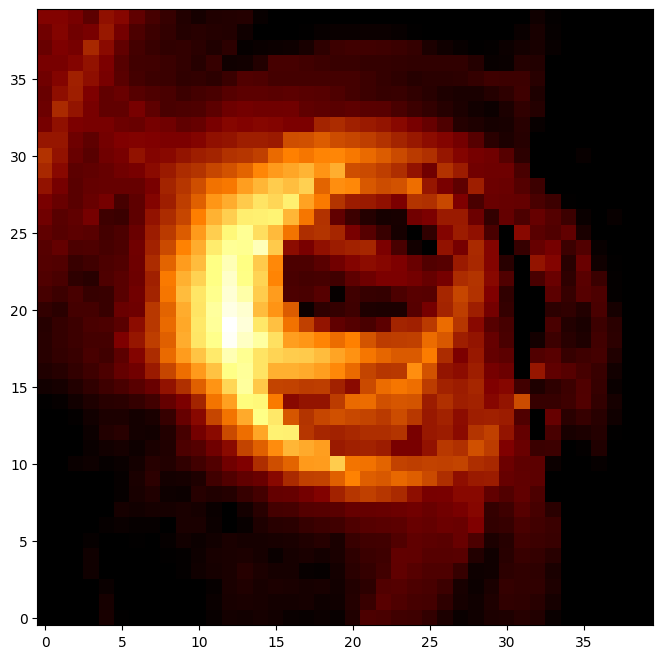

In [33]:
fig = plt.figure(figsize=(8, 8), facecolor='w')

final_image = final_image / np.max(final_image)

ax1 = plt.subplot(1, 1, 1)
ax1.imshow(np.log10(final_image).T, cmap='afmhot', vmin=-4, vmax=0, origin='lower')

# tests below

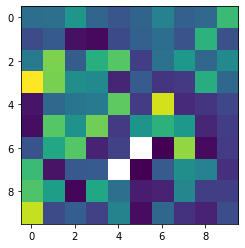

In [228]:
ax1 = plt.subplot(1, 1, 1)

ax1.imshow(tensorial_data['pitch_angle'].min(axis=0).reshape((10, 10)))

In [101]:
from jax import jit, vmap

@jit
def vec_metric(X, bhspin):
    return vmap(mahakala.geodesics.metric, in_axes=(0, None))(X, bhspin)

@jit
def vec_imetric(X, bhspin):
    return vmap(mahakala.geodesics.imetric, in_axes=(0, None))(X, bhspin)

In [102]:
final_M = np.zeros((len(S),len(S[0]),4))
for i in tqdm(range(0,len(S))):
    final_M[i,:,:] = vec_imetric(S[i,:,:4], bhspin)[:,0,:]

100%|██████████| 10001/10001 [00:04<00:00, 2123.72it/s]


In [205]:
xpos_vec = S[:, :, :4]

xs = xpos_vec[:, :, 1]
ys = xpos_vec[:, :, 2]
zs = xpos_vec[:, :, 3]

for j in range(100):
    if np.isnan(np.min(xs[:, j])):
        print(j)
    #print(j, np.min(xs[:, j]))

65
74


In [206]:
len(select_geodesic[:, 0, 1])

419

In [207]:
len(final_dt[:, 64])

10000

In [208]:
tidx = 417
xs[tidx, 65], final_dt[tidx, 65]

(-1.8132638931274414, 0.0)

In [211]:
final_dt[:, 65]

array([-24.96421991, -24.34260941, -23.7364769 , ...,          nan,
                nan,          nan])

(410.0, 425.0)

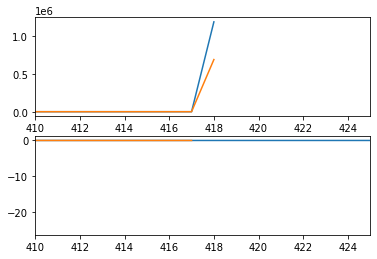

In [232]:
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.plot(xs[:, 65])
ax2.plot(final_dt[:, 65])
ax1.plot(select_geodesic[:, 0, 1])
ax2.plot(select_dt_final[:, 0])

xlim = [410, 425]

ax1.set_xlim(*xlim)
ax2.set_xlim(*xlim)

In [152]:
select_geodesic.shape

(419, 1, 8)

In [155]:
np.nanmin(select_geodesic[:, 0, 1])

-1.7934848070144653

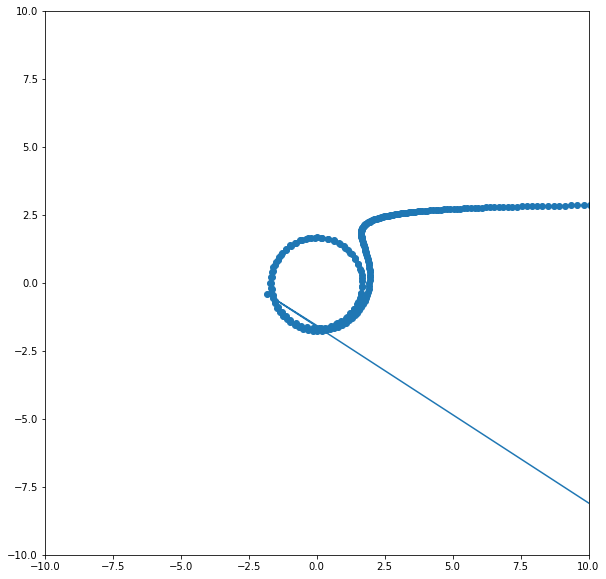

In [233]:
plt.figure(figsize=(10, 10), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

ax1.plot(xs[:, 65], ys[:, 65], '-o')

plim = 10
ax1.set_xlim(-plim, plim)
ax1.set_ylim(-plim, plim)

ax1.set_aspect('equal')

In [142]:
bhspin = 0.9
inclination_in_degrees = 60
distance_in_rg = 1000

fov = 10
number_pixels_across = 10

s0 = ma.initialize_geodesics_at_camera(bhspin, inclination_in_degrees, distance_in_rg, -fov, fov, number_pixels_across)
S, final_dt = ma.geodesic_integrator(10000, s0, 40, 1e-4, bhspin, use_tqdm=True)

100%|██████████| 10000/10000 [00:26<00:00, 371.17it/s]


In [129]:
s0[65]

array([0.00000000e+00, 8.65525391e+02, 3.00000000e+00, 5.00866028e+02,
       1.00000000e+00, 8.62568378e-01, 3.40527458e-06, 4.98003989e-01])

In [133]:
select_geodesic, select_dt_final = ma.geodesic_integrator(10000, np.array([s0[65]]), 40, 1e-4, bhspin, use_tqdm=True)

  4%|▍         | 418/10000 [00:00<00:18, 522.74it/s]


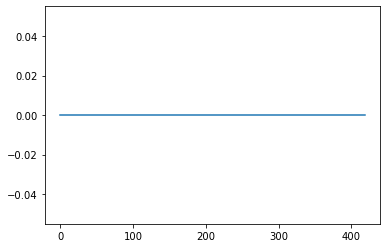

In [137]:
ax1 = plt.subplot(1, 1, 1)

ax1.plot(np.isnan(select_geodesic[:, 0, 1]))

In [139]:
np.min(select_geodesic[:, 0, 1])

-1.7934848070144653

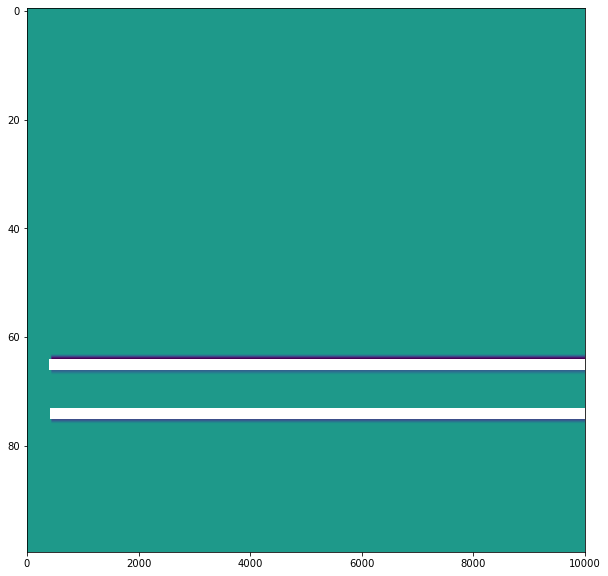

In [234]:
fig = plt.figure(figsize=(10, 10), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

ax1.imshow(xpos_vec[:, :, 0].T)
ax1.set_aspect('auto')

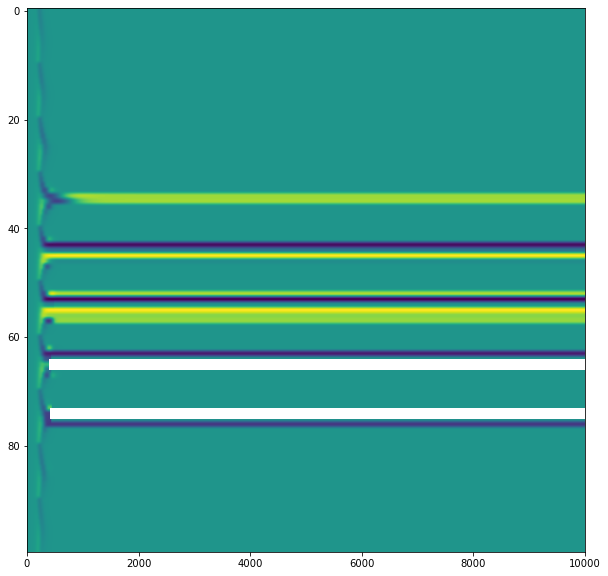

In [106]:
fig = plt.figure(figsize=(10, 10), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

ax1.imshow(final_M[:, :, 3].T)
ax1.set_aspect('auto')

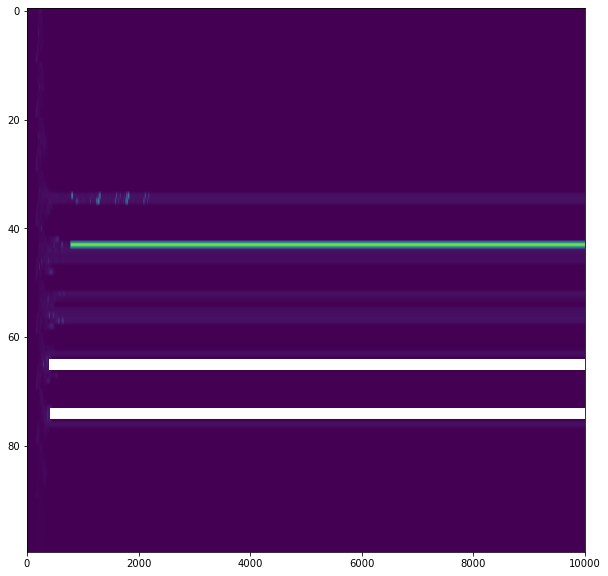

In [95]:
fig = plt.figure(figsize=(10, 10), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

ax1.imshow(tensorial_data['ucon'][0].T)
ax1.set_aspect('auto')

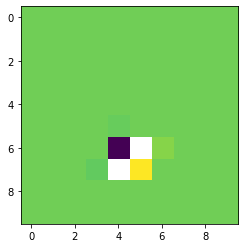

In [76]:
ax1 = plt.subplot(1, 1, 1)

ax1.imshow(local_nu.sum(axis=0).reshape((10, 10)))

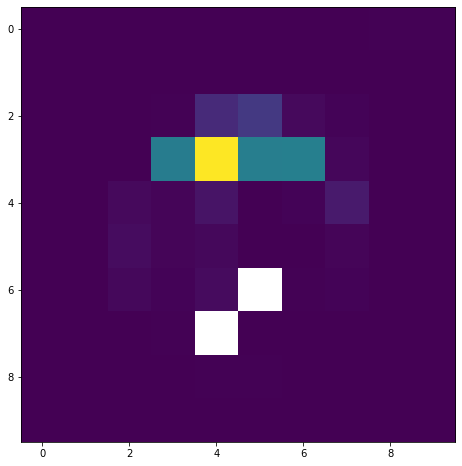

In [ ]:

        Mass_scale = 5e+24

        bfield = np.sqrt(BuBu) *  c * np.sqrt(pow(G*M_BH/c**2,-3) * Mass_scale * 4 * np.pi)

        ne_data = Mass_scale * densff_data * pow(G*M_BH/c**2,-3)  * 1/(1.67 * 1e-24 +  9.1094 * 1e-28)

        R_imp = ((R_high * (beta_data)**2/(1 + (beta_data)**2)) + 1/(1+(beta_data)**2))

        t_electron = c**2 * (m_p  * internal_u_data * (4/3 -1) * (5/3-1))/(Kb * densff_data * ((5/3-1) + (4/3-1) * R_imp))

        thetae = Kb * t_electron/(m_e*c**2)

        #index = np.where(np.isnan(t_electron)== True)
        #t_electron[index[0],index[1]] = 0

        del R_imp

        synemiss_data = np.empty((len(S),LEN))

        for i in range(len(S)):
            synemiss_data[i,:] = synemiss(ne_data[i,:], t_electron[i,:],bfield[i,:],nu[i,:],beta_data[i,:], observer_angle[i,:])

        index = np.where(np.isnan(synemiss_data)==True)
        synemiss_data[index[0],index[1]] = 0.0

        del index
        absorption_data   = np.zeros((len(S), LEN))

        #for i in range(len(S)):
        #    absorption_data[i,:] = absorption_coeff(t_electron[i,:], synemiss_data[i,:], nu[i,:],beta_data[i,:])



        index = np.where(np.isnan(absorption_data)==True)
        absorption_data[index[0],index[1]] = 0.0

        del index

        grav_synchrotron = synemiss_data/nu**2

        index = np.where(np.isnan(grav_synchrotron) == True)

        grav_synchrotron[index[0],index[1]] = 0.0


        index = np.where(np.isnan(gamma_inv_data) == True)
        gamma_inv_data[index[0],index[1]] = 0.0


        index = np.where(sigma_data > 1)
        ne_data[index[0],index[1]] = 0.0
        grav_synchrotron[index[0],index[1]] = 0.0
        absorption_data[index[0],index[1]] = 0.0
        synemiss_data[index[0],index[1]] = 0.0

        index = np.where(nu < 0)
        nu[index[0],index[1]] = 0.0

        index = np.where(grav_synchrotron < 0)
        grav_synchrotron[index[0],index[1]] = 0.0

        index = np.where(absorption_data < 0)
        absorption_data[index[0],index[1]] = 0.0

        N = len(S)

        final_I,I_list = specific_intensity(N,synemiss_data,absorption_data,nu,KuUu,final_dt)


In [45]:
local_nu = -tensorial_data['kdotu'] * 230e9
gamma_inv_data = local_nu / 230.e9

"""
beta_data       = internal_u_data/BuBu * (((fluid_gamma) - 1)/0.5)
sigma_data      = BuBu/densff_data

index = np.where(np.isnan(beta_data) == True)
beta_data[index[0],index[1]] = 0
index = np.where(np.isnan(sigma_data) == True)
sigma_data[index[0],index[1]] = 0    """

In [ ]:

    beta_data       = internal_u_data/BuBu * (((fluid_gamma) - 1)/0.5)
    sigma_data      = BuBu/densff_data

    index = np.where(np.isnan(beta_data) == True)
    beta_data[index[0],index[1]] = 0
    index = np.where(np.isnan(sigma_data) == True)
    sigma_data[index[0],index[1]] = 0

    #return S,ne_data,thetae,bfield_data_pmag,num.sqrt(BuBu),sigma_data,beta_data,-KuUu * 230e9

    def pitch_angle(KuUu,KuBu,BuBu):

        angle = KuBu/(abs(KuUu) * np.sqrt(BuBu))

        index = np.where(BuBu == 0)
        angle[index[0],index[1]] = np.cos(np.pi/2)

        index = np.where(abs(angle) > 1.0)
        angle[index[0],index[1]] = angle[index[0],index[1]]/abs(angle[index[0],index[1]])

        return np.arccos(angle)

    observer_angle = pitch_angle(KuUu,KuBu,BuBu)

    del KuBu

    nu = -KuUu * 230e9

    gamma_inv_data = nu/230e9


    R_high_list = [80]

    for R_high in R_high_list:

        Mass_scale = 5e+24

        bfield = np.sqrt(BuBu) *  c * np.sqrt(pow(G*M_BH/c**2,-3) * Mass_scale * 4 * np.pi)

        ne_data = Mass_scale * densff_data * pow(G*M_BH/c**2,-3)  * 1/(1.67 * 1e-24 +  9.1094 * 1e-28)

        R_imp = ((R_high * (beta_data)**2/(1 + (beta_data)**2)) + 1/(1+(beta_data)**2))

        t_electron = c**2 * (m_p  * internal_u_data * (4/3 -1) * (5/3-1))/(Kb * densff_data * ((5/3-1) + (4/3-1) * R_imp))

        thetae = Kb * t_electron/(m_e*c**2)

        #index = np.where(np.isnan(t_electron)== True)
        #t_electron[index[0],index[1]] = 0

        del R_imp

        synemiss_data = np.empty((len(S),LEN))

        for i in range(len(S)):
            synemiss_data[i,:] = synemiss(ne_data[i,:], t_electron[i,:],bfield[i,:],nu[i,:],beta_data[i,:], observer_angle[i,:])

        index = np.where(np.isnan(synemiss_data)==True)
        synemiss_data[index[0],index[1]] = 0.0

        del index
        absorption_data   = np.zeros((len(S), LEN))

        #for i in range(len(S)):
        #    absorption_data[i,:] = absorption_coeff(t_electron[i,:], synemiss_data[i,:], nu[i,:],beta_data[i,:])



        index = np.where(np.isnan(absorption_data)==True)
        absorption_data[index[0],index[1]] = 0.0

        del index

        grav_synchrotron = synemiss_data/nu**2

        index = np.where(np.isnan(grav_synchrotron) == True)

        grav_synchrotron[index[0],index[1]] = 0.0


        index = np.where(np.isnan(gamma_inv_data) == True)
        gamma_inv_data[index[0],index[1]] = 0.0


        index = np.where(sigma_data > 1)
        ne_data[index[0],index[1]] = 0.0
        grav_synchrotron[index[0],index[1]] = 0.0
        absorption_data[index[0],index[1]] = 0.0
        synemiss_data[index[0],index[1]] = 0.0

        index = np.where(nu < 0)
        nu[index[0],index[1]] = 0.0

        index = np.where(grav_synchrotron < 0)
        grav_synchrotron[index[0],index[1]] = 0.0

        index = np.where(absorption_data < 0)
        absorption_data[index[0],index[1]] = 0.0

        N = len(S)

        final_I,I_list = specific_intensity(N,synemiss_data,absorption_data,nu,KuUu,final_dt)

        np.save("/xdisk/chanc/home/anikets/Checking_shell/I_inv_{}_SANE/I_trial_{}.npy".format(R_high,lower_limit/8),final_I)

        '''
        I_inv_val = []
        I_len_iteration = []
        j_inv_val = []
        j_len_iteration = []


        for shell_radii_val in range(97):

            shell_index = np.load("/xdisk/chanc/home/anikets/Checking_shell/new_sims/Radius_Shells/Radius_{}/Radii_Shell_i{}_{}.npy".format(lower_limit/8, inclination, shell_radii_val))
            j_inv_sum = sum(grav_synchrotron[shell_index[0], shell_index[1]])

            if len(shell_index[0]) == 0:
                j_inv_avg = 0
            else:
                j_inv_avg = j_inv_sum

            j_len_iteration.append(len(shell_index[0]))
            j_inv_val.append(j_inv_avg)

            shell_index = np.load("/xdisk/chanc/home/anikets/Checking_shell/new_sims/Inv_Radius_Shells/Inv_Radius_{}/Inv_Radii_Shell_i{}_{}.npy".format(lower_limit/8, inclination, shell_radii_val))

            I_inv_sum = sum(I_list[shell_index[0], shell_index[1]])

            if len(shell_index[0]) == 0:
                I_inv_avg = 0
            else:
                I_inv_avg = I_inv_sum

            I_len_iteration.append(len(shell_index[0]))
            I_inv_val.append(I_inv_avg)

        j_inv_val = np.array(j_inv_val)
        j_len_iteration = np.array(j_len_iteration)

        I_inv_val = np.array(I_inv_val)
        I_len_iteration = np.array(I_len_iteration)

        np.save("/xdisk/chanc/home/anikets/Checking_shell/j_inv_{}_SANE/GRMHD_000{}/j_inv_{}_RADIUS_i{}.npy".format(R_high,GRMHD_file, lower_limit/8, inclination), j_inv_val)
            # Now j_inv_val is an array of shape (485,)

        np.save("/xdisk/chanc/home/anikets/Checking_shell/j_inv_{}_SANE/GRMHD_000{}/j_len_iteration_{}_RADIUS_i{}.npy".format(R_high,GRMHD_file,lower_limit/8, inclination),j_len_iteration)


        np.save("/xdisk/chanc/home/anikets/Checking_shell/I_inv_{}_SANE/GRMHD_000{}/I_inv_{}_RADIUS_i{}.npy".format(R_high,GRMHD_file, lower_limit/8, inclination), I_inv_val)
        # Now j_inv_val is an array of shape (485,)

        np.save("/xdisk/chanc/home/anikets/Checking_shell/I_inv_{}_SANE/GRMHD_000{}/I_len_iteration_{}_RADIUS_i{}.npy".format(R_high,GRMHD_file,lower_limit/8, inclination),I_len_iteration)


        '''

        I_inv_val = []
        I_len_iteration = []
        j_inv_val = []
        j_len_iteration = []



        for shell_theta_val in range(89):

            shell_index = np.load("/xdisk/chanc/home/anikets/Checking_shell/new_sims/Theta_Shells/Theta_{}/Theta_Shell_i{}_{}.npy".format(lower_limit/8,inclination,  shell_theta_val))
            j_inv_sum = sum(grav_synchrotron[shell_index[0], shell_index[1]])

            if len(shell_index[0]) == 0:
                j_inv_avg = 0
            else:
                j_inv_avg = j_inv_sum

            j_len_iteration.append(len(shell_index[0]))
            j_inv_val.append(j_inv_avg)


            shell_index = np.load("/xdisk/chanc/home/anikets/Checking_shell/new_sims/Inv_Theta_Shells/Inv_Theta_{}/Inv_Theta_Shell_i{}_{}.npy".format(lower_limit/8, inclination, shell_theta_val))


            I_inv_sum = sum(I_list[shell_index[0], shell_index[1]])

            if len(shell_index[0]) == 0:
                I_inv_avg = 0
            else:
                I_inv_avg = I_inv_sum

            I_len_iteration.append(len(shell_index[0]))
            I_inv_val.append(I_inv_avg)


        j_inv_val = np.array(j_inv_val)
        j_len_iteration = np.array(j_len_iteration)

        I_inv_val = np.array(I_inv_val)
        I_len_iteration = np.array(I_len_iteration)

        np.save("/xdisk/chanc/home/anikets/Checking_shell/j_inv_{}_SANE/GRMHD_000{}/j_trial_inv_{}_THETA_i{}.npy".format(R_high,GRMHD_file, lower_limit/8, inclination), j_inv_val)
            # Now j_inv_val is an array of shape (485,)

        np.save("/xdisk/chanc/home/anikets/Checking_shell/j_inv_{}_SANE/GRMHD_000{}/j_trial_len_iteration_{}_THETA_i{}.npy".format(R_high,GRMHD_file,lower_limit/8, inclination),j_len_iteration)


        np.save("/xdisk/chanc/home/anikets/Checking_shell/I_inv_{}_SANE/GRMHD_000{}/I_trial_inv_{}_THETA_i{}.npy".format(R_high,GRMHD_file, lower_limit/8, inclination), I_inv_val)
        # Now j_inv_val is an array of shape (485,)

        np.save("/xdisk/chanc/home/anikets/Checking_shell/I_inv_{}_SANE/GRMHD_000{}/I_trial_len_iteration_{}_THETA_i{}.npy".format(R_high,GRMHD_file,lower_limit/8, inclination),I_len_iteration)

        del j_inv_val
        del j_len_iteration
        del I_inv_val
        del I_len_iteration


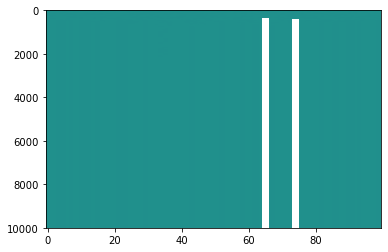

In [39]:
ax = plt.subplot(1, 1, 1)
ax.imshow(tensorial_data['udotu'], vmin=-1.1, vmax=-0.9)
ax.set_aspect('auto')

In [11]:
primitive_data

{'dens': array([[0.00035382, 0.00035143, 0.00034922, ..., 0.0003502 , 0.00034913,
         0.00034809],
        [0.00035363, 0.0003516 , 0.00034957, ..., 0.00035468, 0.00035259,
         0.00035063],
        [0.00036961, 0.00036636, 0.00036316, ..., 0.00036952, 0.000368  ,
         0.00036669],
        ...,
        [0.        , 0.        , 0.        , ..., 0.00010271, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00010271, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00010271, 0.        ,
         0.        ]]),
 'u': array([[1.81947625e-07, 1.81436338e-07, 1.80930167e-07, ...,
         1.80517710e-07, 1.80515483e-07, 1.80485449e-07],
        [1.83419867e-07, 1.82482650e-07, 1.81472962e-07, ...,
         1.82362056e-07, 1.81680947e-07, 1.80986693e-07],
        [1.86342759e-07, 1.84656829e-07, 1.82999950e-07, ...,
         1.83183285e-07, 1.82365834e-07, 1.81623227e-07],
        ...,
        [0.00000000e+00

In [ ]:
ne_along_S, B_along_S, ...

In [ ]:

LEN = len(S[0])

h_BL = np.sqrt(1 - a_spin**2)
r_m = 1 - h_BL
r_p = 1 + h_BL



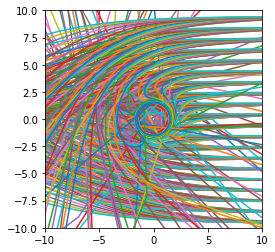

In [15]:
ax1 = plt.subplot(1, 1, 1)

x = S[:, :, 1]
y = S[:, :, 2]
z = S[:, :, 3]

ax1.plot(x, y)

plim = [-10, 10]
ax1.set_xlim(*plim)
ax1.set_ylim(*plim)

ax1.set_aspect('equal')

In [ ]:

LEN = len(S[0])

h_BL = np.sqrt(1 - a_spin**2)
r_m = 1 - h_BL
r_p = 1 + h_BL

densff_data     = np.zeros((len(S),LEN))
B_1_data        = np.zeros((len(S),LEN))
B_2_data        = np.zeros((len(S),LEN))
B_3_data        = np.zeros((len(S),LEN))
U_1_data        = np.zeros((len(S),LEN))
U_2_data        = np.zeros((len(S),LEN))
U_3_data        = np.zeros((len(S),LEN))
internal_u_data = np.zeros((len(S),LEN))

populated = np.zeros((len(S), LEN))
prims = np.zeros((len(S), LEN, 8))

for mbi in tqdm(mb_index_map.values()):

    if mbi < nstart or mbi >= nend:
        break

    mb_x1min = x1f[mbi].min()
    mb_x1max = x1f[mbi].max()
    mb_x2min = x2f[mbi].min()
    mb_x2max = x2f[mbi].max()
    mb_x3min = x3f[mbi].min()
    mb_x3max = x3f[mbi].max()

    mb_mask = (mb_x1min < S[:,:,1]) & (S[:,:,1] <= mb_x1max)
    mb_mask &= (mb_x2min < S[:,:,2]) & (S[:,:,2] <= mb_x2max)
    mb_mask &= (mb_x3min < S[:,:,3]) & (S[:,:,3] <= mb_x3max)
    mb_mask &= (populated == 0)

    x1e = get_extended(x1v[mbi])
    x2e = get_extended(x2v[mbi])
    x3e = get_extended(x3v[mbi])

    # get meshblock key information
    tlevel = Levels[mbi]
    ti, tj, tk = LogicalLocations[mbi]
    key = tlevel, ti, tj, tk

    if np.count_nonzero(mb_mask) == 0:
        continue


    # create and use the interpolation object
    for nprm in range(nprim_all):
        prm = all_meshblocks[mbi,nprm, :, :, :]
        rgi = RegularGridInterpolator((x1e, x2e, x3e), prm.transpose((2,1,0)),
                                        method=interp_method)

        remapped = rgi((S[:,:,1][mb_mask], S[:,:,2][mb_mask], S[:,:,3][mb_mask]))
        outidx, outval = athenak.map_prim_to_prim(remapped, nprm, variable_names, fluid_params)

        prims[mb_mask, outidx] = outval

    # ensure we don't accidentally overwrite already-populated
    # cells (precision issues?)
    populated[mb_mask] = 1


densff_data     = prims[:,:,0]
internal_u_data = prims[:,:,1]
U_1_data        = prims[:,:,2]
U_2_data        = prims[:,:,3]
U_3_data        = prims[:,:,4]
B_1_data        = prims[:,:,5]
B_2_data        = prims[:,:,6]
B_3_data        = prims[:,:,7]

del prims
del populated

In [ ]:

    #########################
    # We'll now convert these primtive variables into variables actually used by the Synchrotron functions.

    #tgas_data = (pressff_data * c**2 * (m_p + m_e)) /(densff_data * Kb)


    @jit

    def another_metric(x):
        eta = jnp.asarray([[1,0,0],[0,1,0],[0,0,1]])
        a = a_spin
        aa = a * a
        zz = x[3]*x[3]
        kk = 0.5 * (x[1]*x[1] + x[2]*x[2] + zz - aa)
        rr = jnp.sqrt(kk * kk + aa * zz ) + kk
        r = jnp.sqrt(rr)
        f = (2.0 * rr * r)/(rr * rr + aa * zz)
        l = jnp.array([(r * x[1] + a * x[2])/(rr + aa) , (r* x[2] - a * x[1])/(rr + aa) , x[3]/r])
        return eta + f * (l[:,jnp.newaxis] * l[jnp.newaxis,:])


    @jit

    def vec_another_metric(X):
        return vmap(another_metric)(X)



    UuUu = np.zeros((len(S),LEN))

    total_u = np.array([U_1_data,U_2_data,U_3_data])
    total_u = np.transpose(total_u, (1,2,0))

    for i in tqdm(range(len(S))):
        UuUu[i,:] = ((vec_metric(S[i,:,:4])[:,1:,1:] @ total_u[i,:,:].reshape(LEN,3,1)).reshape(LEN,1,3) @ total_u[i,:,:].reshape(LEN,3,1)).reshape(LEN)
    del total_u

    GAMMA = np.sqrt(1 + UuUu)

    del UuUu

    final_M = np.zeros((len(S),LEN,4))
    for i in tqdm(range(0,len(S))):

        final_M[i,:,:] = vec_imetric(S[i,:,:4])[:,0,:]

    u0_data = (GAMMA/pow(-final_M[:,:,0],-1/2))
    u1_data = (U_1_data - (final_M[:,:,1] * GAMMA * pow(-final_M[:,:,0],-1/2)))
    u2_data = (U_2_data - (final_M[:,:,2] * GAMMA * pow(-final_M[:,:,0],-1/2)))
    u3_data = (U_3_data - (final_M[:,:,3] * GAMMA * pow(-final_M[:,:,0],-1/2)))



    del final_M

    #######################
    # Now, for the magnetic field components

    BuUu = np.zeros((len(S),LEN))

    total_B = np.array([B_1_data,B_2_data,B_3_data])
    total_B = np.transpose(total_B, (1,2,0))

    total_u = np.array([u0_data,u1_data,u2_data,u3_data])
    total_u = np.transpose(total_u, (1,2,0))

    for i in tqdm(range(len(S))):

        BuUu[i,:] = ((vec_metric(S[i,:,:4]) @ total_u[i,:,:].reshape(LEN,4,1)).reshape(LEN,1,4)[:,:,1:] @ total_B[i,:,:].reshape(LEN,3,1)).reshape(LEN)

    del total_B
    del total_u

    B0_data = BuUu
    del BuUu
    B1_data = 1/u0_data * (B_1_data + B0_data * u1_data)
    B2_data = 1/u0_data * (B_2_data + B0_data * u2_data)
    B3_data = 1/u0_data * (B_3_data + B0_data * u3_data)
